# Análisis Exploratorio de Datos (EDA) y Modelado Predictivo de Robos en el Sistema de Transporte Metro de la Ciudad de México

**Objetivo del Proyecto:** Este notebook tiene como finalidad realizar un análisis exhaustivo de los datos de carpetas de investigación de la Fiscalía General de Justicia (FGJ) de la Ciudad de México para entender las dinámicas del robo en el sistema de transporte Metro. Se buscará identificar patrones temporales, distribuciones geográficas (a nivel alcaldía), y construir un modelo predictivo usando Facebook Prophet para pronosticar la incidencia futura de robos. Adicionalmente, se realizará un análisis comparativo con otras modalidades de transporte.

**Fuente de Datos Principal:**
*   `carpetasFGJ_acumulado_2025_01.csv`: Contiene información de las carpetas de investigación de la FGJ a partir de enero de 2016.

---
## 1. Carga de Datos

El primer paso en nuestro viaje analítico es cargar el conjunto de datos. Utilizaremos la librería `pandas` para leer el archivo CSV que contiene los registros de las carpetas de investigación.


In [1]:
import pandas as pd
import numpy as np # Lo usaremos consistentemente
import matplotlib.pyplot as plt
import seaborn as sns # Para visualizaciones más estéticas
from IPython.display import display # Para mejor visualización de DataFrames en Colab

# Configuración general de estilo para las gráficas
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Tamaño por defecto
plt.rcParams['font.size'] = 11

# Definir la ruta al archivo
# (Asegúrate de que tu Google Drive esté montado si usas Colab)
FILE_PATH = '/content/drive/MyDrive/PP_Robo_Metro_CDMX/Nootebooks/datos_brutos/carpetasFGJ_acumulado_2025_01.csv' # Ajusta si es necesario

df_original = None # Inicializar
try:
    df_original = pd.read_csv(FILE_PATH, encoding='UTF-8')
    print("--- DataFrame Original Cargado Exitosamente ---")
    print(f"Dimensiones iniciales: {df_original.shape}")
    print("\nPrimeras 5 filas del DataFrame:")
    display(df_original.head())
    print("\nInformación general del DataFrame:")
    df_original.info()
except FileNotFoundError:
    print(f"Error: Archivo no encontrado en la ruta especificada: {FILE_PATH}")
except pd.errors.ParserError:
    print("Error: No se pudo parsear el archivo CSV. Verifica el formato y la codificación.")
except Exception as e:
    print(f"Ocurrió un error inesperado durante la carga de datos: {e}")

# Crear una copia para trabajar y preservar el original
if df_original is not None:
    df = df_original.copy()
else:
    df = pd.DataFrame() # Crear un DataFrame vacío si la carga falló para evitar errores posteriores

<ipython-input-1-84479b0c9b27>:18: DtypeWarning: Columns (10,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv(FILE_PATH, encoding='UTF-8')


--- DataFrame Original Cargado Exitosamente ---
Dimensiones iniciales: (2098743, 21)

Primeras 5 filas del DataFrame:


anio_inicio mes_inicio fecha_inicio hora_inicio  anio_hecho  mes_hecho  \
0         2016      Enero   2016-01-01    00:00:00      2015.0  Diciembre   
1         2016      Enero   2016-01-01    00:00:00      2015.0  Diciembre   
2         2016      Enero   2016-01-01    00:00:00      2016.0      Enero   
3         2016      Enero   2016-01-01    00:00:00      2015.0  Diciembre   
4         2016      Enero   2016-01-01    00:00:00      2015.0  Diciembre   

  fecha_hecho hora_hecho                                             delito  \
0  2015-12-31   16:30:00  LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...   
1  2015-12-31   22:40:00      ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA   
2  2016-01-01   00:20:00     ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   
3  2015-12-31   22:00:00  ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...   
4  2015-12-31   22:30:00                   HOMICIDIOS INTENCIONALES (OTROS)   

                                    categoria_delito  ...  \
0                             DELITO DE BAJO IMPACTO  ...   
1      ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA  ...   
2  ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...  ...   
3               ROBO DE VEHÍCULO CON Y SIN VIOLENCIA  ...   
4                                   HOMICIDIO DOLOSO  ...   

                             fiscalia agencia unidad_investigacion  \
0            INVESTIGACIÓN EN TLALPAN   TLP-4               UI-2CD   
1            INVESTIGACIÓN EN TLALPAN   TLP-1               UI-2CD   
2         INVESTIGACIÓN EN IZTAPALAPA   IZP-2               UI-2CD   
3  INVESTIGACIÓN EN GUSTAVO A. MADERO   GAM-8               UI-2CD   
4      INVESTIGACIÓN EN BENITO JUÁREZ    BJ-1               UI-2SD   

                   colonia_hecho               colonia_catalogo  \
0         JARDINES EN LA MONTAÑA         Jardines En La Montaña   
1              LOMAS DE PADIERNA              Lomas De Padierna   
2          SAN ANTONIO CULHUACÁN   Barrio San Antonio Culhuacan   
3  SAN JUAN DE ARAGÓN II SECCIÓN  San Juan De Aragon Ii Seccion   
4                      NATIVITAS                      Nativitas   

      alcaldia_hecho alcaldia_catalogo municipio_hecho   latitud  longitud  
0            TLALPAN               NaN            CDMX  19.30086 -99.20877  
1            TLALPAN               NaN            CDMX  19.29003 -99.21748  
2         IZTAPALAPA               NaN            CDMX  19.34080 -99.11431  
3  GUSTAVO A. MADERO               NaN            CDMX  19.45106 -99.08669  
4      BENITO JUAREZ               NaN            CDMX  19.38095 -99.13982  

[5 rows x 21 columns]


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098743 entries, 0 to 2098742
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   anio_inicio           int64  
 1   mes_inicio            object 
 2   fecha_inicio          object 
 3   hora_inicio           object 
 4   anio_hecho            float64
 5   mes_hecho             object 
 6   fecha_hecho           object 
 7   hora_hecho            object 
 8   delito                object 
 9   categoria_delito      object 
 10  competencia           object 
 11  fiscalia              object 
 12  agencia               object 
 13  unidad_investigacion  object 
 14  colonia_hecho         object 
 15  colonia_catalogo      object 
 16  alcaldia_hecho        object 
 17  alcaldia_catalogo     object 
 18  municipio_hecho       object 
 19  latitud               float64
 20  longitud              float64
dtypes: float64(3), int64(1), object(17)
memor

---
## 2. Exploración Inicial de Datos (EDA)

Una vez cargados los datos, el siguiente paso es realizar una exploración inicial para entender su estructura, identificar posibles problemas como valores faltantes, y conocer los tipos de datos con los que estamos trabajando. Esta etapa es fundamental para guiar la limpieza y el preprocesamiento.

### 2.1. Tipos de Datos y Valores Faltantes

Inspeccionaremos los tipos de datos de cada columna y cuantificaremos los valores ausentes.


In [2]:
if not df.empty:
    print("\n--- 2.1. Tipos de Datos de las Columnas ---")
    # Usar display para una mejor visualización en Colab si es muy largo
    with pd.option_context('display.max_rows', None): # Mostrar todas las filas
        display(pd.DataFrame(df.dtypes, columns=['Tipo de Dato']))

    print("\n--- Porcentaje de Valores Faltantes por Columna ---")
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_info = pd.DataFrame({
        'Conteo Faltantes': missing_values,
        'Porcentaje Faltante (%)': missing_percentage
    })
    # Mostrar solo columnas con valores faltantes, ordenadas por porcentaje
    display(missing_info[missing_info['Conteo Faltantes'] > 0].sort_values(by='Porcentaje Faltante (%)', ascending=False))
else:
    print("El DataFrame está vacío, no se puede realizar la exploración.")


--- 2.1. Tipos de Datos de las Columnas ---


Tipo de Dato
anio_inicio                 int64
mes_inicio                 object
fecha_inicio               object
hora_inicio                object
anio_hecho                float64
mes_hecho                  object
fecha_hecho                object
hora_hecho                 object
delito                     object
categoria_delito           object
competencia                object
fiscalia                   object
agencia                    object
unidad_investigacion       object
colonia_hecho              object
colonia_catalogo           object
alcaldia_hecho             object
alcaldia_catalogo          object
municipio_hecho            object
latitud                   float64
longitud                  float64


--- Porcentaje de Valores Faltantes por Columna ---


Conteo Faltantes  Porcentaje Faltante (%)
alcaldia_catalogo              2081157                99.162070
competencia                    1064018                50.697870
colonia_catalogo                124440                 5.929263
colonia_hecho                   102124                 4.865960
latitud                         101207                 4.822267
longitud                        101207                 4.822267
alcaldia_hecho                   24896                 1.186234
unidad_investigacion               978                 0.046599
hora_hecho                         887                 0.042263
fecha_hecho                        560                 0.026683
anio_hecho                         559                 0.026635
mes_hecho                          559                 0.026635
hora_inicio                         15                 0.000715
fecha_inicio                         3                 0.000143
fiscalia                             2                 0.000095

### 2.2. Exploración de Columnas Clave: Fechas, Ubicación y Delitos

Nos enfocaremos en columnas cruciales para nuestro análisis: fechas de los hechos, información de ubicación (alcaldía) y la descripción de los delitos.

#### 2.2.1. Fechas y Horas
La correcta interpretación de las fechas y horas es vital para el análisis de series temporales. Combinaremos la fecha y hora del hecho en una sola columna tipo `datetime`.

In [3]:
if not df.empty:
    print("\n--- 2.2.1. Procesamiento y Exploración de Fechas y Horas del Hecho ---")

    # Conversión de 'fecha_hecho' (robustecida)
    if 'fecha_hecho' in df.columns:
        df['fecha_hecho'] = df['fecha_hecho'].astype(str).replace('nan', np.nan) # Asegurar que 'nan' string sea NaN real
        df['fecha_hecho'] = pd.to_datetime(df['fecha_hecho'], errors='coerce')
        print(f"Fechas del hecho convertidas. Válidas: {df['fecha_hecho'].notna().sum()} de {len(df)}")
    else:
        print("Advertencia: Columna 'fecha_hecho' no encontrada.")
        df['fecha_hecho'] = pd.NaT # Crear columna vacía para evitar errores

    # Procesamiento de 'hora_hecho'
    if 'hora_hecho' in df.columns:
        # Extraer HH:MM, manejar NaNs y formatos incorrectos
        df['hora_hecho_str'] = df['hora_hecho'].astype(str)
        # Intentar parsear HH:MM:SS o HH:MM
        parsed_time = pd.to_datetime(df['hora_hecho_str'], format='%H:%M:%S', errors='coerce').dt.strftime('%H:%M')
        mask_failed_parse = parsed_time.isna()
        parsed_time_alt = pd.to_datetime(df.loc[mask_failed_parse, 'hora_hecho_str'], format='%H:%M', errors='coerce').dt.strftime('%H:%M')
        parsed_time.loc[mask_failed_parse] = parsed_time_alt

        df['hora_hecho_proc'] = parsed_time
        df.loc[df['hora_hecho_proc'].isna(), 'hora_hecho_proc'] = '00:00' # Imputar hora por defecto si falla el parseo
        print(f"Horas del hecho procesadas a HH:MM. Conteo de '00:00' imputadas: {(df['hora_hecho_proc'] == '00:00').sum()}")
    else:
        print("Advertencia: Columna 'hora_hecho' no encontrada.")
        df['hora_hecho_proc'] = '00:00' # Crear columna con valor por defecto

    # Combinar fecha y hora del hecho
    # Asegurarse de que ambas columnas existen antes de concatenar
    if 'fecha_hecho' in df.columns and 'hora_hecho_proc' in df.columns:
        df['fecha_hora_hecho'] = pd.to_datetime(df['fecha_hecho'].dt.strftime('%Y-%m-%d') + ' ' + df['hora_hecho_proc'], errors='coerce')
        print(f"Fechas y horas del hecho combinadas. Válidas ('fecha_hora_hecho'): {df['fecha_hora_hecho'].notna().sum()} de {len(df)}")
        if df['fecha_hora_hecho'].notna().sum() > 0:
             print(f"Rango de fechas_hora_hecho: {df['fecha_hora_hecho'].min()} a {df['fecha_hora_hecho'].max()}")
        else:
             print("No hay fechas válidas en 'fecha_hora_hecho'.")
    else:
        print("Advertencia: 'fecha_hecho' o 'hora_hecho_proc' no disponibles para crear 'fecha_hora_hecho'.")
        df['fecha_hora_hecho'] = pd.NaT

    if 'hora_hecho_proc' in df.columns:
        print("\nConteo de horas del hecho procesadas (Top 10):")
        print(df['hora_hecho_proc'].value_counts().head(10))
else:
    print("El DataFrame está vacío, no se puede procesar fechas.")


--- 2.2.1. Procesamiento y Exploración de Fechas y Horas del Hecho ---
Fechas del hecho convertidas. Válidas: 2044628 de 2098743


<ipython-input-3-eed856865d74>:21: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  parsed_time.loc[mask_failed_parse] = parsed_time_alt


Horas del hecho procesadas a HH:MM. Conteo de '00:00' imputadas: 82257
Fechas y horas del hecho combinadas. Válidas ('fecha_hora_hecho'): 2044628 de 2098743
Rango de fechas_hora_hecho: 1906-06-02 19:00:00 a 2024-10-31 23:30:00

Conteo de horas del hecho procesadas (Top 10):
hora_hecho_proc
12:00    192234
00:00     82257
10:00     81609
11:00     46664
09:00     46116
15:00     44576
14:00     43700
16:00     40522
20:00     38637
18:00     38240
Name: count, dtype: int64


#### 2.2.2. Ubicación: Alcaldías
Entender la distribución geográfica de los delitos es clave. Por ahora, nos enfocaremos en la columna `alcaldia_hecho`.

In [4]:
if not df.empty:
    print("\n--- 2.2.2. Exploración de Ubicación (Alcaldías) ---")
    if 'alcaldia_hecho' in df.columns:
        print("\nConteo de incidentes por 'alcaldia_hecho':")
        display(pd.DataFrame(df['alcaldia_hecho'].value_counts()))
        print("\nValores únicos en 'alcaldia_hecho':")
        print(df['alcaldia_hecho'].unique())
    else:
        print("Advertencia: Columna 'alcaldia_hecho' no encontrada.")

    # Comparamos con alcaldia_catalogo (que vimos tenía muchos nulos)
    if 'alcaldia_catalogo' in df.columns:
        print("\nConteo de incidentes por 'alcaldia_catalogo' (para referencia):")
        display(pd.DataFrame(df['alcaldia_catalogo'].value_counts(dropna=False))) #dropna=False para ver los NaNs
    else:
        print("Advertencia: Columna 'alcaldia_catalogo' no encontrada.")
else:
    print("El DataFrame está vacío, no se puede explorar ubicación.")


--- 2.2.2. Exploración de Ubicación (Alcaldías) ---

Conteo de incidentes por 'alcaldia_hecho':


count
alcaldia_hecho                
CUAUHTEMOC              318787
IZTAPALAPA              304367
GUSTAVO A. MADERO       209034
BENITO JUAREZ           164576
COYOACAN                142074
ALVARO OBREGON          140019
MIGUEL HIDALGO          130574
TLALPAN                 125799
VENUSTIANO CARRANZA     118736
AZCAPOTZALCO             98994
IZTACALCO                89879
XOCHIMILCO               67289
TLAHUAC                  57691
LA MAGDALENA CONTRERAS   37189
CUAJIMALPA DE MORELOS    33282
MILPA ALTA               17971
CDMX (indeterminada)     17586


Valores únicos en 'alcaldia_hecho':
['TLALPAN' 'IZTAPALAPA' 'GUSTAVO A. MADERO' 'BENITO JUAREZ' 'COYOACAN'
 'MIGUEL HIDALGO' 'AZCAPOTZALCO' 'VENUSTIANO CARRANZA' 'IZTACALCO'
 'ALVARO OBREGON' 'CUAUHTEMOC' 'XOCHIMILCO' nan 'LA MAGDALENA CONTRERAS'
 'TLAHUAC' 'MILPA ALTA' 'CUAJIMALPA DE MORELOS' 'CDMX (indeterminada)']

Conteo de incidentes por 'alcaldia_catalogo' (para referencia):


count
alcaldia_catalogo            
NaN                   2081157
CDMX (indeterminada)    17586

#### 2.2.3. Tipificación de Delitos
Exploraremos las columnas `delito` y `categoria_delito` para identificar los registros correspondientes a robos, especialmente aquellos en transporte público.

In [5]:
if not df.empty:
    print("\n--- 2.2.3. Exploración de Tipificación de Delitos ---")
    if 'delito' in df.columns:
        print("\nConteo de los 20 'delito' más frecuentes:")
        display(pd.DataFrame(df['delito'].value_counts().head(20)))
    else:
        print("Advertencia: Columna 'delito' no encontrada.")

    if 'categoria_delito' in df.columns:
        print("\nConteo de 'categoria_delito':")
        display(pd.DataFrame(df['categoria_delito'].value_counts()))
    else:
        print("Advertencia: Columna 'categoria_delito' no encontrada.")

    # Exploración más detallada para identificar robos en transporte
    print("\n--- Exploración Detallada de Delitos de Transporte/Transeúnte ---")
    if 'delito' in df.columns:
        keyword_pattern_delito = 'ROBO A PASAJERO|ROBO A TRANSEUNTE|ROBO EN TRANSPORTE|METRO|METROBUS|CABLEBUS|TAXI|MICROBUS|PEATON|CONDUCTOR'
        transporte_transeunte_mask_delito = df['delito'].str.contains(keyword_pattern_delito, case=False, na=False)
        delitos_relevantes = df[transporte_transeunte_mask_delito]['delito'].unique()
        print(f"\n{len(delitos_relevantes)} Valores únicos en 'delito' que coinciden con palabras clave de transporte/transeúnte:")
        if len(delitos_relevantes) > 0:
            for i, delito_nombre in enumerate(sorted(delitos_relevantes)): print(f"  {i+1}. {delito_nombre}")
        else:
            print("  Ninguno.")

    if 'categoria_delito' in df.columns:
        keyword_pattern_categoria = 'ROBO A PASAJERO|ROBO DE VEHICULO|ROBO A TRANSEUNTE|HOMICIDIO DOLOSO|LESIONES DOLOSAS|VIOLACION|SECUESTRO|FEMINICIDIO' # Palabras clave más amplias para categorias de impacto
        categorias_relevantes_mask = df['categoria_delito'].str.contains(keyword_pattern_categoria, case=False, na=False)
        categorias_unicas_relevantes = df[categorias_relevantes_mask]['categoria_delito'].unique()
        print(f"\n{len(categorias_unicas_relevantes)} Valores únicos en 'categoria_delito' que coinciden con palabras clave de impacto/transporte:")
        if len(categorias_unicas_relevantes) > 0:
             for i, cat_nombre in enumerate(sorted(categorias_unicas_relevantes)): print(f"  {i+1}. {cat_nombre}")
        else:
            print("  Ninguna.")
else:
    print("El DataFrame está vacío, no se puede explorar delitos.")


--- 2.2.3. Exploración de Tipificación de Delitos ---

Conteo de los 20 'delito' más frecuentes:


count
delito                                                    
VIOLENCIA FAMILIAR                                  261181
FRAUDE                                              156399
AMENAZAS                                            135941
ROBO DE OBJETOS                                     112702
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA       88535
ROBO A NEGOCIO SIN VIOLENCIA                         76048
ROBO DE ACCESORIOS DE AUTO                           74512
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO          57624
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIO...   42208
ROBO A CASA HABITACION SIN VIOLENCIA                 40870
DENUNCIA DE HECHOS                                   40208
ABUSO DE CONFIANZA                                   37902
USURPACIÓN DE IDENTIDAD                              36506
DESPOJO                                              34709
ABUSO SEXUAL                                         32103
DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VE...   32024
NARCOMENUDEO POSESION SIMPLE                         29466
LESIONES INTENCIONALES POR GOLPES                    26784
ROBO A NEGOCIO CON VIOLENCIA                         25678
ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIEN...   23328


Conteo de 'categoria_delito':


count
categoria_delito                                           
DELITO DE BAJO IMPACTO                              1711755
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOL...   104401
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                  90384
HECHO NO DELICTIVO                                    75553
ROBO A NEGOCIO CON VIOLENCIA                          27993
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                 16928
VIOLACIÓN                                             16321
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIO...    15760
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO         12249
HOMICIDIO DOLOSO                                      10443
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN V...     6603
ROBO A CASA HABITACIÓN CON VIOLENCIA                   4190
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON V...     3119
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA          1987
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                827
SECUESTRO                                               227
FEMINICIDIO                                               2
PLAGIO O SECUESTRO                                        1


--- Exploración Detallada de Delitos de Transporte/Transeúnte ---

46 Valores únicos en 'delito' que coinciden con palabras clave de transporte/transeúnte:
  1. PERDIDA DE LA VIDA POR SUICIDIO EN EL METRO
  2. ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA
  3. ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA
  4. ROBO A PASAJERO A BORDO DE CABLEBUS CON VIOLENCIA
  5. ROBO A PASAJERO A BORDO DE CABLEBUS SIN VIOLENCIA
  6. ROBO A PASAJERO A BORDO DE METRO CON VIOLENCIA
  7. ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA
  8. ROBO A PASAJERO A BORDO DE METROBUS CON VIOLENCIA
  9. ROBO A PASAJERO A BORDO DE METROBUS SIN VIOLENCIA
  10. ROBO A PASAJERO A BORDO DE PESERO COLECTIVO CON VIOLENCIA
  11. ROBO A PASAJERO A BORDO DE PESERO COLECTIVO SIN VIOLENCIA
  12. ROBO A PASAJERO A BORDO DE PESERO Y VEHICULO CON VIOLENCIA
  13. ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA
  14. ROBO A PASAJERO A BORDO DE TAXI SIN VIOLENCIA
  15. ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIO

#### 2.2.4. Coordenadas Geográficas
Las coordenadas `latitud` y `longitud` son esenciales para análisis espaciales más precisos, como la identificación de estaciones de Metro cercanas a los incidentes.

In [6]:
if not df.empty:
    print("\n--- 2.2.4. Exploración de Coordenadas (latitud, longitud) ---")
    if 'latitud' in df.columns and 'longitud' in df.columns:
        print(f"Registros con latitud y longitud no nulas: {df[['latitud', 'longitud']].notna().all(axis=1).sum()} de {len(df)}")
        if df[['latitud', 'longitud']].notna().all(axis=1).sum() > 0: # Solo calcular rangos si hay datos
            print(f"Rango de latitud: {df['latitud'].min()} a {df['latitud'].max()}")
            print(f"Rango de longitud: {df['longitud'].min()} a {df['longitud'].max()}")
            # Validar si el rango está dentro de CDMX (aprox. Lat: 19.0-19.6, Lon: -99.35 a -98.95)
            lat_min_cdmx, lat_max_cdmx = 19.0, 19.6
            lon_min_cdmx, lon_max_cdmx = -99.35, -98.95
            valid_lat = df['latitud'][(df['latitud'] >= lat_min_cdmx) & (df['latitud'] <= lat_max_cdmx)]
            valid_lon = df['longitud'][(df['longitud'] >= lon_min_cdmx) & (df['longitud'] <= lon_max_cdmx)]
            print(f"Porcentaje de latitudes dentro del rango esperado de CDMX: {len(valid_lat) / len(df_original[df_original['latitud'].notna()]) * 100:.2f}%")
            print(f"Porcentaje de longitudes dentro del rango esperado de CDMX: {len(valid_lon) / len(df_original[df_original['longitud'].notna()]) * 100:.2f}%")
    else:
        print("Advertencia: Columnas 'latitud' o 'longitud' no encontradas.")
else:
    print("El DataFrame está vacío, no se puede explorar coordenadas.")


--- 2.2.4. Exploración de Coordenadas (latitud, longitud) ---
Registros con latitud y longitud no nulas: 1997536 de 2098743
Rango de latitud: 19.09535 a 19.58333
Rango de longitud: -100.232489101509 a -98.94686
Porcentaje de latitudes dentro del rango esperado de CDMX: 100.00%
Porcentaje de longitudes dentro del rango esperado de CDMX: 100.00%


## Exploraremos si los datos de geolocalizacion podrian denotar los puntos de denuncia y no del hecho

In [7]:
# En una nueva celda, después de tu EDA de coordenadas:
print("\n--- Explorando Repetición de Coordenadas ---")
if not df.empty and 'latitud' in df.columns and 'longitud' in df.columns:
    df_coords_validas = df.dropna(subset=['latitud', 'longitud']) # Trabajar solo con coordenadas válidas

    # Crear una columna combinada para agrupar por par de coordenadas
    # Convertir a string para asegurar que se agrupen correctamente, ya que los floats pueden tener problemas de precisión
    df_coords_validas['coord_pair'] = df_coords_validas['latitud'].astype(str) + "_" + df_coords_validas['longitud'].astype(str)

    coord_counts = df_coords_validas['coord_pair'].value_counts()

    print("\nPares de coordenadas más frecuentes (Top 20):")
    display(pd.DataFrame(coord_counts.head(20)))

    # Para ver cuántos pares únicos hay y cuántos se repiten mucho
    print(f"\nNúmero total de pares de coordenadas únicos: {len(coord_counts)}")
    print(f"Número de pares de coordenadas que aparecen más de 100 veces: {len(coord_counts[coord_counts > 100])}")
    print(f"Número de pares de coordenadas que aparecen más de 1000 veces: {len(coord_counts[coord_counts > 1000])}")

    # Opcional: Visualizar los puntos más frecuentes en un mapa simple si quieres
    # (requiere más código y potencialmente librerías como folium o geopandas si no las tienes ya)
    # top_coords_df = df_coords_validas[df_coords_validas['coord_pair'].isin(coord_counts.head(20).index)][['latitud', 'longitud']].drop_duplicates()
    # print("\nCoordenadas de los puntos más frecuentes (para mapeo):")
    # print(top_coords_df)

else:
    print("No se pueden explorar coordenadas repetidas, DataFrame o columnas faltantes.")


--- Explorando Repetición de Coordenadas ---


<ipython-input-7-0e0d592affdd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coords_validas['coord_pair'] = df_coords_validas['latitud'].astype(str) + "_" + df_coords_validas['longitud'].astype(str)



Pares de coordenadas más frecuentes (Top 20):


count
coord_pair               
19.39303_-99.07016    402
19.42121_-99.14957    392
19.30795_-99.19683    310
19.41814_-99.14843    263
19.42452_-99.14544    251
19.29817_-99.11311    243
19.26362_-99.17053    239
19.4208_-99.14956     237
19.38293_-99.05296    219
19.49369_-99.16499    218
19.43608_-99.07191    204
19.38024_-99.14116    196
19.39673_-99.09022    191
19.35782_-99.05434    190
19.3181_-99.12694     182
19.29559_-99.14977    181
19.42502_-99.14755    180
19.41837_-99.14464    175
19.43406_-99.14136    171
19.37398_-99.09053    168


Número total de pares de coordenadas únicos: 1762928
Número de pares de coordenadas que aparecen más de 100 veces: 64
Número de pares de coordenadas que aparecen más de 1000 veces: 0


## Conclusión del EDA:
- Tenemos suficientes datos.
- La limpieza de fechas es necesaria y parece estar funcionando, aunque hay que tener cuidado
con las horas imputadas.
- La columna alcaldia_hecho es la que debemos usar para alcaldías.
- Crucialmente, hemos confirmado los nombres exactos en categoria_delito para "ROBO A
PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA" y "ROBO A PASAJERO A BORDO DE
MICROBUS CON Y SIN VIOLENCIA".
Estos serán la base para crear nuestros DataFrames
df_metro y df_metrobus en la siguiente celda.
- La columna delito nos da aún más detalle para otros tipos de transporte (Cablebus, RTP, Tren
Ligero, etc.) si queremos ser más granulares.
Las coordenadas existentes son geográficamente válidas, pero tu hipótesis sobre que podrían
ser de fiscalías es importante.

---
## 3. Limpieza de Datos y Creación de Variables (Ingeniería de Características)

Con un mejor entendimiento de nuestros datos gracias al EDA, procedemos a una limpieza más profunda y a la creación de nuevas variables (ingeniería de características) que serán útiles para nuestros análisis y modelos posteriores. El objetivo es tener un DataFrame `df` limpio y enriquecido, a partir del cual generaremos subconjuntos específicos para cada modalidad de transporte.

Los pasos clave en esta sección son:
1.  Filtrado de registros con fechas/horas inválidas o fuera del periodo de interés (2016 en adelante).
2.  Creación y limpieza de una columna estandarizada para `alcaldia`.
3.  Manejo de registros con coordenadas faltantes.
4.  Creación de variables temporales como día de la semana, hora del día, e indicadores de fin de semana y horas pico.
5.  Identificación y etiquetado preciso de diferentes tipos de robo, especialmente los relacionados con el transporte público (Metro, Metrobus, Cablebus, Taxi) y a transeúntes, utilizando tanto la columna `categoria_delito` como la columna `delito` para mayor granularidad.
6.  Creación de una columna categórica general `transport_mode`.
7.  Finalmente, filtraremos DataFrames específicos como `df_metro`, `df_metrobus`, y un `df_transporte_transeunte_robos` general.

In [8]:
# CELDA 3: Limpieza Principal, Creación de Variables y Filtrado (VERSIÓN COMPLETA Y ORDENADA)
# Asume que 'df' existe de la carga y que 'fecha_hora_hecho' fue creada en el EDA.

import pandas as pd # Asegurar que está importado
import numpy as np  # Asegurar que está importado

print("\n--- Iniciando Limpieza Principal y Creación de Variables ---")

if 'df' in locals() and isinstance(df, pd.DataFrame) and not df.empty:
    initial_rows_start_of_cell = len(df)
    print(f"Filas al inicio de la celda de limpieza: {initial_rows_start_of_cell}")

    # --- 1. Limpieza de Fechas y Filtro Temporal ---
    print("\n1. Limpiando y filtrando por fechas...")
    if 'fecha_hora_hecho' in df.columns:
        df.dropna(subset=['fecha_hora_hecho'], inplace=True)
        print(f"  Filas después de dropna(fecha_hora_hecho): {len(df)}")
        df = df[df['fecha_hora_hecho'].dt.year >= 2016].copy()
        print(f"  Filas después de filtrar por año >= 2016: {len(df)}")
    else:
        print("  Advertencia: 'fecha_hora_hecho' no encontrada. No se pudo filtrar por fecha.")

    # --- 2. Creación y Limpieza de Columna 'alcaldia' ---
    print("\n2. Creando y limpiando columna 'alcaldia'...")
    if 'alcaldia_hecho' in df.columns:
        df['alcaldia'] = df['alcaldia_hecho'].str.upper().str.strip()
        df.dropna(subset=['alcaldia'], inplace=True)
        print(f"  Filas después de limpiar y dropna(alcaldia): {len(df)}")
    else:
        print("  Advertencia: Columna 'alcaldia_hecho' no encontrada. No se pudo crear 'alcaldia'.")
        df['alcaldia'] = np.nan # Crear columna con NaNs si no existe para evitar errores

    # --- 3. Manejo de Coordenadas ---
    print("\n3. Manejando coordenadas faltantes...")
    if 'latitud' in df.columns and 'longitud' in df.columns:
        df.dropna(subset=['latitud', 'longitud'], inplace=True)
        print(f"  Filas después de dropna(latitud, longitud): {len(df)}")
    else:
        print("  Advertencia: Columnas 'latitud' o 'longitud' no encontradas.")

    print(f"Total de registros en df después de limpieza de fecha, alcaldía y coords: {len(df)}")

    # --- 3.5. Identificación de Robos con y Sin Violencia (Columna 'tipo_violencia') ---
    print("\n3.5. Identificando Robos con y Sin Violencia...")
    if 'delito' in df.columns:
        df['tipo_violencia'] = 'SIN VIOLENCIA' # Valor por defecto
        # AJUSTA ESTA MÁSCARA BASADO EN TU EDA DE LA COLUMNA 'delito'
        mask_con_violencia = df['delito'].str.contains('CON VIOLENCIA|C/V|CON ARMA', case=False, na=False)
        df.loc[mask_con_violencia, 'tipo_violencia'] = 'CON VIOLENCIA'
        print(f"  Columna 'tipo_violencia' creada. Distribución:")
        print(df['tipo_violencia'].value_counts(dropna=False)) # dropna=False para ver NaNs
    else:
        print("  Advertencia: Columna 'delito' no encontrada. No se pudo crear 'tipo_violencia'.")
        df['tipo_violencia'] = 'DESCONOCIDO'

    # --- 4. Creación de Variables Temporales ---
    print("\n4. Creando Variables Temporales...")
    if 'fecha_hora_hecho' in df.columns and df['fecha_hora_hecho'].notna().all():
        df['day_of_week'] = df['fecha_hora_hecho'].dt.dayofweek
        df['hour_of_day'] = df['fecha_hora_hecho'].dt.hour
        df['month_of_year'] = df['fecha_hora_hecho'].dt.month
        df['year_cal'] = df['fecha_hora_hecho'].dt.year
        df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
        df['is_morning_rush'] = ((df['hour_of_day'] >= 7) & (df['hour_of_day'] <= 9)).astype(int)
        df['is_evening_rush'] = ((df['hour_of_day'] >= 18) & (df['hour_of_day'] <= 20)).astype(int)
        print("  Variables temporales creadas.")
    else:
        print("  Advertencia: 'fecha_hora_hecho' con NaNs o no existe. Variables temporales podrían estar incompletas.")
        for col_temp in ['day_of_week', 'hour_of_day', 'month_of_year', 'year_cal', 'is_weekend', 'is_morning_rush', 'is_evening_rush']:
            if col_temp not in df.columns: df[col_temp] = np.nan

    # --- 5. Identificación de Tipos de Robo ---
    print("\n5. Identificando Tipos de Robo...")
    # (Aquí va tu lógica para crear is_metro_robo, is_metrobus_robo, etc. que ya funcionaba)
    # ASEGÚRATE DE USAR 'categoria_delito' para Metro y Metrobus, y 'delito' para los otros,
    # con los strings exactos que identificaste en tu EDA.
    if 'categoria_delito' in df.columns:
        df['is_metro_robo'] = (df['categoria_delito'] == 'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA').astype(int)
        df['is_metrobus_robo'] = (df['categoria_delito'] == 'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA').astype(int)
    else: df['is_metro_robo'] = 0; df['is_metrobus_robo'] = 0
    if 'delito' in df.columns:
        df['is_cablebus_robo'] = df['delito'].str.contains('ROBO A PASAJERO A BORDO DE CABLEBUS', case=False, na=False).astype(int)
        df['is_taxi_robo'] = df['delito'].str.contains('ROBO A PASAJERO A BORDO DE TAXI', case=False, na=False).astype(int)
        df['is_otro_vehiculo_robo'] = df['delito'].str.contains('ROBO A PASAJERO / CONDUCTOR DE VEHICULO|ROBO A PASAJERO A BORDO DE PESERO COLECTIVO|ROBO A PASAJERO EN RTP|ROBO A PASAJERO EN TREN LIGERO|ROBO A PASAJERO EN TREN SUBURBANO|ROBO A PASAJERO EN TROLEBUS', case=False, na=False).astype(int)
        df['is_transeunte_robo'] = df['delito'].str.contains('ROBO A TRANSEUNTE EN VIA PUBLICA', case=False, na=False).astype(int)
    else:
        for col_bin in ['is_cablebus_robo', 'is_taxi_robo', 'is_otro_vehiculo_robo', 'is_transeunte_robo']: df[col_bin] = 0
    # ... (print de conteo de robos binarios) ...
    cols_to_sum_check = [col for col in ['is_metro_robo', 'is_metrobus_robo', 'is_cablebus_robo', 'is_taxi_robo', 'is_otro_vehiculo_robo', 'is_transeunte_robo'] if col in df.columns]
    if cols_to_sum_check: print("\n  Conteo de robos (binarias): \n", df[cols_to_sum_check].sum())


    # --- 6. Creación de Columna Categórica 'transport_mode' ---
    print("\n6. Creando columna 'transport_mode'...")
    # (Tu función map_to_transport_mode y df.apply)
    def map_to_transport_mode(row):
        if row.get('is_metro_robo', 0): return 'Metro'
        elif row.get('is_metrobus_robo', 0): return 'Metrobus'
        # ... (resto de las condiciones para Cablebus, Taxi, Otro Vehiculo Transporte, Transeunte)
        elif row.get('is_cablebus_robo', 0): return 'Cablebus'
        elif row.get('is_taxi_robo', 0): return 'Taxi'
        elif row.get('is_otro_vehiculo_robo', 0): return 'Otro Vehiculo Transporte'
        elif row.get('is_transeunte_robo', 0): return 'Transeunte'
        else: return 'Otro Delito'
    df['transport_mode'] = df.apply(map_to_transport_mode, axis=1)
    print("\n  Conteo por 'transport_mode':\n", df['transport_mode'].value_counts())

    # --- 7. Filtrado de DataFrames Específicos ---
    print("\n7. Filtrando DataFrames específicos...")
    # (Tu código para crear df_transporte_transeunte_robos, df_metro, df_metrobus, df_otros_transportes)
    modos_interes = ['Metro', 'Metrobus', 'Cablebus', 'Taxi', 'Otro Vehiculo Transporte', 'Transeunte']
    df_transporte_transeunte_robos = df[df['transport_mode'].isin(modos_interes)].copy()
    df_metro = df[df['transport_mode'] == 'Metro'].copy()
    df_metrobus = df[df['transport_mode'] == 'Metrobus'].copy()
    # ... (y los demás que necesites)

    # --- 8. Selección Final de Columnas ---
    print("\n8. Seleccionando columnas finales...")
    columnas_a_mantener = [
        'fecha_hora_hecho', 'anio_hecho', 'mes_hecho', 'hora_hecho_proc',
        'delito', 'categoria_delito',
        'alcaldia_hecho', 'colonia_hecho', 'alcaldia',
        'latitud', 'longitud',
        'day_of_week', 'hour_of_day', 'month_of_year', 'year_cal',
        'is_weekend', 'is_morning_rush', 'is_evening_rush',
        'tipo_violencia', # <<-- ¡ASEGÚRATE DE QUE ESTÉ AQUÍ!
        'is_metro_robo', 'is_metrobus_robo', 'is_cablebus_robo',
        'is_taxi_robo', 'is_otro_vehiculo_robo', 'is_transeunte_robo',
        'transport_mode'
    ]
    # ... (tu lógica para seleccionar columnas en df y los DataFrames filtrados) ...
    # Ejemplo para df:
    columnas_existentes_df = [col for col in columnas_a_mantener if col in df.columns]
    df = df[columnas_existentes_df].copy()
    # Aplicar a df_metro, df_transporte_transeunte_robos, etc.
    for temp_df_name_str in ['df_metro', 'df_metrobus', 'df_transporte_transeunte_robos']: # Añade otros si es necesario
        if temp_df_name_str in locals():
            temp_df_obj = locals()[temp_df_name_str]
            if isinstance(temp_df_obj, pd.DataFrame) and not temp_df_obj.empty:
                cols_exist_temp = [col for col in columnas_a_mantener if col in temp_df_obj.columns]
                locals()[temp_df_name_str] = temp_df_obj[cols_exist_temp].copy()


    print("\n--- Limpieza, Creación de Variables y Filtrado Completados ---")
    if not df.empty: print(f"\nColumnas finales en df: {df.columns.tolist()}"); display(df.head(2))
    if 'df_metro' in locals() and not df_metro.empty: print(f"\nColumnas finales en df_metro: {df_metro.columns.tolist()}"); display(df_metro.head(2))
    if 'df_transporte_transeunte_robos' in locals() and not df_transporte_transeunte_robos.empty:
        print(f"\nColumnas finales en df_transporte_transeunte_robos: {df_transporte_transeunte_robos.columns.tolist()}")
        display(df_transporte_transeunte_robos.head(2))

else:
    print("DataFrame 'df' original no se cargó o está vacío. No se pueden realizar operaciones de limpieza y filtrado.")

# Al FINAL de la CELDA 3 (Limpieza Principal)
if 'df' in locals() and isinstance(df, pd.DataFrame) and not df.empty:
    print("\n--- VERIFICACIÓN FINAL DE COLUMNAS EN 'df' (SALIDA DE CELDA 3) ---")
    print(df.columns.tolist())
    if 'transport_mode' in df.columns:
        print("'transport_mode' SÍ está en las columnas finales de df.")
    else:
        print("¡ADVERTENCIA! 'transport_mode' NO está en las columnas finales de df.")


--- Iniciando Limpieza Principal y Creación de Variables ---
Filas al inicio de la celda de limpieza: 2098743

1. Limpiando y filtrando por fechas...
  Filas después de dropna(fecha_hora_hecho): 2044628
  Filas después de filtrar por año >= 2016: 2012191

2. Creando y limpiando columna 'alcaldia'...
  Filas después de limpiar y dropna(alcaldia): 1989312

3. Manejando coordenadas faltantes...
  Filas después de dropna(latitud, longitud): 1917344
Total de registros en df después de limpieza de fecha, alcaldía y coords: 1917344

3.5. Identificando Robos con y Sin Violencia...
  Columna 'tipo_violencia' creada. Distribución:
tipo_violencia
SIN VIOLENCIA    1696237
CON VIOLENCIA     221107
Name: count, dtype: int64

4. Creando Variables Temporales...
  Variables temporales creadas.

5. Identificando Tipos de Robo...

  Conteo de robos (binarias): 
 is_metro_robo             14369
is_metrobus_robo           6095
is_cablebus_robo             11
is_taxi_robo                826
is_otro_vehicul

fecha_hora_hecho  anio_hecho mes_hecho hora_hecho_proc  \
2  2016-01-01 00:20:00      2016.0     Enero           00:20   
10 2016-01-01 01:45:00      2016.0     Enero           01:45   

                                               delito  \
2      ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   
10  LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...   

                                     categoria_delito alcaldia_hecho  \
2   ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...     IZTAPALAPA   
10                             DELITO DE BAJO IMPACTO     IZTAPALAPA   

            colonia_hecho    alcaldia   latitud  ...  is_morning_rush  \
2   SAN ANTONIO CULHUACÁN  IZTAPALAPA  19.34080  ...                0   
10   CERRO DE LA ESTRELLA  IZTAPALAPA  19.31861  ...                0   

    is_evening_rush  tipo_violencia  is_metro_robo  is_metrobus_robo  \
2                 0   CON VIOLENCIA              0                 0   
10                0   SIN VIOLENCIA              0                 0   

    is_cablebus_robo  is_taxi_robo  is_otro_vehiculo_robo is_transeunte_robo  \
2                  0             0                      0                  1   
10                 0             0                      0                  0   

    transport_mode  
2       Transeunte  
10     Otro Delito  

[2 rows x 26 columns]


Columnas finales en df_metro: ['fecha_hora_hecho', 'anio_hecho', 'mes_hecho', 'hora_hecho_proc', 'delito', 'categoria_delito', 'alcaldia_hecho', 'colonia_hecho', 'alcaldia', 'latitud', 'longitud', 'day_of_week', 'hour_of_day', 'month_of_year', 'year_cal', 'is_weekend', 'is_morning_rush', 'is_evening_rush', 'tipo_violencia', 'is_metro_robo', 'is_metrobus_robo', 'is_cablebus_robo', 'is_taxi_robo', 'is_otro_vehiculo_robo', 'is_transeunte_robo', 'transport_mode']


fecha_hora_hecho  anio_hecho mes_hecho hora_hecho_proc  \
853 2016-01-02 14:00:00      2016.0     Enero           14:00   
924 2016-01-04 14:50:00      2016.0     Enero           14:50   

                                             delito  \
853  ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA   
924  ROBO A PASAJERO A BORDO DE METRO CON VIOLENCIA   

                                      categoria_delito alcaldia_hecho  \
853  ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...     CUAUHTEMOC   
924  ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...     CUAUHTEMOC   

    colonia_hecho    alcaldia   latitud  ...  is_morning_rush  \
853        CENTRO  CUAUHTEMOC  19.43717  ...                0   
924      GUERRERO  CUAUHTEMOC  19.43753  ...                0   

     is_evening_rush  tipo_violencia  is_metro_robo  is_metrobus_robo  \
853                0   SIN VIOLENCIA              1                 0   
924                0   CON VIOLENCIA              1                 0   

     is_cablebus_robo  is_taxi_robo  is_otro_vehiculo_robo is_transeunte_robo  \
853                 0             0                      0                  0   
924                 0             0                      0                  0   

     transport_mode  
853           Metro  
924           Metro  

[2 rows x 26 columns]


Columnas finales en df_transporte_transeunte_robos: ['fecha_hora_hecho', 'anio_hecho', 'mes_hecho', 'hora_hecho_proc', 'delito', 'categoria_delito', 'alcaldia_hecho', 'colonia_hecho', 'alcaldia', 'latitud', 'longitud', 'day_of_week', 'hour_of_day', 'month_of_year', 'year_cal', 'is_weekend', 'is_morning_rush', 'is_evening_rush', 'tipo_violencia', 'is_metro_robo', 'is_metrobus_robo', 'is_cablebus_robo', 'is_taxi_robo', 'is_otro_vehiculo_robo', 'is_transeunte_robo', 'transport_mode']


fecha_hora_hecho  anio_hecho mes_hecho hora_hecho_proc  \
2  2016-01-01 00:20:00      2016.0     Enero           00:20   
41 2016-01-01 10:20:00      2016.0     Enero           10:20   

                                               delito  \
2      ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   
41  ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VI...   

                                     categoria_delito alcaldia_hecho  \
2   ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...     IZTAPALAPA   
41                             DELITO DE BAJO IMPACTO     IZTAPALAPA   

              colonia_hecho    alcaldia   latitud  ...  is_morning_rush  \
2     SAN ANTONIO CULHUACÁN  IZTAPALAPA  19.34080  ...                0   
41  UNIDAD VICENTE GUERRERO  IZTAPALAPA  19.36216  ...                0   

    is_evening_rush  tipo_violencia  is_metro_robo  is_metrobus_robo  \
2                 0   CON VIOLENCIA              0                 0   
41                0   CON VIOLENCIA              0                 0   

    is_cablebus_robo  is_taxi_robo  is_otro_vehiculo_robo is_transeunte_robo  \
2                  0             0                      0                  1   
41                 0             0                      1                  0   

              transport_mode  
2                 Transeunte  
41  Otro Vehiculo Transporte  

[2 rows x 26 columns]


--- VERIFICACIÓN FINAL DE COLUMNAS EN 'df' (SALIDA DE CELDA 3) ---
['fecha_hora_hecho', 'anio_hecho', 'mes_hecho', 'hora_hecho_proc', 'delito', 'categoria_delito', 'alcaldia_hecho', 'colonia_hecho', 'alcaldia', 'latitud', 'longitud', 'day_of_week', 'hour_of_day', 'month_of_year', 'year_cal', 'is_weekend', 'is_morning_rush', 'is_evening_rush', 'tipo_violencia', 'is_metro_robo', 'is_metrobus_robo', 'is_cablebus_robo', 'is_taxi_robo', 'is_otro_vehiculo_robo', 'is_transeunte_robo', 'transport_mode']
'transport_mode' SÍ está en las columnas finales de df.


### 3.4. Integración de Datos de Afluencia del Metro

Para enriquecer nuestro modelo predictivo y entender mejor la relación entre la actividad en el Metro y los robos, integraremos datos de afluencia diaria del sistema. La afluencia es un **regresor** clave que puede explicar una parte significativa de la variabilidad de los robos, ya que más usuarios pueden significar más oportunidades para los incidentes.

Procesaremos los datos de afluencia para obtener el total de pasajeros por día en todo el sistema Metro y los prepararemos para ser utilizados por Prophet.

**Fuente de Datos de Afluencia:**
*   `Afluencia_metro-2025-05-18.csv`: Contiene la afluencia diaria por estación y línea.


--- Cargando y Procesando Datos de Afluencia del Metro ---
Datos de afluencia raw cargados.
Dimensiones de datos de afluencia raw: (1091805, 8)
Columnas en datos de afluencia raw: ['fecha', 'anio', 'mes', 'linea', 'estacion', 'afluencia', 'temporal_fecha', '..anio_fecha']


fecha  anio    mes    linea             estacion  afluencia  \
0  2010-01-01  2010  Enero  Linea 1             Zaragoza      20227   
1  2010-01-01  2010  Enero  Linea 1  Isabel la CatÃ³lica       6487   
2  2010-01-01  2010  Enero  Linea 1            Moctezuma      10304   
3  2010-01-01  2010  Enero  Linea 1         Pino SuÃ¡rez       8679   
4  2010-01-01  2010  Enero  Linea 1       GÃ³mez FarÃ­as      19499   

  temporal_fecha  ..anio_fecha  
0        2010-01          2010  
1        2010-01          2010  
2        2010-01          2010  
3        2010-01          2010  
4        2010-01          2010


Rango de fechas en datos de afluencia: 2010-01-01 00:00:00 a 2025-04-30 00:00:00
Estadísticas de la columna de afluencia 'afluencia':
count    1.091805e+06
mean     1.976226e+04
std      1.957145e+04
min      0.000000e+00
25%      7.425000e+03
50%      1.448000e+04
75%      2.562000e+04
max      2.630560e+05
Name: afluencia, dtype: float64

Afluencia diaria total del sistema (lista para Prophet):


ds  afluencia
0 2010-01-01    1511363
1 2010-01-02    2633052
2 2010-01-03    2216448
3 2010-01-04    4085108
4 2010-01-05    4164143

Dimensiones de afluencia diaria total: (5599, 2)
Advertencia: SAVE_PATH_BASE no definida o no existe, no se pudo guardar la gráfica de afluencia.


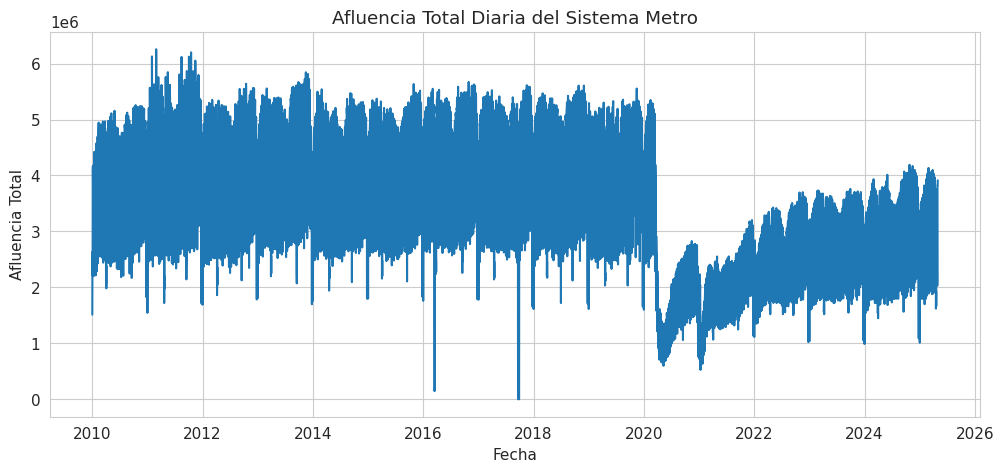

In [9]:
# CELDA: Carga y Procesamiento de Datos de AFLUENCIA
# Esta celda se ejecuta DESPUÉS de la Celda 3 (Limpieza Principal)
# y ANTES de la Celda del Modelo Prophet.

import pandas as pd
import matplotlib.pyplot as plt
import os # Asegurarse de que esté importado al inicio del notebook

print("\n--- Cargando y Procesando Datos de Afluencia del Metro ---")

# --- DEFINIR RUTA DE GUARDADO PARA VISUALIZACIONES ---
# Asegúrate que esta ruta base ya está definida en una celda anterior (ej. al inicio de la sección 4)
# SAVE_PATH_BASE = '/content/drive/MyDrive/PP_Robo_Metro_CDMX/visualizaciones/prophet_analysis/'
# os.makedirs(SAVE_PATH_BASE, exist_ok=True) # Asegurar que la carpeta existe

AFLUENCIA_CSV_PATH = '/content/drive/MyDrive/PP_Robo_Metro_CDMX/Nootebooks/datos_brutos/Afluencia_metro-2025-05-18.csv' # Ajusta esta ruta

df_afluencia_diaria_total = None # Inicializar la variable globalmente para asegurar que siempre exista

try:
    df_afluencia_raw = pd.read_csv(AFLUENCIA_CSV_PATH, encoding='UTF-8')
    print("Datos de afluencia raw cargados.")
    print(f"Dimensiones de datos de afluencia raw: {df_afluencia_raw.shape}")
    print(f"Columnas en datos de afluencia raw: {df_afluencia_raw.columns.tolist()}")
    display(df_afluencia_raw.head())

    # --- NOMBRES DE COLUMNA A AJUSTAR (CRUCIAL) ---
    # AJUSTA ESTOS NOMBRES DE COLUMNA SEGÚN TU ARCHIVO DE AFLUENCIA REAL.
    # Los obtuve de tu salida anterior: 'fecha', 'afluencia', 'estacion'
    DATE_COL_AFLUENCIA = 'fecha'
    STATION_COL_AFLUENCIA = 'estacion' # Si tu archivo tiene afluencia por estación
    COUNT_COL_AFLUENCIA = 'afluencia'

    # 1. Convertir fecha a datetime
    if DATE_COL_AFLUENCIA in df_afluencia_raw.columns:
        df_afluencia_raw['ds'] = pd.to_datetime(df_afluencia_raw[DATE_COL_AFLUENCIA], errors='coerce')
        df_afluencia_raw.dropna(subset=['ds'], inplace=True)
        print(f"\nRango de fechas en datos de afluencia: {df_afluencia_raw['ds'].min()} a {df_afluencia_raw['ds'].max()}")
    else:
        raise ValueError(f"Columna de fecha '{DATE_COL_AFLUENCIA}' no encontrada en datos de afluencia.")

    # 2. Convertir columna de afluencia a numérico
    if COUNT_COL_AFLUENCIA in df_afluencia_raw.columns:
        df_afluencia_raw[COUNT_COL_AFLUENCIA] = pd.to_numeric(df_afluencia_raw[COUNT_COL_AFLUENCIA], errors='coerce')
        df_afluencia_raw.dropna(subset=[COUNT_COL_AFLUENCIA], inplace=True)
        print(f"Estadísticas de la columna de afluencia '{COUNT_COL_AFLUENCIA}':")
        print(df_afluencia_raw[COUNT_COL_AFLUENCIA].describe())
    else:
        raise ValueError(f"Columna de afluencia '{COUNT_COL_AFLUENCIA}' no encontrada en datos de afluencia.")

    # --- Procesamiento para Prophet: Afluencia Total Diaria del Sistema ---
    # Agrupar por día y sumar la afluencia de todas las estaciones/líneas
    # Asumimos que tu archivo tiene 'estacion' y necesitas sumar.
    if STATION_COL_AFLUENCIA in df_afluencia_raw.columns:
        df_afluencia_diaria_total = df_afluencia_raw.groupby('ds')[COUNT_COL_AFLUENCIA].sum().reset_index()
    else: # Si el archivo ya es afluencia total diaria por fila
        df_afluencia_diaria_total = df_afluencia_raw[['ds', COUNT_COL_AFLUENCIA]].copy()

    df_afluencia_diaria_total = df_afluencia_diaria_total.rename(columns={COUNT_COL_AFLUENCIA: 'afluencia'})

    print("\nAfluencia diaria total del sistema (lista para Prophet):")
    display(df_afluencia_diaria_total.head())
    print(f"Dimensiones de afluencia diaria total: {df_afluencia_diaria_total.shape}")

    # Graficar la afluencia diaria total para inspección visual
    fig_afluencia_plot, ax_afluencia_plot = plt.subplots(figsize=(12, 5))
    ax_afluencia_plot.plot(df_afluencia_diaria_total['ds'], df_afluencia_diaria_total['afluencia'])
    ax_afluencia_plot.set_title('Afluencia Total Diaria del Sistema Metro')
    ax_afluencia_plot.set_xlabel('Fecha')
    ax_afluencia_plot.set_ylabel('Afluencia Total')
    ax_afluencia_plot.grid(True)
    try:
        if 'SAVE_PATH_BASE' in locals() and os.path.exists(SAVE_PATH_BASE):
            fig_afluencia_plot.savefig(os.path.join(SAVE_PATH_BASE, 'afluencia_total_diaria.png'), transparent=True, dpi=300, bbox_inches='tight')
            print(f"Gráfica de afluencia guardada en: {os.path.join(SAVE_PATH_BASE, 'afluencia_total_diaria.png')}")
        else:
            print("Advertencia: SAVE_PATH_BASE no definida o no existe, no se pudo guardar la gráfica de afluencia.")
    except Exception as e_save_afluencia: print(f"Error al guardar gráfica de afluencia: {e_save_afluencia}")
    plt.show()

except FileNotFoundError:
    print(f"Error: Archivo de afluencia no encontrado en '{AFLUENCIA_CSV_PATH}'.")
except ValueError as ve:
    print(f"Error en el procesamiento de columnas de afluencia: {ve}")
except Exception as e:
    print(f"Un error inesperado ocurrió al cargar o procesar la afluencia: {e}")

# 'df_afluencia_diaria_total' ahora está disponible (o None si hubo error)
# y listo para ser unido con df_prophet_input en la celda de Prophet.

---
## 4. Análisis Descriptivo Visual de Robos en Transporte Público

Ahora que nuestros datos están limpios y hemos creado variables útiles, es momento de empezar a extraer insights visualmente. En esta sección, generaremos una serie de gráficas para entender:
*   La magnitud y tendencia general de los robos a lo largo del tiempo para diferentes modos de transporte.
*   Los patrones temporales detallados (por hora del día, día de la semana, mes del año).
*   La distribución geográfica de los robos por alcaldía.

Utilizaremos las librerías `matplotlib` y `seaborn` para crear visualizaciones claras y estéticamente agradables.

### 4.1. Tendencias Temporales Generales

Observaremos la evolución mensual y anual del número de robos reportados para los principales modos de transporte identificados. Esto nos permitirá ver si hay aumentos, disminuciones o periodos particularmente problemáticos.

Directorio ya existe: /content/drive/MyDrive/PP_Robo_Metro_CDMX/Visualizaciones

--- 4.1. Visualizando Tendencias Temporales Generales ---

Generando gráfica de tendencia temporal mensual comparativa...


<ipython-input-10-23ccc07d4fb7>:81: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_to_resample.set_index('fecha_hora_hecho').resample('M').size()
<ipython-input-10-23ccc07d4fb7>:81: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_to_resample.set_index('fecha_hora_hecho').resample('M').size()
<ipython-input-10-23ccc07d4fb7>:81: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_to_resample.set_index('fecha_hora_hecho').resample('M').size()
<ipython-input-10-23ccc07d4fb7>:81: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_to_resample.set_index('fecha_hora_hecho').resample('M').size()
<ipython-input-10-23ccc07d4fb7>:81: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
 

  Gráfica de tendencia mensual guardada en /content/drive/MyDrive/PP_Robo_Metro_CDMX/Visualizaciones/tendencia_mensual_comparativa.png


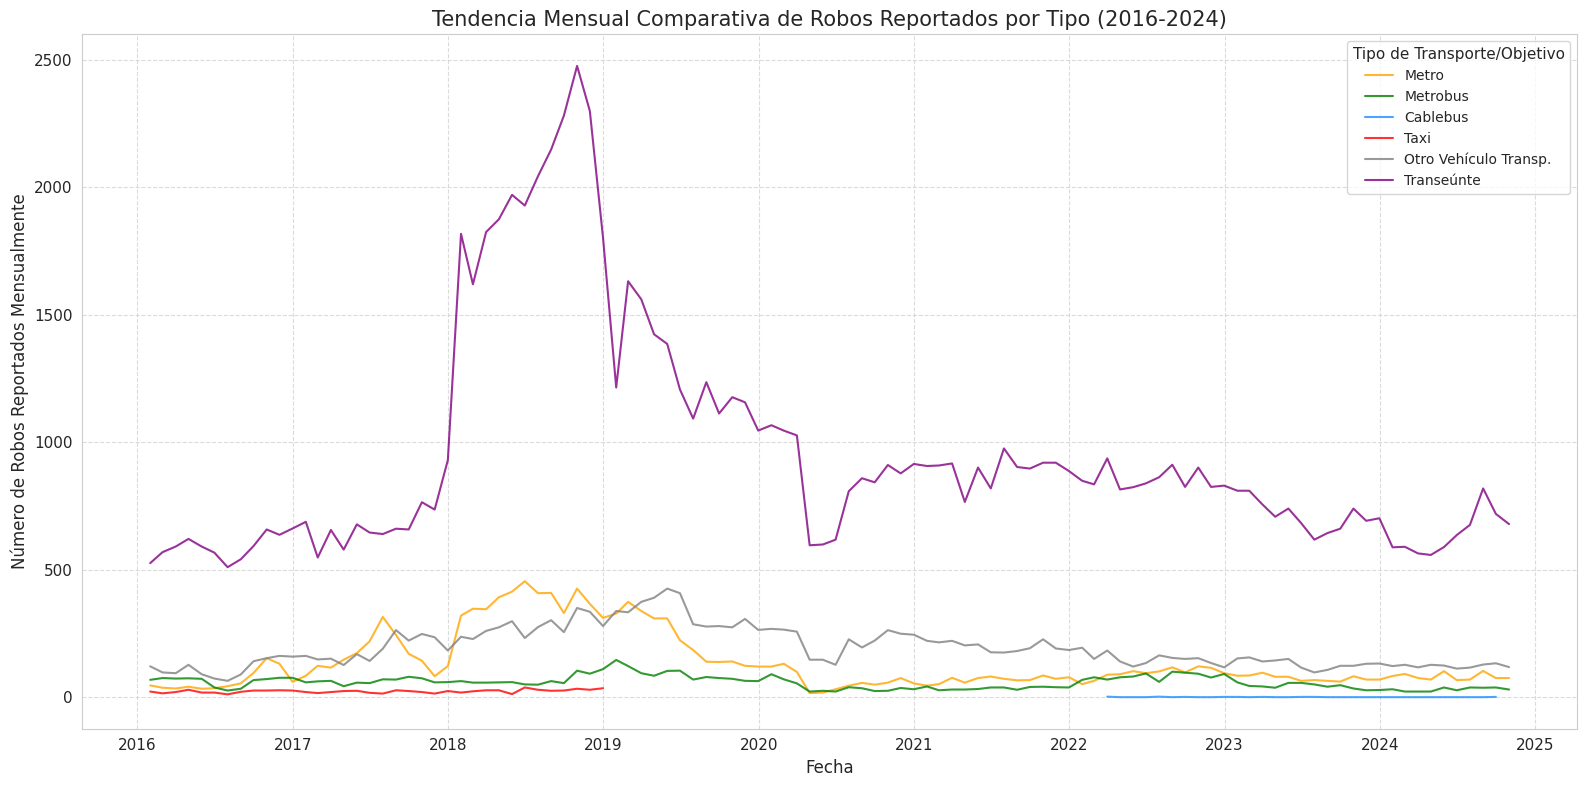


Generando gráfica de tendencia temporal anual comparativa...


<ipython-input-10-23ccc07d4fb7>:118: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual = df_to_resample.set_index('fecha_hora_hecho').resample('Y').size() # 'YE' para fin de año o 'YS' para inicio
<ipython-input-10-23ccc07d4fb7>:118: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual = df_to_resample.set_index('fecha_hora_hecho').resample('Y').size() # 'YE' para fin de año o 'YS' para inicio
<ipython-input-10-23ccc07d4fb7>:118: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual = df_to_resample.set_index('fecha_hora_hecho').resample('Y').size() # 'YE' para fin de año o 'YS' para inicio
<ipython-input-10-23ccc07d4fb7>:118: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual = df_to_resample.set_index('fecha_hora_hecho').resample('Y').size() # 'YE' par

  Gráfica de tendencia anual guardada en /content/drive/MyDrive/PP_Robo_Metro_CDMX/Visualizaciones/tendencia_anual_comparativa.png


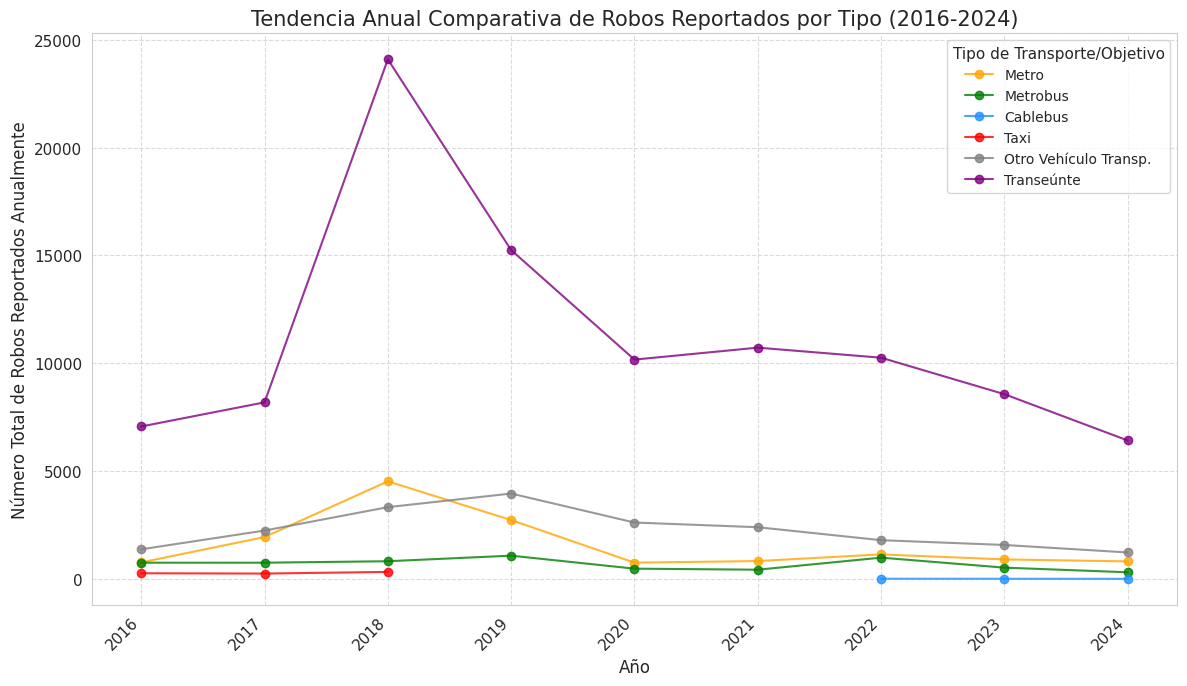

In [10]:
# CELDA: Visualizaciones Descriptivas - Tendencias Temporales

# Importar el módulo os para guardar archivos
import os
import pandas as pd # Asegurarse de que pandas esté importado si no lo está globalmente
import matplotlib.pyplot as plt # Asegurarse de que matplotlib esté importado
import seaborn as sns # Asegurarse de que seaborn esté importado

# Definir la ruta base para guardar las visualizaciones
# ¡ASEGÚRATE DE QUE ESTA RUTA EXISTE Y ES ACCESIBLE!
SAVE_PATH_BASE = '/content/drive/MyDrive/PP_Robo_Metro_CDMX/Visualizaciones' # Ajusta si es necesario

# Crear el directorio si no existe
if not os.path.exists(SAVE_PATH_BASE):
    os.makedirs(SAVE_PATH_BASE)
    print(f"Directorio creado: {SAVE_PATH_BASE}")
else:
    print(f"Directorio ya existe: {SAVE_PATH_BASE}")


# Asegurarse de que los DataFrames df_metro, df_metrobus, df_cablebus, df_taxi, df_otro_vehiculo, df_transeunte
# existen y están limpios desde la celda anterior.
# También que df_transporte_transeunte_robos existe.

print("\n--- 4.1. Visualizando Tendencias Temporales Generales ---")

# Definir los DataFrames y propiedades para plotear (similar a como lo hicimos para Prophet)
# Asegúrate de que los nombres de DataFrame coincidan con los creados en la celda anterior.
# Si solo creaste df_otros_transportes y df_transeunte, ajusta aquí.
# Para este ejemplo, asumimos que se crearon df_cablebus, df_taxi, df_otro_vehiculo, df_transeunte individualmente
# o que los creamos aquí filtrando df_transporte_transeunte_robos.

# Re-crear DataFrames individuales si no existen globalmente o para asegurar consistencia:
# Asegúrate que df_transporte_transeunte_robos esté definido y no vacío antes de filtrar
if 'df_transporte_transeunte_robos' in locals() and isinstance(df_transporte_transeunte_robos, pd.DataFrame) and not df_transporte_transeunte_robos.empty:
    df_cablebus_viz = df_transporte_transeunte_robos[df_transporte_transeunte_robos['transport_mode'] == 'Cablebus'].copy()
    df_taxi_viz = df_transporte_transeunte_robos[df_transporte_transeunte_robos['transport_mode'] == 'Taxi'].copy()
    df_transeunte_viz = df_transporte_transeunte_robos[df_transporte_transeunte_robos['transport_mode'] == 'Transeunte'].copy()
    df_otro_vehiculo_viz = df_transporte_transeunte_robos[df_transporte_transeunte_robos['transport_mode'] == 'Otro Vehiculo Transporte'].copy() # Asegúrate que este sea el nombre en 'transport_mode'
    # df_metro y df_metrobus ya deberían existir
else:
    print("Advertencia: df_transporte_transeunte_robos no está disponible o está vacío. Las gráficas podrían estar incompletas.")
    # Crear DataFrames vacíos para evitar errores si no existen
    df_cablebus_viz = pd.DataFrame(columns=['fecha_hora_hecho'])
    df_taxi_viz = pd.DataFrame(columns=['fecha_hora_hecho'])
    df_transeunte_viz = pd.DataFrame(columns=['fecha_hora_hecho'])
    df_otro_vehiculo_viz = pd.DataFrame(columns=['fecha_hora_hecho'])


transport_modes_to_plot_desc = {
    'Metro': {'df': df_metro, 'color': 'orange', 'label': 'Metro'},
    'Metrobus': {'df': df_metrobus, 'color': 'green', 'label': 'Metrobus'},
    'Cablebus': {'df': df_cablebus_viz, 'color': 'dodgerblue', 'label': 'Cablebus'},
    'Taxi': {'df': df_taxi_viz, 'color': 'red', 'label': 'Taxi'},
    'Otro Vehiculo Transporte': {'df': df_otro_vehiculo_viz, 'color': 'grey', 'label': 'Otro Vehículo Transp.'},
    'Transeunte': {'df': df_transeunte_viz, 'color': 'purple', 'label': 'Transeúnte'}
}

# Periodo para títulos (basado en el DataFrame más completo de robos relevantes)
# Asegurarse que el DataFrame base_xticks_df se define correctamente
base_xticks_df = df_metro if 'df_metro' in locals() and isinstance(df_metro, pd.DataFrame) and not df_metro.empty else (df_transporte_transeunte_robos if 'df_transporte_transeunte_robos' in locals() and isinstance(df_transporte_transeunte_robos, pd.DataFrame) and not df_transporte_transeunte_robos.empty else None)

if base_xticks_df is not None and not base_xticks_df.empty and 'fecha_hora_hecho' in base_xticks_df.columns:
    min_year_desc = base_xticks_df['fecha_hora_hecho'].dt.year.min()
    max_year_desc = base_xticks_df['fecha_hora_hecho'].dt.year.max()
    period_title_desc = f"({min_year_desc}-{max_year_desc})"
else:
    period_title_desc = "(Periodo No Determinado)"
    print("Advertencia: No se pudo determinar el rango de fechas para los títulos de las gráficas.")


# --- Tendencia Mensual Comparativa ---
print("\nGenerando gráfica de tendencia temporal mensual comparativa...")
plt.figure(figsize=(16, 8))
any_monthly_data = False
for mode, props in transport_modes_to_plot_desc.items():
    if 'df' in props and isinstance(props['df'], pd.DataFrame) and not props['df'].empty and 'fecha_hora_hecho' in props['df'].columns:
        # Asegurar que el df no esté vacío después de filtrar por fechas si es necesario
        df_to_resample = props['df']
        if not df_to_resample.empty: # Doble chequeo
            df_monthly = df_to_resample.set_index('fecha_hora_hecho').resample('M').size()
            if not df_monthly.empty:
                plt.plot(df_monthly.index, df_monthly.values, label=props['label'], color=props['color'], alpha=0.8, linewidth=1.5)
                any_monthly_data = True
    else:
        print(f"  Datos no disponibles o DataFrame vacío para '{props.get('label', mode)}' en tendencia mensual.")

if any_monthly_data:
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Número de Robos Reportados Mensualmente', fontsize=12)
    plt.title(f'Tendencia Mensual Comparativa de Robos Reportados por Tipo {period_title_desc}', fontsize=15)
    plt.legend(title='Tipo de Transporte/Objetivo', fontsize=10, title_fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    # Guardar la gráfica
    try:
        plt.savefig(os.path.join(SAVE_PATH_BASE, 'tendencia_mensual_comparativa.png'), transparent=True, dpi=300, bbox_inches='tight')
        print(f"  Gráfica de tendencia mensual guardada en {os.path.join(SAVE_PATH_BASE, 'tendencia_mensual_comparativa.png')}")
    except Exception as e:
        print(f"  Error al guardar la gráfica de tendencia mensual: {e}")

    plt.show()
else:
    print("  No se generó la gráfica de tendencia mensual: no hay datos para los modos seleccionados.")


# --- Tendencia Anual Comparativa ---
print("\nGenerando gráfica de tendencia temporal anual comparativa...")
plt.figure(figsize=(12, 7))
any_annual_data = False
# Usar un DataFrame no vacío para los xticks si es posible
# base_xticks_df ya está definido arriba

for mode, props in transport_modes_to_plot_desc.items():
    if 'df' in props and isinstance(props['df'], pd.DataFrame) and not props['df'].empty and 'fecha_hora_hecho' in props['df'].columns:
        df_to_resample = props['df']
        if not df_to_resample.empty:
            df_annual = df_to_resample.set_index('fecha_hora_hecho').resample('Y').size() # 'YE' para fin de año o 'YS' para inicio
            if not df_annual.empty:
                plt.plot(df_annual.index.year, df_annual.values, marker='o', linestyle='-', label=props['label'], color=props['color'], alpha=0.8, linewidth=1.5)
                any_annual_data = True
    else:
        print(f"  Datos no disponibles o DataFrame vacío para '{props.get('label', mode)}' en tendencia anual.")

if any_annual_data:
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('Número Total de Robos Reportados Anualmente', fontsize=12)
    plt.title(f'Tendencia Anual Comparativa de Robos Reportados por Tipo {period_title_desc}', fontsize=15)
    if base_xticks_df is not None and not base_xticks_df.empty and 'fecha_hora_hecho' in base_xticks_df.columns:
        # Generar xticks para todos los años presentes en el DataFrame base
        all_years = sorted(base_xticks_df['fecha_hora_hecho'].dt.year.unique())
        plt.xticks(all_years, fontsize=11, rotation=45, ha='right')
    else:
        plt.xticks(fontsize=11, rotation=45, ha='right')
    plt.yticks(fontsize=11)
    plt.legend(title='Tipo de Transporte/Objetivo', fontsize=10, title_fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    # Guardar la gráfica
    try:
        plt.savefig(os.path.join(SAVE_PATH_BASE, 'tendencia_anual_comparativa.png'), transparent=True, dpi=300, bbox_inches='tight')
        print(f"  Gráfica de tendencia anual guardada en {os.path.join(SAVE_PATH_BASE, 'tendencia_anual_comparativa.png')}")
    except Exception as e:
        print(f"  Error al guardar la gráfica de tendencia anual: {e}")
    plt.show()
else:
    print("  No se generó la gráfica de tendencia anual: no hay datos para los modos seleccionados.")

## Grafico comparando exclusivamente modalidades de transporte


Generando gráfica de tendencia temporal mensual (enfocada en modos de transporte)...


<ipython-input-11-cbd314868c30>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = current_df.set_index('fecha_hora_hecho').resample('M').size() # No es necesario rename aquí
<ipython-input-11-cbd314868c30>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = current_df.set_index('fecha_hora_hecho').resample('M').size() # No es necesario rename aquí
<ipython-input-11-cbd314868c30>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = current_df.set_index('fecha_hora_hecho').resample('M').size() # No es necesario rename aquí
<ipython-input-11-cbd314868c30>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = current_df.set_index('fecha_hora_hecho').resample('M').size() # No es necesario rename aquí
<ipython-input-11-cbd314868c30>:

  Gráfica de tendencia mensual enfocada guardada en: /content/drive/MyDrive/PP_Robo_Metro_CDMX/Visualizaciones/tendencia_mensual_transporte_enfocada.png


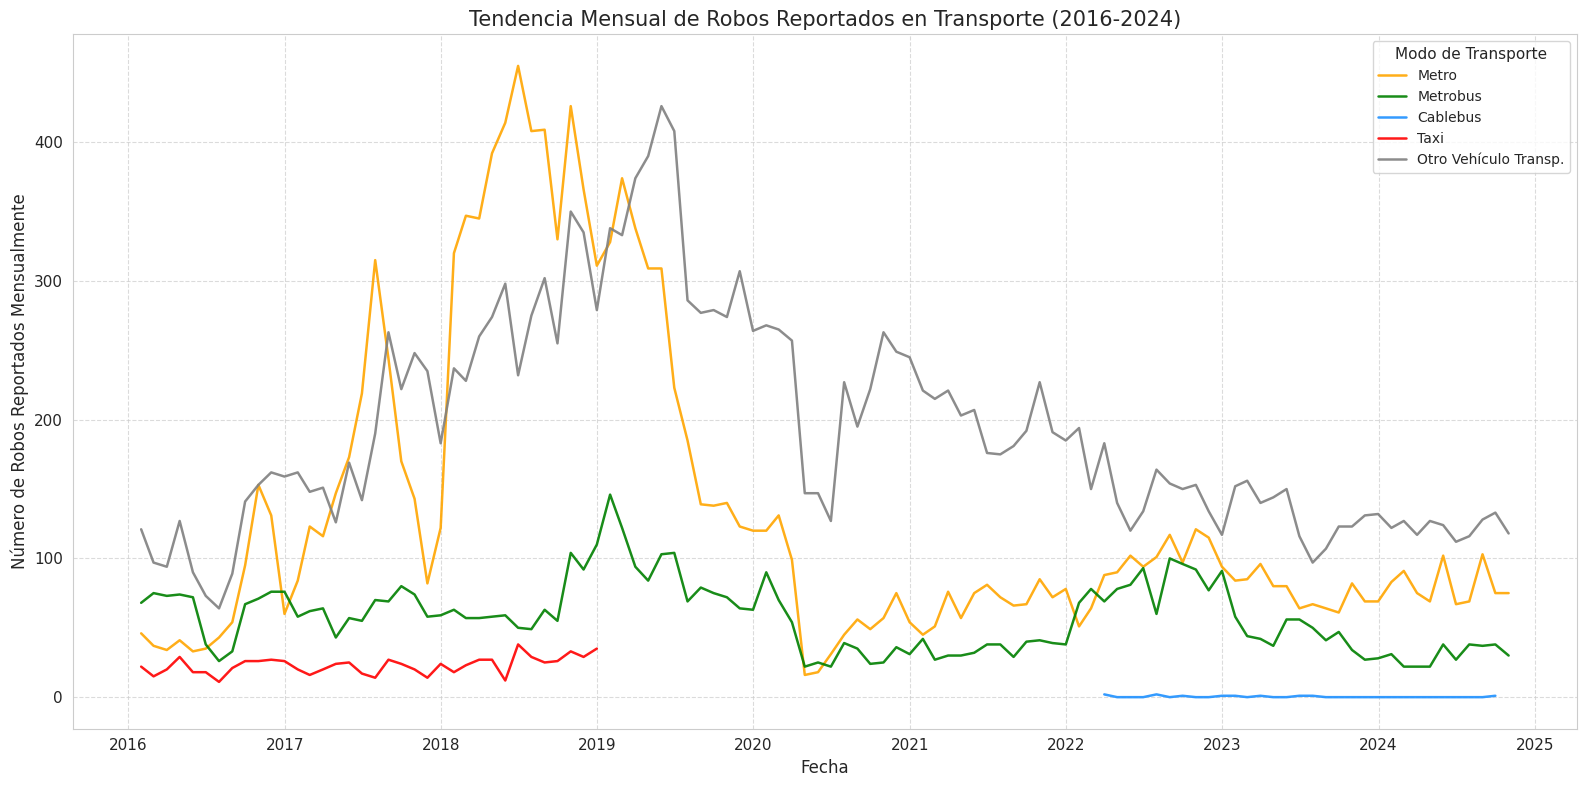


Generando gráfica de tendencia temporal anual comparativa (puede incluir Transeúnte o no)...
  Gráfica de tendencia anual (todos) guardada.


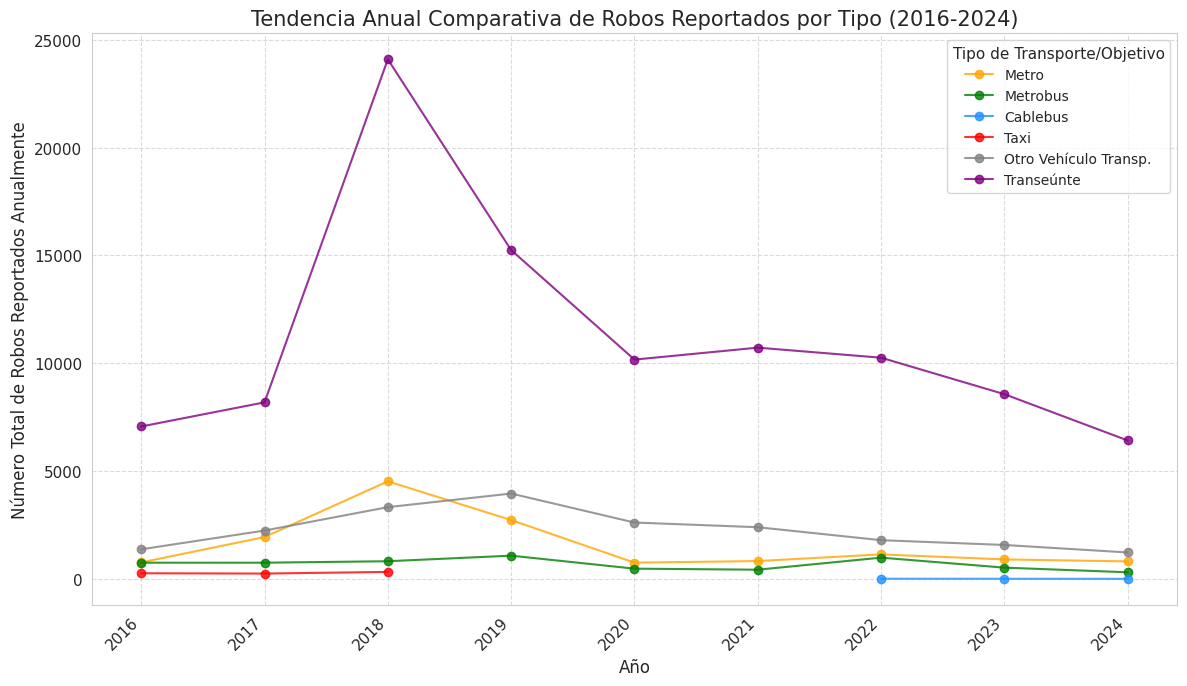

In [11]:
# En la CELDA: Visualizaciones Descriptivas - Tendencias Temporales

# ... (código anterior de configuración y creación de DataFrames individuales si es necesario) ...
# ... (definición de period_title_desc) ...

# --- Tendencia Mensual Comparativa (Enfocada en Modos de Transporte) ---
print("\nGenerando gráfica de tendencia temporal mensual (enfocada en modos de transporte)...")

# Definir las categorías y sus propiedades PARA ESTE GRÁFICO ESPECÍFICO
# Excluimos 'Transeunte' y 'Otro Delito'
transport_modes_focused_monthly = {
    'Metro': {'df': df_metro, 'color': 'orange', 'label': 'Metro'},
    'Metrobus': {'df': df_metrobus, 'color': 'green', 'label': 'Metrobus'},
    'Cablebus': {'df': df_cablebus_viz, 'color': 'dodgerblue', 'label': 'Cablebus'},
    'Taxi': {'df': df_taxi_viz, 'color': 'red', 'label': 'Taxi'},
    'Otro Vehiculo Transporte': {'df': df_otro_vehiculo_viz, 'color': 'grey', 'label': 'Otro Vehículo Transp.'}
}

plt.figure(figsize=(16, 8))
any_monthly_data_focused = False
for mode, props in transport_modes_focused_monthly.items():
    # Verificar que el DataFrame 'df' dentro de props no sea None y no esté vacío
    current_df = props.get('df') # Usar .get() para evitar KeyError si 'df' falta
    if isinstance(current_df, pd.DataFrame) and not current_df.empty and 'fecha_hora_hecho' in current_df.columns:
        df_monthly = current_df.set_index('fecha_hora_hecho').resample('M').size() # No es necesario rename aquí
        if not df_monthly.empty:
            plt.plot(df_monthly.index, df_monthly.values, label=props['label'], color=props['color'], alpha=0.9, linewidth=1.8)
            any_monthly_data_focused = True
    else:
        print(f"  Datos no disponibles o DataFrame vacío para '{props.get('label', mode)}' en tendencia mensual enfocada.")

if any_monthly_data_focused:
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Número de Robos Reportados Mensualmente', fontsize=12)
    plt.title(f'Tendencia Mensual de Robos Reportados en Transporte {period_title_desc}', fontsize=15)
    plt.legend(title='Modo de Transporte', fontsize=10, title_fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Guardar esta gráfica específica
    file_name_monthly_focused = 'tendencia_mensual_transporte_enfocada.png'
    try:
        plt.savefig(os.path.join(SAVE_PATH_BASE, file_name_monthly_focused), transparent=True, dpi=300, bbox_inches='tight')
        print(f"  Gráfica de tendencia mensual enfocada guardada en: {os.path.join(SAVE_PATH_BASE, file_name_monthly_focused)}")
    except Exception as e_save:
        print(f"  Error al guardar gráfica de tendencia mensual enfocada: {e_save}")
    plt.show()
else:
    print("  No se generó la gráfica de tendencia mensual enfocada: no hay datos para los modos seleccionados.")

# --- Tendencia Anual Comparativa (Puede mantenerse como estaba o también enfocarse) ---
# Si también quieres enfocar la anual, aplica una lógica similar con `transport_modes_focused_monthly`
print("\nGenerando gráfica de tendencia temporal anual comparativa (puede incluir Transeúnte o no)...")
# ... (tu código de tendencia anual puede ir aquí, decide si usas
#      transport_modes_to_plot_desc (todos) o transport_modes_focused_monthly (enfocado)) ...
# Por ahora, mantendré la que incluye todos para que veas la diferencia, pero puedes cambiarla.

plt.figure(figsize=(12, 7))
any_annual_data = False
base_xticks_df = df_metro if 'df_metro' in locals() and not df_metro.empty else \
                 (df_transporte_transeunte_robos if 'df_transporte_transeunte_robos' in locals() and not df_transporte_transeunte_robos.empty else None)

for mode, props in transport_modes_to_plot_desc.items(): # Usando el diccionario original que incluye Transeunte
    current_df = props.get('df')
    if isinstance(current_df, pd.DataFrame) and not current_df.empty and 'fecha_hora_hecho' in current_df.columns:
        df_annual = current_df.set_index('fecha_hora_hecho').resample('YE').size() # 'YE' para fin de año
        if not df_annual.empty:
            plt.plot(df_annual.index.year, df_annual.values, marker='o', linestyle='-', label=props['label'], color=props['color'], alpha=0.8, linewidth=1.5)
            any_annual_data = True
    else:
        print(f"  Datos no disponibles o DataFrame vacío para '{props.get('label', mode)}' en tendencia anual.")

if any_annual_data:
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('Número Total de Robos Reportados Anualmente', fontsize=12)
    plt.title(f'Tendencia Anual Comparativa de Robos Reportados por Tipo {period_title_desc}', fontsize=15)
    if base_xticks_df is not None and not base_xticks_df.empty and 'fecha_hora_hecho' in base_xticks_df.columns:
        all_years = sorted(base_xticks_df['fecha_hora_hecho'].dt.year.unique())
        plt.xticks(all_years, fontsize=11, rotation=45, ha='right')
    else:
        plt.xticks(fontsize=11, rotation=45, ha='right')
    plt.yticks(fontsize=11)
    plt.legend(title='Tipo de Transporte/Objetivo', fontsize=10, title_fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(SAVE_PATH_BASE, 'tendencia_anual_comparativa_todos.png'), transparent=True, dpi=300, bbox_inches='tight')
    print(f"  Gráfica de tendencia anual (todos) guardada.")
    plt.show()
else:
    print("  No se generó la gráfica de tendencia anual: no hay datos para los modos seleccionados.")

##Interpretacion de los datos:
**En general:** Observamos un fenómeno curioso con los robos en taxi: después de ser una constante en nuestros datos, prácticamente desaparecen alrededor de 2019. ¿Se volvieron los taxistas de la CDMX expertos en artes marciales de la noche a la mañana? ¿O será que el auge de las plataformas de transporte como Uber y Didi no solo cambió la forma en que nos movemos, sino también la forma en que se reportan (o no) los delitos en este tipo de viajes? Es un misterio que nuestros datos actuales no resuelven del todo, pero que nos recuerda cómo la tecnología y los hábitos sociales pueden redibujar el mapa del delito.

*   **Cablebus:** Es un caso claro de "nueva tecnología, nuevos datos (y nuevos problemas)". Es un buen punto para mencionar la evolución del sistema de transporte.
*   **Taxi:** La "desaparición" de los robos en taxi es una historia interesante. Puedes presentarla como un enigma o un reflejo de cambios sociales y tecnológicos más amplios.

**1. ¿Qué Significa la Modalidad "Otro Vehículo Transporte"?**

Cuando definimos las categorías, la lógica para `'is_otro_vehiculo_robo'` fue:

```python
df['is_otro_vehiculo_robo'] = df['delito'].str.contains(
    'ROBO A PASAJERO / CONDUCTOR DE VEHICULO|ROBO A PASAJERO A BORDO DE PESERO COLECTIVO|ROBO A PASAJERO EN RTP|ROBO A PASAJERO EN TREN LIGERO|ROBO A PASAJERO EN TREN SUBURBANO|ROBO A PASAJERO EN TROLEBUS',
    case=False, na=False
).astype(int)
```
Y luego, en `map_to_transport_mode`, si `is_otro_vehiculo_robo` era `True` (y no había una categoría de mayor prioridad como Metro, Metrobus, Taxi, Cablebus), se asignaba a `'Otro Vehiculo Transporte'`.

**Interpretación de "Otro Vehículo Transporte":**

*   **Primariamente Transporte Público (No Metro/Metrobus/Cablebus/Taxi Formal):**
    *   **Pesero Colectivo / Microbús:** Esta es una categoría muy importante de transporte público en CDMX. Si tu string de búsqueda `PESERO COLECTIVO` o `MICROBUS` los está capturando aquí (y no los estás clasificando por separado), "Otro Vehiculo Transporte" incluirá estos.
    *   **RTP (Red de Transporte de Pasajeros):** Autobuses operados por el gobierno de la ciudad.
    *   **Tren Ligero:** El que va hacia Xochimilco.
    *   **Tren Suburbano:** Conecta con el Estado de México.
    *   **Trolebús:** Autobuses eléctricos.

**En resumen para "Otro Vehículo Transporte":** Es una categoría que probablemente agrupa principalmente **otros tipos de transporte público concesionado o gubernamental (peseros, RTP, tren ligero/suburbano, trolebús)** y, en menor medida o de forma más ambigua, **robos a pasajeros/conductores en vehículos particulares o de plataforma** si la descripción del delito no es más específica.

**2. Desaparición de Datos de "Taxi" desde 2019 y Aparición de "Cablebus" en 2022-2023:**

*   **Cablebus (Aparición en 2022-2023):**
    *   **Tu Hipótesis:** "Obviamente me parece que está relacionado con que fue fundado o implementado solo a partir de estas fechas el cablebus."
    *   **¡Correctísimo!** La Línea 1 del Cablebús se inauguró en julio de 2021 y la Línea 2 en agosto de 2021. Es completamente normal y esperado que los robos reportados en Cablebús solo comiencen a aparecer en tus datos a partir de finales de 2021 o 2022, una vez que el sistema estuvo operativo y, lamentablemente, comenzó a registrar incidentes. Tu gráfica muestra que los datos comienzan a aparecer consistentemente a partir de 2022.

*   **Taxi (Desaparición/Disminución Drástica desde ~2019):**
    *   **Tu Hipótesis:** "¿Posiblemente Uber extinguió a estos?"
    *   Esta es una hipótesis muy popular y con bastante lógica de fondo, pero la "extinción" es una palabra fuerte. Lo que probablemente ocurrió es una combinación de factores:
        1.  **Auge de las Plataformas (Uber, Didi, etc.):** Sin duda, la entrada y popularización masiva de las apps como Uber o VTC a partir de mediados de la década de 2010 (consolidándose hacia 2017-2019) **redujo significativamente el uso de taxis tradicionales** en muchas zonas y para muchos tipos de viajes. Menos uso = menos oportunidades de robo *en taxis tradicionales*.
        2.  **Cambio en la Denuncia o Clasificación:**
            *   ¿Es posible que los robos que ocurren en vehículos de estas plataformas (Apps) se denuncien de manera diferente? Quizás se clasifiquen más genéricamente como "ROBO A PASAJERO / CONDUCTOR DE VEHICULO" si no se especifica que era un Uber/Didi. Esto podría hacer que los "robos en taxi" parezcan disminuir, mientras que una parte de esos incidentes ahora podría estar oculta en la categoría "Otro Vehiculo Transporte".
            *   ¿Hubo algún cambio en cómo la FGJ clasifica o registra los delitos relacionados con taxis o VTC alrededor de 2019? A veces, las actualizaciones en los sistemas de catalogación de delitos pueden causar estos saltos.
        5.  **Impacto de la Pandemia (a partir de 2020):** La pandemia redujo todos los viajes, incluyendo los de taxi. Si tus datos de taxi ya venían disminuyendo antes de 2020, la pandemia aceleraría esa caída.

**Implicaciones para tu Análisis y Blog:**

*   **Cablebus:** Es un caso claro de "nueva tecnología, nuevos datos (y nuevos problemas)". Es un buen punto para mencionar la evolución del sistema de transporte.
*   **Taxi:** La "desaparición" de los robos en taxi es una historia interesante. Puedes presentarla como un enigma o un reflejo de cambios sociales y tecnológicos más amplios.



### 4.2. Patrones Temporales Detallados por Tipo de Transporte

Ahora, exploremos cómo varía la incidencia de robos según la hora del día, el día de la semana y el mes del año para nuestros principales modos de transporte. Esto puede revelar momentos de mayor vulnerabilidad.


--- 4.2. Visualizando Patrones Temporales Detallados Comparativos ---

Generando gráfica de patrón por hora del día...
  Gráfica de patrón horario guardada.


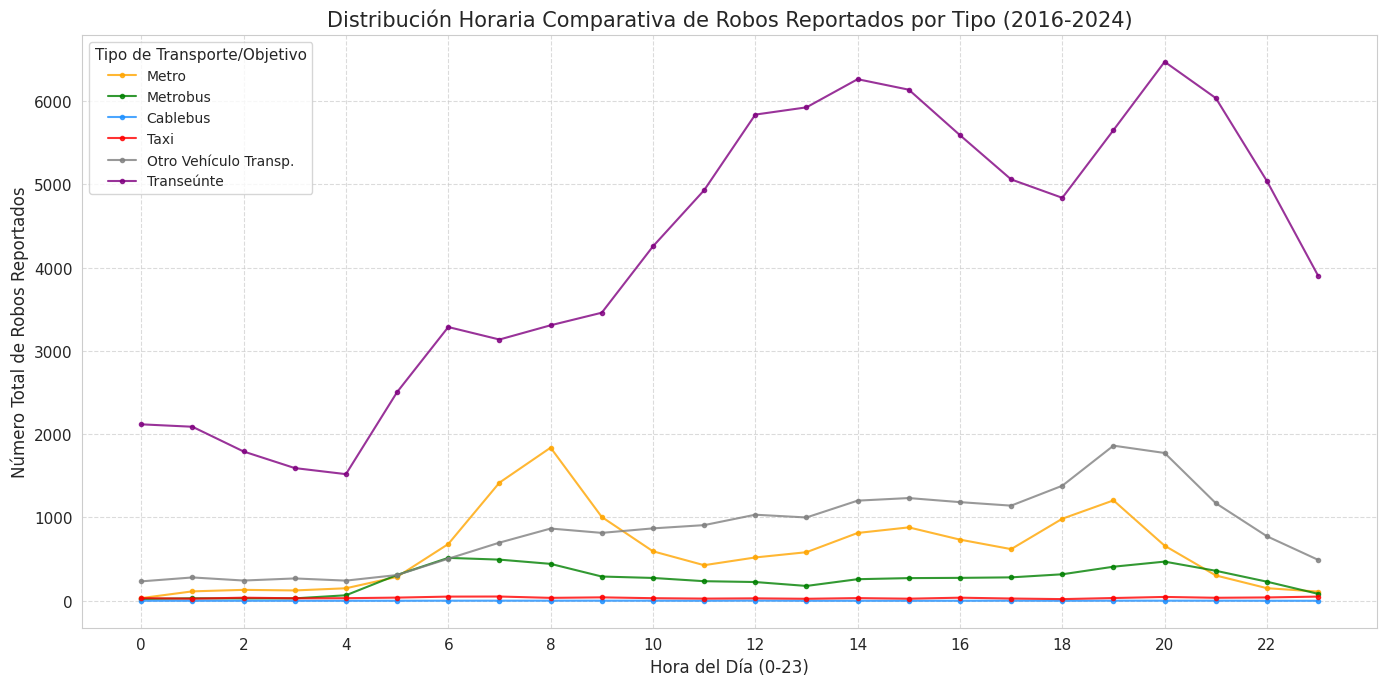


Generando gráfica de patrón por día de la semana...
  Gráfica de patrón semanal guardada.


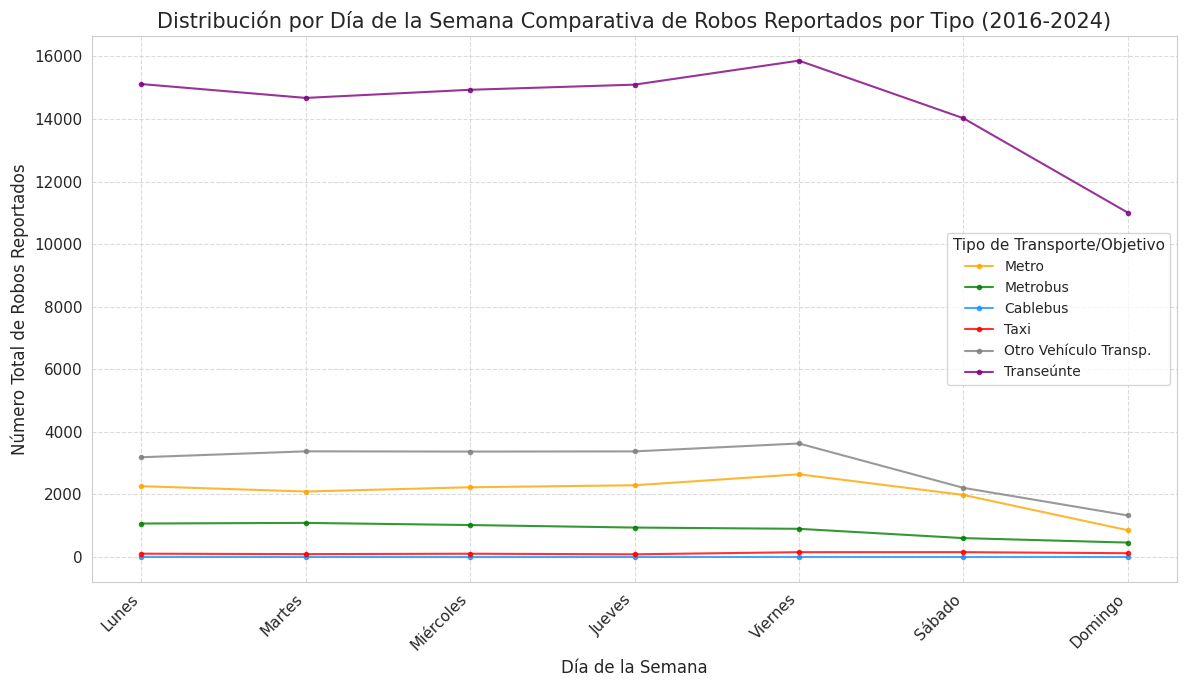


Generando gráfica de patrón por mes del año...
  Gráfica de patrón mensual guardada.


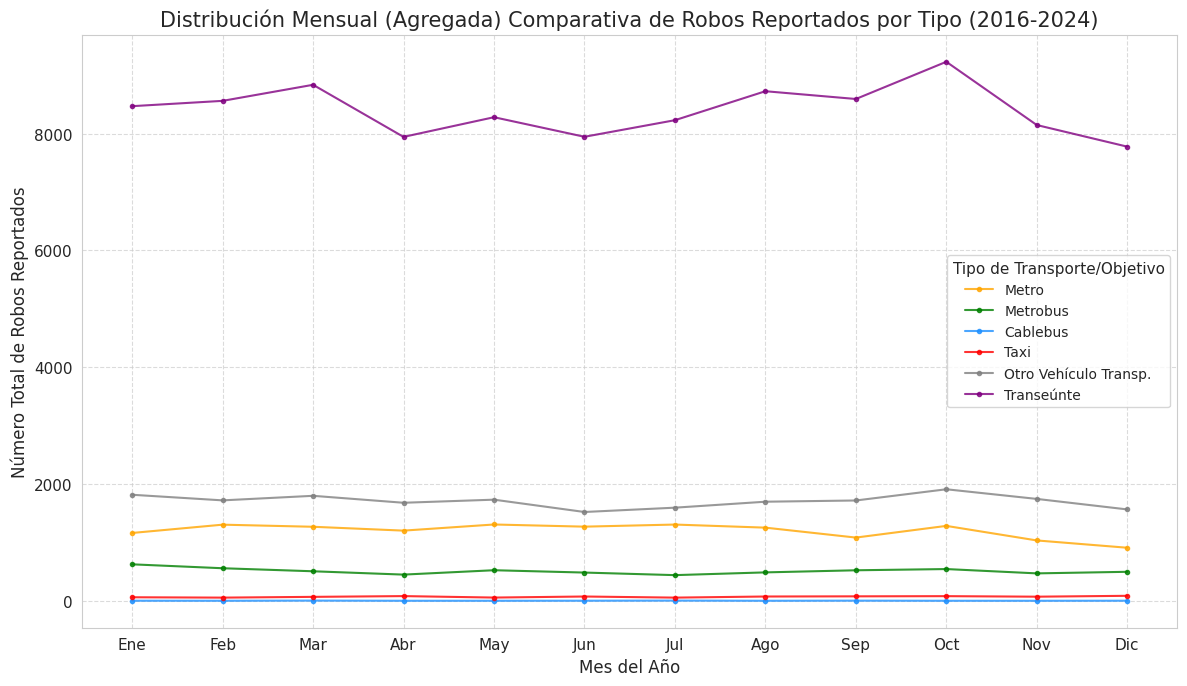

In [12]:
# CELDA: Visualizaciones Descriptivas - Patrones Detallados

print("\n--- 4.2. Visualizando Patrones Temporales Detallados Comparativos ---")

# --- Patrón por Hora del Día ---
print("\nGenerando gráfica de patrón por hora del día...")
plt.figure(figsize=(14, 7))
any_hourly_data = False
for mode, props in transport_modes_to_plot_desc.items():
    if 'df' in props and not props['df'].empty and 'hour_of_day' in props['df'].columns:
        df_to_analyze = props['df']
        if not df_to_analyze.empty:
            robberies_by_hour = df_to_analyze['hour_of_day'].value_counts().sort_index().reindex(range(24), fill_value=0)
            if not robberies_by_hour.empty:
                plt.plot(robberies_by_hour.index, robberies_by_hour.values, marker='.', linestyle='-', label=props['label'], color=props['color'], alpha=0.8, linewidth=1.5)
                any_hourly_data = True
    else:
        print(f"  Datos no disponibles o DataFrame vacío para '{props.get('label', mode)}' en patrón por hora.")

if any_hourly_data:
    plt.xlabel('Hora del Día (0-23)', fontsize=12)
    plt.ylabel('Número Total de Robos Reportados', fontsize=12)
    plt.title(f'Distribución Horaria Comparativa de Robos Reportados por Tipo {period_title_desc}', fontsize=15)
    plt.xticks(range(0, 24, 2), fontsize=11) # Ticks cada 2 horas
    plt.yticks(fontsize=11)
    plt.legend(title='Tipo de Transporte/Objetivo', fontsize=10, title_fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(SAVE_PATH_BASE, 'patron_horario_comparativo.png'), transparent=True, dpi=300, bbox_inches='tight')
    print(f"  Gráfica de patrón horario guardada.")
    plt.show()
else:
    print("  No se generó la gráfica de patrón horario: no hay datos para los modos seleccionados.")


# --- Patrón por Día de la Semana ---
print("\nGenerando gráfica de patrón por día de la semana...")
plt.figure(figsize=(12, 7))
days_of_week_labels = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
any_dow_data = False
for mode, props in transport_modes_to_plot_desc.items():
    if 'df' in props and not props['df'].empty and 'day_of_week' in props['df'].columns:
        df_to_analyze = props['df']
        if not df_to_analyze.empty:
            robberies_by_day = df_to_analyze['day_of_week'].value_counts().sort_index().reindex(range(7), fill_value=0)
            if not robberies_by_day.empty:
                plt.plot(robberies_by_day.index, robberies_by_day.values, marker='.', linestyle='-', label=props['label'], color=props['color'], alpha=0.8, linewidth=1.5)
                any_dow_data = True
    else:
        print(f"  Datos no disponibles o DataFrame vacío para '{props.get('label', mode)}' en patrón por día de semana.")

if any_dow_data:
    plt.xlabel('Día de la Semana', fontsize=12)
    plt.ylabel('Número Total de Robos Reportados', fontsize=12)
    plt.title(f'Distribución por Día de la Semana Comparativa de Robos Reportados por Tipo {period_title_desc}', fontsize=15)
    plt.xticks(range(7), days_of_week_labels, fontsize=11, rotation=45, ha='right')
    plt.yticks(fontsize=11)
    plt.legend(title='Tipo de Transporte/Objetivo', fontsize=10, title_fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(SAVE_PATH_BASE, 'patron_semanal_comparativo.png'), transparent=True, dpi=300, bbox_inches='tight')
    print(f"  Gráfica de patrón semanal guardada.")
    plt.show()
else:
    print("  No se generó la gráfica de patrón semanal: no hay datos para los modos seleccionados.")

# --- Patrón por Mes del Año ---
print("\nGenerando gráfica de patrón por mes del año...")
plt.figure(figsize=(12, 7))
months_labels = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
any_month_data = False
for mode, props in transport_modes_to_plot_desc.items():
    if 'df' in props and not props['df'].empty and 'month_of_year' in props['df'].columns: # Usar month_of_year
        df_to_analyze = props['df']
        if not df_to_analyze.empty:
            robberies_by_month = df_to_analyze['month_of_year'].value_counts().sort_index().reindex(range(1,13), fill_value=0)
            if not robberies_by_month.empty:
                plt.plot(robberies_by_month.index, robberies_by_month.values, marker='.', linestyle='-', label=props['label'], color=props['color'], alpha=0.8, linewidth=1.5)
                any_month_data = True
    else:
        print(f"  Datos no disponibles o DataFrame vacío para '{props.get('label', mode)}' en patrón por mes.")

if any_month_data:
    plt.xlabel('Mes del Año', fontsize=12)
    plt.ylabel('Número Total de Robos Reportados', fontsize=12)
    plt.title(f'Distribución Mensual (Agregada) Comparativa de Robos Reportados por Tipo {period_title_desc}', fontsize=15)
    plt.xticks(range(1, 13), months_labels, fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend(title='Tipo de Transporte/Objetivo', fontsize=10, title_fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(SAVE_PATH_BASE, 'patron_mensual_comparativo.png'), transparent=True, dpi=300, bbox_inches='tight')
    print(f"  Gráfica de patrón mensual guardada.")
    plt.show()
else:
    print("  No se generó la gráfica de patrón mensual: no hay datos para los modos seleccionados.")

### Histograma de frecuencias para afluencia especifica en el metro


--- Visualizando Histograma de Frecuencias de Robos en el Metro por Hora ---
  Gráfica de frecuencia horaria de robos en Metro guardada en: /content/drive/MyDrive/PP_Robo_Metro_CDMX/Visualizaciones/hist_frecuencia_robos_metro_hora.png


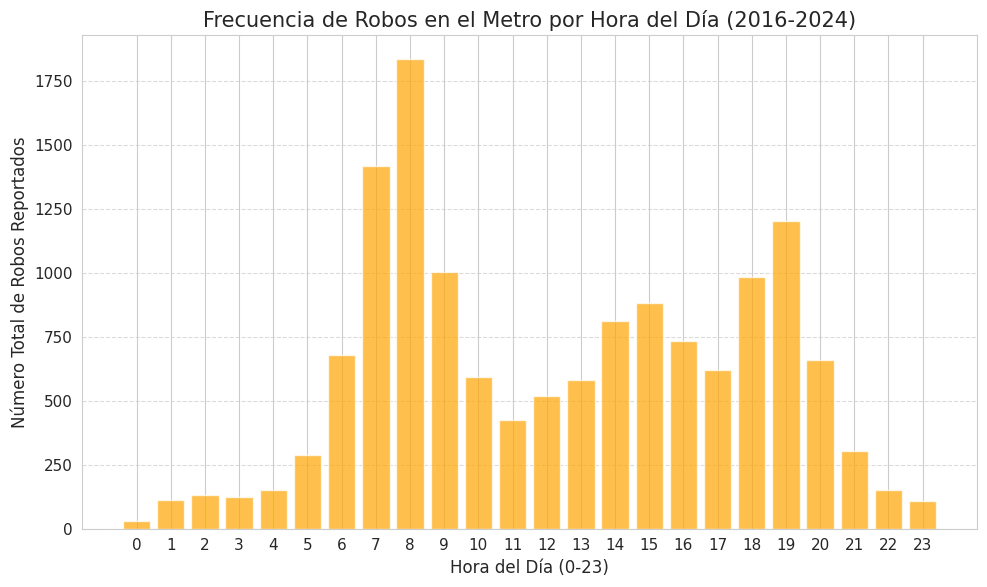

In [13]:
# prompt: Puedes crear un grafico de barras frecuencias para robos por hora especificamente en el metro

import pandas as pd
import matplotlib.pyplot as plt
print("\n--- Visualizando Histograma de Frecuencias de Robos en el Metro por Hora ---")

if 'df_metro' in locals() and isinstance(df_metro, pd.DataFrame) and not df_metro.empty and 'hour_of_day' in df_metro.columns:
    plt.figure(figsize=(10, 6))

    # Contar la frecuencia de robos por cada hora del día
    hourly_counts_metro = df_metro['hour_of_day'].value_counts().sort_index().reindex(range(24), fill_value=0)

    if not hourly_counts_metro.empty:
        plt.bar(hourly_counts_metro.index, hourly_counts_metro.values, color='orange', alpha=0.7)

        plt.xlabel('Hora del Día (0-23)', fontsize=12)
        plt.ylabel('Número Total de Robos Reportados', fontsize=12)
        plt.title(f'Frecuencia de Robos en el Metro por Hora del Día {period_title_desc}', fontsize=15)
        plt.xticks(range(0, 24), fontsize=11) # Mostrar todas las horas
        plt.yticks(fontsize=11)
        plt.grid(axis='y', linestyle='--', alpha=0.7) # Solo cuadrícula horizontal
        plt.tight_layout()

        # Guardar la gráfica
        file_name_metro_hourly = 'hist_frecuencia_robos_metro_hora.png'
        try:
            if 'SAVE_PATH_BASE' in locals() and os.path.exists(SAVE_PATH_BASE):
                 plt.savefig(os.path.join(SAVE_PATH_BASE, file_name_metro_hourly), transparent=True, dpi=300, bbox_inches='tight')
                 print(f"  Gráfica de frecuencia horaria de robos en Metro guardada en: {os.path.join(SAVE_PATH_BASE, file_name_metro_hourly)}")
            else:
                 print("  Advertencia: SAVE_PATH_BASE no definida o no existe, no se pudo guardar la gráfica.")
        except Exception as e_save:
            print(f"  Error al guardar gráfica de frecuencia horaria de robos en Metro: {e_save}")

        plt.show()
    else:
        print("  El DataFrame de Metro no tiene datos válidos en 'hour_of_day' para graficar.")

else:
    print("  El DataFrame 'df_metro' no está disponible, está vacío o le falta la columna 'hour_of_day'. No se puede generar la gráfica.")

### 4.3. Distribución Geográfica por Alcaldía

Analizaremos en qué alcaldías se concentran los robos para los diferentes modos de transporte. Presentaremos una gráfica de barras agrupadas para las 7 alcaldías con mayor incidencia general en los transportes seleccionados, mostrando la contribución de cada modo.

*Nota: Este análisis se basa en la columna `alcaldia` derivada de `alcaldia_hecho`. Una limitación es que esta podría ser la alcaldía donde se levantó la denuncia y no necesariamente donde ocurrió el hecho, especialmente para delitos dentro del sistema Metro que cruza múltiples alcaldías. Un análisis espacial más preciso requeriría georreferenciar los delitos a estaciones específicas.*


--- 4.3. Visualizando Distribución Geográfica por Alcaldía (Top 7 con % Metro) ---


<ipython-input-14-143673cf3d74>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  robberies_by_alcaldia_top7_plot['Metro_Porcentaje_Total_Metro_Top7'].fillna(0, inplace=True)


  Gráfica de Top 7 Alcaldías con % Metro guardada.


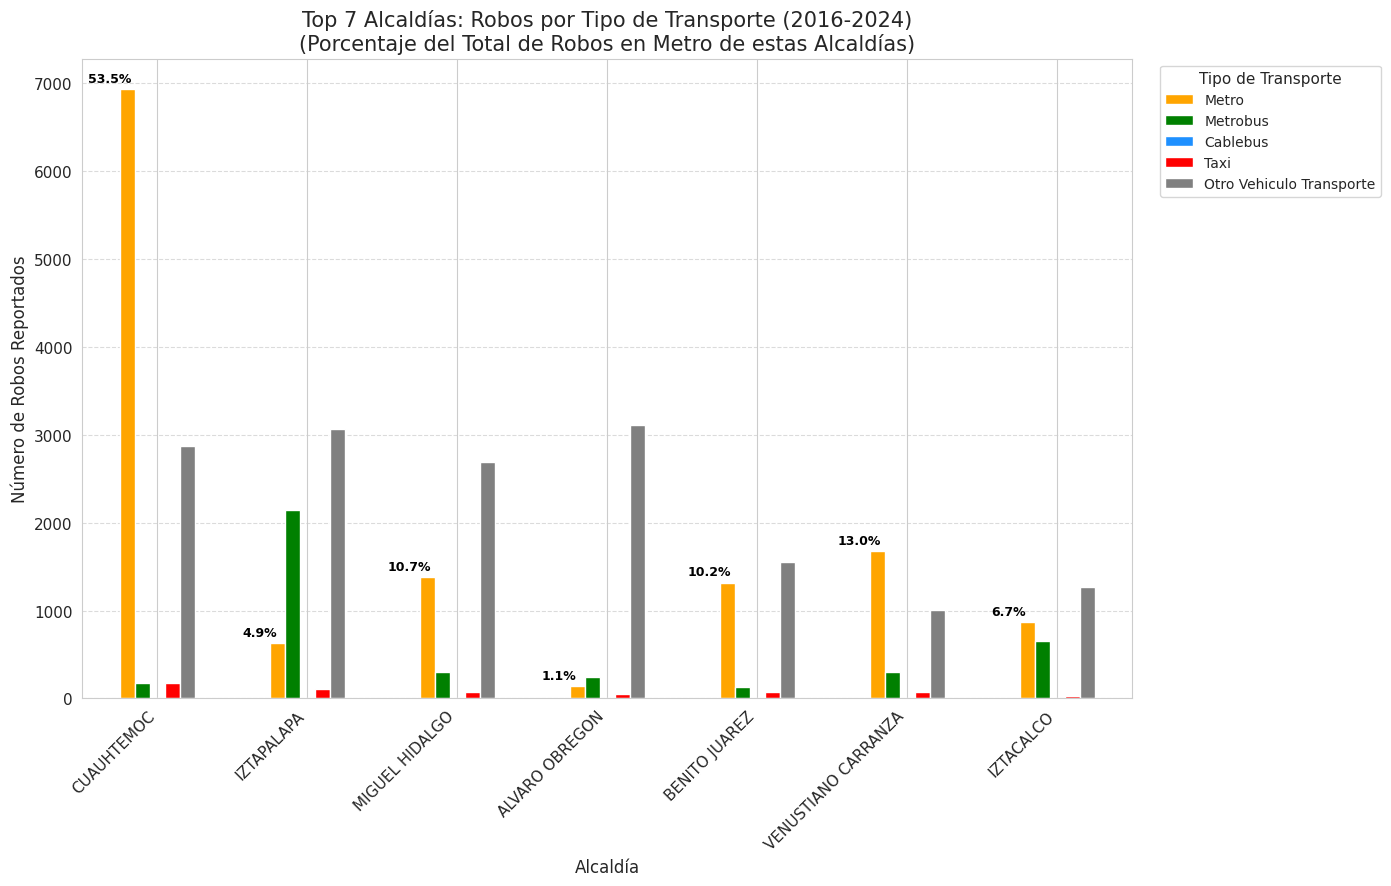

In [14]:
# CELDA: Visualizaciones Descriptivas - Distribución por Alcaldía (Agrupada y Top 7 con % Metro)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os # Asegurar que os está importado

print("\n--- 4.3. Visualizando Distribución Geográfica por Alcaldía (Top 7 con % Metro) ---")

# Reutilizar el código que ya funcionó para la gráfica de Alcaldías agrupadas
# Asegurarse de que df_transporte_transeunte_robos existe y tiene 'alcaldia' y 'transport_mode'

if 'df_transporte_transeunte_robos' not in locals() or df_transporte_transeunte_robos.empty or \
   'alcaldia' not in df_transporte_transeunte_robos.columns or \
   'transport_mode' not in df_transporte_transeunte_robos.columns:
    print("Error: df_transporte_transeunte_robos no está disponible o faltan columnas.")
else:
    transport_categories_for_alcaldia_plot = ['Metro', 'Metrobus', 'Cablebus', 'Taxi', 'Otro Vehiculo Transporte']
    df_plot_alcaldia_data = df_transporte_transeunte_robos[
        df_transporte_transeunte_robos['transport_mode'].isin(transport_categories_for_alcaldia_plot)
    ].copy()

    if not df_plot_alcaldia_data.empty:
        robberies_by_alcaldia_category_plot = df_plot_alcaldia_data.pivot_table(
            index='alcaldia', columns='transport_mode', aggfunc='size', fill_value=0
        )

        if not robberies_by_alcaldia_category_plot.empty:
            robberies_by_alcaldia_category_plot['Total_Robos_Alcaldia_Tipos_Seleccionados'] = robberies_by_alcaldia_category_plot.sum(axis=1)
            top_7_alcaldias_idx = robberies_by_alcaldia_category_plot.sort_values(by='Total_Robos_Alcaldia_Tipos_Seleccionados', ascending=False).head(7).index
            robberies_by_alcaldia_top7_plot = robberies_by_alcaldia_category_plot.loc[top_7_alcaldias_idx].copy()

            # --- CÁLCULO DEL PORCENTAJE DE METRO SOBRE EL TOTAL DE METRO DE LAS TOP 7 ALCALDÍAS ---
            total_metro_robos_top7_alcaldias = robberies_by_alcaldia_top7_plot['Metro'].sum()

            if total_metro_robos_top7_alcaldias > 0: # Evitar división por cero
                robberies_by_alcaldia_top7_plot['Metro_Porcentaje_Total_Metro_Top7'] = \
                    (robberies_by_alcaldia_top7_plot['Metro'] / total_metro_robos_top7_alcaldias) * 100
                robberies_by_alcaldia_top7_plot['Metro_Porcentaje_Total_Metro_Top7'].fillna(0, inplace=True)
            else:
                robberies_by_alcaldia_top7_plot['Metro_Porcentaje_Total_Metro_Top7'] = 0.0
                print("  Advertencia: No hay robos de Metro en las Top 7 alcaldías, los porcentajes serán 0.")

            # Quitar las columnas de total y porcentaje temporal para plotear las barras
            df_to_plot_bars = robberies_by_alcaldia_top7_plot.drop(columns=['Total_Robos_Alcaldia_Tipos_Seleccionados', 'Metro_Porcentaje_Total_Metro_Top7'], errors='ignore')

            desired_col_order_alcaldia = [col for col in transport_categories_for_alcaldia_plot if col in df_to_plot_bars.columns]
            df_to_plot_bars = df_to_plot_bars[desired_col_order_alcaldia]

            if not df_to_plot_bars.empty:
                color_map_alcaldia = {'Metro': 'orange', 'Metrobus': 'green', 'Cablebus': 'dodgerblue', 'Taxi': 'red', 'Otro Vehiculo Transporte': 'grey'}
                plot_colors_alcaldia = [color_map_alcaldia.get(col) for col in df_to_plot_bars.columns if color_map_alcaldia.get(col) is not None]

                fig_alcaldias, ax_alcaldias = plt.subplots(figsize=(16, 9))
               # --- CORRECCIÓN AQUÍ ---
                df_to_plot_bars.plot(kind='bar', stacked=False, ax=ax_alcaldias, color=plot_colors_alcaldia if plot_colors_alcaldia else None)
                # --- Añadir Anotaciones de Porcentaje para el Metro (AHORA CON EL NUEVO PORCENTAJE) ---
                if 'Metro' in df_to_plot_bars.columns:
                    metro_bar_index = df_to_plot_bars.columns.get_loc('Metro')
                    num_bars_per_group = len(df_to_plot_bars.columns)
                    bar_width = 0.8 / num_bars_per_group

                    for i, alcaldia_name in enumerate(df_to_plot_bars.index):
                        metro_height = df_to_plot_bars.loc[alcaldia_name, 'Metro']
                        # Usar el NUEVO porcentaje calculado
                        metro_percentage_to_annotate = robberies_by_alcaldia_top7_plot.loc[alcaldia_name, 'Metro_Porcentaje_Total_Metro_Top7']

                        if metro_height > 0 and metro_percentage_to_annotate > 0: # Solo anotar si hay robos de Metro y % > 0
                            ax_alcaldias.text(
                                i + (metro_bar_index - (num_bars_per_group - 1) / 2) * bar_width,
                                metro_height + 50, # Ligeramente por encima de la barra
                                f"{metro_percentage_to_annotate:.1f}%",
                                ha='center', va='bottom', fontsize=9, color='black', fontweight='bold'
                            )

                ax_alcaldias.set_xlabel('Alcaldía', fontsize=12)
                ax_alcaldias.set_ylabel('Número de Robos Reportados', fontsize=12)
                ax_alcaldias.set_title(f'Top 7 Alcaldías: Robos por Tipo de Transporte {period_title_desc}\n(Porcentaje del Total de Robos en Metro de estas Alcaldías)', fontsize=15)
                ax_alcaldias.tick_params(axis='x', rotation=45, labelsize=11); plt.setp(ax_alcaldias.get_xticklabels(), ha="right")
                ax_alcaldias.tick_params(axis='y', labelsize=11)
                ax_alcaldias.legend(title='Tipo de Transporte', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10, title_fontsize=11)
                ax_alcaldias.grid(axis='y', linestyle='--', alpha=0.7)
                plt.tight_layout(rect=[0, 0, 0.88, 1]) # Ajustar rect para que la leyenda no se corte

                # Guardar la gráfica
                try:
                    if 'SAVE_PATH_BASE' in locals() and os.path.exists(SAVE_PATH_BASE):
                        filename_pct_metro = os.path.join(SAVE_PATH_BASE, f'top7_alcaldias_transporte_agrupado_pct_metro.png')
                        plt.savefig(filename_pct_metro, transparent=True, dpi=300, bbox_inches='tight')
                        print(f"  Gráfica de Top 7 Alcaldías con % Metro guardada.")
                    else: print("  Advertencia: SAVE_PATH_BASE no definida, no se pudo guardar gráfica.")
                except Exception as e_save: print(f"  Error al guardar gráfica de alcaldías con % Metro: {e_save}")
                plt.show()
            else:
                print("  No hay datos para graficar para las Top 7 alcaldías con los tipos de transporte seleccionados.")
        else:
            print("  El pivot_table para alcaldías resultó vacío. No se puede generar gráfica.")
    else:
        print("  No hay datos en df_plot_alcaldia_data para generar la gráfica de alcaldías.")


### 4.4. Comparativa General de Modalidades de Robo

Finalmente, una vista agregada del total de robos reportados para cada una de las principales modalidades de transporte y para transeúntes.


--- 4.4. Visualizando Comparativa Total de Modalidades de Robo ---
  Gráfica de comparativa total guardada.


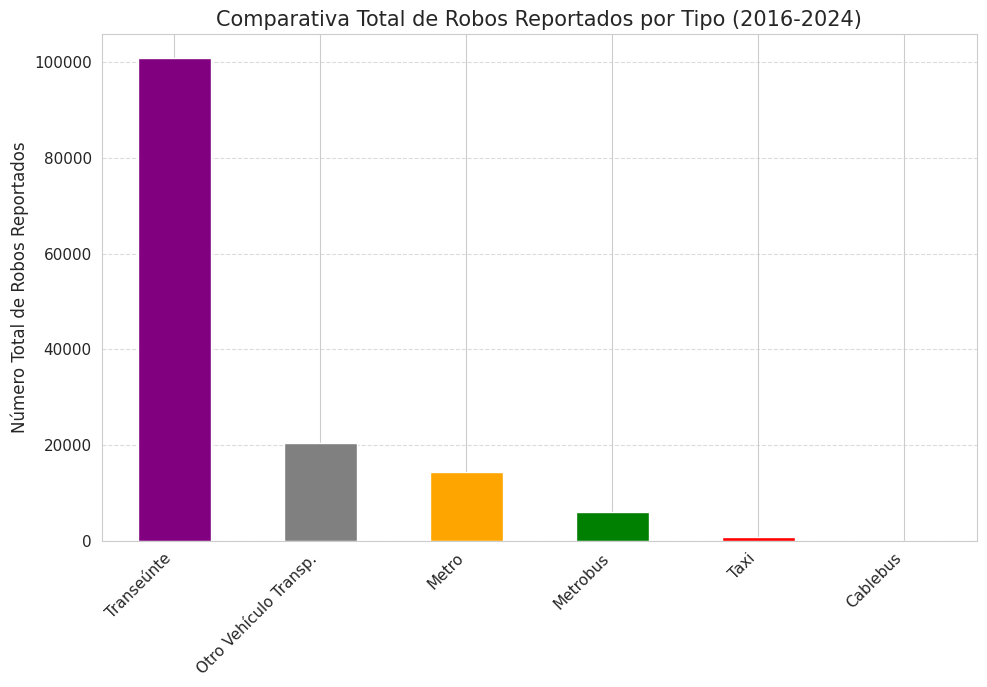


  Tabla de Totales por Modalidad:


Total Robos
Transeúnte                  100717
Otro Vehículo Transp.        20484
Metro                        14369
Metrobus                      6095
Taxi                           826
Cablebus                        11


--- Visualizaciones Descriptivas Completadas ---


In [15]:
# CELDA: Visualizaciones Descriptivas - Comparativa Total

print("\n--- 4.4. Visualizando Comparativa Total de Modalidades de Robo ---")

if 'df_transporte_transeunte_robos' in locals() and not df_transporte_transeunte_robos.empty and 'transport_mode' in df_transporte_transeunte_robos.columns:

    # Usar el diccionario transport_modes_to_plot_desc para asegurar consistencia en colores y etiquetas
    totals_dict = {}
    for mode_key, props in transport_modes_to_plot_desc.items():
        df_mode = props['df'] # El DataFrame específico para ese modo
        if isinstance(df_mode, pd.DataFrame) and not df_mode.empty:
            totals_dict[props['label']] = len(df_mode)
        else:
            totals_dict[props['label']] = 0 # Si el df está vacío o no es un df
            print(f"  Advertencia: DataFrame para '{props['label']}' está vacío o no es válido para conteo total.")

    df_totals_desc = pd.Series(totals_dict).sort_values(ascending=False)

    if not df_totals_desc.empty:
        plt.figure(figsize=(10, 7))
        # Obtener los colores en el orden de df_totals_desc
        bar_colors = []
        for label in df_totals_desc.index:
            found_color = 'grey' # Color por defecto
            for mode_key, props_dict in transport_modes_to_plot_desc.items():
                if props_dict['label'] == label:
                    found_color = props_dict['color']
                    break
            bar_colors.append(found_color)

        df_totals_desc.plot(kind='bar', color=bar_colors)
        plt.ylabel('Número Total de Robos Reportados', fontsize=12)
        plt.title(f'Comparativa Total de Robos Reportados por Tipo {period_title_desc}', fontsize=15)
        plt.xticks(rotation=45, ha='right', fontsize=11)
        plt.yticks(fontsize=11)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig(os.path.join(SAVE_PATH_BASE, 'comparativa_total_modalidades.png'), transparent=True, dpi=300, bbox_inches='tight')
        print(f"  Gráfica de comparativa total guardada.")
        plt.show()

        print("\n  Tabla de Totales por Modalidad:")
        display(pd.DataFrame(df_totals_desc, columns=['Total Robos']))
    else:
        print("  No hay datos para generar la gráfica de comparativa total.")
else:
    print("Error: df_transporte_transeunte_robos no está disponible o falta la columna 'transport_mode'.")


print("\n--- Visualizaciones Descriptivas Completadas ---")

---
## 3.3. Conclusiones del Análisis Exploratorio de Datos (EDA) y Preparación

Tras un proceso de carga, exploración, limpieza y creación de variables (ingeniería de características), hemos transformado nuestros datos brutos de carpetas de investigación en un conjunto listo para el análisis profundo. Esta fase, que involucra operaciones de `pandas` y principios de **programación para ciencia de datos**, nos permitió:

*   **Entender la Estructura de Datos:** Identificamos columnas clave como `fecha_hecho`, `hora_hecho`, `delito`, `categoria_delito`, `alcaldia_hecho`, `latitud` y `longitud`.

*   **Calidad de Datos:** Abordamos valores faltantes, que eran significativos en `alcaldia_catalogo` (99%), `competencia` (50%), y alrededor del 5% en coordenadas y nombres de colonias. Estos hallazgos guiaron nuestras decisiones sobre qué columnas usar y cómo manejar los datos incompletos.

*   **Fechas y Horas:** Procesamos la columna `fecha_hecho` y la ambigua `hora_hecho` para crear un `timestamp` unificado `fecha_hora_hecho`. Notamos que un porcentaje considerable de horas eran valores por defecto (como '12:00' o '00:00'), lo que nos llevó a decidir no usar la estacionalidad diaria en nuestro modelo predictivo con Prophet por ahora, para evitar modelar ruido.

*   **Ubicación (Alcaldías):** Confirmamos que `alcaldia_hecho` es la columna más fiable para la alcaldía reportada. La columna `alcaldia_catalogo` fue descartada debido a su alta proporción de valores nulos.

*   **Tipificación de Delitos:** Una de las tareas más importantes fue la **clasificación de robos**. Analizamos `delito` y `categoria_delito` para identificar con precisión los robos en diferentes modalidades de transporte. Por ejemplo:
    *   Robos en Metro: Claramente identificados en `categoria_delito` como 'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA'.
    *   Robos en Metrobus: Identificados en `categoria_delito` como 'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA'.
    *   Otras modalidades (Cablebús, Taxi, Transeúnte, Otros Vehículos de Transporte) fueron identificadas utilizando patrones de texto en la columna `delito` para mayor granularidad.

*   **Creación de Variables (Feature Engineering):** Generamos nuevas variables cruciales para el análisis temporal y la segmentación:
    *   Variables temporales: `day_of_week`, `hour_of_day`, `month_of_year`, `year_cal`, `is_weekend`, `is_morning_rush`, `is_evening_rush`.
    *   Variables binarias de identificación de robos: `is_metro_robo`, `is_metrobus_robo`, `is_taxi_robo`, etc.
    *   Una columna categórica `transport_mode` que agrupa los robos por el tipo de transporte o situación (Metro, Metrobus, Taxi, Transeúnte, etc.).

*   **Filtrado de DataFrames:** A partir del DataFrame `df` ya limpio y enriquecido, creamos subconjuntos específicos como `df_metro`, `df_metrobus`, y un DataFrame consolidado `df_transporte_transeunte_robos` que incluye todas las modalidades de robo en transporte y a transeúntes. Estos `DataFrames` son las estructuras de datos principales sobre las que construiremos nuestros análisis y modelos.

En resumen, esta fase nos ha proporcionado una base de datos robusta y un entendimiento fundamental de la naturaleza de los robos, permitiéndonos avanzar hacia las visualizaciones descriptivas y el modelado predictivo con confianza."

---
## 4.5. Análisis de Robos por Tipo de Violencia

La violencia es una dimensión crítica de la delincuencia. En esta subsección, profundizaremos en el análisis de los robos clasificándolos por su modalidad: "Con Violencia" o "Sin Violencia". Esto nos permitirá entender la severidad general del problema y cómo esta modalidad se distribuye entre los diferentes tipos de transporte.

### 4.5.1. Distribución General de Robos Con y Sin Violencia

Comenzaremos con una visión general a nivel de todo el sistema.


--- 4.5.1. Visualizando Distribución General de Robos Con y Sin Violencia ---
  Gráfica de pastel de violencia total guardada.


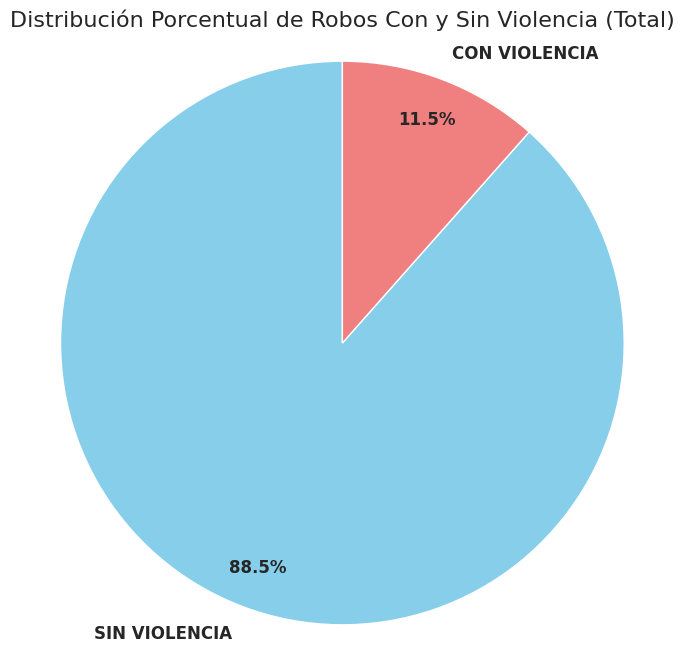


  Distribución Porcentual de Robos Con y Sin Violencia:


Porcentaje
tipo_violencia            
SIN VIOLENCIA    88.468058
CON VIOLENCIA    11.531942

In [16]:
# CELDA: Visualización - Distribución General de Robos Con y Sin Violencia

# Asegúrate de que la columna 'tipo_violencia' ya ha sido creada y populada en la celda de limpieza/variables (Celda 3).
# Asumimos que 'df' contiene todos los robos y tiene la columna 'tipo_violencia'.

print("\n--- 4.5.1. Visualizando Distribución General de Robos Con y Sin Violencia ---")

if 'tipo_violencia' in df.columns and not df.empty:
    # Calcular el número total de robos con y sin violencia
    # Asegurarse de que solo contamos los que son 'CON VIOLENCIA' o 'SIN VIOLENCIA'
    robos_violencia_counts = df[df['tipo_violencia'].isin(['CON VIOLENCIA', 'SIN VIOLENCIA'])]['tipo_violencia'].value_counts()

    # Calcular los porcentajes
    total_robos_classified = robos_violencia_counts.sum()
    if total_robos_classified > 0:
        porcentajes_violencia = (robos_violencia_counts / total_robos_classified) * 100

        # Crear el gráfico de pastel
        fig_pie, ax_pie = plt.subplots(figsize=(8, 8))
        # Usar colores más impactantes para Con Violencia
        colors_pie = ['lightcoral' if val == 'CON VIOLENCIA' else 'skyblue' for val in porcentajes_violencia.index]

        ax_pie.pie(porcentajes_violencia, labels=porcentajes_violencia.index, autopct='%1.1f%%', startangle=90, colors=colors_pie,
                   pctdistance=0.85, textprops={'fontsize': 12, 'fontweight': 'bold'}) # Ajustar tamaño y negrita para porcentaje

        ax_pie.set_title('Distribución Porcentual de Robos Con y Sin Violencia (Total)', fontsize=16)
        ax_pie.axis('equal') # Asegura que el pastel sea un círculo.

        # Guardar la gráfica
        try:
            fig_pie.savefig(os.path.join(SAVE_PATH_BASE, 'distribucion_violencia_total.png'), transparent=True, dpi=300, bbox_inches='tight')
            print(f"  Gráfica de pastel de violencia total guardada.")
        except Exception as e_save_pie: print(f"Error al guardar gráfica de pastel: {e_save_pie}")
        plt.show()

        print("\n  Distribución Porcentual de Robos Con y Sin Violencia:")
        display(porcentajes_violencia.to_frame(name='Porcentaje'))
    else:
        print("  No hay robos clasificados como 'CON VIOLENCIA' o 'SIN VIOLENCIA' para graficar el pastel.")
else:
    print("Error: Columna 'tipo_violencia' no encontrada o DataFrame vacío. No se puede generar gráfico de pastel.")

### 4.5.2. Desglose de Violencia por Modalidad de Transporte

Ahora, es momento de ver la 'cara' de la violencia en el robo. Hemos clasificado cada incidente como 'Con Violencia' o 'Sin Violencia' basándonos en la descripción del delito (`delito`). Esta distinción es crucial porque nos habla de la severidad del incidente y la experiencia de la víctima.

En este gráfico de barras apiladas, nos centraremos en las modalidades de transporte, excluyendo la categoría de 'Transeúnte' para que las barras de los modos de transporte principales (Metro, Metrobus, etc.) no queden aplastadas por la escala de los robos a peatones, permitiéndonos una comparación más clara entre ellas.

Observaremos el número total de robos para cada modalidad y la proporción de incidentes 'Con Violencia' versus 'Sin Violencia'.


--- 4.5.2. Visualizando Desglose de Violencia por Modalidad de Transporte ---
  Gráfica de violencia por modalidad guardada.


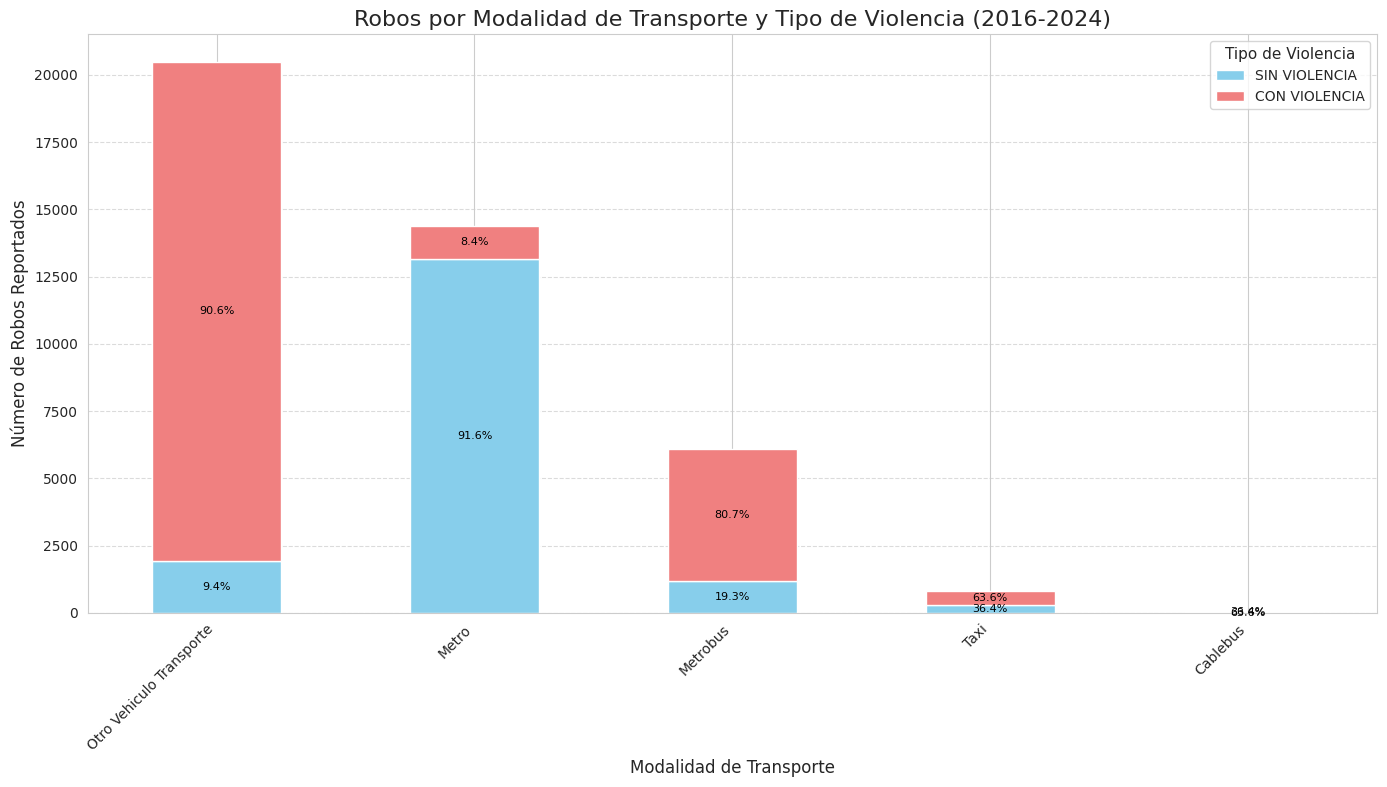


  Tabla de Conteo de Robos por Modalidad y Tipo de Violencia:


tipo_violencia            SIN VIOLENCIA  CON VIOLENCIA
transport_mode                                        
Otro Vehiculo Transporte           1930          18554
Metro                             13166           1203
Metrobus                           1174           4921
Taxi                                301            525
Cablebus                              7              4

In [17]:
# CELDA: Visualización - Desglose de Violencia por Modalidad de Transporte (Barras Apiladas)

# Asegurarse de que 'df_transporte_transeunte_robos' existe y tiene 'transport_mode' y 'tipo_violencia'.

print("\n--- 4.5.2. Visualizando Desglose de Violencia por Modalidad de Transporte ---")

if 'df_transporte_transeunte_robos' in locals() and not df_transporte_transeunte_robos.empty and \
   'transport_mode' in df_transporte_transeunte_robos.columns and 'tipo_violencia' in df_transporte_transeunte_robos.columns:

    # Definir las modalidades a incluir en esta gráfica (excluyendo 'Transeunte' y 'Otro Delito')
    modalities_for_stacked_violence = ['Metro', 'Metrobus', 'Cablebus', 'Taxi', 'Otro Vehiculo Transporte']

    df_violence_by_mode = df_transporte_transeunte_robos[
        df_transporte_transeunte_robos['transport_mode'].isin(modalities_for_stacked_violence)
    ].copy()

    # Asegurarse de que 'tipo_violencia' tenga los valores esperados
    df_violence_by_mode = df_violence_by_mode[df_violence_by_mode['tipo_violencia'].isin(['CON VIOLENCIA', 'SIN VIOLENCIA'])]


    if not df_violence_by_mode.empty:
        # Agrupar y pivotar para obtener conteos por modalidad y tipo de violencia
        stacked_plot_data = df_violence_by_mode.groupby(['transport_mode', 'tipo_violencia']).size().unstack(fill_value=0)

        # Asegurar que las columnas 'CON VIOLENCIA' y 'SIN VIOLENCIA' existan y estén en el orden deseado
        cols_for_stack = []
        if 'SIN VIOLENCIA' in stacked_plot_data.columns: cols_for_stack.append('SIN VIOLENCIA')
        if 'CON VIOLENCIA' in stacked_plot_data.columns: cols_for_stack.append('CON VIOLENCIA')
        # If there are other violence categories (e.g., 'DESCONOCIDO'), you can add or exclude them

        stacked_plot_data = stacked_plot_data[cols_for_stack]

        # Order modalities by total robberies for better visualization
        stacked_plot_data['Total_Modalidad'] = stacked_plot_data.sum(axis=1)
        stacked_plot_data = stacked_plot_data.sort_values(by='Total_Modalidad', ascending=False).drop(columns='Total_Modalidad')

        # Create the stacked bar chart
        fig_stacked_violence, ax_stacked_violence = plt.subplots(figsize=(14, 8))
        colors_stacked = ['skyblue', 'lightcoral'] # Colors for SIN VIOLENCIA, CON VIOLENCIA

        stacked_plot_data.plot(kind='bar', stacked=True, ax=ax_stacked_violence, color=colors_stacked)

        ax_stacked_violence.set_title(f'Robos por Modalidad de Transporte y Tipo de Violencia {period_title_desc}', fontsize=16)
        ax_stacked_violence.set_xlabel('Modalidad de Transporte', fontsize=12)
        ax_stacked_violence.set_ylabel('Número de Robos Reportados', fontsize=12)

        # Use setp to set horizontal alignment for x-tick labels
        plt.setp(ax_stacked_violence.get_xticklabels(), rotation=45, ha="right", fontsize=10)
        ax_stacked_violence.tick_params(axis='y', labelsize=10) # Keep y-axis tick params


        ax_stacked_violence.legend(title='Tipo de Violencia', fontsize=10, title_fontsize=11)
        ax_stacked_violence.grid(axis='y', linestyle='--', alpha=0.7)

        # Add percentages to the bars (Optional, might clutter if many bars)
        # Get the total height for each group of bars (each modality)
        totals_for_labels = stacked_plot_data.sum(axis=1)

        for container in ax_stacked_violence.containers:
            labels = []
            for i, rect in enumerate(container): # Use enumerate to get the index of the bar
                height = rect.get_height()
                if height > 0: # Only if the segment is not 0
                    # Get the total for the corresponding modality using the index 'i'
                    # The index 'i' corresponds to the row index in the sorted stacked_plot_data
                    modality_total = totals_for_labels.iloc[i]
                    percentage = (height / modality_total) * 100 if modality_total > 0 else 0
                    labels.append(f'{percentage:.1f}%')
                else:
                    labels.append('')
            ax_stacked_violence.bar_label(container, labels=labels, label_type='center', fontsize=8, color='black') # Adjust color if background is dark

        plt.tight_layout()
        try:
            plt.savefig(os.path.join(SAVE_PATH_BASE, 'violencia_por_modalidad_transporte.png'), transparent=True, dpi=300, bbox_inches='tight')
            print(f"  Gráfica de violencia por modalidad guardada.")
        except Exception as e_save_stacked: print(f"Error al guardar gráfica de violencia por modalidad: {e_save_stacked}")
        plt.show()

        print("\n  Tabla de Conteo de Robos por Modalidad y Tipo de Violencia:")
        display(stacked_plot_data)

    else:
        print("  No hay robos en las modalidades de transporte seleccionadas para esta gráfica.")
else:
    print("Error: df_transporte_transeunte_robos no está disponible o faltan columnas 'transport_mode'/'tipo_violencia'.")

### 4.5.3. Interpretación del Desglose de Violencia por Modalidad de Transporte

¡Este gráfico es una mina de oro para entender la severidad del problema! Aquí podemos observar las diferentes 'personalidades' de la violencia en el robo, dependiendo del medio de transporte:

*   **'Otro Vehículo Transporte': El Gigante Silencioso y Brutal**
    *   Esta categoría, que agrupa robos en peseros, RTP, tren ligero, trolebús y potencialmente vehículos particulares o de plataforma genéricos, es la **modalidad con el mayor número total de robos reportados**. ¡Es una cifra impactante!
    *   Pero lo que realmente salta a la vista es la **abrumadora proporción de violencia**: un escalofriante **90.6% de estos robos ocurren 'Con Violencia'**. Esto sugiere que los incidentes en estos medios son, en su mayoría, confrontaciones directas y agresivas. Es un recordatorio de que el delito no solo 'cambia de dueño' el celular, sino que a menudo lo hace a punta de amenazas o fuerza.

*   **'Metro': El Coloso de Baja Violencia**
    *   El Metro es el segundo en volumen total de robos, una cifra esperable dada su masiva afluencia. Sin embargo, su porcentaje de robos 'Con Violencia' es notablemente bajo: **¡solo un 8.4%!**
    *   Esto es un insight crucial para nuestro proyecto. A pesar de la percepción de inseguridad y la cantidad de incidentes, la gran mayoría de los robos en el Metro son de tipo **'Sin Violencia'** (carteristas, descuidos). El entorno más cerrado, la presencia de cámaras, el personal de seguridad y la propia dinámica del vagón lleno de gente pueden influir en que la violencia directa sea menos frecuente o más difícil de ejecutar. ¡Parece que los 'manos de seda' prefieren la discreción en el Metro!

*   **'Metrobus': Violencia Significativa, Menos que 'Otro Vehículo'**
    *   El Metrobus ocupa el tercer lugar en total de robos. Aquí, el porcentaje de violencia es significativo: **80.7% 'Con Violencia'**. Si bien es alto, es ligeramente menor que 'Otro Vehículo Transporte'. Esto podría deberse a la mayor visibilidad en las estaciones o la presencia de personal, pero sigue siendo un modo donde el robo es a menudo violento.

*   **'Taxi' y 'Cablebus': Menor Volumen, Variada Violencia**
    *   El **Taxi** muestra que el **63.6%** de sus robos son 'Con Violencia'. Es una proporción considerable, pero menor que 'Otro Vehículo Transporte' y Metrobus. Esto puede indicar que una parte importante de los robos en taxi son asaltos directos.
    *   El **Cablebus**, siendo la modalidad más nueva y con el menor volumen de robos, presenta un **88.6% 'Con Violencia'**. Dada la escasez de datos, este porcentaje tan alto debe interpretarse con cautela, ya que pocos incidentes violentos pueden inflar la proporción drásticamente. Sin embargo, podría señalar una vulnerabilidad inherente al sistema o a las rutas específicas.

**Reflexión Crítica y Conclusiones:**

"Este análisis nos revela una diversidad de experiencias delictivas. Contrario a la intuición o la percepción popular, el **Metro, a pesar de su volumen de incidentes, destaca por tener una prevalencia de robos 'Sin Violencia'** muy superior a otros modos. En contraste, los robos en 'Otro Vehículo Transporte' y Metrobus son predominantemente violentos, lo que sugiere que la naturaleza del robo y el riesgo percibido por el usuario varían enormemente.

Esta distinción es fundamental para diseñar estrategias de seguridad. Para el Metro, el enfoque podría ser más en la disuasión del carterismo (cámaras, personal encubierto, campañas de concientización). Para otras modalidades, la prevención de la violencia directa (mayor presencia visible, mejora en la seguridad de las unidades y rutas) sería prioritaria. ¡Un detective de datos no solo cuenta los casos, sino que también entiende cómo se sienten los golpes!"

## Modelado predictivo con Facebook Prophet


--- Iniciando Modelado con Prophet para Robos en Metro (con Regresores y Transformación Log) ---

--- 1. Preparando datos para Prophet ---
Transformación log(1+y) aplicada a la variable objetivo 'y'.
Datos para Prophet preparados: (3225, 3)

--- Estadísticas Descriptivas de Robos Diarios (columna 'y' ORIGINAL) ---
count    3225.000000
mean        4.455504
std         4.639613
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        29.000000
Name: y_orig, dtype: float64
Gráfica de distribución guardada.


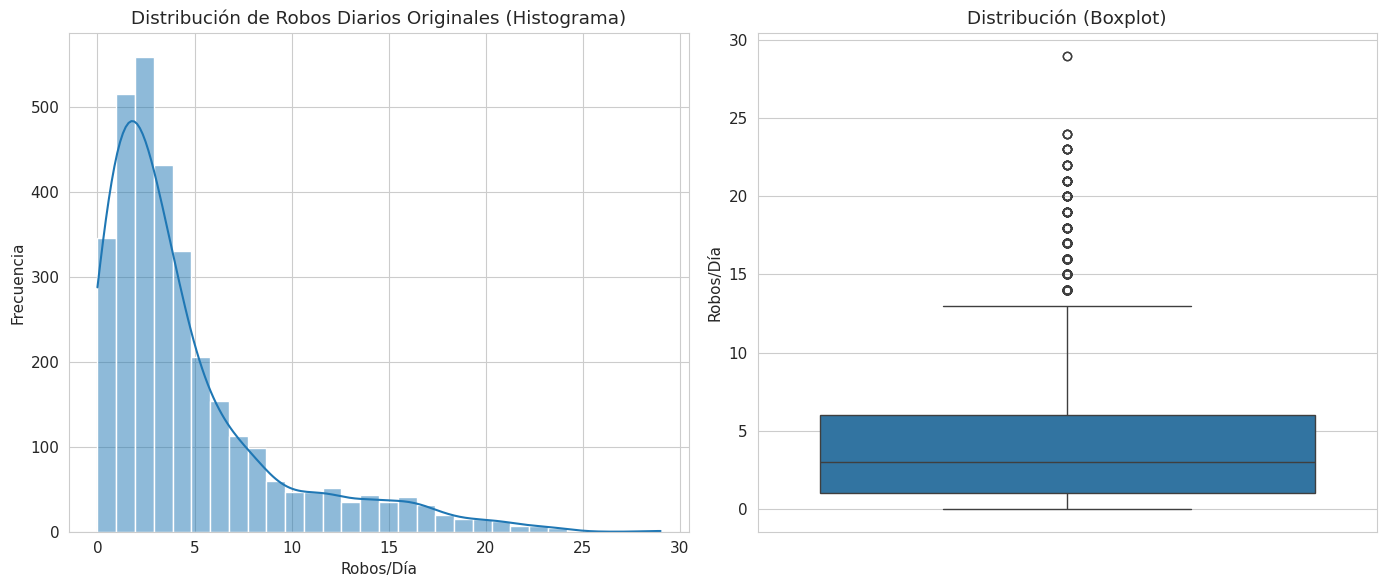


--- Uniendo datos de robo con afluencia ---
Datos de robo y afluencia unidos.

--- Añadiendo regresor de pandemia ---
Regresor 'pandemia_lockdown' creado con 535 días marcados.
Train data: (2859, 5), Test data: (366, 5)

--- 2. Entrenando modelo Prophet ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkhcic6xo/ym0vlsl8.json


Regresor 'afluencia' añadido al modelo.
Regresor 'pandemia_lockdown' añadido al modelo.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkhcic6xo/oelf7k4p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15553', 'data', 'file=/tmp/tmpkhcic6xo/ym0vlsl8.json', 'init=/tmp/tmpkhcic6xo/oelf7k4p.json', 'output', 'file=/tmp/tmpkhcic6xo/prophet_modelfbq8sh0b/prophet_model-20250531053404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:34:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:34:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Modelo Prophet entrenado.

--- 3. Creando DataFrame futuro ---
Valores futuros para 'afluencia' imputados con: 3047393.77
Valores futuros para 'pandemia_lockdown' establecidos (0 para futuro, 1 para periodo histórico relevante).

--- 4. Realizando predicciones ---
Revirtiendo transformación logarítmica para plots y métricas...

--- 5. Visualizando predicciones (Escala Original) ---
Gráfica de predicción final guardada.


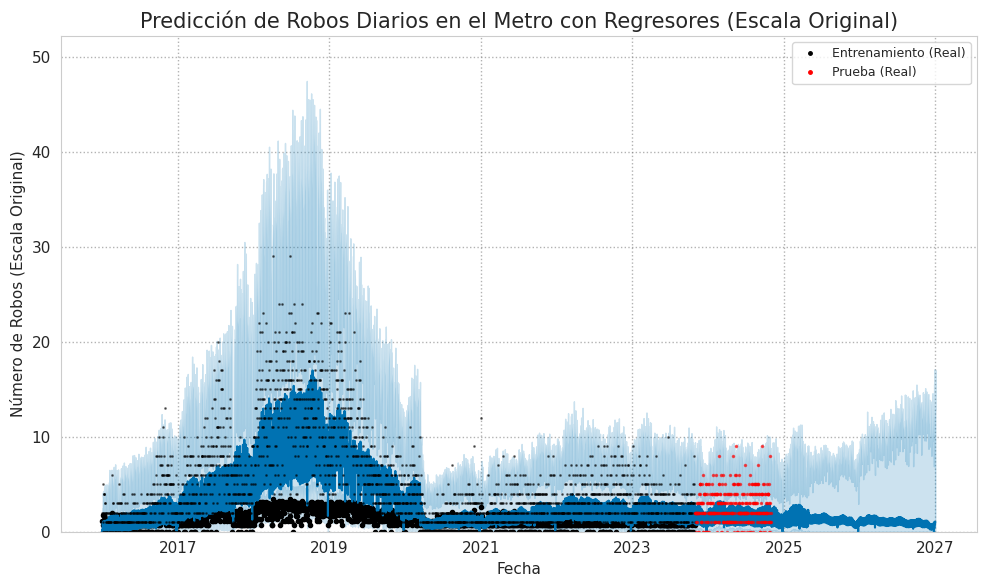


--- 6. Visualizando componentes del modelo (Escala Logarítmica) ---
Gráfica de componentes guardada.


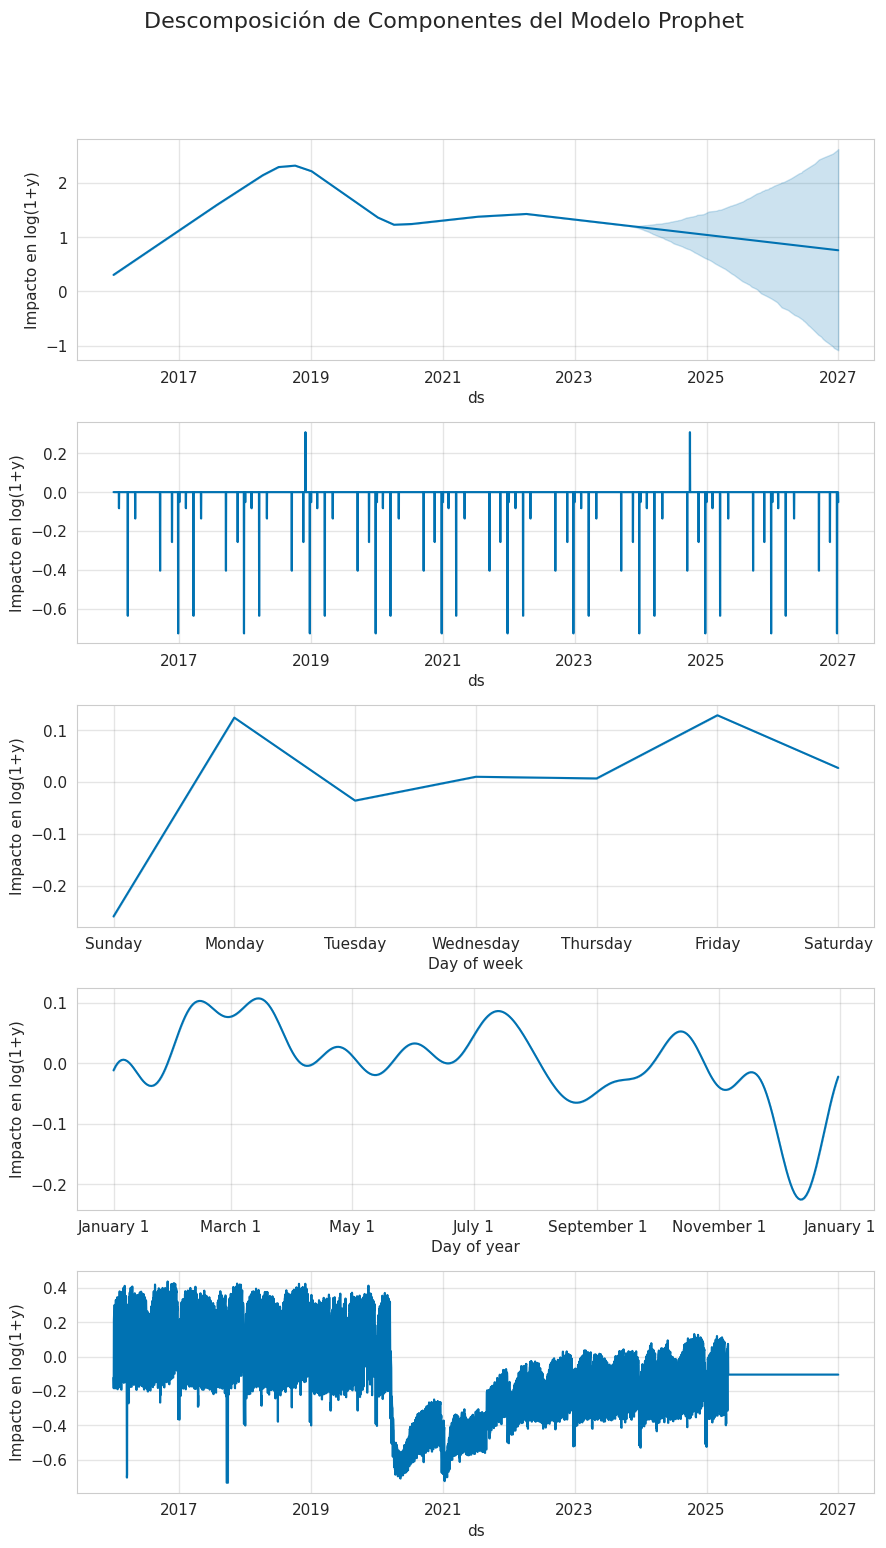


--- 7. Evaluando el modelo (sobre el conjunto de prueba, Escala Original) ---
MAE (Prueba): 1.31
RMSE (Prueba): 1.73
MAPE (Prueba, sobre y_true > 0): 46.84%


In [18]:
# CELDA: Modelo Prophet para df_metro (Transformación Log, Regresores, y plot_components)

import pandas as pd
from prophet import Prophet
from prophet.plot import plot_weekly, plot_yearly, plot_seasonality # Aunque usaremos plot_components
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import datetime
import numpy as np
import os

print("\n--- Iniciando Modelado con Prophet para Robos en Metro (con Regresores y Transformación Log) ---")

# --- DEFINIR RUTA DE GUARDADO PARA VISUALIZACIONES ---
# Asegúrate que esta ruta base ya está definida en una celda anterior
if 'SAVE_PATH_BASE' not in locals():
    SAVE_PATH_BASE = '/content/drive/MyDrive/PP_Robo_Metro_CDMX/visualizaciones/prophet_analysis_log_final/' # Nueva carpeta para esta versión
    os.makedirs(SAVE_PATH_BASE, exist_ok=True)
    print(f"SAVE_PATH_BASE definida como: {SAVE_PATH_BASE}")

model_prophet_metro = None
forecast_prophet = None
df_prophet_input = None
train_data_prophet = None
test_data_prophet = pd.DataFrame()

# Asegurarse de que df_metro existe y df_afluencia_diaria_total también si se usa
if 'df_metro' in locals() and isinstance(df_metro, pd.DataFrame) and \
   not df_metro.empty and 'fecha_hora_hecho' in df_metro.columns:

    # 1. Preparar los datos para Prophet
    print("\n--- 1. Preparando datos para Prophet ---")
    df_prophet_input = df_metro.set_index('fecha_hora_hecho').resample('D').size().reset_index()
    df_prophet_input = df_prophet_input.rename(columns={'fecha_hora_hecho': 'ds', 0: 'y'})
    df_prophet_input.dropna(subset=['ds', 'y'], inplace=True)
    df_prophet_input['ds'] = pd.to_datetime(df_prophet_input['ds'])

    # --- APLICAR TRANSFORMACIÓN LOGARÍTMICA ---
    df_prophet_input['y_orig'] = df_prophet_input['y'].copy()
    df_prophet_input['y'] = np.log1p(df_prophet_input['y'])
    print("Transformación log(1+y) aplicada a la variable objetivo 'y'.")
    df_prophet_input.dropna(subset=['y'], inplace=True)

    if df_prophet_input.empty or len(df_prophet_input) < 60:
        print("Error: No hay suficientes datos en df_prophet_input para Prophet.")
        model_prophet_metro = None
    else:
        print(f"Datos para Prophet preparados: {df_prophet_input.shape}")
        print("\n--- Estadísticas Descriptivas de Robos Diarios (columna 'y' ORIGINAL) ---")
        print(df_prophet_input['y_orig'].describe())

        fig_dist, (ax_hist, ax_box) = plt.subplots(1, 2, figsize=(14, 6))
        sns.histplot(df_prophet_input['y_orig'], kde=True, bins=max(1, int(df_prophet_input['y_orig'].max())+1 if pd.notna(df_prophet_input['y_orig'].max()) else 10), ax=ax_hist)
        ax_hist.set_title('Distribución de Robos Diarios Originales (Histograma)'); ax_hist.set_xlabel('Robos/Día'); ax_hist.set_ylabel('Frecuencia');
        sns.boxplot(y=df_prophet_input['y_orig'], ax=ax_box); ax_box.set_title('Distribución (Boxplot)'); ax_box.set_ylabel('Robos/Día');
        plt.tight_layout();
        try: fig_dist.savefig(os.path.join(SAVE_PATH_BASE, 'distribucion_robos_diarios_orig.png'), transparent=True, dpi=300, bbox_inches='tight'); print(f"Gráfica de distribución guardada.")
        except Exception as e_save_dist: print(f"Error guardando gráfica de distribución: {e_save_dist}")
        plt.show()

        # --- Unir con Afluencia (si está disponible) ---
        if 'df_afluencia_diaria_total' in locals() and isinstance(df_afluencia_diaria_total, pd.DataFrame) and not df_afluencia_diaria_total.empty:
            print("\n--- Uniendo datos de robo con afluencia ---")
            df_prophet_input = pd.merge(df_prophet_input, df_afluencia_diaria_total[['ds', 'afluencia']], on='ds', how='left')
            df_prophet_input['afluencia'] = df_prophet_input['afluencia'].ffill().bfill()
            if df_prophet_input['afluencia'].isnull().any():
                mean_val = df_prophet_input['afluencia'].mean(); df_prophet_input['afluencia'] = df_prophet_input['afluencia'].fillna(mean_val if pd.notna(mean_val) else 0)
            print("Datos de robo y afluencia unidos.")
        else: print("Datos de afluencia no disponibles. Continuando sin regresor de afluencia.")

        # --- Añadir Regresor de Pandemia ---
        print("\n--- Añadiendo regresor de pandemia ---")
        PANDEMIA_START_DATE = pd.to_datetime('2020-03-15'); PANDEMIA_END_DATE = pd.to_datetime('2021-08-31')
        df_prophet_input['pandemia_lockdown'] = 0
        df_prophet_input.loc[(df_prophet_input['ds'] >= PANDEMIA_START_DATE) & (df_prophet_input['ds'] <= PANDEMIA_END_DATE),'pandemia_lockdown'] = 1
        print(f"Regresor 'pandemia_lockdown' creado con {df_prophet_input['pandemia_lockdown'].sum()} días marcados.")

        # --- División Train/Test ---
        cutoff_date_prophet = df_prophet_input['ds'].max() - pd.DateOffset(months=12)
        train_data_prophet = df_prophet_input[df_prophet_input['ds'] <= cutoff_date_prophet].copy()
        test_data_prophet = df_prophet_input[df_prophet_input['ds'] > cutoff_date_prophet].copy()
        if len(train_data_prophet) < 30: train_data_prophet = df_prophet_input.copy(); test_data_prophet = pd.DataFrame()
        print(f"Train data: {train_data_prophet.shape}, Test data: {test_data_prophet.shape}")

        # 2. Entrenar el modelo Prophet
        print("\n--- 2. Entrenando modelo Prophet ---")
        model_prophet_metro = Prophet(
            interval_width=0.95, seasonality_mode='additive', # Mantenemos aditivo en la escala log
            changepoint_prior_scale=0.1, seasonality_prior_scale=20.0,
            yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False
        )
        model_prophet_metro.add_country_holidays(country_name='MX')

        if 'afluencia' in train_data_prophet.columns and not train_data_prophet['afluencia'].isnull().all():
           model_prophet_metro.add_regressor('afluencia', prior_scale=10.0, standardize=True, mode='additive')
           print("Regresor 'afluencia' añadido al modelo.")
        if 'pandemia_lockdown' in train_data_prophet.columns: # El regresor de pandemia es aditivo en la escala log
            model_prophet_metro.add_regressor('pandemia_lockdown', prior_scale=15.0, mode='additive')
            print("Regresor 'pandemia_lockdown' añadido al modelo.")

        if not train_data_prophet.empty:
            try: model_prophet_metro.fit(train_data_prophet); print("Modelo Prophet entrenado.")
            except Exception as e_fit: print(f"Error entrenamiento: {e_fit}"); model_prophet_metro = None
        else: print("Error: train_data_prophet vacío."); model_prophet_metro = None

if 'model_prophet_metro' in locals() and model_prophet_metro and hasattr(model_prophet_metro, 'history') and \
   'df_prophet_input' in locals() and isinstance(df_prophet_input, pd.DataFrame) and not df_prophet_input.empty:

    # 3. Crear DataFrame futuro
    print("\n--- 3. Creando DataFrame futuro ---")
    end_forecast_date_prophet = datetime.datetime(2026, 12, 31)
    future_df_prophet = model_prophet_metro.make_future_dataframe(periods=(end_forecast_date_prophet - train_data_prophet['ds'].max()).days + 1, freq='D')

    # Añadir regresores futuros
    if 'afluencia' in model_prophet_metro.extra_regressors:
        if 'df_afluencia_diaria_total' in locals() and isinstance(df_afluencia_diaria_total, pd.DataFrame):
            future_df_prophet = pd.merge(future_df_prophet, df_afluencia_diaria_total[['ds', 'afluencia']], on='ds', how='left')
            afluencia_fill_value = 0
            if 'afluencia' in train_data_prophet.columns:
                 last_year_afluencia_mean_train = train_data_prophet[train_data_prophet['ds'] > train_data_prophet['ds'].max() - pd.DateOffset(years=1)]['afluencia'].mean()
                 if pd.notna(last_year_afluencia_mean_train): afluencia_fill_value = last_year_afluencia_mean_train
                 elif 'afluencia' in df_prophet_input.columns:
                      mean_afluencia_hist = df_prophet_input['afluencia'].mean()
                      if pd.notna(mean_afluencia_hist): afluencia_fill_value = mean_afluencia_hist
            future_df_prophet['afluencia'] = future_df_prophet['afluencia'].fillna(afluencia_fill_value)
            print(f"Valores futuros para 'afluencia' imputados con: {afluencia_fill_value:.2f}")
        else: future_df_prophet = None; print("Error: Faltan datos de afluencia para el futuro.")

    if future_df_prophet is not None and 'pandemia_lockdown' in model_prophet_metro.extra_regressors:
        future_df_prophet['pandemia_lockdown'] = 0
        # Para el periodo histórico en future_df_prophet, Prophet usará los valores de la historia si los regresores están ahí.
        # Si quieres ser explícito para el periodo histórico DENTRO de future_df_prophet:
        future_df_prophet.loc[(future_df_prophet['ds'] >= PANDEMIA_START_DATE) & (future_df_prophet['ds'] <= PANDEMIA_END_DATE), 'pandemia_lockdown'] = 1
        print("Valores futuros para 'pandemia_lockdown' establecidos (0 para futuro, 1 para periodo histórico relevante).")

    if 'future_df_prophet' in locals() and isinstance(future_df_prophet, pd.DataFrame) and not future_df_prophet.empty:
        # 4. Hacer las predicciones
        print("\n--- 4. Realizando predicciones ---")
        forecast_prophet = model_prophet_metro.predict(future_df_prophet)

        # --- REVERSIÓN DE TRANSFORMACIÓN LOGARÍTMICA ---
        if 'y_orig' in df_prophet_input.columns: # Verifica si la transformación se aplicó
            print("Revirtiendo transformación logarítmica para plots y métricas...")
            forecast_prophet['yhat'] = np.expm1(forecast_prophet['yhat'])
            forecast_prophet['yhat_lower'] = np.expm1(forecast_prophet['yhat_lower'])
            forecast_prophet['yhat_upper'] = np.expm1(forecast_prophet['yhat_upper'])
            forecast_prophet[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_prophet[['yhat', 'yhat_lower', 'yhat_upper']].clip(lower=0)

            train_data_prophet['y_plot'] = np.expm1(train_data_prophet['y'])
            if not test_data_prophet.empty: test_data_prophet['y_plot'] = np.expm1(test_data_prophet['y'])
        else: # Si no hubo transformación, y_plot es simplemente y
            train_data_prophet['y_plot'] = train_data_prophet['y']
            if not test_data_prophet.empty: test_data_prophet['y_plot'] = test_data_prophet['y']

        # 5. Visualizar las predicciones (en escala original)
        print("\n--- 5. Visualizando predicciones (Escala Original) ---")
        fig_pred = model_prophet_metro.plot(forecast_prophet, uncertainty=True, xlabel='Fecha', ylabel='Número de Robos (Escala Original)')
        ax_pred = fig_pred.gca()
        ax_pred.plot(train_data_prophet['ds'], train_data_prophet['y_plot'], 'k.', label='Entrenamiento (Real)', alpha=0.5, markersize=2)
        if not test_data_prophet.empty:
            ax_pred.plot(test_data_prophet['ds'], test_data_prophet['y_plot'], 'r.', label='Prueba (Real)', alpha=0.6, markersize=3)

        # Mejorar leyenda
        handles_pred, labels_pred = ax_pred.get_legend_handles_labels(); new_handles, new_labels = [], []; unique_labels_pred = {}
        custom_legend_order = ['Entrenamiento (Real)', 'Prueba (Real)', 'Predicción Prophet', 'Intervalo de Confianza (95%)']
        # Crear patches para yhat, yhat_lower/upper si no están en handles
        yhat_line = [l for l in ax_pred.get_lines() if l.get_label() == 'yhat']
        yhat_fill = [p for p in ax_pred.patches if isinstance(p, plt.Polygon)]

        legend_elements = []
        if not train_data_prophet.empty: legend_elements.append(plt.Line2D([0], [0], marker='.', color='k', linestyle='None', markersize=5, label='Entrenamiento (Real)'))
        if not test_data_prophet.empty: legend_elements.append(plt.Line2D([0], [0], marker='.', color='r', linestyle='None', markersize=5, label='Prueba (Real)'))
        if yhat_line: legend_elements.append(plt.Line2D([0], [0], color=yhat_line[0].get_color(), linewidth=1.5, label='Predicción Prophet'))
        if yhat_fill: legend_elements.append(mpatches.Patch(color=yhat_fill[0].get_facecolor(), alpha=yhat_fill[0].get_alpha(), label='Intervalo de Confianza (95%)'))

        ax_pred.legend(handles=legend_elements, fontsize=9, loc='upper right')
        ax_pred.set_title('Predicción de Robos Diarios en el Metro con Regresores (Escala Original)', fontsize=15)
        y_data_max_plot = df_prophet_input['y_orig'].max() if 'y_orig' in df_prophet_input.columns else df_prophet_input['y'].max()
        y_forecast_max_plot = max(forecast_prophet['yhat'].max(), forecast_prophet['yhat_upper'].max())
        y_max_plot_final = max(y_data_max_plot * 1.2, y_forecast_max_plot * 1.1, 10) # Factor de 1.2 para y_data_max_plot
        ax_pred.set_ylim([0, y_max_plot_final]); ax_pred.grid(True, linestyle=':', alpha=0.6)
        plt.tight_layout()
        try: fig_pred.savefig(os.path.join(SAVE_PATH_BASE, 'prediccion_prophet_final_log_revertida.png'), transparent=True, dpi=300, bbox_inches='tight'); print(f"Gráfica de predicción final guardada.")
        except Exception as e_save_pred: print(f"Error guardando gráfica predicción: {e_save_pred}")
        plt.show()

        # 6. Visualizar los componentes (en escala logarítmica)
        print("\n--- 6. Visualizando componentes del modelo (Escala Logarítmica) ---")
        try:
            fig_components = model_prophet_metro.plot_components(forecast_prophet, uncertainty=True)
            # Personalizar los títulos y ejes de los componentes de fig_components
            axes_comp = fig_components.get_axes()
            comp_titles_map = {
                'trend': 'Tendencia (Escala Log)',
                'holidays': 'Festivos (Escala Log)',
                'weekly': 'Estacionalidad Semanal (Escala Log)',
                'yearly': 'Estacionalidad Anual (Escala Log)',
                'afluencia': 'Efecto Afluencia (Escala Log)',
                'pandemia_lockdown': 'Efecto Pandemia (Escala Log)'
            }
            plot_min_ds_comp = forecast_prophet['ds'].min(); plot_max_ds_comp = forecast_prophet['ds'].max()

            for ax_c in axes_comp:
                current_title_raw = ax_c.get_title(loc='left').lower() # Prophet pone títulos a la izq.
                new_title = current_title_raw # Default
                for key_map, val_map in comp_titles_map.items():
                    if key_map in current_title_raw:
                        new_title = val_map
                        break
                ax_c.set_title(new_title, fontsize=13)
                ax_c.set_ylabel('Impacto en log(1+y)', fontsize=11) # Indicar escala log
                if 'trend' in new_title.lower() or 'festivos' in new_title.lower() or 'afluencia' in new_title.lower() or 'pandemia' in new_title.lower():
                    ax_c.set_xlim([plot_min_ds_comp, plot_max_ds_comp])
                    ax_c.set_xlabel('Fecha', fontsize=11)
                elif 'semanal' in new_title.lower():
                    days_of_week_labels = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
                    ax_c.set_xticks(range(7)); ax_c.set_xticklabels(days_of_week_labels); ax_c.set_xlabel('Día de la Semana', fontsize=11)
                elif 'anual' in new_title.lower():
                    ax_c.set_xlabel('Día del Año', fontsize=11)

            fig_components.suptitle('Descomposición de Componentes del Modelo Prophet', fontsize=16, y=1.03)
            plt.tight_layout(rect=[0, 0, 1, 0.98])

            try: fig_components.savefig(os.path.join(SAVE_PATH_BASE, 'componentes_prophet_log.png'), transparent=True, dpi=300, bbox_inches='tight'); print(f"Gráfica de componentes guardada.")
            except Exception as e_save_comp: print(f"Error guardando gráfica de componentes: {e_save_comp}")
            plt.show()
        except Exception as e_plot_comp_final:
            print(f"Error al usar model.plot_components: {e_plot_comp_final}. Considerar plots individuales.")

        # 7. Evaluación del Modelo (en escala original)
        if not test_data_prophet.empty and 'y_plot' in test_data_prophet.columns:
            print("\n--- 7. Evaluando el modelo (sobre el conjunto de prueba, Escala Original) ---")
            forecast_on_test = forecast_prophet[forecast_prophet['ds'].isin(test_data_prophet['ds'])]
            eval_df = pd.merge(test_data_prophet[['ds', 'y_plot']], forecast_on_test[['ds', 'yhat']], on='ds', how='inner')
            if not eval_df.empty:
                y_true_eval = eval_df['y_plot']; y_pred_eval = eval_df['yhat']
                mae = abs(y_true_eval - y_pred_eval).mean(); rmse = ((y_true_eval - y_pred_eval)**2).mean()**0.5
                condition_positive_true = (y_true_eval > 0)
                actual_positive_eval = y_true_eval[condition_positive_true]; pred_for_positive_eval = y_pred_eval[condition_positive_true]
                if not actual_positive_eval.empty and len(actual_positive_eval) == len(pred_for_positive_eval):
                    mape = (abs(actual_positive_eval - pred_for_positive_eval) / actual_positive_eval).mean() * 100
                    print(f"MAE (Prueba): {mae:.2f}"); print(f"RMSE (Prueba): {rmse:.2f}"); print(f"MAPE (Prueba, sobre y_true > 0): {mape:.2f}%")
                else: print("Cálculo de MAPE no posible."); print(f"MAE (Prueba): {mae:.2f}"); print(f"RMSE (Prueba): {rmse:.2f}")
            else: print("eval_df vacío.")
        else: print("test_data_prophet vacío o sin 'y_plot'.")
    else:
        print("DataFrame 'future_df_prophet' no se pudo crear o está vacío. No se pueden realizar predicciones.")
else:
    print("Modelo Prophet no fue entrenado, no existe, o df_metro/df_prophet_input está vacío/inválido.")

---
## 5. Diagnóstico del Modelo Predictivo: Análisis de Residuos de Prophet

Hemos entrenado y evaluado nuestro modelo Prophet, obteniendo métricas de rendimiento y visualizando sus componentes. Sin embargo, un buen análisis no termina con la predicción; es crucial entender **dónde se equivoca el modelo** y si hay **patrones en sus errores**. Esto se logra mediante el análisis de los **residuos**.

Los residuos son la diferencia entre lo que el modelo predijo (\(\hat{y}(t)\)) y el valor real observado (\(y(t)\)) en el conjunto de prueba:

$$ \text{Residuo}(t) = e(t) = y(t) - \hat{y}(t) $$

Donde \( y(t) \) es el valor real observado, y \( \hat{y}(t) \) es la predicción del modelo.

Si un modelo es "perfecto" (o al menos muy bueno), sus residuos deberían ser:
*   **Aleatorios e impredecibles:** Sin patrones visibles en el tiempo.
*   **Centrados en cero:** La media de los errores debe ser cero, sin sesgo.
*   **Normalmente distribuidos:** Su histograma debe parecer una campana de Gauss.
*   **Sin autocorrelación:** El error de hoy no debe estar correlacionado con el error de días anteriores.

Si encontramos patrones en los residuos, esto sugiere que al modelo le falta capturar alguna información o patrón subyacente en los datos, y tenemos una oportunidad de mejora.


--- Iniciando Análisis de Residuos de Prophet ---

1. Creando DataFrame de residuos...
  DataFrame de residuos creado. Dimensiones: (366, 4)


ds  y_plot      yhat   residuo
0 2023-10-31     2.0  2.163558 -0.163558
1 2023-11-01     2.0  2.037698 -0.037698
2 2023-11-02     0.0  1.513240 -1.513240
3 2023-11-03     1.0  2.309743 -1.309743
4 2023-11-04     2.0  1.897316  0.102684


2. Graficando residuos vs. tiempo...
  Gráfica de residuos vs tiempo guardada.


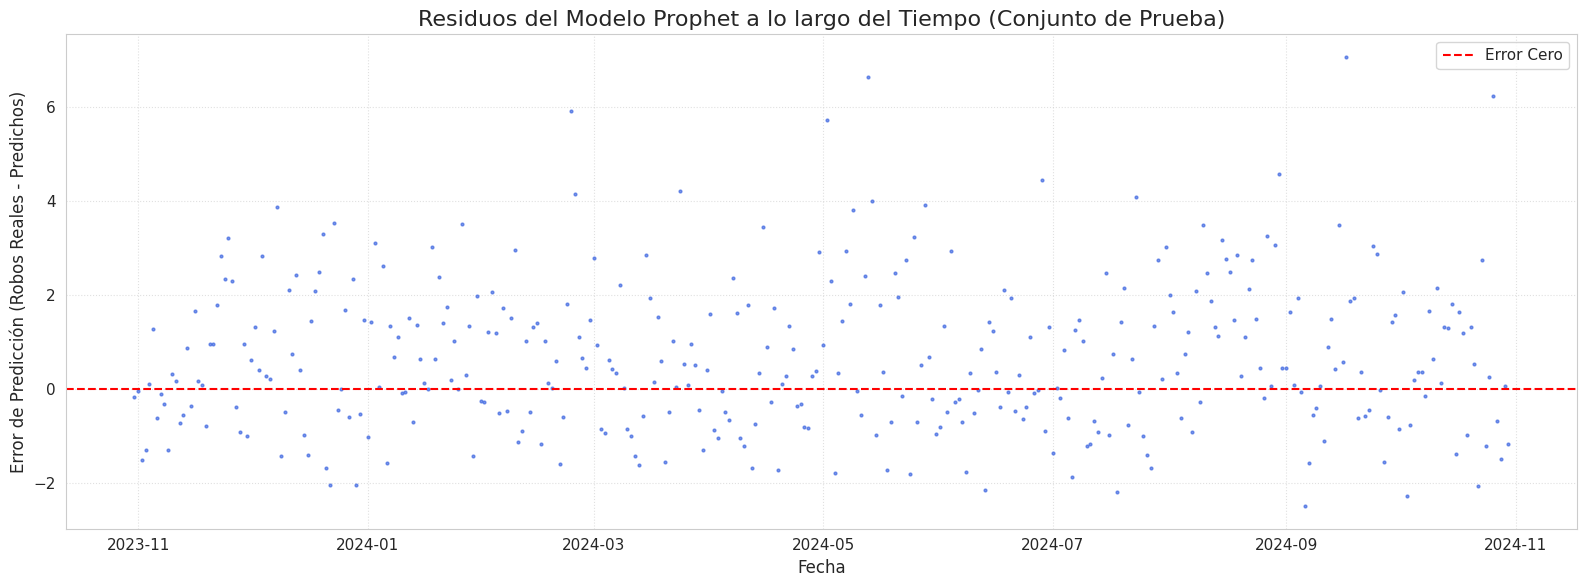


3. Graficando distribución de residuos (Histograma)...
  Histograma de residuos guardado.


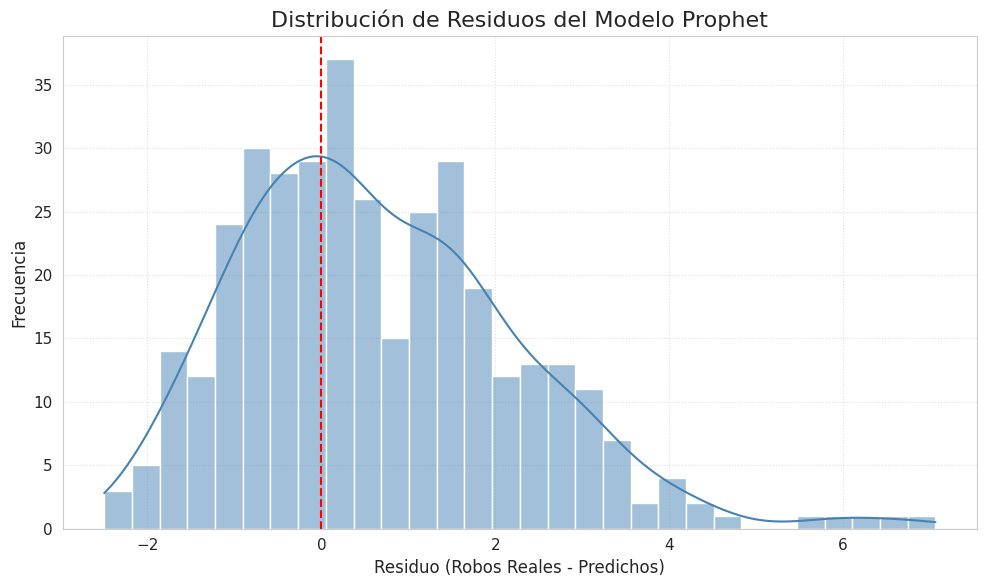

  Estadísticas de residuos: Media=0.66, Std=1.60

4. Graficando Autocorrelación de Residuos (ACF)...
  Gráfica de ACF de residuos guardada.


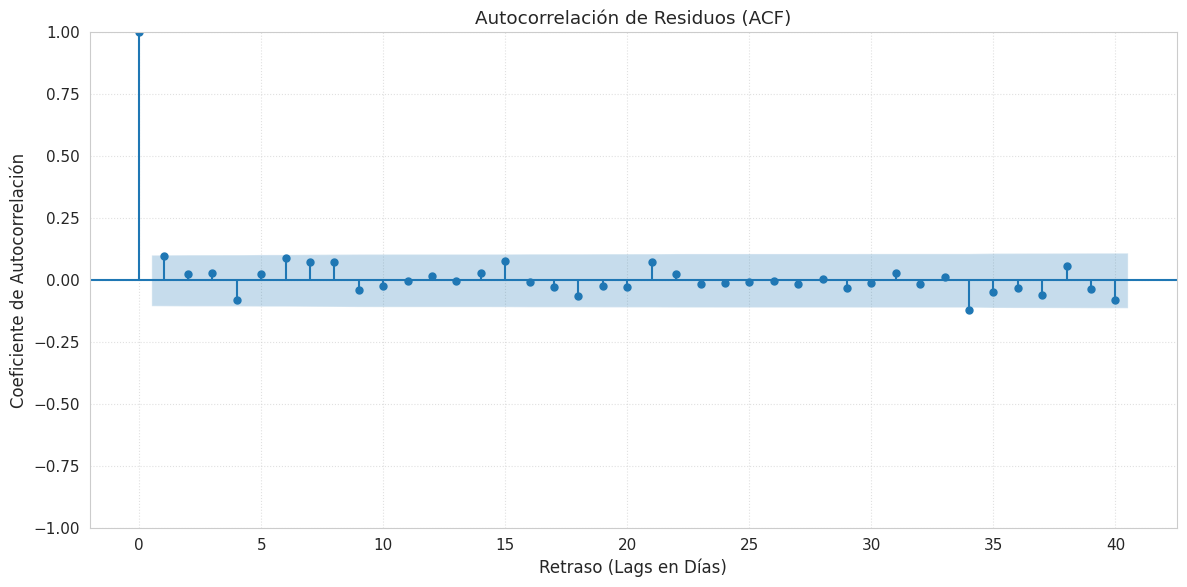


--- Análisis de Residuos Completado ---


In [19]:
# CELDA: Análisis de Residuos del Modelo Prophet
# Asume que 'model_prophet_metro', 'forecast_prophet', 'test_data_prophet',
# y 'train_data_prophet' (con la columna 'y_plot') existen y están poblados
# desde la celda anterior (Celda de Prophet).
# También asume que SAVE_PATH_BASE está definido.

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
import os # Asegurarse que os está importado

print("\n--- Iniciando Análisis de Residuos de Prophet ---")

# Asegurarse de que las variables necesarias existen y no están vacías
if 'test_data_prophet' in locals() and isinstance(test_data_prophet, pd.DataFrame) and not test_data_prophet.empty and \
   'forecast_prophet' in locals() and isinstance(forecast_prophet, pd.DataFrame) and not forecast_prophet.empty and \
   'y_plot' in test_data_prophet.columns: # y_plot es y en escala original

    # 1. Crear DataFrame de Residuos (sobre el conjunto de prueba)
    print("\n1. Creando DataFrame de residuos...")
    try:
        # Unir los valores reales (y_plot) del test set con las predicciones (yhat ya revertido)
        forecast_on_test_res = forecast_prophet[forecast_prophet['ds'].isin(test_data_prophet['ds'])]

        eval_df_residuos = pd.merge(test_data_prophet[['ds', 'y_plot']],
                                   forecast_on_test_res[['ds', 'yhat']],
                                   on='ds', how='inner') # Usar inner para asegurar fechas comunes

        if eval_df_residuos.empty:
            print("  Error: eval_df_residuos está vacío después del merge. No se pueden calcular residuos.")
            eval_df_residuos = None # Marcar para no continuar
        else:
            eval_df_residuos['residuo'] = eval_df_residuos['y_plot'] - eval_df_residuos['yhat']
            print(f"  DataFrame de residuos creado. Dimensiones: {eval_df_residuos.shape}")
            display(eval_df_residuos.head())

    except Exception as e_res_df:
        print(f"  Error al crear DataFrame de residuos: {e_res_df}")
        eval_df_residuos = None

    if eval_df_residuos is not None and not eval_df_residuos.empty:
        # 2. Gráfico de Series de Tiempo de los Residuos
        print("\n2. Graficando residuos vs. tiempo...")
        fig_res_time, ax_res_time = plt.subplots(figsize=(16, 6))
        ax_res_time.plot(eval_df_residuos['ds'], eval_df_residuos['residuo'], color='royalblue',
                         alpha=0.7, marker='.', linestyle='None', markersize=4)
        ax_res_time.axhline(0, color='red', linestyle='--', linewidth=1.5, label='Error Cero')
        ax_res_time.set_title('Residuos del Modelo Prophet a lo largo del Tiempo (Conjunto de Prueba)', fontsize=16)
        ax_res_time.set_xlabel('Fecha', fontsize=12)
        ax_res_time.set_ylabel('Error de Predicción (Robos Reales - Predichos)', fontsize=12)
        ax_res_time.grid(True, linestyle=':', alpha=0.6)
        ax_res_time.legend()
        plt.tight_layout()
        try:
            fig_res_time.savefig(os.path.join(SAVE_PATH_BASE, 'residuos_prophet_vs_tiempo.png'), transparent=True, dpi=300, bbox_inches='tight')
            print(f"  Gráfica de residuos vs tiempo guardada.")
        except Exception as e_save: print(f"  Error al guardar residuos vs tiempo: {e_save}")
        plt.show()

        # 3. Histograma de los Residuos
        print("\n3. Graficando distribución de residuos (Histograma)...")
        fig_hist_res, ax_hist_res = plt.subplots(figsize=(10, 6))
        sns.histplot(eval_df_residuos['residuo'], kde=True, bins=30, ax=ax_hist_res, color='steelblue') # Ajustar bins
        ax_hist_res.set_title('Distribución de Residuos del Modelo Prophet', fontsize=16)
        ax_hist_res.set_xlabel('Residuo (Robos Reales - Predichos)', fontsize=12)
        ax_hist_res.set_ylabel('Frecuencia', fontsize=12)
        ax_hist_res.axvline(0, color='red', linestyle='--', linewidth=1.5)
        ax_hist_res.grid(True, linestyle=':', alpha=0.6)
        plt.tight_layout()
        try:
            fig_hist_res.savefig(os.path.join(SAVE_PATH_BASE, 'hist_residuos_prophet.png'), transparent=True, dpi=300, bbox_inches='tight')
            print(f"  Histograma de residuos guardado.")
        except Exception as e_save: print(f"  Error al guardar histograma de residuos: {e_save}")
        plt.show()
        print(f"  Estadísticas de residuos: Media={eval_df_residuos['residuo'].mean():.2f}, Std={eval_df_residuos['residuo'].std():.2f}")


        # 4. Gráfico de Autocorrelación (ACF) de los Residuos
        print("\n4. Graficando Autocorrelación de Residuos (ACF)...")
        # Asegurarse de que los residuos estén ordenados por tiempo y no tengan NaNs para ACF
        residuos_para_acf = eval_df_residuos.dropna(subset=['residuo']).sort_values('ds')['residuo']
        if not residuos_para_acf.empty:
            fig_acf, ax_acf = plt.subplots(figsize=(12, 6))
            plot_acf(residuos_para_acf, lags=40, ax=ax_acf, title='Autocorrelación de Residuos (ACF)', alpha=0.05) # Lags hasta 40 días
            ax_acf.set_xlabel('Retraso (Lags en Días)', fontsize=12)
            ax_acf.set_ylabel('Coeficiente de Autocorrelación', fontsize=12)
            ax_acf.grid(True, linestyle=':', alpha=0.6)
            plt.tight_layout()
            try:
                fig_acf.savefig(os.path.join(SAVE_PATH_BASE, 'acf_residuos_prophet.png'), transparent=True, dpi=300, bbox_inches='tight')
                print(f"  Gráfica de ACF de residuos guardada.")
            except Exception as e_save_acf: print(f"  Error al guardar ACF de residuos: {e_save_acf}")
            plt.show()
        else:
            print("  No hay residuos válidos para generar el gráfico ACF.")

        print("\n--- Análisis de Residuos Completado ---")
    else:
        print("  DataFrame de residuos no se pudo crear o está vacío. No se pueden generar gráficas de residuos.")
else:
    print("Variables necesarias ('test_data_prophet', 'forecast_prophet', o 'y_plot') no disponibles o vacías. No se puede realizar análisis de residuos.")

---
### 5.1. Interpretación del Análisis de Residuos

Las gráficas de residuos son el "diagnóstico post-mortem" de nuestro modelo. Nos revelan dónde se equivoca y qué patrones, si los hay, no ha logrado capturar.

#### 5.1.1. Residuos vs. Tiempo: ¿Patrones Ocultos o Aleatoriedad?


*   **Observación Clave:** Los puntos de los residuos se dispersan de manera visible y aparentemente **aleatoria alrededor de la línea de cero**. No hay una tendencia clara ni patrones estacionales obvios que el modelo haya pasado por alto a simple vista. Los errores son esporádicos, no sistemáticos.
*   **Implicación:** Esto es una excelente señal. Confirma que nuestro modelo ha logrado capturar la mayoría de los patrones principales de la serie temporal (tendencia, estacionalidades, efectos de regresores). No hay un sesgo claro a sobrestimar o subestimar consistentemente los robos en el tiempo.

#### 5.1.2. Distribución de Residuos: ¿Nuestros Errores Siguen un Patrón Esperado?


*   **Observación Clave:** El histograma de los residuos está **centrado en cero**, lo que es ideal y reconfirma la ausencia de sesgo en el modelo. Esto significa que Prophet no tiende a equivocarse más por exceso que por defecto, y viceversa.
*   **Forma:** Sin embargo, la distribución no es una campana de Gauss perfecta (distribución normal). Observamos una ligera **asimetría positiva, con una "cola" más pronunciada hacia los errores positivos** (el modelo a veces subestima más los picos reales).
*   **Implicación:** Aunque la media del error es cero, la distribución no es perfectamente simétrica. Esto es común en modelos de conteo (donde los valores \(y\) son bajos y no pueden ser negativos) y nos recuerda que las asunciones de normalidad de los errores podrían no cumplirse totalmente.

#### 5.1.3. Autocorrelación de Residuos (ACF): ¿El Error de Hoy delata el de Mañana?

*   **Qué Mide:** Este gráfico nos dice si existe una **dependencia lineal** entre el error de predicción en un día y el error de días anteriores. Si una barra sale de la banda sombreada azul (el intervalo de confianza), significa que esa correlación no es aleatoria.
*   **Observación Clave:**
    *   La mayoría de las barras caen **dentro de la banda sombreada**, lo cual es bueno.
    *   No obstante, observamos barras que **sobresalen significativamente** en ciertos *lags* (retrasos):
        *   **Lag 1:** El error de hoy está correlacionado con el error de ayer. Esto sugiere que el modelo no ha capturado completamente alguna dependencia de corto plazo.
        *   **Lag 34:** La correlación en estes *lag* es fuerte, lo que indica que **persiste una autocorrelación** El modelo está dejando "señal" en el error en este ciclo.
*   **Implicación:** Este residuo **NO es completamente "ruido blanco"**. A pesar de que Prophet modela bien las estacionalidades, aún hay información sobre la dependencia temporal que el modelo no ha capturado. Esto nos da una dirección clara para refinar el modelo si buscamos una precisión aún mayor.

---

### Conclusiones Finales del Diagnóstico del Modelo Prophet

Nuestro análisis de residuos demuestra que el modelo Prophet es **robusto y captura la mayor parte de la señal** en nuestros datos de robos. Las tendencias y estacionalidades generales están bien modeladas, y no hay sesgos sistemáticos en las predicciones.

Sin embargo, la presencia de **autocorrelación residual** en el Lag 1 y en 34,nos señala un área de oportunidad importante. Si bien el modelo es excelente para una predicción general y la interpretabilidad de sus componentes, podría beneficiarse de un ajuste más fino en la captura de las dependencias de mediano plazo. Esto podría lograrse experimentando con un mayor número de componentes de Fourier para la estacionalidad semanal o con la inclusión de regresores adicionales que capturen estas dependencias finas.

Este diagnóstico es invaluable: nos confirma que nuestro modelo es una herramienta poderosa y, al mismo tiempo, nos guía hacia el camino de la mejora continua."

---
## Sección X: Carga de Datos Geográficos de Estaciones del Metro

Para realizar análisis espaciales detallados, como la asignación de robos a estaciones específicas o el análisis de buffers de proximidad, necesitamos la ubicación geográfica precisa de cada estación del Metro. Estos datos suelen venir en formato Shapefile (SHP).

Cargaremos los datos de las estaciones, los inspeccionaremos y los prepararemos para su uso posterior.

In [20]:
# CELDA: Carga de Datos Geográficos de Estaciones del Metro (Versión Corregida y Completa)

import pandas as pd
import geopandas as gpd
import zipfile
import os
from IPython.display import display # Para mejor visualización de DataFrames

# --- 0. Definiciones de Rutas y Nombres ---
# Ruta al archivo ZIP en tu Google Drive (AJUSTA SI ES DIFERENTE)
ZIP_FILE_PATH_METRO_SHP = '/content/drive/MyDrive/PP_Robo_Metro_CDMX/Nootebooks/datos_brutos/stcmetro_shp.zip'
# Directorio temporal en Colab para extraer los archivos
EXTRACT_TO_METRO_SHP = '/content/temp_metro_shapefiles/'
# Nombre de la subcarpeta que se crea DENTRO de EXTRACT_TO_METRO_SHP al descomprimir (según tu salida de os.walk)
SUBFOLDER_IN_ZIP = 'stcmetro_shp'
# Nombre de la CAPA de ESTACIONES (sin la extensión .shp)
LAYER_NAME_ESTACIONES = 'STC_Metro_estaciones_utm14n'
# CRS Proyectado que usaremos (UTM Zona 14N para CDMX)
CRS_PROYECTADO_METRO = 'EPSG:32614'


# Inicializar el GeoDataFrame
gdf_estaciones_metro = None

# --- 1. Descomprimir el archivo SHP (si está en un ZIP) ---
print("\n--- 1. Descomprimiendo Shapefiles del Metro ---")
# Crear el directorio de extracción si no existe
os.makedirs(EXTRACT_TO_METRO_SHP, exist_ok=True)

try:
    with zipfile.ZipFile(ZIP_FILE_PATH_METRO_SHP, 'r') as zip_ref:
        zip_ref.extractall(EXTRACT_TO_METRO_SHP)
    print(f"Archivos SHP extraídos en: {EXTRACT_TO_METRO_SHP}")

    # --- Diagnóstico del Contenido del Directorio de Extracción ---
    print("\nContenido del directorio de extracción principal:")
    for item in os.listdir(EXTRACT_TO_METRO_SHP):
        print(f"  - {item}")

    path_to_shp_subfolder = os.path.join(EXTRACT_TO_METRO_SHP, SUBFOLDER_IN_ZIP)
    if os.path.exists(path_to_shp_subfolder):
        print(f"\nContenido de la subcarpeta '{SUBFOLDER_IN_ZIP}':")
        for item in os.listdir(path_to_shp_subfolder):
            print(f"  - {item}")
    else:
        print(f"Advertencia: La subcarpeta '{SUBFOLDER_IN_ZIP}' no se encontró en '{EXTRACT_TO_METRO_SHP}'.")
    print("------------------------------------")

    # --- 2. Cargar la CAPA de ESTACIONES del Metro ---
    # La ruta para gpd.read_file es el directorio que contiene el .shp y sus archivos asociados
    # y luego especificamos la capa.
    shp_directory_for_layer = os.path.join(EXTRACT_TO_METRO_SHP, SUBFOLDER_IN_ZIP)

    print(f"\nIntentando cargar la capa de ESTACIONES '{LAYER_NAME_ESTACIONES}' desde el directorio: {shp_directory_for_layer}")

    if os.path.exists(shp_directory_for_layer):
        try:
            gdf_estaciones_metro = gpd.read_file(shp_directory_for_layer, layer=LAYER_NAME_ESTACIONES)
            print("\nCapa de ESTACIONES del Metro cargada exitosamente.")
            print(f"Dimensiones del GeoDataFrame de estaciones: {gdf_estaciones_metro.shape}")
            print("\nPrimeras 5 filas del GeoDataFrame de estaciones:")
            display(gdf_estaciones_metro.head())
            print("\nColumnas del GeoDataFrame de estaciones:")
            print(gdf_estaciones_metro.columns.tolist())
            print(f"Tipo de geometría: {gdf_estaciones_metro.geom_type.unique()}") # Debería ser 'Point'
            print(f"Sistema de Coordenadas de Referencia (CRS) original: {gdf_estaciones_metro.crs}")

            # --- 3. Preprocesamiento Básico del GeoDataFrame de Estaciones ---
            print("\n--- 3. Preprocesando GeoDataFrame de Estaciones ---")

            # 3.1. Renombrar columnas para claridad y consistencia
            # ¡¡¡CRUCIAL: AJUSTA ESTOS NOMBRES ORIGINALES BASADO EN LA SALIDA DE gdf_estaciones_metro.columns.tolist() !!!
            column_mapping_estaciones = {
                'NOMBRE': 'nombre_estacion',     # Nombre probable
                'LINEA': 'linea_metro',          # Nombre probable
                'ALCALDIAS': 'alcaldia_estacion'  # Nombre probable, podría ser 'Alcaldia' o 'MUNICIPIO'
                # Revisa si hay otras columnas útiles como 'ID_ESTACION', etc.
            }
            cols_to_rename_estaciones = {k: v for k, v in column_mapping_estaciones.items() if k in gdf_estaciones_metro.columns}
            if cols_to_rename_estaciones:
                gdf_estaciones_metro.rename(columns=cols_to_rename_estaciones, inplace=True)
                print("\nColumnas renombradas. Nuevas columnas:")
                print(gdf_estaciones_metro.columns.tolist())
            else:
                print("\nNo se renombraron columnas (quizás los nombres ya eran los deseados o el mapeo es incorrecto).")

            # Asegurarse de que la columna 'nombre_estacion' exista después del renombrado
            if 'nombre_estacion' not in gdf_estaciones_metro.columns:
                raise ValueError("¡ERROR CRÍTICO! La columna 'nombre_estacion' no se encontró después del intento de renombrar. Verifica 'column_mapping_estaciones'.")

            # 3.2. Convertir a un CRS proyectado
            if gdf_estaciones_metro.crs is None or str(gdf_estaciones_metro.crs).upper() != CRS_PROYECTADO_METRO:
                print(f"\nTransformando CRS de estaciones de '{gdf_estaciones_metro.crs}' a '{CRS_PROYECTADO_METRO}'...")
                gdf_estaciones_metro = gdf_estaciones_metro.to_crs(CRS_PROYECTADO_METRO)
                print(f"Nuevo CRS de estaciones: {gdf_estaciones_metro.crs}")
            else:
                print(f"\nCRS de estaciones ya está en {gdf_estaciones_metro.crs} (proyectado).")

            # 3.3. Limpiar nombres de estaciones y líneas
            gdf_estaciones_metro['nombre_estacion_clean'] = gdf_estaciones_metro['nombre_estacion'].astype(str).str.upper().str.strip().str.replace(' ', '_')
            if 'linea_metro' in gdf_estaciones_metro.columns:
                gdf_estaciones_metro['linea_metro_clean'] = gdf_estaciones_metro['linea_metro'].astype(str).str.upper().str.strip()

            # 3.4 Seleccionar y reordenar columnas finales (opcional)
            cols_finales_estaciones = ['nombre_estacion', 'nombre_estacion_clean', 'linea_metro', 'linea_metro_clean', 'geometry']
            if 'alcaldia_estacion' in gdf_estaciones_metro.columns: # Si existe la columna de alcaldía
                cols_finales_estaciones.insert(2, 'alcaldia_estacion')

            # Filtrar para mantener solo las columnas finales que existen
            cols_finales_existentes = [col for col in cols_finales_estaciones if col in gdf_estaciones_metro.columns]
            gdf_estaciones_metro_procesado = gdf_estaciones_metro[cols_finales_existentes].copy()


            print("\nGeoDataFrame de estaciones FINAL procesado (primeras filas):")
            display(gdf_estaciones_metro_procesado.head())
            print(f"Dimensiones finales: {gdf_estaciones_metro_procesado.shape}")

        except Exception as e_read_layer:
            print(f"Error al leer la capa '{LAYER_NAME_ESTACIONES}': {e_read_layer}")
            print("Posibles causas: El nombre de la capa es incorrecto, los archivos SHP están corruptos o faltan componentes (.shx, .dbf).")
            print(f"Verifica que los archivos para la capa '{LAYER_NAME_ESTACIONES}' existen en '{shp_directory_for_layer}'.")
    else:
        print(f"Error: Directorio de Shapefiles '{shp_directory_for_layer}' no encontrado. Verifica la subcarpeta del ZIP ('{SUBFOLDER_IN_ZIP}').")

except FileNotFoundError:
    print(f"Error CRÍTICO: Archivo ZIP de SHP no encontrado en '{ZIP_FILE_PATH_METRO_SHP}'. No se puede continuar.")
except Exception as e:
    print(f"Ocurrió un error inesperado durante la carga o procesamiento de los SHP: {e}")

# Al final de esta celda, deberías tener 'gdf_estaciones_metro_procesado'
# listo para el análisis de buffer, o 'gdf_estaciones_metro' si no hiciste la selección final de columnas.
# Si gdf_estaciones_metro es None o está vacío, hubo un error.


--- 1. Descomprimiendo Shapefiles del Metro ---
Archivos SHP extraídos en: /content/temp_metro_shapefiles/

Contenido del directorio de extracción principal:
  - stcmetro_shp

Contenido de la subcarpeta 'stcmetro_shp':
  - STC_Metro_estaciones_utm14n.shx
  - STC_Metro_estaciones_utm14n.cpg
  - STC_Metro_estaciones_utm14n.prj
  - STC_Metro_lineas_utm14n.cpg
  - STC_Metro_estaciones_utm14n.dbf
  - STC_Metro_estaciones_utm14n.xml
  - STC_Metro_lineas_utm14n.shx
  - STC_Metro_lineas_utm14n.sbx
  - STC_Metro_estaciones_utm14n.shp
  - STC_Metro_lineas_utm14n.prj
  - STC_Metro_lineas_utm14n.shp
  - STC_Metro_lineas_utm14n.dbf
  - STC_Metro_lineas_utm14n.sbn
------------------------------------

Intentando cargar la capa de ESTACIONES 'STC_Metro_estaciones_utm14n' desde el directorio: /content/temp_metro_shapefiles/stcmetro_shp

Capa de ESTACIONES del Metro cargada exitosamente.
Dimensiones del GeoDataFrame de estaciones: (195, 10)

Primeras 5 filas del GeoDataFrame de estaciones:


SISTEMA                  NOMBRE LINEA EST  CVE_EST CVE_EOD17  \
0  STC Metro               Pantitlán    01  01  STC0101     05014   
1  STC Metro                Zaragoza    01  02  STC0102     05020   
2  STC Metro            Gomez Farías    01  03  STC0103     05007   
3  STC Metro  Boulevard Puerto Aéreo    01  04  STC0104     05003   
4  STC Metro                Balbuena    01  05  STC0105     05001   

                    TIPO            ALCALDIAS   AÑO  \
0  Terminal / Transbordo  Venustiano Carranza  1984   
1             Intermedia  Venustiano Carranza  1969   
2             Intermedia  Venustiano Carranza  1969   
3             Intermedia  Venustiano Carranza  1969   
4             Intermedia  Venustiano Carranza  1969   

                         geometry  
0  POINT Z (-99.07474 19.41633 0)  
1  POINT Z (-99.08229 19.41192 0)  
2  POINT Z (-99.09021 19.41648 0)  
3  POINT Z (-99.09626 19.41994 0)  
4  POINT Z (-99.10277 19.42336 0)


Columnas del GeoDataFrame de estaciones:
['SISTEMA', 'NOMBRE', 'LINEA', 'EST', 'CVE_EST', 'CVE_EOD17', 'TIPO', 'ALCALDIAS', 'AÑO', 'geometry']
Tipo de geometría: ['Point']
Sistema de Coordenadas de Referencia (CRS) original: EPSG:4326

--- 3. Preprocesando GeoDataFrame de Estaciones ---

Columnas renombradas. Nuevas columnas:
['SISTEMA', 'nombre_estacion', 'linea_metro', 'EST', 'CVE_EST', 'CVE_EOD17', 'TIPO', 'alcaldia_estacion', 'AÑO', 'geometry']

Transformando CRS de estaciones de 'EPSG:4326' a 'EPSG:32614'...
Nuevo CRS de estaciones: EPSG:32614

GeoDataFrame de estaciones FINAL procesado (primeras filas):


nombre_estacion   nombre_estacion_clean    alcaldia_estacion  \
0               Pantitlán               PANTITLÁN  Venustiano Carranza   
1                Zaragoza                ZARAGOZA  Venustiano Carranza   
2            Gomez Farías            GOMEZ_FARÍAS  Venustiano Carranza   
3  Boulevard Puerto Aéreo  BOULEVARD_PUERTO_AÉREO  Venustiano Carranza   
4                Balbuena                BALBUENA  Venustiano Carranza   

  linea_metro linea_metro_clean                            geometry  
0          01                01  POINT Z (492153.841 2146896.643 0)  
1          01                01  POINT Z (491360.644 2146408.623 0)  
2          01                01  POINT Z (490529.234 2146913.395 0)  
3          01                01  POINT Z (489894.461 2147296.986 0)  
4          01                01  POINT Z (489210.655 2147675.081 0)

Dimensiones finales: (195, 6)


---
## 6. Análisis Espacial: Vinculando Robos con Estaciones del Metro

Hasta ahora, hemos analizado los robos a nivel general y por alcaldía. Sin embargo, para entender el riesgo específico *dentro y alrededor* del sistema Metro, necesitamos una forma de conectar los incidentes delictivos (que tenemos con coordenadas geográficas) a las estaciones de Metro más cercanas.

Dado que nuestros datos de la FGJ no siempre especifican la estación exacta del hecho (y las coordenadas podrían ser del lugar de la denuncia), utilizaremos una técnica geoespacial para esta asignación.

**Estrategia:**

1.  Convertiremos nuestros registros de delitos que tienen coordenadas válidas en un formato geoespacial (`GeoDataFrame`).
2.  Para cada delito, identificaremos la estación de Metro más cercana.
3.  Estableceremos un umbral de distancia máxima (por ejemplo, 2000 metros) para considerar si un delito está "asociado" a una estación. Los delitos que ocurran más lejos no se asignarán a ninguna estación del Metro. Esta distancia es un parámetro importante; una distancia muy pequeña podría omitir robos que ocurren justo al salir de la estación, mientras que una muy grande podría incluir delitos no relacionados.
4.  Esto nos permitirá crear un nuevo conjunto de datos con robos georreferenciados a estaciones específicas, lo que abre la puerta a análisis de "puntos calientes", tasas de robo por estación, y correlaciones con factores socioeconómicos a un nivel más granular.

Utilizaremos la librería `geopandas` para las operaciones espaciales y `scipy.spatial.cKDTree` para una búsqueda eficiente de vecinos cercanos.

In [21]:
# CELDA: Análisis Espacial - Asignación de Robos a Estaciones del Metro (Versión Corregida y Optimizada)

import geopandas as gpd
# from shapely.geometry import Point # Ya no es necesario si usamos points_from_xy
from scipy.spatial import cKDTree
import numpy as np
import pandas as pd
from IPython.display import display
import os
import gc # Para el recolector de basura

# Asumimos que SAVE_PATH_BASE está definido y CRS_PROYECTADO_METRO = 'EPSG:32614'
if 'SAVE_PATH_BASE' not in locals():
    SAVE_PATH_BASE = '/content/drive/MyDrive/PP_Robo_Metro_CDMX/visualizaciones/analisis_espacial/'
    os.makedirs(SAVE_PATH_BASE, exist_ok=True)
if 'CRS_PROYECTADO_METRO' not in locals():
    CRS_PROYECTADO_METRO = 'EPSG:32614' # Definir si no existe de la celda anterior

print("\n--- 6.2. Asignación de Robos a Estaciones del Metro ---")

gdf_robos_todos = None # Inicializar para evitar errores si falla la creación

# Verificar que los DataFrames necesarios existen y no están vacíos
if 'df' not in locals() or df.empty:
    print("Error: DataFrame 'df' (con robos FGJ) no encontrado o vacío.")
elif 'gdf_estaciones_metro_procesado' not in locals() or gdf_estaciones_metro_procesado is None or gdf_estaciones_metro_procesado.empty:
    print("Error: GeoDataFrame 'gdf_estaciones_metro_procesado' no encontrado o vacío.")
elif 'latitud' not in df.columns or 'longitud' not in df.columns:
    print("Error: DataFrame 'df' no contiene columnas 'latitud' o 'longitud'.")
else:
    # 1. Crear un GeoDataFrame de TODOS los robos en 'df' que tienen coordenadas
    print("\n1. Creando GeoDataFrame de todos los robos con coordenadas...")
    # Crear df_con_coords solo con las columnas necesarias para el GeoDataFrame y el merge posterior
    # y los datos de identificación del robo para no perderlos.
    cols_necesarias_de_df = ['latitud', 'longitud', 'delito', 'fecha_hora_hecho', 'transport_mode', 'tipo_violencia', 'alcaldia', 'is_metro_robo'] # Añade otras que quieras mantener
    # Asegurar que solo tomamos columnas que existen en df
    cols_existentes_en_df = [col for col in cols_necesarias_de_df if col in df.columns]

    df_con_coords = df.dropna(subset=['latitud', 'longitud'])[cols_existentes_en_df].copy()

    print(f"  Columnas en df_con_coords (base para gdf_robos_todos): {df_con_coords.columns.tolist()}")
    if 'transport_mode' in df_con_coords.columns:
        print("  'transport_mode' SÍ está en df_con_coords.")
    else:
        print("  ¡ADVERTENCIA! 'transport_mode' NO está en df_con_coords. Revisa la Celda 3.")


    if not df_con_coords.empty:
        try:
            # Usar gpd.points_from_xy() que es optimizado
            gdf_robos_todos = gpd.GeoDataFrame(
                df_con_coords,
                geometry=gpd.points_from_xy(df_con_coords.longitud, df_con_coords.latitud),
                crs="EPSG:4326" # CRS original de lat/lon
            )
            print(f"  GeoDataFrame de todos los robos creado. Dimensiones: {gdf_robos_todos.shape}")

            # Liberar memoria de df_con_coords
            del df_con_coords
            gc.collect()
            print("  df_con_coords eliminada para liberar memoria.")

        except Exception as e_gdf_creation:
            print(f"  Error al crear GeoDataFrame de robos: {e_gdf_creation}")
            gdf_robos_todos = None
    else:
        print("  df_con_coords está vacío después de dropna(latitud, longitud). No se puede crear GeoDataFrame.")
        gdf_robos_todos = None


    if gdf_robos_todos is not None and not gdf_robos_todos.empty:
        # 2. Transformar CRS de los robos al mismo CRS proyectado que las estaciones
        if str(gdf_robos_todos.crs).upper() != CRS_PROYECTADO_METRO:
            print(f"  Transformando CRS de robos a {CRS_PROYECTADO_METRO}...")
            gdf_robos_todos = gdf_robos_todos.to_crs(CRS_PROYECTADO_METRO)
            print(f"  Nuevo CRS de robos: {gdf_robos_todos.crs}")
        else:
            print(f"  CRS de robos ya está en {gdf_robos_todos.crs} (proyectado).")

        # 3. Asignar cada robo a la estación de Metro más cercana usando cKDTree
        print("\n3. Asignando cada robo a la estación de Metro más cercana...")

        if gdf_estaciones_metro_procesado.crs != CRS_PROYECTADO_METRO:
            print(f"  Advertencia/Error: Transformando CRS de estaciones a {CRS_PROYECTADO_METRO}. Esto debería estar hecho en la celda de carga de SHP.")
            gdf_estaciones_metro_procesado = gdf_estaciones_metro_procesado.to_crs(CRS_PROYECTADO_METRO)

        estaciones_coords_np = np.array(list(gdf_estaciones_metro_procesado.geometry.apply(lambda geom: (geom.x, geom.y))))
        robos_coords_np = np.array(list(gdf_robos_todos.geometry.apply(lambda geom: (geom.x, geom.y))))

        btree = cKDTree(estaciones_coords_np)
        distances, indices = btree.query(robos_coords_np, k=1)

        # Usar .iloc en gdf_estaciones_metro_procesado para asegurar que los índices coincidan
        # con los 'indices' devueltos por cKDTree. gdf_estaciones_metro_procesado debe tener un índice simple (0,1,2...)
        # Si no lo tiene (ej. si tenía un índice de un SHP original), resetealo:
        # gdf_estaciones_metro_procesado = gdf_estaciones_metro_procesado.reset_index(drop=True) # Hacer esto ANTES de extraer estaciones_coords_np

        gdf_robos_todos['nearest_metro_station'] = gdf_estaciones_metro_procesado.iloc[indices]['nombre_estacion_clean'].values
        # Asegurarse de que 'linea_metro_clean' existe en gdf_estaciones_metro_procesado
        if 'linea_metro_clean' in gdf_estaciones_metro_procesado.columns:
            gdf_robos_todos['nearest_metro_line'] = gdf_estaciones_metro_procesado.iloc[indices]['linea_metro_clean'].values
        else:
            gdf_robos_todos['nearest_metro_line'] = "LINEA_DESCONOCIDA" # Placeholder
            print("Advertencia: 'linea_metro_clean' no encontrada en gdf_estaciones_metro_procesado.")

        gdf_robos_todos['distance_to_station_m'] = distances

        print("  Asignación de estación más cercana completada.")
        # Seleccionar columnas relevantes para mostrar en el head
        cols_display_temp = ['delito', 'nearest_metro_station', 'nearest_metro_line', 'distance_to_station_m']
        existing_cols_display = [col for col in cols_display_temp if col in gdf_robos_todos.columns]
        if existing_cols_display:
            display(gdf_robos_todos[existing_cols_display].head())

        # 4. Filtrar robos basados en la distancia máxima a una estación
        MAX_ASSIGN_DISTANCE_METERS = 400
        print(f"\n4. Filtrando robos que están a más de {MAX_ASSIGN_DISTANCE_METERS}m de la estación más cercana...")

        gdf_robos_cerca_metro = gdf_robos_todos[gdf_robos_todos['distance_to_station_m'] <= MAX_ASSIGN_DISTANCE_METERS].copy()

        print(f"  Número de robos asignados dentro de {MAX_ASSIGN_DISTANCE_METERS}m: {len(gdf_robos_cerca_metro)}")
        if len(gdf_robos_todos) > 0:
            print(f"  Porcentaje de robos con coordenadas asignados: {len(gdf_robos_cerca_metro) / len(gdf_robos_todos) * 100:.2f}% (del total con coordenadas)")

        # 5. Seleccionar y limpiar el DataFrame final de robos asignados al Metro
        df_robos_asignados_estaciones = gdf_robos_cerca_metro.drop(columns=['geometry'], errors='ignore').copy()

        print("\n--- Robos Asignados a Estaciones del Metro (Dentro del Umbral) ---")
        print(f"Dimensiones finales de df_robos_asignados_estaciones: {df_robos_asignados_estaciones.shape}")

        if not df_robos_asignados_estaciones.empty:
            print("\nPrimeras filas de robos asignados:")
            cols_to_display_final = ['delito', 'transport_mode', 'nearest_metro_station', 'nearest_metro_line', 'distance_to_station_m', 'fecha_hora_hecho']
            existing_cols_display_final = [col for col in cols_to_display_final if col in df_robos_asignados_estaciones.columns]
            if existing_cols_display_final:
                display(df_robos_asignados_estaciones[existing_cols_display_final].head())
            else:
                display(df_robos_asignados_estaciones.head()) # Mostrar todas si la selección falla

            try:
                path_guardado_asignados = os.path.join(SAVE_PATH_BASE, 'robos_asignados_a_estaciones_metro.csv')
                df_robos_asignados_estaciones.to_csv(path_guardado_asignados, index=False)
                print(f"DataFrame de robos asignados guardado en: {path_guardado_asignados}")
            except Exception as e_save_asig: print(f"Error al guardar df_robos_asignados_estaciones: {e_save_asig}")

            if 'is_metro_robo' in df_robos_asignados_estaciones.columns:
                print(f"\nDe los robos asignados, {df_robos_asignados_estaciones['is_metro_robo'].sum()} fueron clasificados originalmente como 'is_metro_robo'.")
            if 'transport_mode' in df_robos_asignados_estaciones.columns:
                print("\nDistribución de 'transport_mode' para los robos asignados a estaciones:")
                print(df_robos_asignados_estaciones['transport_mode'].value_counts())
        else:
            print("No se asignaron robos a estaciones dentro del umbral de distancia especificado.")
    else:
        print("GeoDataFrame de robos (gdf_robos_todos) no pudo ser creado o está vacío. No se puede continuar.")


--- 6.2. Asignación de Robos a Estaciones del Metro ---

1. Creando GeoDataFrame de todos los robos con coordenadas...
  Columnas en df_con_coords (base para gdf_robos_todos): ['latitud', 'longitud', 'delito', 'fecha_hora_hecho', 'transport_mode', 'tipo_violencia', 'alcaldia', 'is_metro_robo']
  'transport_mode' SÍ está en df_con_coords.
  GeoDataFrame de todos los robos creado. Dimensiones: (1917344, 9)
  df_con_coords eliminada para liberar memoria.
  Transformando CRS de robos a EPSG:32614...
  Nuevo CRS de robos: EPSG:32614

3. Asignando cada robo a la estación de Metro más cercana...
  Asignación de estación más cercana completada.


delito nearest_metro_station  \
2      ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA             CULHUACÁN   
10  LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...    PERIFERICO_ORIENTE   
12    DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL               POPOTLA   
15               ROBO A CASA HABITACION SIN VIOLENCIA   SAN_ANDRES_TOMATLÁN   
16      DAÑO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO             CAMARONES   

   nearest_metro_line  distance_to_station_m  
2                  12             712.308056  
10                 12             168.747355  
12                 02             563.929674  
15                 12            1876.002102  
16                 07            1060.050344


4. Filtrando robos que están a más de 400m de la estación más cercana...
  Número de robos asignados dentro de 400m: 439175
  Porcentaje de robos con coordenadas asignados: 22.91% (del total con coordenadas)

--- Robos Asignados a Estaciones del Metro (Dentro del Umbral) ---
Dimensiones finales de df_robos_asignados_estaciones: (439175, 11)

Primeras filas de robos asignados:


delito transport_mode  \
10  LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...    Otro Delito   
35                                    ROBO DE OBJETOS    Otro Delito   
37                DAÑO EN PROPIEDAD AJENA INTENCIONAL    Otro Delito   
42                  LESIONES INTENCIONALES POR GOLPES    Otro Delito   
48                                    ROBO DE OBJETOS    Otro Delito   

   nearest_metro_station nearest_metro_line  distance_to_station_m  \
10    PERIFERICO_ORIENTE                 12             168.747355   
35               LA_RAZA                 03             249.759929   
37            CANDELARIA                 01             275.995752   
42             CONSULADO                 04             159.537715   
48           INSURGENTES                 01             328.142721   

      fecha_hora_hecho  
10 2016-01-01 01:45:00  
35 2016-01-01 07:00:00  
37 2016-01-01 00:15:00  
42 2016-01-01 09:30:00  
48 2016-01-01 02:30:00

DataFrame de robos asignados guardado en: /content/drive/MyDrive/PP_Robo_Metro_CDMX/Visualizaciones/robos_asignados_a_estaciones_metro.csv

De los robos asignados, 14001 fueron clasificados originalmente como 'is_metro_robo'.

Distribución de 'transport_mode' para los robos asignados a estaciones:
transport_mode
Otro Delito                 388144
Transeunte                   30174
Metro                        14001
Otro Vehiculo Transporte      5020
Metrobus                      1616
Taxi                           216
Cablebus                         4
Name: count, dtype: int64


---
## 6.3. Visualización Espacial de Robos por Estación del Metro

Ahora que hemos logrado asignar los delitos reportados a la estación de Metro más cercana (dentro de un umbral de 400 metros), podemos comenzar a visualizar la distribución espacial de estos incidentes. Esta etapa es crucial para identificar patrones geográficos y posibles "puntos calientes".

**Objetivos de esta Sección:**

1.  **Visualizar el número total de robos** (aquellos clasificados como `transport_mode == 'Metro'`) asignados a cada estación a lo largo de los años.
2.  Observar si ciertas estaciones o líneas concentran consistentemente un mayor número de incidentes.
3.  Preparar el camino para análisis más profundos, como el cálculo de tasas de robo normalizadas por la afluencia.

**Metodología:**

*   Utilizaremos el DataFrame `df_robos_asignados_estaciones` que contiene los delitos vinculados a una estación.
*   Filtraremos para enfocarnos específicamente en los robos que nuestra lógica anterior clasificó como ocurridos en el **Metro**.
*   Agruparemos estos robos por estación y por año.
*   Crearemos mapas de puntos donde el tamaño y/o color de cada punto (representando una estación) indicará la cantidad de robos.

**Importante:** Recordemos que la asignación se basa en la proximidad a las coordenadas reportadas en las carpetas de investigación. Si estas coordenadas corresponden frecuentemente al lugar de la denuncia (Fiscalías) en lugar del lugar exacto del hecho, los patrones observados reflejarán esta característica de los datos.


--- 6.3.1. Generando Mapas Anuales de Robos en Metro por Estación ---
Shapefile de Alcaldías de CDMX cargado para contexto.
Número de robos clasificados como 'Metro' y asignados a una estación: 14001

Primeras filas de conteos de robos por estación y año:


nearest_metro_station  anio_hecho  numero_robos
0              ACATITLA        2017             3
1              ACATITLA        2018             4
2              ACATITLA        2019             3
3              ACATITLA        2020             3
4              ACATITLA        2021             4


GeoDataFrame listo para plotear (primeras filas):


nombre_estacion_clean  anio_hecho  numero_robos linea_metro_clean
0              ACATITLA        2017           3.0                 A
1              ACATITLA        2018           4.0                 A
2              ACATITLA        2019           3.0                 A
3              ACATITLA        2020           3.0                 A
4              ACATITLA        2021           4.0                 A


Años a graficar: [np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
Máximo global de robos en una estación/año: 376.0
Calculated zoom bounds: X (477346, 504103), Y (2135225, 2159972)
  Mapa de robos absolutos para el año 2016 guardado.


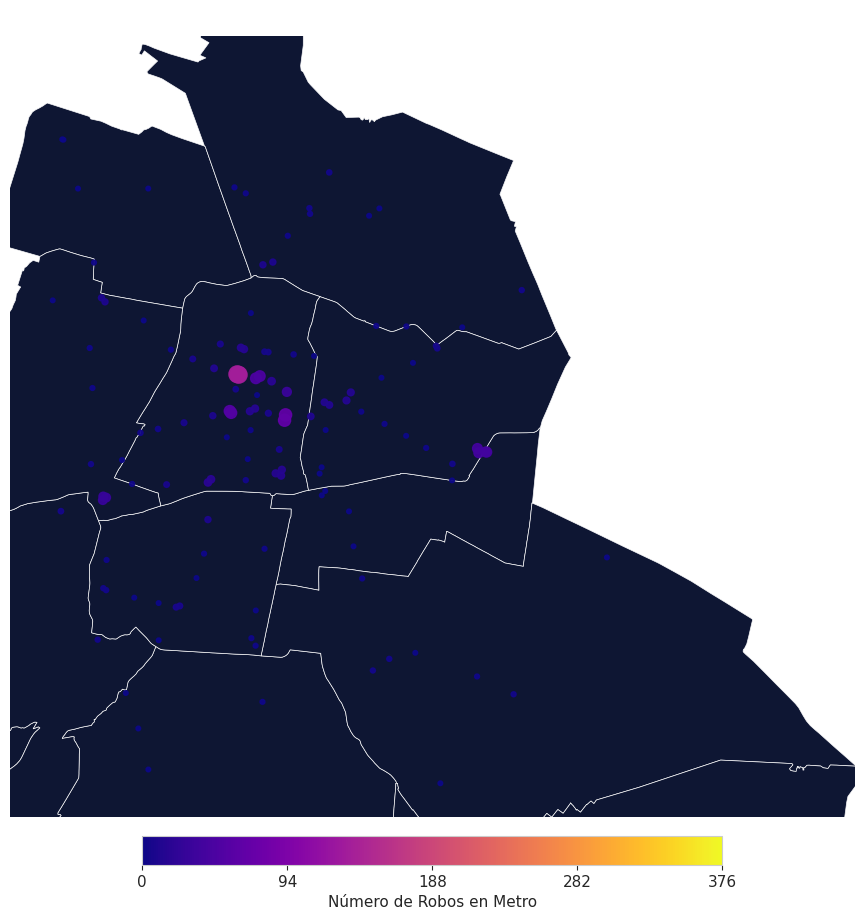

  Mapa de robos absolutos para el año 2017 guardado.


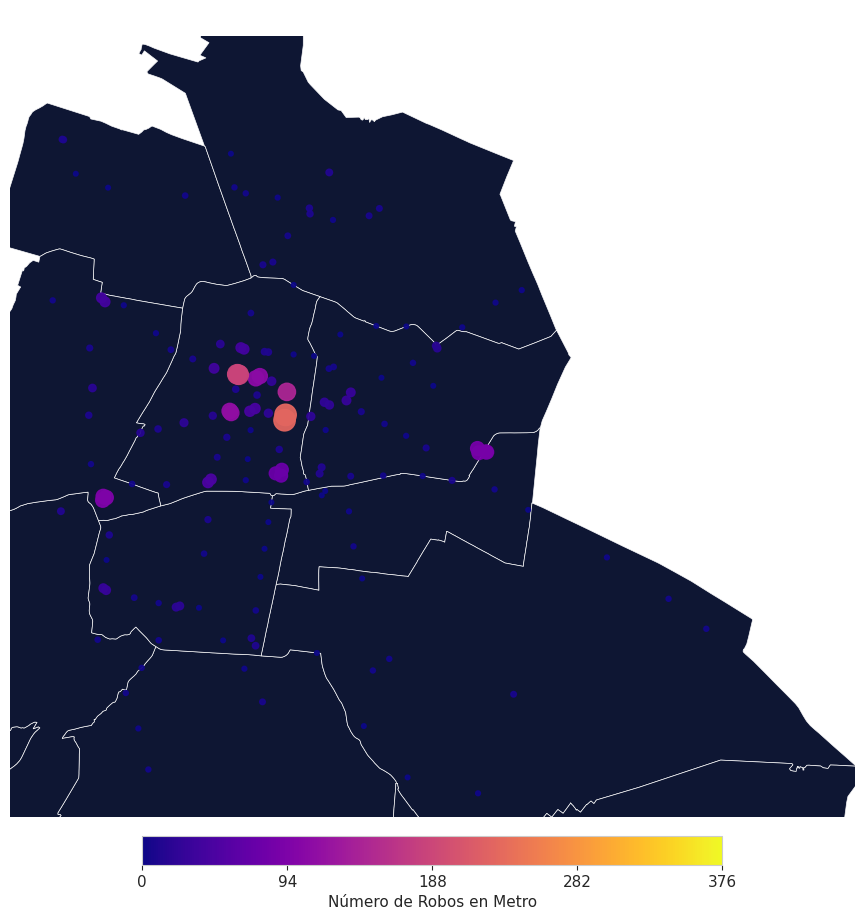

  Mapa de robos absolutos para el año 2018 guardado.


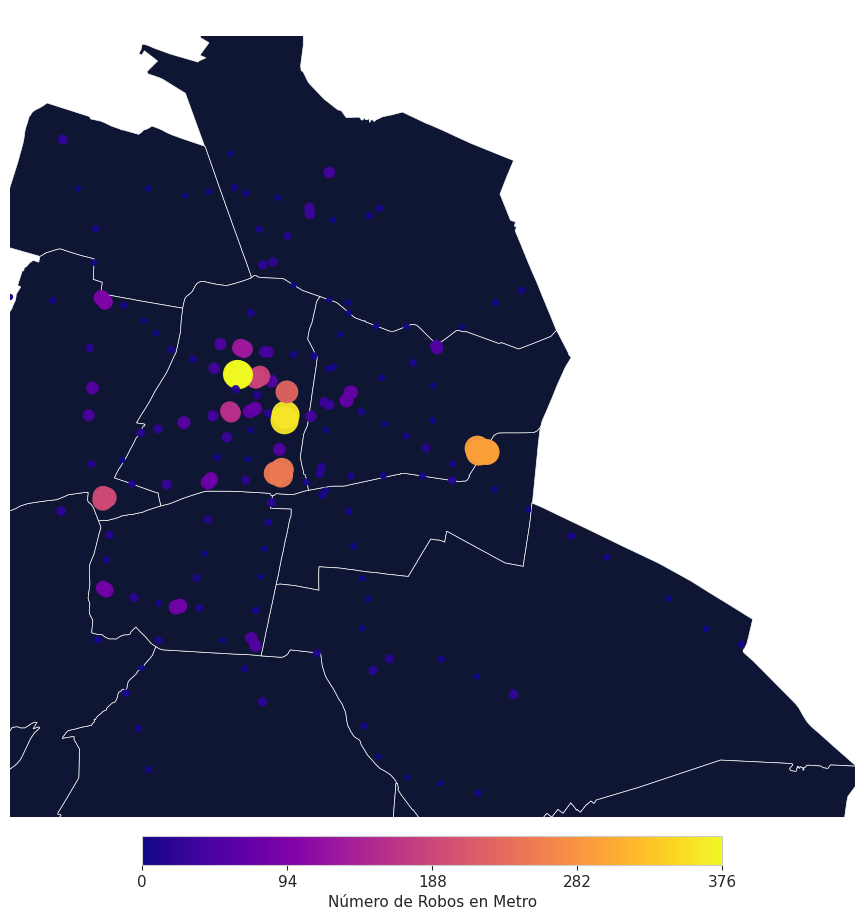

  Mapa de robos absolutos para el año 2019 guardado.


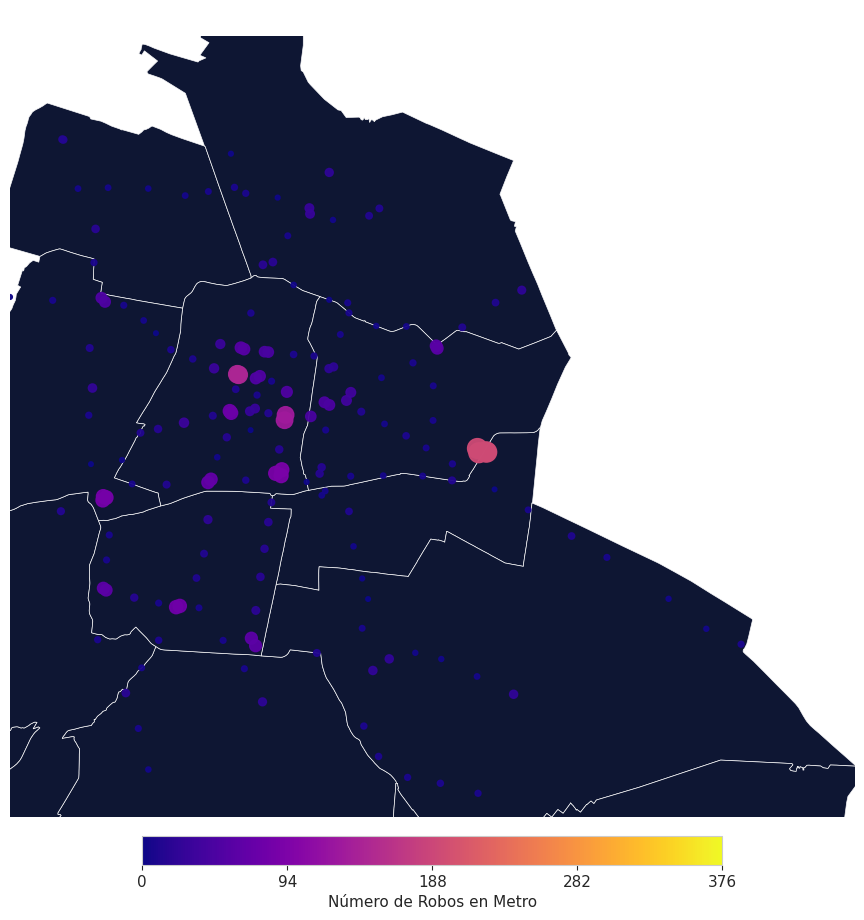

  Mapa de robos absolutos para el año 2020 guardado.


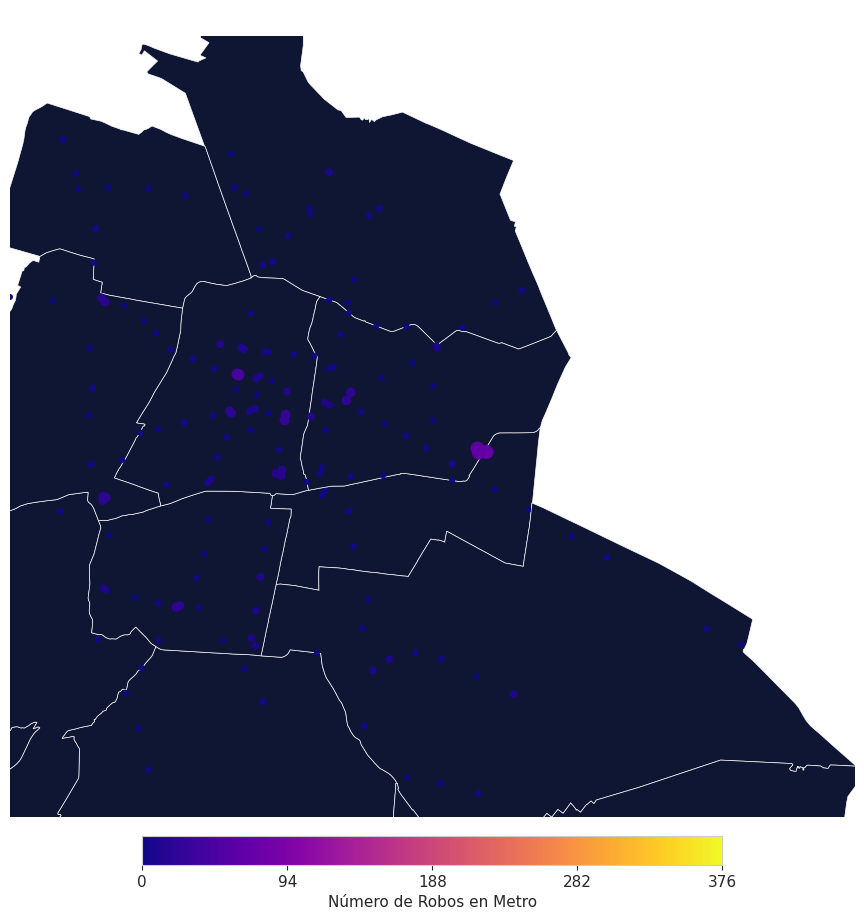

  Mapa de robos absolutos para el año 2021 guardado.


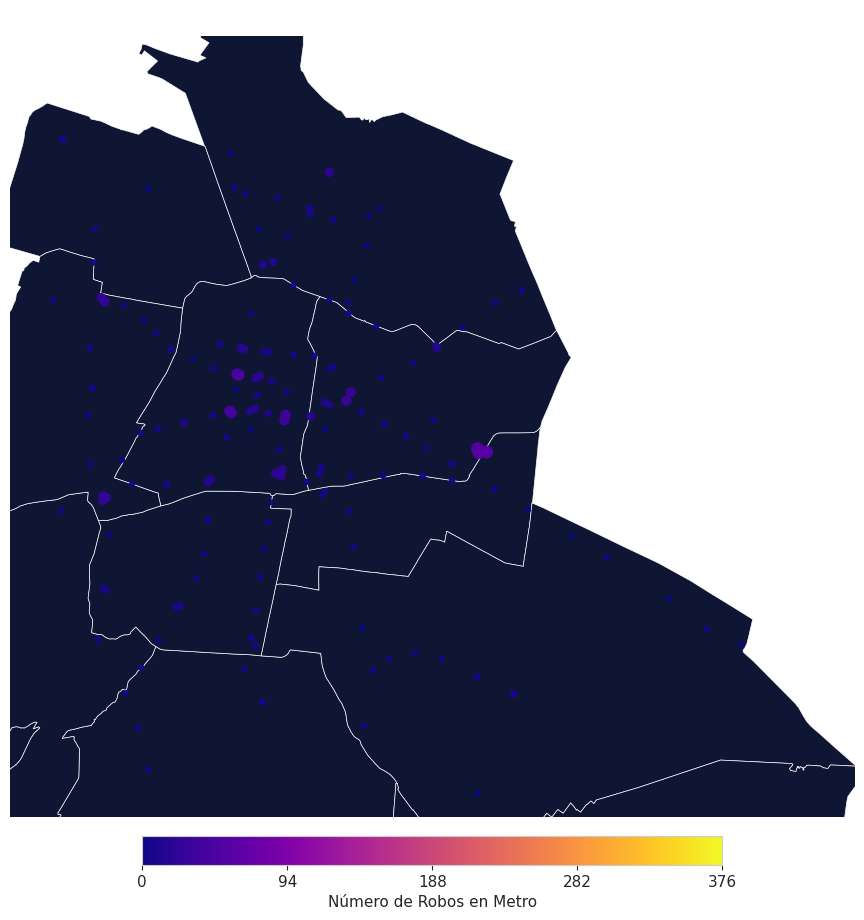

  Mapa de robos absolutos para el año 2022 guardado.


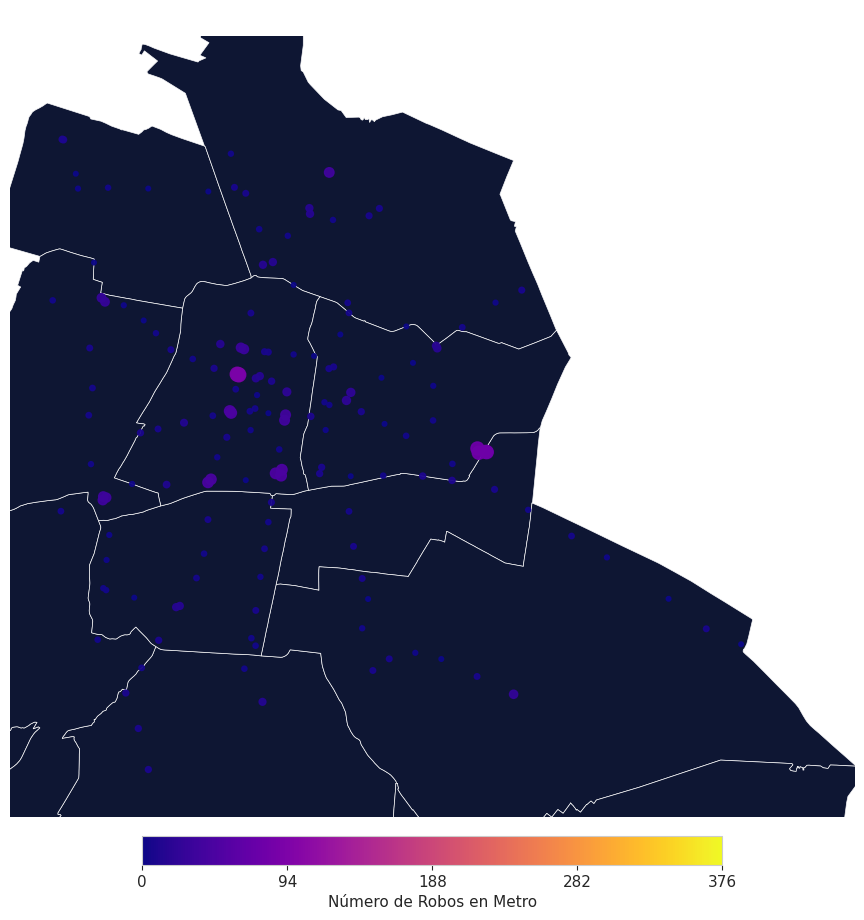

  Mapa de robos absolutos para el año 2023 guardado.


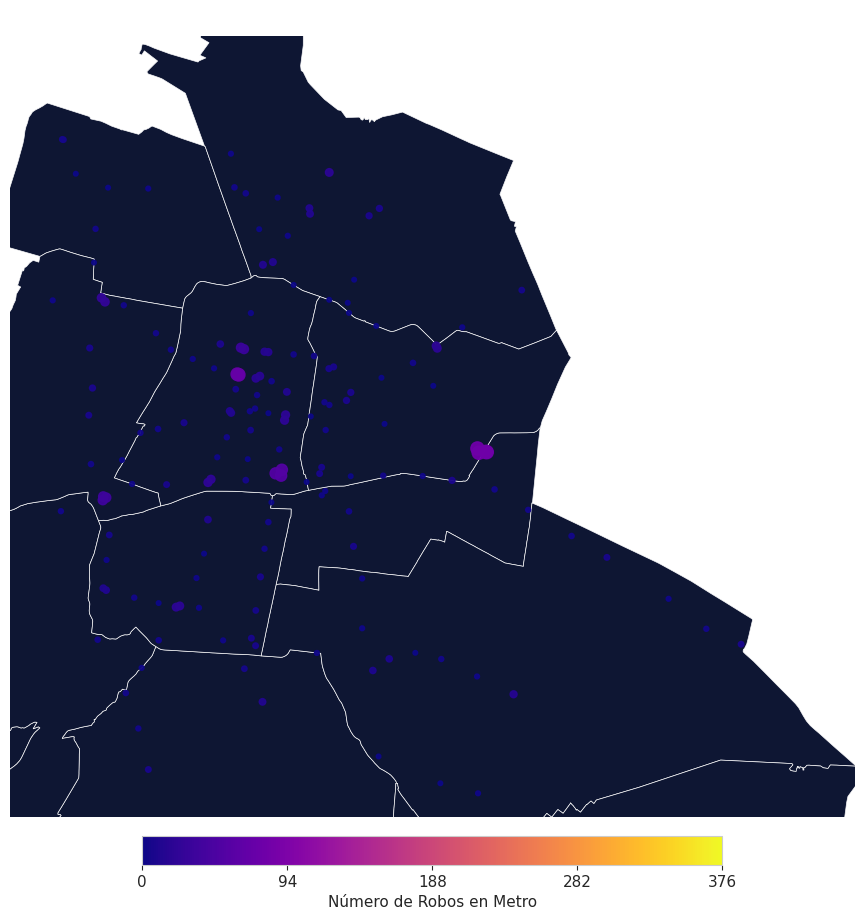

  Mapa de robos absolutos para el año 2024 guardado.


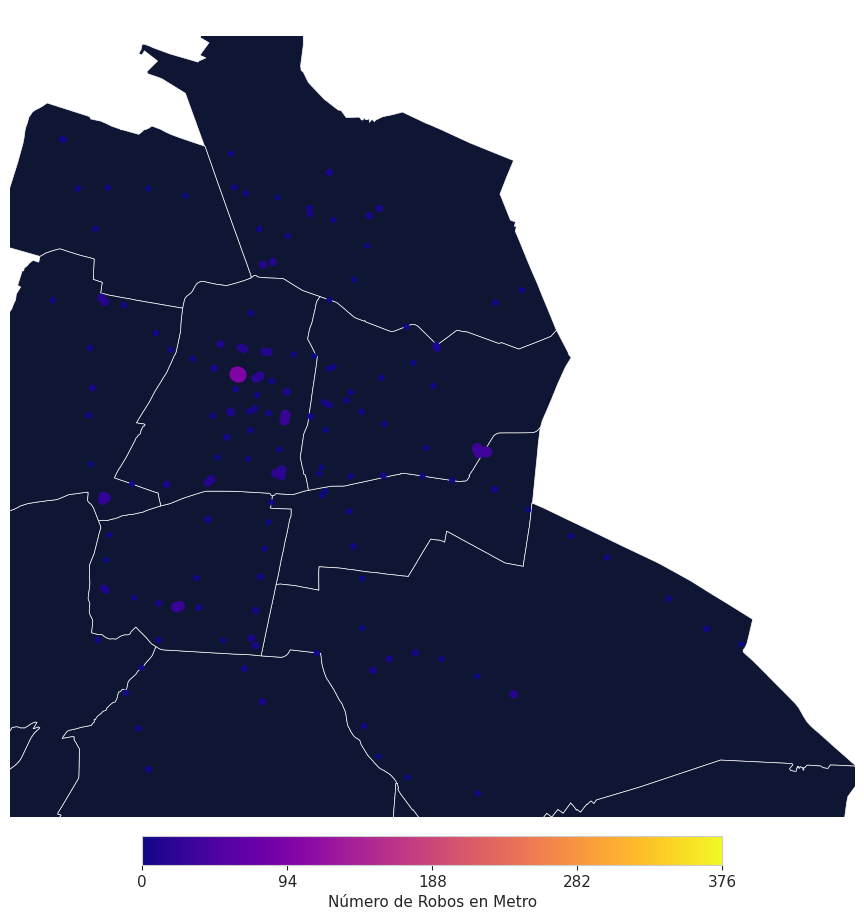

In [22]:
# CELDA: Mapas Anuales de Robos en Metro por Estación (Puntos) - LEYENDA CORREGIDA

import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import os
import gc
import numpy as np
import matplotlib.colors as mcolors # Para el formateador de la leyenda
import matplotlib.ticker as mticker # Para el formateador de la leyenda

print("\n--- 6.3.1. Generando Mapas Anuales de Robos en Metro por Estación ---")

# --- PASO EXTRA: Cargar Shapefile de Alcaldías para Contexto ---
ALCALDIAS_SHP_PATH = '/content/drive/MyDrive/PP_Robo_Metro_CDMX/Nootebooks/datos_brutos/poligonos_alcaldias_cdmx.zip'
gdf_alcaldias_cdmx = None
if 'CRS_PROYECTADO_METRO' not in locals(): CRS_PROYECTADO_METRO = 'EPSG:32614'

try:
    gdf_alcaldias_cdmx = gpd.read_file(ALCALDIAS_SHP_PATH)
    if gdf_alcaldias_cdmx.crs != CRS_PROYECTADO_METRO: gdf_alcaldias_cdmx = gdf_alcaldias_cdmx.to_crs(CRS_PROYECTADO_METRO)
    print("Shapefile de Alcaldías de CDMX cargado para contexto.")
except Exception as e: print(f"Error cargando Shapefile de Alcaldías: {e}")

# Asegurarse de que SAVE_PATH_BASE está definido
if 'SAVE_PATH_BASE' not in locals():
    SAVE_PATH_BASE = '/content/drive/MyDrive/PP_Robo_Metro_CDMX/visualizaciones/analisis_espacial/'
    os.makedirs(SAVE_PATH_BASE, exist_ok=True)
    print(f"SAVE_PATH_BASE definida como: {SAVE_PATH_BASE}")

# Verificar que los DataFrames necesarios existen
if 'df_robos_asignados_estaciones' not in locals() or df_robos_asignados_estaciones.empty:
    print("Error: DataFrame 'df_robos_asignados_estaciones' no encontrado o vacío.")
elif 'gdf_estaciones_metro_procesado' not in locals() or gdf_estaciones_metro_procesado is None or gdf_estaciones_metro_procesado.empty:
    print("Error: GeoDataFrame 'gdf_estaciones_metro_procesado' no encontrado o vacío.")
else:
    # 1. Filtrar solo los robos que ocurrieron EN el Metro
    df_robos_en_metro_estaciones = df_robos_asignados_estaciones[df_robos_asignados_estaciones['transport_mode'] == 'Metro'].copy()
    if df_robos_en_metro_estaciones.empty: print("No se encontraron robos clasificados como 'Metro'.");
    else:
        print(f"Número de robos clasificados como 'Metro' y asignados a una estación: {len(df_robos_en_metro_estaciones)}")
        df_robos_en_metro_estaciones['anio_hecho'] = df_robos_en_metro_estaciones['fecha_hora_hecho'].dt.year
        robos_por_estacion_anio = df_robos_en_metro_estaciones.groupby(['nearest_metro_station', 'anio_hecho']).size().reset_index(name='numero_robos')

        print("\nPrimeras filas de conteos de robos por estación y año:")
        display(robos_por_estacion_anio.head())

        # 4. Unir con las geometrías de las estaciones
        if 'nombre_estacion_clean' not in gdf_estaciones_metro_procesado.columns: print("Error: 'nombre_estacion_clean' no encontrada.");
        else:
            gdf_robos_estacion_anio = pd.merge(robos_por_estacion_anio, gdf_estaciones_metro_procesado[['nombre_estacion_clean', 'geometry', 'linea_metro_clean']],left_on='nearest_metro_station',right_on='nombre_estacion_clean',how='left')
            gdf_robos_estacion_anio = gpd.GeoDataFrame(gdf_robos_estacion_anio, geometry='geometry', crs=gdf_estaciones_metro_procesado.crs)
            gdf_robos_estacion_anio.dropna(subset=['geometry'], inplace=True) # Eliminar si no hay geometría

            if gdf_robos_estacion_anio.empty: print("El GeoDataFrame para plotear está vacío después del merge.");
            else:
                if gdf_robos_estacion_anio['numero_robos'].dtype != float:
                    gdf_robos_estacion_anio['numero_robos'] = gdf_robos_estacion_anio['numero_robos'].astype(float)
                print("\nGeoDataFrame listo para plotear (primeras filas):")
                display(gdf_robos_estacion_anio[['nombre_estacion_clean', 'anio_hecho', 'numero_robos', 'linea_metro_clean']].head())

                # 5. Crear un mapa de puntos para cada año
                años_presentes = sorted(gdf_robos_estacion_anio['anio_hecho'].unique().astype(int))
                max_robos_global = gdf_robos_estacion_anio['numero_robos'].max()
                if pd.isna(max_robos_global) or max_robos_global == 0: max_robos_global = 1

                print(f"\nAños a graficar: {años_presentes}")
                print(f"Máximo global de robos en una estación/año: {max_robos_global}")

                # LÍMITES DEL ZOOM (reutilizar de la celda anterior o definirlos aquí)
                if 'x_min_zoom' not in locals() or x_min_zoom is None: # Si no están definidos
                    bounds = gdf_estaciones_metro_procesado.total_bounds; minx, miny, maxx, maxy = bounds
                    dx = maxx - minx; dy = maxy - miny
                    y_min_zoom = miny + dy * 0.1; y_max_zoom = maxy; x_min_zoom = minx; x_max_zoom = maxx
                    print(f"Calculated zoom bounds: X ({x_min_zoom:.0f}, {x_max_zoom:.0f}), Y ({y_min_zoom:.0f}, {y_max_zoom:.0f})")

                for anio in años_presentes:
                    gdf_anio = gdf_robos_estacion_anio[gdf_robos_estacion_anio['anio_hecho'] == anio].copy()
                    if gdf_anio.empty: print(f"  No hay datos para el año {anio}."); continue

                    fig_map, ax_map = plt.subplots(1, 1, figsize=(10, 10))

                    if 'gdf_alcaldias_cdmx' in locals() and gdf_alcaldias_cdmx is not None and not gdf_alcaldias_cdmx.empty:
                        gdf_alcaldias_cdmx.plot(ax=ax_map, facecolor='#020A29', edgecolor='white', linewidth=0.5, alpha=0.95)

                    ax_map.set_xlim([x_min_zoom, x_max_zoom]); ax_map.set_ylim([y_min_zoom, y_max_zoom])

                    if not gdf_anio['numero_robos'].empty:
                        sizes = (gdf_anio['numero_robos'].values / max_robos_global) * 375 + 10
                    else: sizes = np.array([5]); print(f"Advertencia: 'numero_robos' vacío para {anio}."); continue

                    # --- AJUSTE DE LEYENDA DE COLOR PARA ROBOS ABSOLUTOS ---
                    cmap_robos_abs = plt.get_cmap('plasma') # O 'magma', 'viridis', 'YlOrRd'
                    norm_robos_abs = mcolors.Normalize(vmin=0, vmax=max_robos_global)

                    # Definir ticks para la leyenda de robos absolutos
                    # Queremos enteros, y no demasiados.
                    num_legend_ticks = 5 # Puedes ajustar esto
                    legend_ticks_abs = np.linspace(0, max_robos_global, num=num_legend_ticks).astype(int)
                    # Asegurarse de que el máximo global esté en los ticks si es útil
                    if max_robos_global not in legend_ticks_abs and max_robos_global > 0:
                        legend_ticks_abs = np.append(np.linspace(0, max_robos_global - (max_robos_global/num_legend_ticks) , num=num_legend_ticks-1).astype(int), int(max_robos_global))
                        legend_ticks_abs = np.unique(legend_ticks_abs) # Evitar duplicados si max_robos_global es pequeño

                    gdf_anio.plot(ax=ax_map,
                                  column='numero_robos',
                                  markersize=sizes,
                                  cmap=cmap_robos_abs,
                                  norm=norm_robos_abs,
                                  legend=True,
                                  legend_kwds={
                                      'label': "Número de Robos en Metro",
                                      'orientation': "horizontal",
                                      'shrink': 0.6, # Ajustar tamaño de la barra
                                      'pad': 0.02,    # Espacio
                                      'ticks': legend_ticks_abs, # Ticks personalizados
                                      'format': mticker.FormatStrFormatter('%d') # Formato entero
                                  },
                                  alpha=0.95,
                                  missing_kwds={"color": "darkgrey", "markersize": 5}
                                 )

                    ax_map.set_title(f'Robos en Metro por Estación - Año {int(anio)}', fontsize=16, color='white')
                    ax_map.set_axis_off(); plt.tight_layout()
                    fig_map.set_facecolor('None'); fig_map.set_edgecolor('None')

                    try:
                        map_filename = f'mapa_robos_absolutos_metro_estacion_{int(anio)}.png' # Nombre de archivo distintivo
                        plt.savefig(os.path.join(SAVE_PATH_BASE, map_filename), transparent=True, dpi=300, bbox_inches='tight')
                        print(f"  Mapa de robos absolutos para el año {int(anio)} guardado.")
                    except Exception as e_save_map: print(f"  Error al guardar mapa del año {int(anio)}: {e_save_map}")
                    plt.show()

                    plt.close(fig_map); gc.collect()


---
### 6.3.2. Evolución Anual Dinámica: Mapas Animados de Robos por Estación

Para comprender mejor cómo la distribución de robos en el Metro ha evolucionado a lo largo de los años, crearemos un GIF animado. Este tipo de visualización nos permitirá observar de forma dinámica la aparición y desaparición de "puntos calientes" de robo, y la migración de la incidencia entre las estaciones a lo largo del tiempo.

In [39]:
# CELDA: Generación de GIF Animado de Mapas Anuales

import imageio.v2 as imageio # Librería para crear GIFs
import os

print("\n--- 6.3.2. Generando GIF Animado de Mapas Anuales de Robos ---")

# Asegúrate de que SAVE_PATH_BASE está definido y es donde se guardaron los PNGs de los mapas
if 'SAVE_PATH_BASE' not in locals() or not os.path.exists(SAVE_PATH_BASE):
    print("Error: SAVE_PATH_BASE no definida o no existe. No se pueden encontrar los mapas PNG.")
else:
    # 1. Obtener la lista de todos los archivos PNG de mapas generados
    # Los nombres de los archivos deben ser consistentes (ej. 'mapa_robos_metro_estacion_zoom_2016_final.png')
    map_files = []
    # Revisa los años presentes en tu análisis de mapas
    años_presentes = sorted(gdf_robos_estacion_anio['anio_hecho'].unique().astype(int)) # De la celda anterior

    for anio in años_presentes:
        filename = f'mapa_robos_absolutos_metro_estacion_{int(anio)}.png' # Debe coincidir con el nombre de guardado
        filepath = os.path.join(SAVE_PATH_BASE, filename)
        if os.path.exists(filepath):
            map_files.append(filepath)
        else:
            print(f"Advertencia: Archivo {filename} no encontrado en {SAVE_PATH_BASE}. Se omitirá del GIF.")

    if not map_files:
        print("No se encontraron archivos de mapas PNG para crear el GIF.")
    else:
        # 2. Ordenar los archivos para asegurar que el GIF vaya cronológicamente
        map_files.sort()

        # 3. Leer las imágenes
        images = []
        for filename in map_files:
            images.append(imageio.imread(filename))

        # 4. Crear el GIF
        gif_filename = os.path.join(SAVE_PATH_BASE, 'evolucion_robos_metro_estacion_anual.gif')

        # `duration` es la duración de cada frame en milisegundos. 750ms = 0.75 segundos
        imageio.mimsave(gif_filename, images, duration=750, loop=0) # loop=0 significa bucle infinito

        print(f"\nGIF animado guardado en: {gif_filename}")
        print("¡El GIF se ha generado exitosamente!")
        # Para ver el GIF en Colab, a veces es necesario recargar el panel de archivos.
        # O puedes usar IPython.display.Image si lo abres de la ruta
        # from IPython.display import Image
        # Image(gif_filename) # Esto lo muestra en el notebook



--- 6.3.2. Generando GIF Animado de Mapas Anuales de Robos ---

GIF animado guardado en: /content/drive/MyDrive/PP_Robo_Metro_CDMX/Visualizaciones/evolucion_robos_metro_estacion_anual.gif
¡El GIF se ha generado exitosamente!


---
### 6.3.3. Identificando los Epicentros: Top 10 Estaciones con Mayor Número de Robos Absolutos

Después de visualizar la distribución anual de los robos en el Metro por estación, es útil identificar cuáles son las estaciones que, en términos absolutos y a lo largo de todo el periodo analizado (2016-2024), acumulan el mayor número de incidentes.

Este análisis nos permitirá señalar los "epicentros" delictivos dentro del sistema, es decir, aquellas estaciones que, independientemente de su afluencia, registran el mayor volumen de robos clasificados como ocurridos en el Metro.


--- 6.3.3. Top 10 Estaciones por Robos Absolutos en Metro ---

Top 10 Estaciones con Mayor Número de Robos Absolutos en Metro (2016-2024):


Estación Total Robos Absolutos
59               HIDALGO                 1,188
103          PINO_SUÁREZ                   938
98             PANTITLÁN                   934
25             CHABACANO                   594
127             TACUBAYA                   542
11              BALDERAS                   535
152  ZÓCALO/TENOCHTITLAN                   515
13          BELLAS_ARTES                   477
57              GUERRERO                   346
23         CENTRO_MÉDICO                   320

  Gráfica de Top 10 estaciones por robos absolutos guardada.


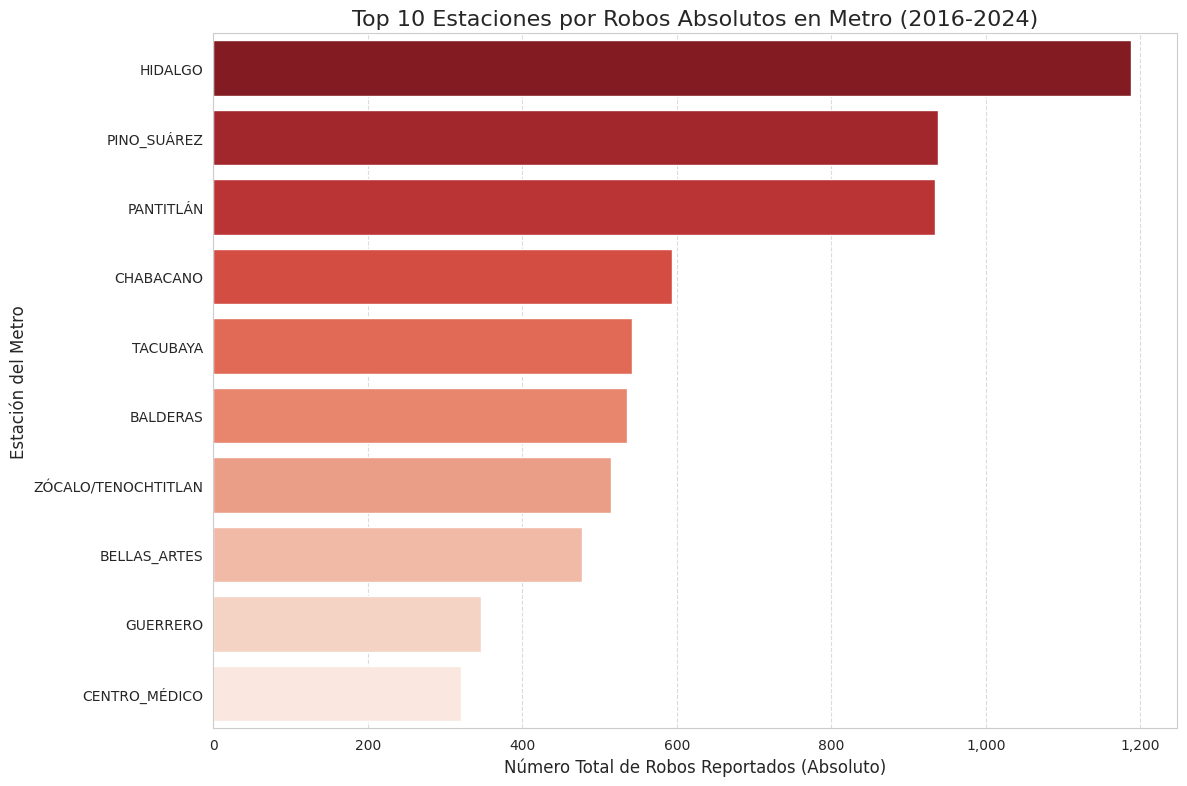

In [24]:
# CELDA: Top 10 Estaciones por Robos Absolutos en Metro

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display

print("\n--- 6.3.3. Top 10 Estaciones por Robos Absolutos en Metro ---")

# Verificar que el DataFrame necesario existe
if 'df_robos_asignados_estaciones' not in locals() or df_robos_asignados_estaciones.empty:
    print("Error: DataFrame 'df_robos_asignados_estaciones' no encontrado o vacío.")
else:
    # 1. Filtrar solo los robos que ocurrieron EN el Metro
    df_metro_total_robos = df_robos_asignados_estaciones[
        df_robos_asignados_estaciones['transport_mode'] == 'Metro'
    ].copy()

    if df_metro_total_robos.empty:
        print("No se encontraron robos clasificados como 'Metro' para este análisis.")
    else:
        # 2. Agrupar por estación y contar el número total de robos
        # Usamos 'nearest_metro_station' que es el nombre limpio y asignado
        robos_absolutos_por_estacion = df_metro_total_robos.groupby(
            'nearest_metro_station' # Esta debería ser la columna con el nombre limpio de la estación
        ).size().reset_index(name='total_robos_absolutos')

        # 3. Ordenar por el total de robos de forma descendente
        top_estaciones_absolutos = robos_absolutos_por_estacion.sort_values(
            by='total_robos_absolutos', ascending=False
        )

        # 4. Seleccionar las Top 10
        N_TOP_ABSOLUTOS = 10
        top_10_df_absolutos = top_estaciones_absolutos.head(N_TOP_ABSOLUTOS)

        print(f"\nTop {N_TOP_ABSOLUTOS} Estaciones con Mayor Número de Robos Absolutos en Metro {period_title_desc}:")
        # Formatear para visualización de tabla
        top_10_display = top_10_df_absolutos.copy()
        top_10_display['total_robos_absolutos_str'] = top_10_display['total_robos_absolutos'].apply(lambda x: f"{int(x):,}")
        display(top_10_display[['nearest_metro_station', 'total_robos_absolutos_str']].rename(columns={'nearest_metro_station':'Estación', 'total_robos_absolutos_str':'Total Robos Absolutos'}))

        # 5. Visualización
        if not top_10_df_absolutos.empty:
            plt.figure(figsize=(12, 8)) # Ajustar tamaño para mejor legibilidad
            sns.barplot(x='total_robos_absolutos', y='nearest_metro_station',
                        data=top_10_df_absolutos, palette='Reds_r', # Usar una paleta como 'Reds_r' o 'OrRd_r'
                        hue='nearest_metro_station', dodge=False, legend=False) # hue y legend=False para colores distintos si quieres o quita hue

            plt.title(f'Top {N_TOP_ABSOLUTOS} Estaciones por Robos Absolutos en Metro {period_title_desc}', fontsize=16)
            plt.xlabel('Número Total de Robos Reportados (Absoluto)', fontsize=12)
            plt.ylabel('Estación del Metro', fontsize=12)

            # Formatear el eje X para que muestre números con comas
            ax = plt.gca()
            ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(int(x))))
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10) # Ajustar tamaño de etiquetas de estación

            plt.grid(axis='x', linestyle='--', alpha=0.7)
            plt.tight_layout()

            # Guardar
            try:
                if 'SAVE_PATH_BASE' in locals() and os.path.exists(SAVE_PATH_BASE):
                    filename_abs = os.path.join(SAVE_PATH_BASE, f'top_{N_TOP_ABSOLUTOS}_estaciones_robos_absolutos.png')
                    plt.savefig(filename_abs, transparent=True, dpi=300, bbox_inches='tight')
                    print(f"  Gráfica de Top {N_TOP_ABSOLUTOS} estaciones por robos absolutos guardada.")
                else: print("  Advertencia: SAVE_PATH_BASE no definida, no se pudo guardar gráfica.")
            except Exception as e_save: print(f"  Error al guardar gráfica de robos absolutos: {e_save}")
            plt.show()
        else:
            print("No hay datos suficientes para graficar el top de estaciones por robos absolutos.")

---
### 6.3.4. La Dinámica del Volumen: Evolución del Ranking de Robos Absolutos por Estación (Bump Chart)

Además de ver las tasas de riesgo, es instructivo observar cómo evoluciona el ranking de las estaciones en términos de **volumen absoluto de robos** año tras año. Un Bump Chart nos permitirá visualizar estas dinámicas, mostrando qué estaciones han sido consistentemente las de mayor incidencia o cuáles han experimentado cambios drásticos en su posición en el ranking de volumen.

Nos enfocaremos en las Top 5 estaciones que más frecuentemente han aparecido en los primeros puestos de este ranking de robos absolutos.


--- 6.3.4. Generando Bump Chart de Robos Absolutos por Estación (Top 5) ---

1. Calculando rankings anuales por estación (basado en robos absolutos)...

Primeras filas del DataFrame de ranking (robos absolutos):


nombre_estacion_clean  anio_hecho  ranking_abs  numero_robos
568                HIDALGO        2016          1.0         134.0
569                HIDALGO        2016          1.0         134.0
1001           PINO_SUÁREZ        2016          3.0          66.0
1002           PINO_SUÁREZ        2016          3.0          66.0
90                BALDERAS        2016          5.0          53.0


Consolidando múltiples entradas por estación/año (si existen) para robos absolutos...
Dimensiones después de consolidación: (45, 4)

DataFrame final para Bump Chart de Robos Absolutos (5 estaciones seleccionadas):


anio_hecho   Estacion  Ranking_Abs
0        2016  CHABACANO         20.0
1        2017  CHABACANO         17.0
2        2018  CHABACANO          9.0
3        2019  CHABACANO          9.0
4        2020  CHABACANO         20.0

<ipython-input-25-512cf184c5b7>:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_abs = plt.cm.get_cmap('Dark2', len(df_bump_abs_final_for_plot['Estacion'].unique()))


  Bump Chart de robos absolutos guardado.


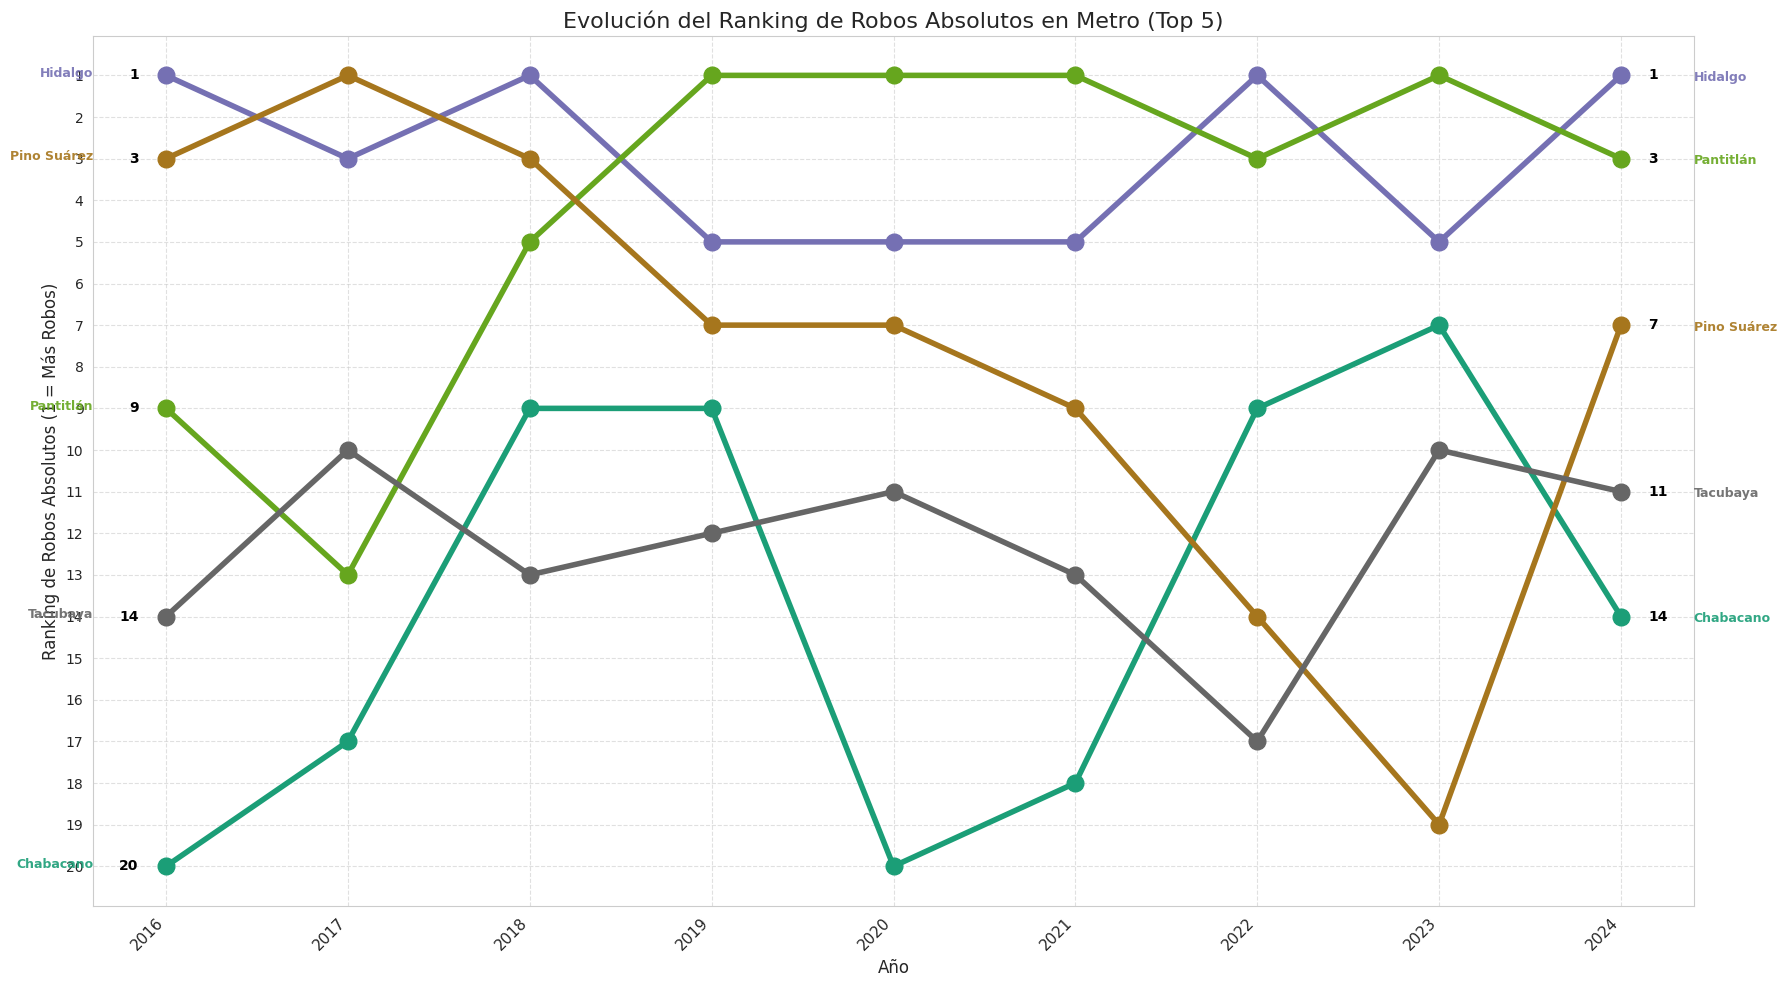

In [25]:
# CELDA: Generación de Bump Chart de Robos Absolutos por Estación (Top 5) - CORREGIDO

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np
import os
from IPython.display import display

print("\n--- 6.3.4. Generando Bump Chart de Robos Absolutos por Estación (Top 5) ---")

if 'gdf_robos_estacion_anio' not in locals() or gdf_robos_estacion_anio.empty:
    print("Error: gdf_robos_estacion_anio no encontrado o vacío.")
else:
    print("\n1. Calculando rankings anuales por estación (basado en robos absolutos)...")
    df_ranking_abs_base = gdf_robos_estacion_anio[gdf_robos_estacion_anio['numero_robos'] >= 0].copy()
    df_ranking_abs_base = df_ranking_abs_base.sort_values(by=['anio_hecho', 'numero_robos'], ascending=[True, False])
    df_ranking_abs_base['ranking_abs'] = df_ranking_abs_base.groupby('anio_hecho')['numero_robos'].rank(method='min', ascending=False)
    df_bump_abs_raw = df_ranking_abs_base[['nombre_estacion_clean', 'anio_hecho', 'ranking_abs', 'numero_robos']].copy()

    print("\nPrimeras filas del DataFrame de ranking (robos absolutos):")
    display(df_bump_abs_raw.head())

    N_TOP_STATIONS_BUMP_ABS = 5
    avg_rank_abs_per_station = df_bump_abs_raw.groupby('nombre_estacion_clean')['ranking_abs'].mean().sort_values()
    top_stations_abs_by_avg_rank = avg_rank_abs_per_station.head(N_TOP_STATIONS_BUMP_ABS).index.tolist()

    if not top_stations_abs_by_avg_rank:
        print(f"No se pudieron identificar {N_TOP_STATIONS_BUMP_ABS} estaciones.")
        df_bump_abs_final_for_plot = pd.DataFrame()
    else:
        df_bump_abs_filtered = df_bump_abs_raw[df_bump_abs_raw['nombre_estacion_clean'].isin(top_stations_abs_by_avg_rank)].copy()

        # --- CONSOLIDACIÓN DE DUPLICADOS ANTES DEL PIVOT ---
        print("\nConsolidando múltiples entradas por estación/año (si existen) para robos absolutos...")
        df_bump_abs_consolidated = df_bump_abs_filtered.groupby(['anio_hecho', 'nombre_estacion_clean']).agg(
            ranking_abs=('ranking_abs', 'min'),       # Tomar el mejor ranking (el más bajo)
            numero_robos=('numero_robos', 'sum')    # Sumar los robos si hay múltiples líneas para la misma estación
        ).reset_index()

        # Recalcular el ranking DESPUÉS de sumar los robos, si es necesario, aunque para el bump chart el ranking original de la tasa es lo que graficamos
        # Para este bump chart de robos ABSOLUTOS, el ranking ya se calculó sobre 'numero_robos'.
        # Si la consolidación alteró significativamente el 'numero_robos' (por sumar de varias líneas),
        # el 'ranking_abs' original podría no ser el correcto para el valor sumado.
        # Sin embargo, para el bump chart, a menudo se usa el ranking original.
        # Si queremos rankear sobre los robos consolidados:
        # df_bump_abs_consolidated = df_bump_abs_consolidated.sort_values(by=['anio_hecho', 'numero_robos'], ascending=[True, False])
        # df_bump_abs_consolidated['ranking_abs_consolidado'] = df_bump_abs_consolidated.groupby('anio_hecho')['numero_robos'].rank(method='min', ascending=False)
        # Y luego usar 'ranking_abs_consolidado' en el pivot.
        # Por ahora, usaremos el 'ranking_abs' original (tomando el 'min' si hay duplicados).

        print(f"Dimensiones después de consolidación: {df_bump_abs_consolidated.shape}")
        # Verificar duplicados después de la consolidación
        # duplicate_check = df_bump_abs_consolidated[df_bump_abs_consolidated.duplicated(subset=['anio_hecho', 'nombre_estacion_clean'], keep=False)]
        # print(f"Duplicados después de consolidar: {len(duplicate_check)}")
        # display(duplicate_check)


        # --- PREPARACIÓN FINAL PARA EL BUMP CHART ---
        # Usar 'ranking_abs' (el que tomamos como 'min' de los duplicados)
        df_bump_abs_pivot = df_bump_abs_consolidated.pivot(index='anio_hecho', columns='nombre_estacion_clean', values='ranking_abs')
        df_bump_abs_final_for_plot = df_bump_abs_pivot.reset_index().melt(id_vars='anio_hecho', var_name='Estacion', value_name='Ranking_Abs')
        df_bump_abs_final_for_plot.dropna(subset=['Ranking_Abs'], inplace=True)

        print(f"\nDataFrame final para Bump Chart de Robos Absolutos ({len(top_stations_abs_by_avg_rank)} estaciones seleccionadas):")
        display(df_bump_abs_final_for_plot.head())

    # 3. Crear el Bump Chart
    if not df_bump_abs_final_for_plot.empty:
        # ... (el resto del código de ploteo del Bump Chart se mantiene igual, usando df_bump_abs_final_for_plot) ...
        # ... (asegúrate de que usa 'Ranking_Abs' y 'anio_hecho') ...
        fig_bump_abs, ax_bump_abs = plt.subplots(figsize=(18, 10))
        colors_abs = plt.cm.get_cmap('Dark2', len(df_bump_abs_final_for_plot['Estacion'].unique()))
        for i, station_name in enumerate(df_bump_abs_final_for_plot['Estacion'].unique()):
            df_station_abs = df_bump_abs_final_for_plot[df_bump_abs_final_for_plot['Estacion'] == station_name].sort_values('anio_hecho')
            ax_bump_abs.plot(df_station_abs['anio_hecho'], df_station_abs['Ranking_Abs'], marker='o', color=colors_abs(i), linewidth=4, markersize=12, alpha=1.0)
            if not df_station_abs.empty:
                first_point_abs = df_station_abs.iloc[0]; ax_bump_abs.text(first_point_abs['anio_hecho'] - 0.15, first_point_abs['Ranking_Abs'], f"{int(first_point_abs['Ranking_Abs'])}", fontsize=10, ha='right', va='center', color='black', fontweight='bold')
                ax_bump_abs.text(first_point_abs['anio_hecho'] - 0.4, first_point_abs['Ranking_Abs'] - 0.05, f"{station_name.replace('_', ' ').title()}", fontsize=9, ha='right', va='center', color=colors_abs(i), alpha=0.9, fontweight='bold')
                last_point_abs = df_station_abs.iloc[-1]; ax_bump_abs.text(last_point_abs['anio_hecho'] + 0.15, last_point_abs['Ranking_Abs'], f"{int(last_point_abs['Ranking_Abs'])}", fontsize=10, ha='left', va='center', color='black', fontweight='bold')
                ax_bump_abs.text(last_point_abs['anio_hecho'] + 0.4, last_point_abs['Ranking_Abs'] + 0.05, f"{station_name.replace('_', ' ').title()}", fontsize=9, ha='left', va='center', color=colors_abs(i), alpha=0.9, fontweight='bold')
        ax_bump_abs.set_title(f'Evolución del Ranking de Robos Absolutos en Metro (Top {N_TOP_STATIONS_BUMP_ABS})', fontsize=16); ax_bump_abs.set_xlabel('Año', fontsize=12); ax_bump_abs.set_ylabel('Ranking de Robos Absolutos (1 = Más Robos)', fontsize=12)
        ax_bump_abs.invert_yaxis()
        if not df_bump_abs_final_for_plot.empty:
            max_ranking_abs = df_bump_abs_final_for_plot['Ranking_Abs'].max()
            if pd.notna(max_ranking_abs): ax_bump_abs.set_yticks(range(1, int(max_ranking_abs) + 1))
            unique_years_abs = sorted(df_bump_abs_final_for_plot['anio_hecho'].unique().astype(int)); ax_bump_abs.set_xticks(unique_years_abs); ax_bump_abs.set_xticklabels(unique_years_abs, rotation=45, ha='right')
        ax_bump_abs.tick_params(axis='y', labelsize=10); ax_bump_abs.grid(True, linestyle='--', alpha=0.6); plt.tight_layout(rect=[0, 0, 1, 1])
        try:
            if 'SAVE_PATH_BASE' in locals(): bump_abs_filename = os.path.join(SAVE_PATH_BASE, f'bump_chart_robos_absolutos_estaciones_top{N_TOP_STATIONS_BUMP_ABS}.png'); plt.savefig(bump_abs_filename, transparent=True, dpi=300, bbox_inches='tight'); print(f"  Bump Chart de robos absolutos guardado.")
        except Exception as e_save_bump_abs: print(f"  Error al guardar Bump Chart de robos absolutos: {e_save_bump_abs}")
        plt.show()
    else:
        print(f"No se pudieron identificar suficientes estaciones para el Bump Chart de Robos Absolutos (Top {N_TOP_STATIONS_BUMP_ABS}).")

---
## 6.4. Análisis de Tasa de Robo por Estación: Normalizando por Afluencia

El número absoluto de robos por estación nos indica dónde ocurren más incidentes. Sin embargo, estaciones con una afluencia masiva de pasajeros (como Pantitlán o Indios Verdes) naturalmente registrarán más robos que una estación pequeña. Para entender el **riesgo real o relativo** para el usuario, es fundamental normalizar el número de robos por la cantidad de personas que transitan por esa estación.

En esta sección, calcularemos la **tasa de robo por estación por cada 100,000 (o 1,000,000) pasajeros**. Esto nos permitirá identificar estaciones que, a pesar de no tener un volumen altísimo de incidentes, pueden ser proporcionalmente más riesgosas.

**Metodología:**
1.  Obtendremos la afluencia total anual para cada estación del Metro.
2.  Uniremos estos datos con nuestros conteos de robos por estación y año.
3.  Calcularemos la tasa de robo.
4.  Visualizaremos estas tasas en mapas anuales para observar su evolución.


--- 6.4.1. Calculando y Visualizando Tasa de Robo por Estación (Anual) ---

1. Procesando afluencia anual por estación...
  Afluencia anual por estación procesada.

Primeras filas de afluencia anual por estación:


estacion  anio  afluencia_anual estacion_clean
0  Acatitla  2010          5465141       ACATITLA
1  Acatitla  2011          7232931       ACATITLA
2  Acatitla  2012          5182670       ACATITLA
3  Acatitla  2013          4949291       ACATITLA
4  Acatitla  2014          4961783       ACATITLA


2. Uniendo robos y afluencia anual por estación...
  Robos y afluencia anual por estación unidos.


<ipython-input-26-fdfefe481a9e>:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_robos_afluencia_estacion['afluencia_anual'].fillna(0, inplace=True)


nearest_metro_station  anio  numero_robos estacion_clean  afluencia_anual
0              ACATITLA  2017             3       ACATITLA        4905853.0
1              ACATITLA  2018             4       ACATITLA        5340589.0
2              ACATITLA  2019             3       ACATITLA        5846455.0
3              ACATITLA  2020             3       ACATITLA        3817048.0
4              ACATITLA  2021             4       ACATITLA        3640691.0


3. Calculando la Tasa de Robo por Estación...
  Tasa de robo calculada.


nearest_metro_station  anio  numero_robos  afluencia_anual  tasa_robo
0              ACATITLA  2017             3        4905853.0   0.061151
1              ACATITLA  2018             4        5340589.0   0.074898
2              ACATITLA  2019             3        5846455.0   0.051313
3              ACATITLA  2020             3        3817048.0   0.078595
4              ACATITLA  2021             4        3640691.0   0.109869

Estadísticas de 'tasa_robo':
count    780.000000
mean       0.128488
std        0.189885
min        0.003701
25%        0.040248
50%        0.076669
75%        0.140260
max        2.253555
Name: tasa_robo, dtype: float64

4. Generando Mapas Anuales de Tasa de Robo por Estación...
Máximo global de tasa de robo en una estación/año: 2.25


<ipython-input-26-fdfefe481a9e>:119: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf_tasas_estacion_anio['tasa_robo'].fillna(0, inplace=True)


  Mapa de tasa para el año 2016 guardado.


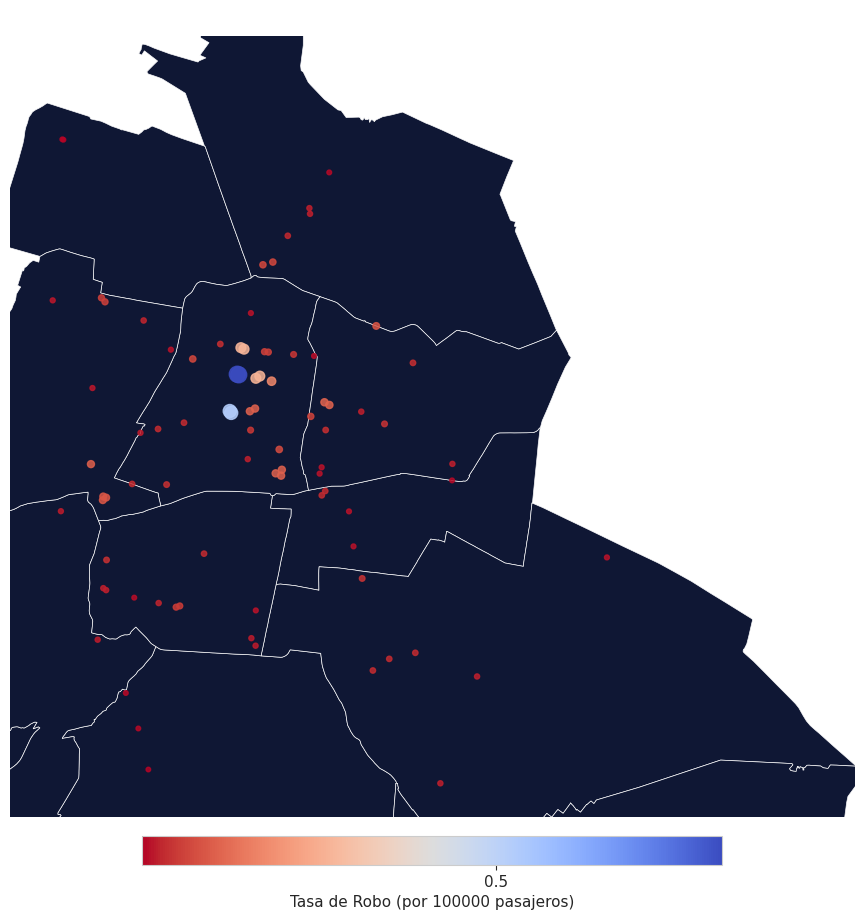

  Mapa de tasa para el año 2017 guardado.


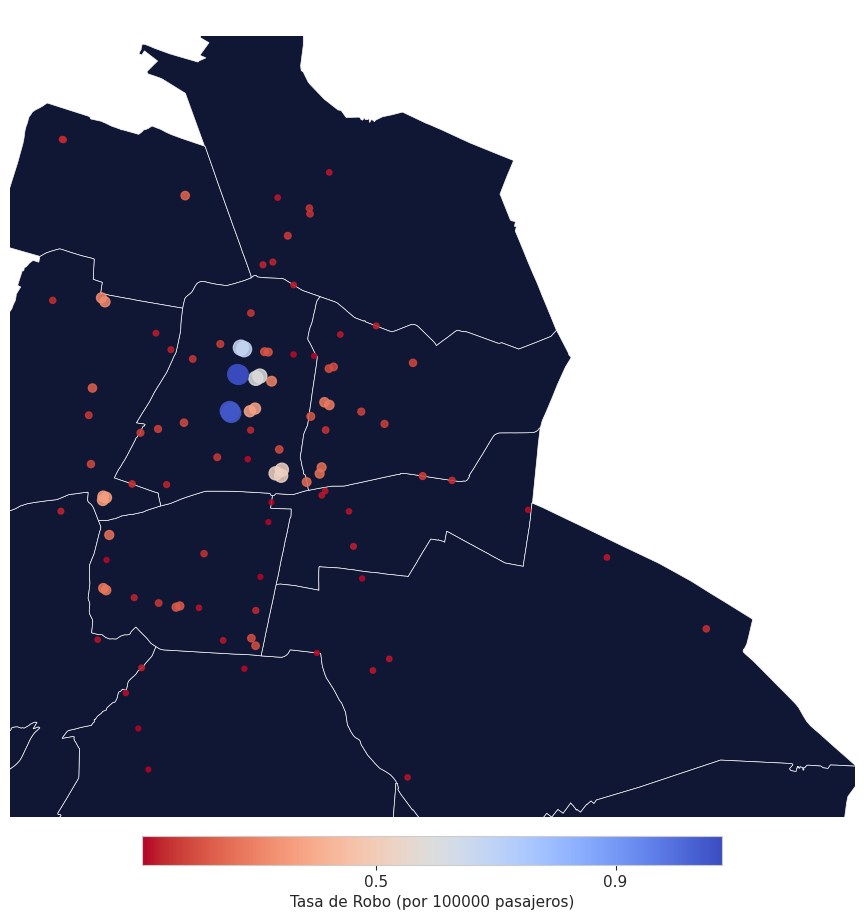

  Mapa de tasa para el año 2018 guardado.


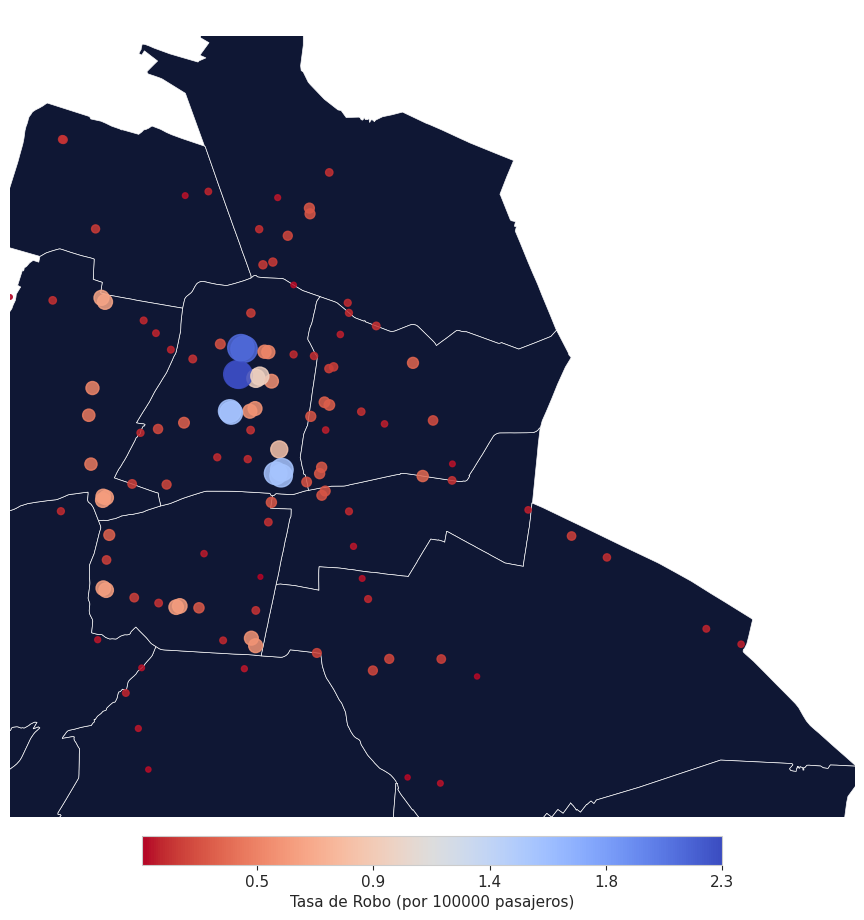

  Mapa de tasa para el año 2019 guardado.


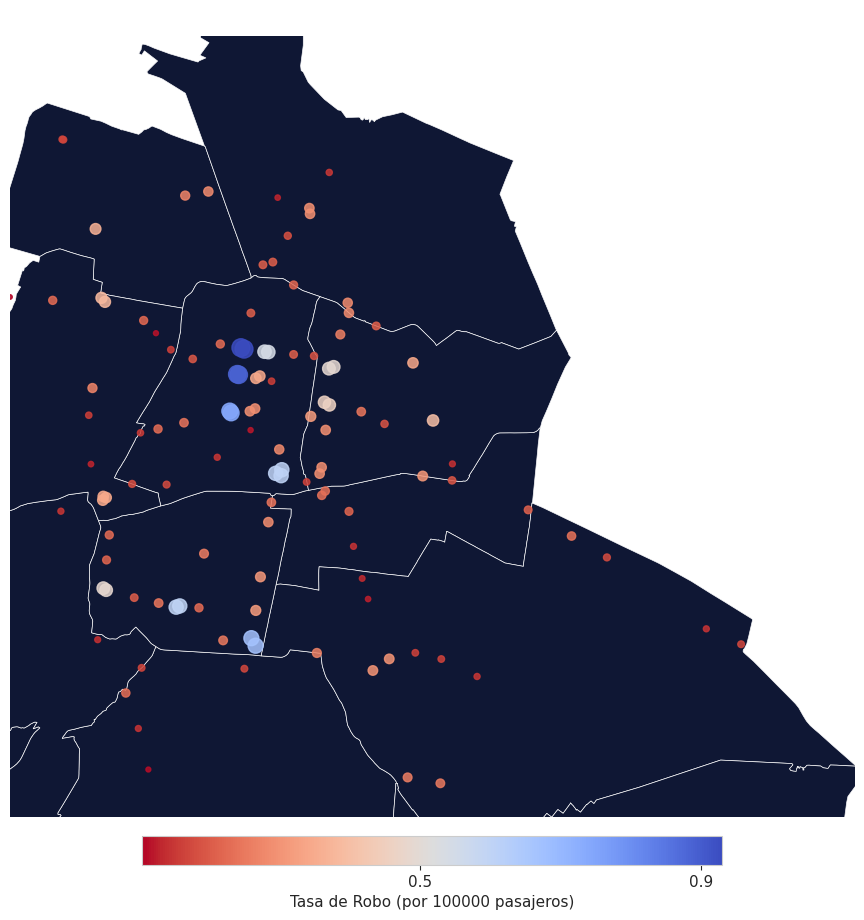

  Mapa de tasa para el año 2020 guardado.


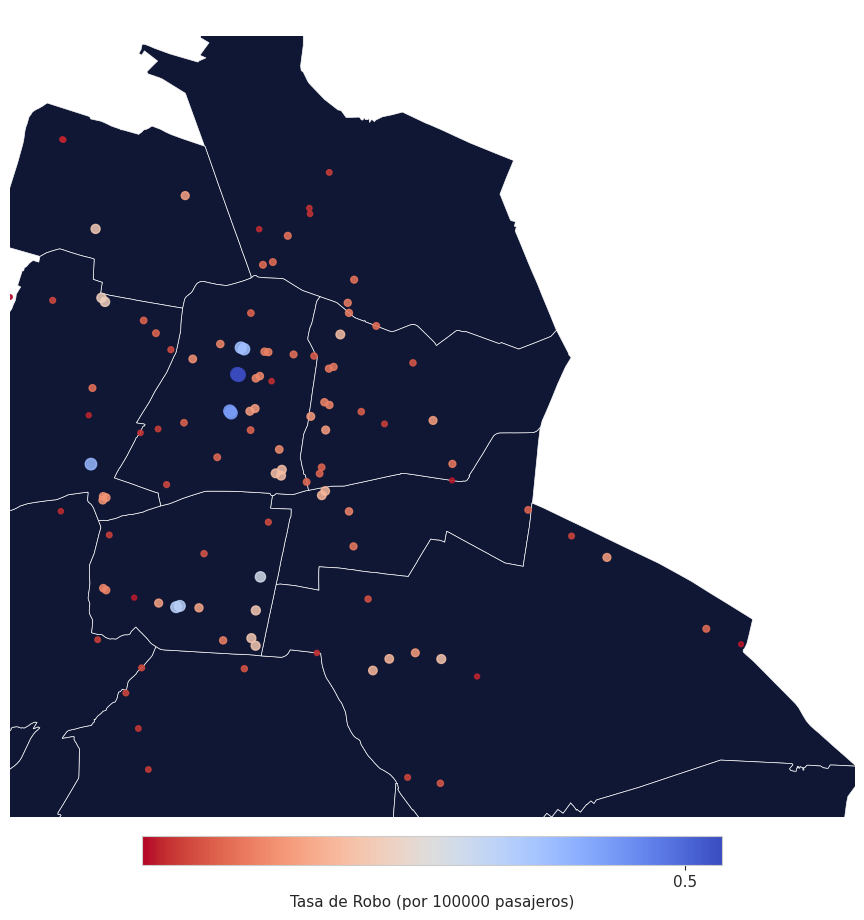

  Mapa de tasa para el año 2021 guardado.


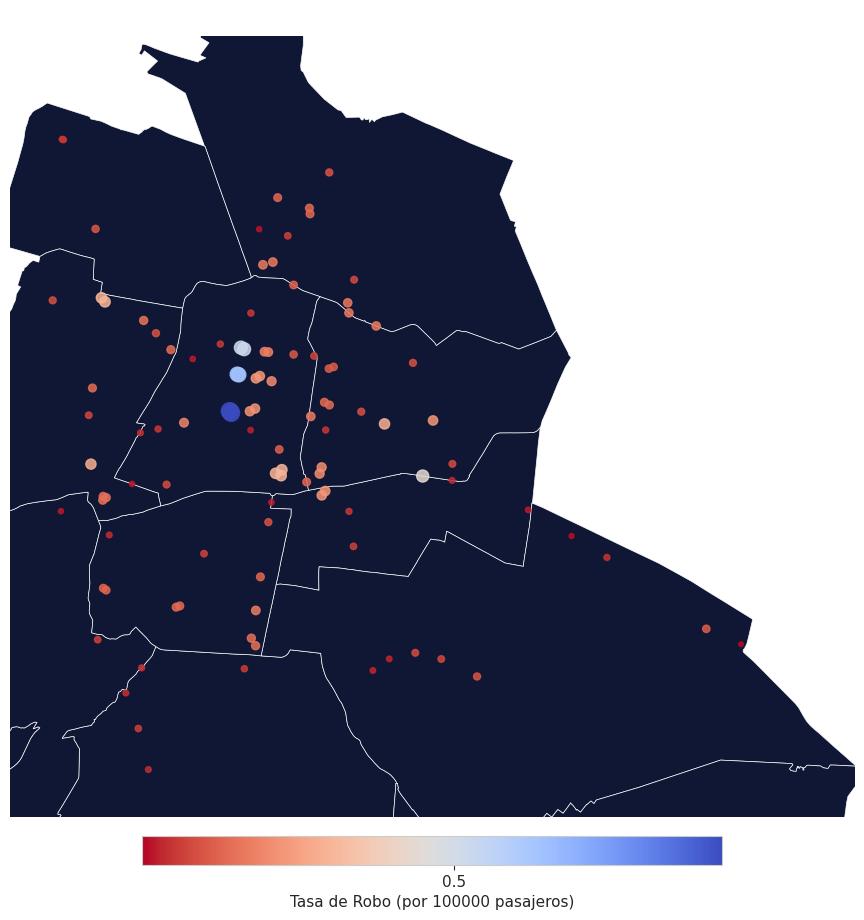

  Mapa de tasa para el año 2022 guardado.


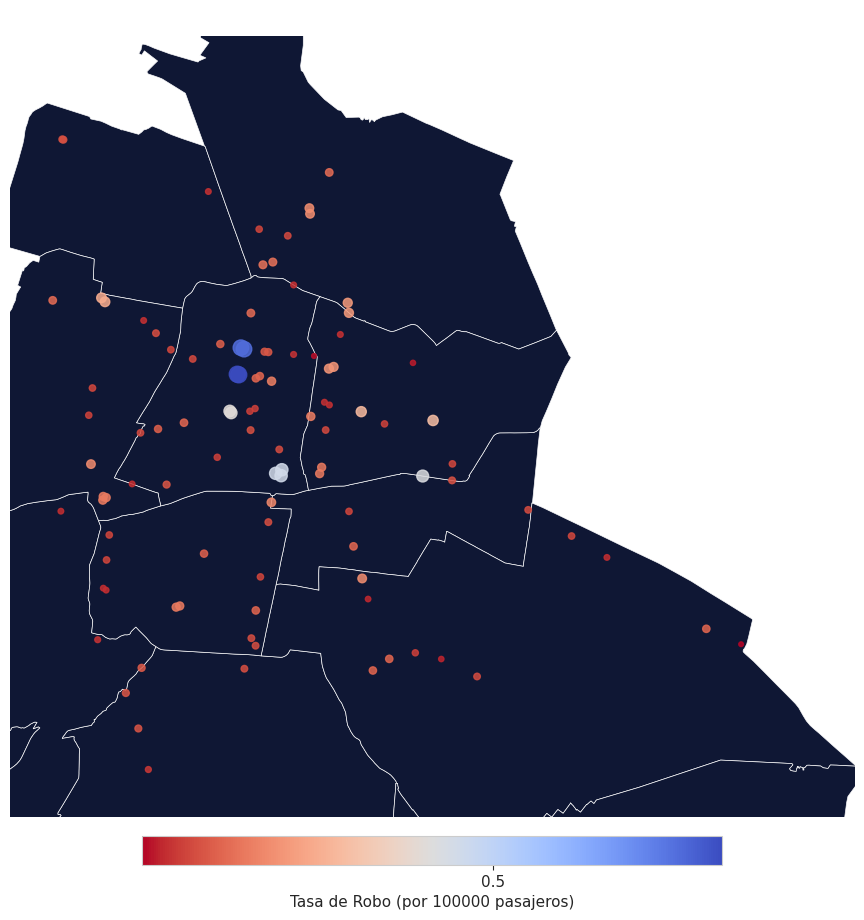

  Mapa de tasa para el año 2023 guardado.


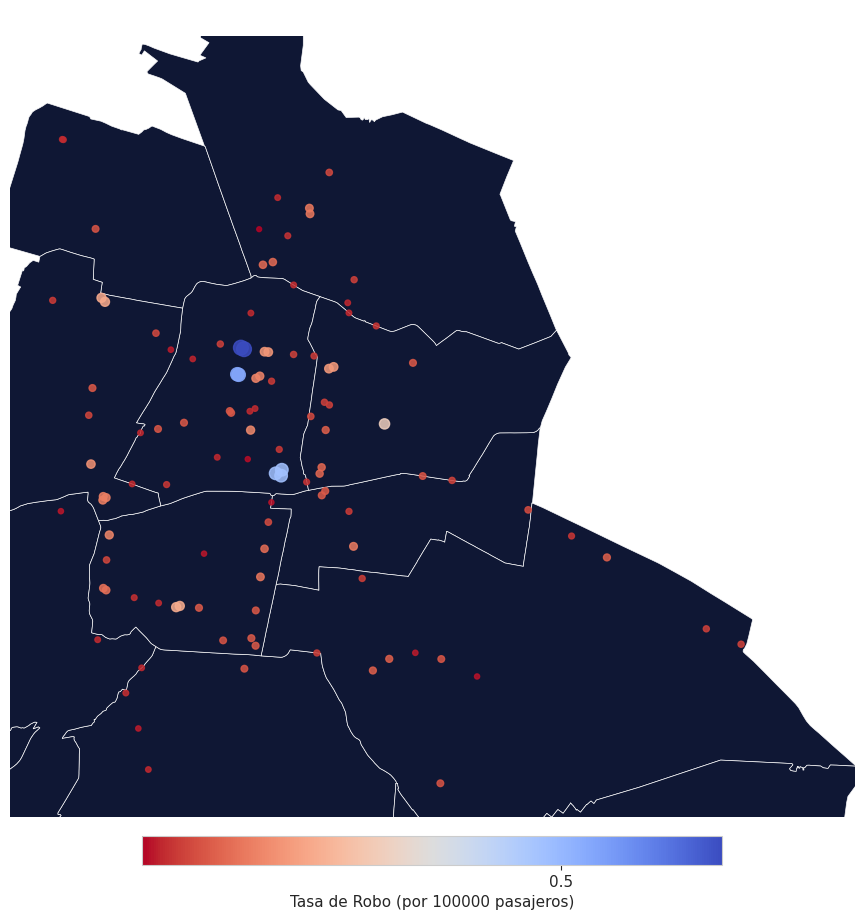

  Mapa de tasa para el año 2024 guardado.


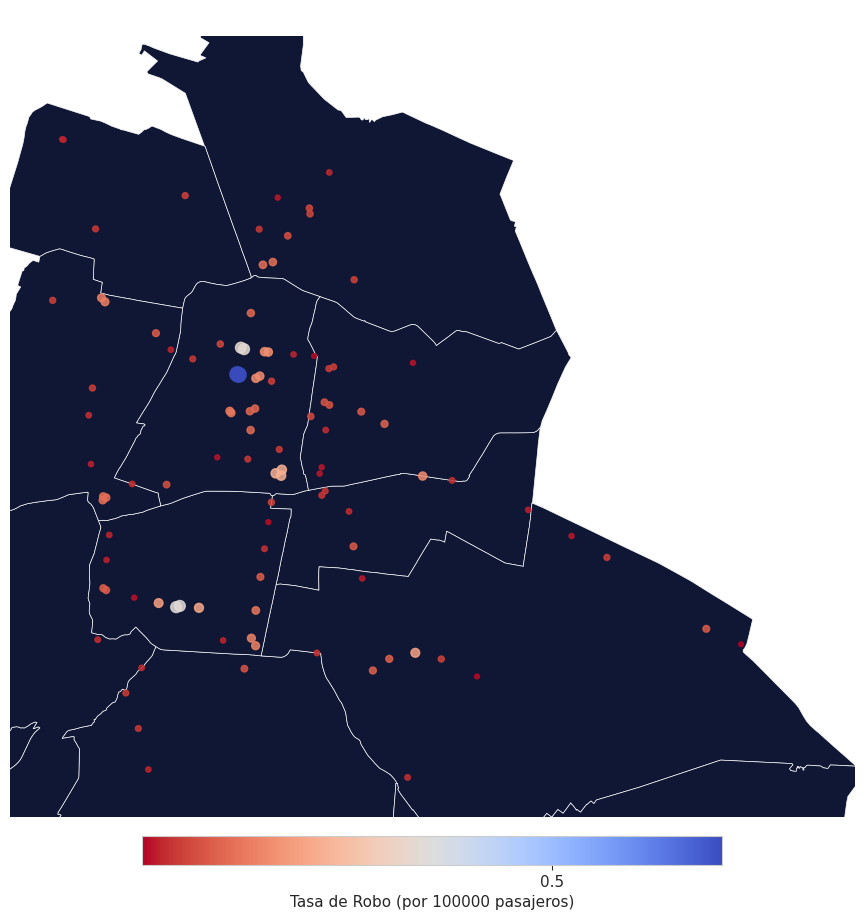

In [26]:
# CELDA: Cálculo y Visualización de Tasa de Robo por Estación (Anual)

import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import os
# from IPython.display import display # Evitar para prevenir output extra
import gc # Para recolección de basura
import numpy as np # Para np.nan y otras operaciones
import matplotlib.colors as mcolors # Keep this for colormaps if needed
import matplotlib.ticker as mticker # Import FormatStrFormatter from here

print("\n--- 6.4.1. Calculando y Visualizando Tasa de Robo por Estación (Anual) ---")

# --- PASO 1: Cargar y Procesar Datos de Afluencia por Estación (Anual) ---
# df_afluencia_raw debe venir de la celda de carga de afluencia, con 'fecha', 'estacion', 'afluencia'
if 'df_afluencia_raw' not in locals() or df_afluencia_raw.empty:
    print("Error: df_afluencia_raw (afluencia por estación) no encontrado o vacío. No se puede calcular la tasa.")
    # Aquí podríamos intentar recargar df_afluencia_raw si es necesario
    # try: df_afluencia_raw = pd.read_csv(AFLUENCIA_CSV_PATH, encoding='UTF-8'); # ... y procesar col nombres
    # except: df_afluencia_raw = None
    df_afluencia_por_estacion_anio = pd.DataFrame() # DataFrame vacío si no hay datos
else:
    print("\n1. Procesando afluencia anual por estación...")
    # Asegurarse de que las columnas están limpias y renombradas
    # Estas son las columnas originales del CSV de afluencia
    DATE_COL_AFLUENCIA = 'fecha'
    STATION_COL_AFLUENCIA = 'estacion'
    COUNT_COL_AFLUENCIA = 'afluencia'

    # Re-asegurar que las columnas son de tipo correcto (ds y afluencia)
    df_afluencia_raw['ds'] = pd.to_datetime(df_afluencia_raw[DATE_COL_AFLUENCIA], errors='coerce')
    df_afluencia_raw[COUNT_COL_AFLUENCIA] = pd.to_numeric(df_afluencia_raw[COUNT_COL_AFLUENCIA], errors='coerce')
    df_afluencia_raw.dropna(subset=['ds', COUNT_COL_AFLUENCIA], inplace=True)

    # Extraer el año
    df_afluencia_raw['anio'] = df_afluencia_raw['ds'].dt.year

    # Agrupar afluencia por estación y año
    # Asegúrate de que df_afluencia_raw['estacion'] tiene nombres que coincidan con nombre_estacion_clean
    # Podrías necesitar un mapeo o limpieza de nombres de estación aquí si no son consistentes.
    # Por ahora, asumiremos que 'estacion' en afluencia coincide con 'nombre_estacion_clean' en SHP.
    df_afluencia_por_estacion_anio = df_afluencia_raw.groupby(
        [STATION_COL_AFLUENCIA, 'anio']
    )[COUNT_COL_AFLUENCIA].sum().reset_index(name='afluencia_anual')

    # Limpiar y normalizar el nombre de la estación para el merge
    df_afluencia_por_estacion_anio['estacion_clean'] = df_afluencia_por_estacion_anio[STATION_COL_AFLUENCIA].astype(str).str.upper().str.strip().str.replace(' ', '_')
    print("  Afluencia anual por estación procesada.")
    print("\nPrimeras filas de afluencia anual por estación:")
    display(df_afluencia_por_estacion_anio.head())


# --- PASO 2: Unir Robos por Estación (Anual) con Afluencia por Estación (Anual) ---
# robos_por_estacion_anio viene de la celda 6.3.1
# gdf_estaciones_metro_procesado viene de la celda de carga de SHP
if 'robos_por_estacion_anio' not in locals() or robos_por_estacion_anio.empty:
    print("Error: DataFrame 'robos_por_estacion_anio' no encontrado o vacío. No se puede calcular la tasa.")
elif 'gdf_estaciones_metro_procesado' not in locals() or gdf_estaciones_metro_procesado.empty:
    print("Error: GeoDataFrame 'gdf_estaciones_metro_procesado' no encontrado o vacío. No se puede calcular la tasa.")
elif df_afluencia_por_estacion_anio.empty:
    print("Error: DataFrame 'df_afluencia_por_estacion_anio' vacío. No se puede calcular la tasa.")
else:
    print("\n2. Uniendo robos y afluencia anual por estación...")
    # Asegurarse de que robos_por_estacion_anio tenga 'numero_robos' y 'anio_hecho' (ya debería)

    # Renombrar 'anio_hecho' a 'anio' para el merge con afluencia
    robos_por_estacion_anio_merged = robos_por_estacion_anio.rename(columns={'anio_hecho': 'anio'}).copy()

    # Unir robos con afluencia
    df_robos_afluencia_estacion = pd.merge(
        robos_por_estacion_anio_merged,
        df_afluencia_por_estacion_anio[['estacion_clean', 'anio', 'afluencia_anual']],
        left_on=['nearest_metro_station', 'anio'],
        right_on=['estacion_clean', 'anio'],
        how='left' # Mantener todos los robos, añadir afluencia
    )
    # Rellenar afluencia_anual con 0 para estaciones/años sin afluencia
    df_robos_afluencia_estacion['afluencia_anual'].fillna(0, inplace=True)

    print("  Robos y afluencia anual por estación unidos.")
    display(df_robos_afluencia_estacion.head())


    # --- PASO 3: Calcular la Tasa de Robo por Estación ---
    print("\n3. Calculando la Tasa de Robo por Estación...")

    ESCALA_TASA = 100000 # Por cada 100,000 pasajeros

    # Manejo de división por cero: si afluencia_anual es 0, la tasa es NaN o 0.
    # Pondremos 0 si no hay robos, si hay robos y 0 afluencia, lo dejaremos como NaN/Inf o un valor alto.
    # Una forma de manejar esto: si afluencia es 0, asigna una tasa muy alta o NaN.
    df_robos_afluencia_estacion['tasa_robo'] = np.where(
        df_robos_afluencia_estacion['afluencia_anual'] > 0,
        (df_robos_afluencia_estacion['numero_robos'] / df_robos_afluencia_estacion['afluencia_anual']) * ESCALA_TASA,
        # Si afluencia es 0, y numero_robos > 0, la tasa es "infinita", lo marcamos como un valor muy alto o NaN
        np.where(df_robos_afluencia_estacion['numero_robos'] > 0, np.nan, 0) # NaN si robos > 0 y afluencia = 0, 0 si robos = 0 y afluencia = 0
    )

    # Eliminar NaNs de tasa de robo si no los queremos en el mapa (ej. casos de afluencia 0 con robos)
    df_robos_afluencia_estacion.dropna(subset=['tasa_robo'], inplace=True)

    print("  Tasa de robo calculada.")
    display(df_robos_afluencia_estacion[['nearest_metro_station', 'anio', 'numero_robos', 'afluencia_anual', 'tasa_robo']].head())
    print(f"Estadísticas de 'tasa_robo':\n{df_robos_afluencia_estacion['tasa_robo'].describe()}")


    # --- PASO 4: Generar Mapas Anuales de Tasa de Robo por Estación ---
    print("\n4. Generando Mapas Anuales de Tasa de Robo por Estación...")

    # Unir tasas con las geometrías de las estaciones
    gdf_tasas_estacion_anio = pd.merge(
        gdf_estaciones_metro_procesado[['nombre_estacion_clean', 'geometry', 'linea_metro_clean']],
        df_robos_afluencia_estacion,
        left_on='nombre_estacion_clean',
        right_on='nearest_metro_station',
        how='left' # Mantener todas las estaciones, rellenar tasas con 0 si no hay datos
    )
    gdf_tasas_estacion_anio['tasa_robo'].fillna(0, inplace=True)
    # Asegurarse de que el GeoDataFrame tiene una columna 'geometry'
    gdf_tasas_estacion_anio = gpd.GeoDataFrame(gdf_tasas_estacion_anio, geometry='geometry', crs=gdf_estaciones_metro_procesado.crs)

    # Encontrar el máximo global de la tasa de robo para escalar consistentemente
    max_tasa_global = gdf_tasas_estacion_anio['tasa_robo'].max()
    if pd.isna(max_tasa_global) or max_tasa_global == 0: max_tasa_global = 1

    print(f"Máximo global de tasa de robo en una estación/año: {max_tasa_global:.2f}")

    # LÍMITES DEL ZOOM (reutilizar de la celda anterior)
    if 'x_min_zoom' in locals() and x_min_zoom is not None:
        pass # Los límites ya deberían estar definidos de la celda de mapas absolutos
    else:
        # Fallback if variables are not defined (shouldn't happen if run sequentially)
        if gdf_estaciones_metro_procesado is not None and not gdf_estaciones_metro_procesado.empty:
            bounds = gdf_estaciones_metro_procesado.total_bounds
            minx, miny, maxx, maxy = bounds
            dx = maxx - minx
            dy = maxy - miny
            # Define the zoom region: top 85%
            x_min_zoom, x_max_zoom = minx, maxx
            y_min_zoom, y_max_zoom = miny + dy * 0.15, maxy # Adjusted from 0.35 to 0.15 to show more area
            print(f"Fallback zoom bounds: X ({x_min_zoom:.2f}, {x_max_zoom:.2f}), Y ({y_min_zoom:.2f}, {y_max_zoom:.2f})")
        else:
            # Default arbitrary zoom if no stations gdf
            x_min_zoom, x_max_zoom = 482000, 498000
            y_min_zoom, y_max_zoom = 2145000, 2160000
            print("Using default arbitrary zoom bounds.")


    # # COLOR DEL MAPA BASE Y ALPHAS (reutilizar de la celda anterior)
    # if 'BASE_MAP_COLOR' not in locals(): BASE_MAP_COLOR = '#000033' # Dark navy, almost black
    # if 'BASE_MAP_ALPHA' not in locals(): BASE_MAP_ALPHA = 0.1 # 10% transparency

    # >>> REEMPLAZA ESAS LÍNEAS POR ESTAS (O AJUSTA DIRECTAMENTE SI YA LAS TIENES) <<<
    BASE_MAP_COLOR = '#020A29' # Azul marino oscuro, casi negro
    BASE_MAP_ALPHA = 0.95      # 95% opaco (5% transparente) para un color muy denso

    # Bucle para plotear cada año
    # Convertir a int ANTES de ordenar para evitar el error con valores grandes
    años_presentes_tasas = sorted(gdf_tasas_estacion_anio['anio'].dropna().unique().astype(int)) # Use dropna() to handle potential NaT/None

    for anio in años_presentes_tasas:
        gdf_anio_tasa = gdf_tasas_estacion_anio[gdf_tasas_estacion_anio['anio'] == anio].copy()
        if gdf_anio_tasa.empty: print(f"  No hay datos de tasa para el año {anio}."); continue

        fig_map_tasa, ax_map_tasa = plt.subplots(1, 1, figsize=(10, 10))

        if 'gdf_alcaldias_cdmx' in locals() and gdf_alcaldias_cdmx is not None and not gdf_alcaldias_cdmx.empty:
            gdf_alcaldias_cdmx.plot(ax=ax_map_tasa, facecolor=BASE_MAP_COLOR, edgecolor='white', linewidth=0.5, alpha=BASE_MAP_ALPHA)
        # Apply zoom limits
        ax_map_tasa.set_xlim([x_min_zoom, x_max_zoom])
        ax_map_tasa.set_ylim([y_min_zoom, y_max_zoom])

        # Ensure 'tasa_robo' is numeric before scaling sizes
        if gdf_anio_tasa['tasa_robo'].dtype != float:
             print(f"  DEBUG: Convirtiendo 'tasa_robo' a float para el año {int(anio)}...")
             gdf_anio_tasa['tasa_robo'] = gdf_anio_tasa['tasa_robo'].astype(float)

        # Handle potential NaN values in 'tasa_robo' before plotting sizes
        # Replace NaN with 0 or a small base size value for plotting
        tasa_robo_values = gdf_anio_tasa['tasa_robo'].fillna(0).values # Fill NaN with 0 for size calculation

        # Escalar el tamaño de los puntos por la tasa de robo
        # Use the actual tasa_robo_values for scaling
        sizes_tasa = (tasa_robo_values / max_tasa_global) * 375 + 10 # Increased multiplier from 150 to 375 + base size 10

        gdf_anio_tasa.plot(ax=ax_map_tasa,
                           column='tasa_robo',
                           markersize=sizes_tasa,
                           cmap='coolwarm_r', # Nuevo colormap para tasas (ej. Yellow-Green-Blue)
                           legend=True,
                           legend_kwds={
                               'label': f"Tasa de Robo (por {int(ESCALA_TASA)} pasajeros)", # Adjusted label to show scale
                               'orientation': "horizontal",
                               'shrink': 0.6,
                               'pad': 0.02,
                               'ticks': np.linspace(0, max_tasa_global, num=6),
                               'format': mticker.FormatStrFormatter('%.1f') # Formato con un decimal (or '%.0f' for no decimals)
                           },
                           alpha=0.85, # Point transparency
                           missing_kwds={"color": "darkgrey", "markersize": 5}
                          )

        ax_map_tasa.set_title(f'Tasa de Robo en Metro por Estación - Año {int(anio)}', fontsize=16, color='white') # Title color white for contrast
        ax_map_tasa.set_axis_off()
        plt.tight_layout()

        try:
            map_filename_tasa = f'mapa_tasa_robo_metro_estacion_{int(anio)}.png'
            plt.savefig(os.path.join(SAVE_PATH_BASE, map_filename_tasa), transparent=True, dpi=300, bbox_inches='tight')
            print(f"  Mapa de tasa para el año {int(anio)} guardado.")
        except Exception as e_save_map: print(f"  Error al guardar mapa de tasa del año {int(anio)}: {e_save_map}")
        plt.show()

        plt.close(fig_map_tasa); gc.collect()

---
### 2.X. Puntos de Encuentro Masivo: Las Estaciones del Metro con Mayor Afluencia

Además de la afluencia total del sistema, es crucial identificar qué estaciones concentran el mayor número de pasajeros. Estas "megaterminales" o nodos de conexión son vitales para la movilidad de millones, pero su alta densidad de personas también puede convertirlas en escenarios atractivos para ciertos tipos de incidentes.

Analizaremos la afluencia anual promedio por estación para identificar las más concurridas.


--- Identificando Estaciones del Metro con Mayor Afluencia ---

1. Calculando afluencia promedio anual por estación...

Top 15 Estaciones con Mayor Afluencia Promedio Anual:


Estación Afluencia Promedio Anual
109             PANTITLÃ¡N               84,866,511
66           INDIOS_VERDES               35,733,655
37          CUATRO_CAMINOS               33,922,758
31   CONSTITUCIÃ³N_DE_1917               29,200,876
140               TACUBAYA               28,843,195
142              TASQUEÃ±A               25,472,659
153            UNIVERSIDAD               21,390,688
166   ZÃ³CALO/TENOCHTITLAN               19,709,835
103           OBSERVATORIO               19,553,945
28           CIUDAD_AZTECA               18,174,061
114           PINO_SUÃ¡REZ               17,955,011
17              BUENAVISTA               17,869,904
48              EL_ROSARIO               16,495,553
85         MARTÃ­N_CARRERA               16,161,631
62                 HIDALGO               15,826,721

<ipython-input-27-299b77c7fdfc>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='afluencia_promedio_anual', y='estacion_clean', data=top_N_df_afluencia, palette='coolwarm')


  Gráfica de Top 10 estaciones por afluencia guardada.


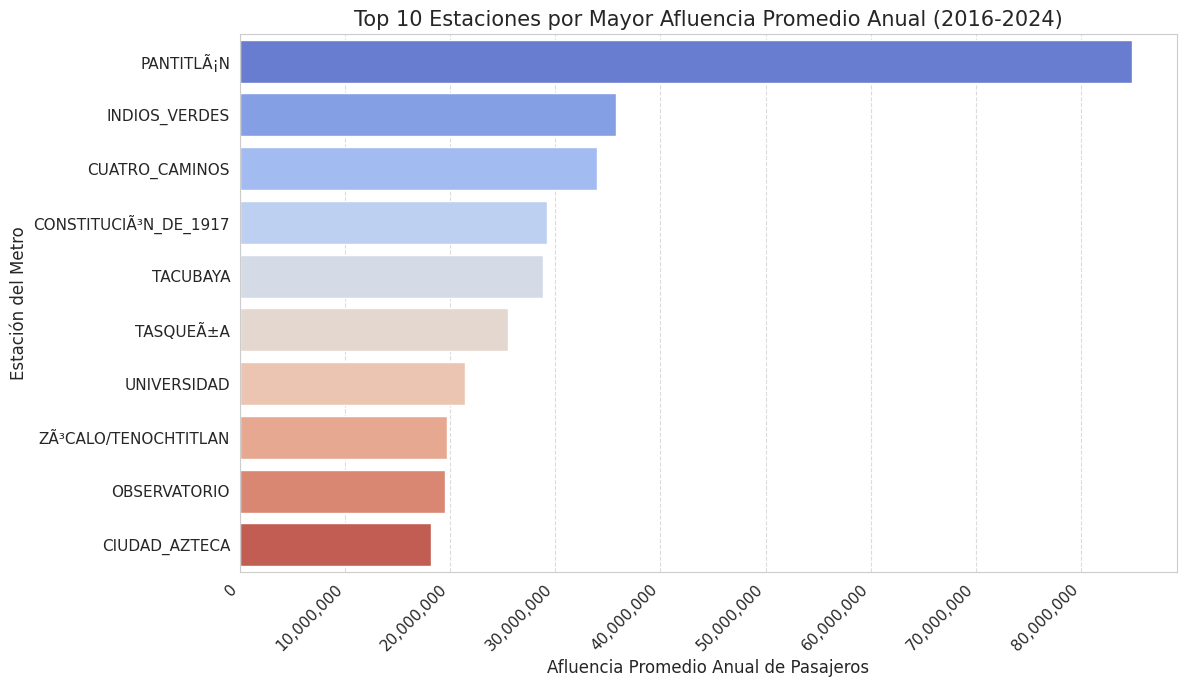

In [27]:
# CELDA: Análisis de Afluencia - Top Estaciones por Afluencia Promedio

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os

print("\n--- Identificando Estaciones del Metro con Mayor Afluencia ---")

# Requisitos: df_afluencia_por_estacion_anio debe existir y contener
# 'estacion_clean' (nombre limpio de la estación) y 'afluencia_anual'.

if 'df_afluencia_por_estacion_anio' not in locals() or df_afluencia_por_estacion_anio.empty:
    print("Error: DataFrame 'df_afluencia_por_estacion_anio' no encontrado o vacío.")
    print("Asegúrate de que la celda 6.4.1 (donde se procesa la afluencia para las tasas) se haya ejecutado.")
else:
    # 1. Calcular la afluencia promedio anual para cada estación
    # (Si una estación tiene datos de varios años, esto promedia su afluencia anual a lo largo de esos años)
    print("\n1. Calculando afluencia promedio anual por estación...")
    afluencia_promedio_estacion = df_afluencia_por_estacion_anio.groupby(
        'estacion_clean' # Usar el nombre limpio de la estación
    )['afluencia_anual'].mean().reset_index(name='afluencia_promedio_anual')

    # Ordenar por afluencia promedio descendente
    top_estaciones_afluencia = afluencia_promedio_estacion.sort_values(
        by='afluencia_promedio_anual', ascending=False
    )

    # 2. Mostrar la tabla de las Top N estaciones por afluencia
    N_DISPLAY_AFLUENCIA_TABLE = 15 # Cuántas mostrar en la tabla
    print(f"\nTop {N_DISPLAY_AFLUENCIA_TABLE} Estaciones con Mayor Afluencia Promedio Anual:")
    # Formatear el número para mejor legibilidad
    top_estaciones_afluencia_display = top_estaciones_afluencia.head(N_DISPLAY_AFLUENCIA_TABLE).copy()
    top_estaciones_afluencia_display['afluencia_promedio_anual_str'] = top_estaciones_afluencia_display['afluencia_promedio_anual'].apply(lambda x: f"{x:,.0f}")
    display(top_estaciones_afluencia_display[['estacion_clean', 'afluencia_promedio_anual_str']].rename(columns={'estacion_clean':'Estación', 'afluencia_promedio_anual_str':'Afluencia Promedio Anual'}))

    # 3. Visualización de las Top N Estaciones por Afluencia Promedio Anual
    N_DISPLAY_AFLUENCIA_GRAPH = 10 # Cuántas mostrar en el gráfico
    top_N_df_afluencia = top_estaciones_afluencia.head(N_DISPLAY_AFLUENCIA_GRAPH)

    if not top_N_df_afluencia.empty:
        plt.figure(figsize=(12, 7))
        sns.barplot(x='afluencia_promedio_anual', y='estacion_clean', data=top_N_df_afluencia, palette='coolwarm')
        plt.title(f'Top {N_DISPLAY_AFLUENCIA_GRAPH} Estaciones por Mayor Afluencia Promedio Anual {period_title_desc}', fontsize=15) # period_title_desc de celda 6.4
        plt.xlabel('Afluencia Promedio Anual de Pasajeros', fontsize=12)
        plt.ylabel('Estación del Metro', fontsize=12)
        # Formatear el eje X para que muestre números con comas
        ax = plt.gca()
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Guardar
        try:
            if 'SAVE_PATH_BASE' in locals() and os.path.exists(SAVE_PATH_BASE):
                afluencia_filename = os.path.join(SAVE_PATH_BASE, f'top_{N_DISPLAY_AFLUENCIA_GRAPH}_estaciones_afluencia.png')
                plt.savefig(afluencia_filename, transparent=True, dpi=300, bbox_inches='tight')
                print(f"  Gráfica de Top {N_DISPLAY_AFLUENCIA_GRAPH} estaciones por afluencia guardada.")
            else:
                print("  Advertencia: SAVE_PATH_BASE no definida, no se pudo guardar gráfica de afluencia.")
        except Exception as e_save_afluencia: print(f"  Error al guardar gráfica de afluencia: {e_save_afluencia}")
        plt.show()
    else:
        print("No hay datos suficientes para graficar el top de estaciones por afluencia.")

### 6.5. Identificación de Estaciones con Mayor Riesgo Relativo (Tasa de Robo)

Para fundamentar nuestras recomendaciones de intervención, es crucial identificar no solo dónde ocurren más robos en términos absolutos, sino también qué estaciones presentan un mayor **riesgo relativo** para los pasajeros, normalizando por la afluencia. Calcularemos la tasa de robo anual por cada 100,000 pasajeros para cada estación y presentaremos las más destacadas.


--- 6.5. Identificando Estaciones con Mayor Riesgo Relativo (Tasa de Robo) ---

1. Calculando tasa de robo promedio por estación (todos los años disponibles)...

Top 15 Estaciones con Mayor Tasa de Robo Promedio (por 100k pasajeros):


nombre_estacion_clean  tasa_robo_promedio  robos_totales_periodo  \
61                HIDALGO            0.876820                 2376.0   
59               GUERRERO            0.704647                  692.0   
11               BALDERAS            0.620502                 1070.0   
25              CHABACANO            0.462359                 1782.0   
13           BELLAS_ARTES            0.303724                  954.0   
159                ZAPATA            0.268677                  578.0   
136                TACUBA            0.254475                  612.0   
145             TLALTENCO            0.253722                    8.0   
29       CIUDAD_DEPORTIVA            0.233826                   33.0   
60               HANGARES            0.231584                   17.0   
49                 ERMITA            0.214735                  330.0   
137              TACUBAYA            0.209116                 1626.0   
55    GARIBALDI/LAGUNILLA            0.201628                  304.0   
89                MIXCOAC            0.190371                  432.0   
124        SALTO_DEL_AGUA            0.187715                  390.0   

     anios_con_datos  
61                 9  
59                 9  
11                 9  
25                 9  
13                 9  
159                9  
136                9  
145                4  
29                 7  
60                 5  
49                 9  
137                9  
55                 9  
89                 9  
124                9

<ipython-input-28-8e2a5183056f>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tasa_robo_promedio', y='nombre_estacion_clean', data=top_N_df_tasa, palette='viridis')


  Gráfica de Top 10 estaciones por tasa de robo guardada.


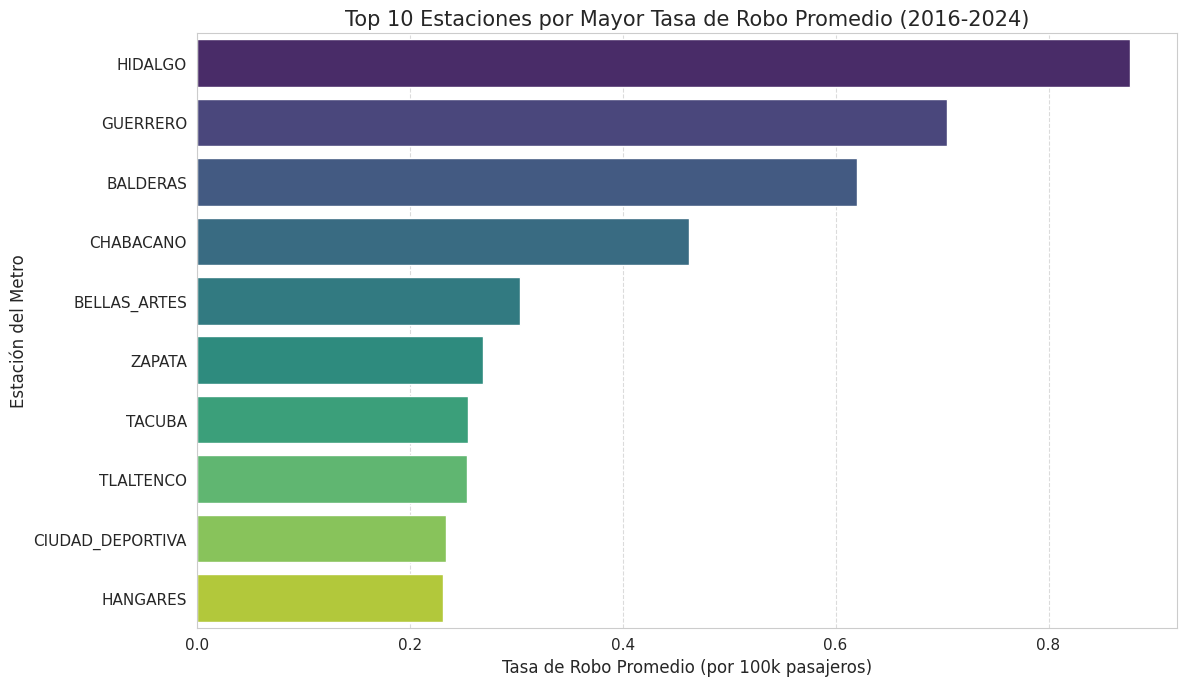


Las dos estaciones con la tasa de robo promedio más alta son: HIDALGO y GUERRERO


In [28]:
# CELDA: Análisis de Tasas de Robo por Estación (Top N y Tabla)

import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt # Para un gráfico de barras simple de las top
import seaborn as sns

print("\n--- 6.5. Identificando Estaciones con Mayor Riesgo Relativo (Tasa de Robo) ---")

# Requisitos:
# - gdf_tasas_estacion_anio debe existir de la celda 6.4 y tener 'nombre_estacion_clean', 'anio', 'tasa_robo'.
# - ANIO_ANALISIS (ej. 2020) o un rango de años para promediar.

if 'gdf_tasas_estacion_anio' not in locals() or gdf_tasas_estacion_anio.empty:
    print("Error: gdf_tasas_estacion_anio no encontrado o vacío. No se puede realizar este análisis.")
else:
    # Si queremos un promedio de tasas de los últimos años (ej. 2020-2023) para mayor estabilidad
    # O podemos enfocarnos en el último año completo disponible.
    # Para este ejemplo, tomaremos el promedio de todos los años disponibles para cada estación.

    print("\n1. Calculando tasa de robo promedio por estación (todos los años disponibles)...")
    # Agrupar por estación y calcular la tasa promedio y el total de robos acumulado
    # Asegurarse de que tasa_robo es numérica y no tiene infinitos si la afluencia fue cero
    gdf_tasas_estacion_anio['tasa_robo_numeric'] = pd.to_numeric(gdf_tasas_estacion_anio['tasa_robo'], errors='coerce')
    # Reemplazar infinitos (si la afluencia fue 0 y robos > 0) con NaN para que no afecten la media, o con un valor alto capado.
    # O, si ya se manejó en la creación de tasa_robo (asignando NaN), está bien.
    gdf_tasas_estacion_anio.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Agrupar por estación para obtener la tasa promedio y el total de robos
    # y también el número de años con datos para esa estación
    estacion_stats = gdf_tasas_estacion_anio.groupby('nombre_estacion_clean').agg(
        tasa_robo_promedio=('tasa_robo_numeric', 'mean'), # Promedio de las tasas anuales
        robos_totales_periodo=('numero_robos', 'sum'),    # Suma de robos en el periodo
        anios_con_datos=('anio', 'nunique')              # Cuántos años tienen datos para esa estación
    ).reset_index()

    # Filtrar estaciones con pocos años de datos si es necesario (para rankings más estables)
    # estacion_stats = estacion_stats[estacion_stats['anios_con_datos'] >= 3] # Ejemplo

    # Ordenar por tasa de robo promedio descendente
    top_estaciones_por_tasa = estacion_stats.sort_values(by='tasa_robo_promedio', ascending=False)

    print("\nTop 15 Estaciones con Mayor Tasa de Robo Promedio (por 100k pasajeros):")
    display(top_estaciones_por_tasa.head(15))

    # --- Visualización de las Top N Estaciones por Tasa de Robo Promedio ---
    N_DISPLAY_TASA = 10 # Cuántas mostrar en el gráfico
    top_N_df_tasa = top_estaciones_por_tasa.head(N_DISPLAY_TASA)

    if not top_N_df_tasa.empty:
        plt.figure(figsize=(12, 7))
        sns.barplot(x='tasa_robo_promedio', y='nombre_estacion_clean', data=top_N_df_tasa, palette='viridis')
        plt.title(f'Top {N_DISPLAY_TASA} Estaciones por Mayor Tasa de Robo Promedio {period_title_desc}', fontsize=15) # period_title_desc de la celda anterior
        plt.xlabel('Tasa de Robo Promedio (por 100k pasajeros)', fontsize=12)
        plt.ylabel('Estación del Metro', fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        # Guardar
        try:
            tasa_filename = os.path.join(SAVE_PATH_BASE, f'top_{N_DISPLAY_TASA}_estaciones_tasa_robo.png')
            plt.savefig(tasa_filename, transparent=True, dpi=300, bbox_inches='tight')
            print(f"  Gráfica de Top {N_DISPLAY_TASA} estaciones por tasa de robo guardada.")
        except Exception as e_save_tasa: print(f"  Error al guardar gráfica de tasa: {e_save_tasa}")
        plt.show()
    else:
        print("No hay datos suficientes para graficar el top de estaciones por tasa de robo.")

    # --- Para el Bump Chart que ya hiciste ---
    # El Bump Chart ya usa gdf_tasas_estacion_anio y calcula rankings anuales.
    # Solo asegúrate de que la variable N_TOP_STATIONS_BUMP sea 7 o 10 para que sea legible.
    # Puedes mencionar algunas de las estaciones que consistentemente están altas en el Bump Chart.

    # --- Identificar las dos estaciones más consistentemente riesgosas (para tu ejemplo) ---
    # Podemos usar la salida del Bump Chart o top_stations_by_avg_rank que se calculó allí.
    # O, si quieres las dos con la tasa promedio más alta:
    if len(top_estaciones_por_tasa) >= 2:
        estacion1_riesgo = top_estaciones_por_tasa.iloc[0]['nombre_estacion_clean']
        estacion2_riesgo = top_estaciones_por_tasa.iloc[1]['nombre_estacion_clean']
        print(f"\nLas dos estaciones con la tasa de robo promedio más alta son: {estacion1_riesgo} y {estacion2_riesgo}")
        # Para tu ejemplo de solución, podrías mencionar estas.
    else:
        print("\nNo hay suficientes estaciones para determinar las dos más riesgosas por tasa promedio.")

In [29]:
# CELDA: Generación de GIF Animado de Mapas Anuales de Tasa de Robo

import imageio.v2 as imageio # Librería para crear GIFs
import os

print("\n--- 6.4.2. Generando GIF Animado de Mapas Anuales de Tasa de Robo ---")

# Asegúrate de que SAVE_PATH_BASE está definido y es donde se guardaron los PNGs de los mapas
if 'SAVE_PATH_BASE' not in locals() or not os.path.exists(SAVE_PATH_BASE):
    print("Error: SAVE_PATH_BASE no definida o no existe. No se pueden encontrar los mapas PNG.")
else:
    # 1. Obtener la lista de todos los archivos PNG de mapas de TASA generados
    # Los nombres de los archivos deben ser consistentes (ej. 'mapa_tasa_robo_metro_estacion_2016.png')
    map_files_tasa = []
    # Reutilizamos años_presentes_tasas de la celda anterior para asegurar consistencia
    if 'años_presentes_tasas' in locals() and años_presentes_tasas:
        años_a_usar = años_presentes_tasas
    elif 'gdf_tasas_estacion_anio' in locals() and not gdf_tasas_estacion_anio.empty:
        años_a_usar = sorted(gdf_tasas_estacion_anio['anio'].unique().astype(int))
    else:
        print("Error: No se pudo determinar la lista de años para el GIF de tasas.")
        años_a_usar = []

    for anio in años_a_usar:
        # ¡AJUSTA ESTE NOMBRE DE ARCHIVO PARA QUE COINCIDA CON EL DE TUS MAPAS DE TASA!
        # Ejemplo: 'mapa_tasa_robo_metro_estacion_2016.png'
        filename = f'mapa_tasa_robo_metro_estacion_{int(anio)}.png' # Nombre del archivo PNG de mapa de TASA
        filepath = os.path.join(SAVE_PATH_BASE, filename)
        if os.path.exists(filepath):
            map_files_tasa.append(filepath)
        else:
            print(f"Advertencia: Archivo {filename} no encontrado en {SAVE_PATH_BASE}. Se omitirá del GIF.")

    if not map_files_tasa:
        print("No se encontraron archivos de mapas PNG de tasa para crear el GIF.")
    else:
        # 2. Ordenar los archivos para asegurar que el GIF vaya cronológicamente
        map_files_tasa.sort()

        # 3. Leer las imágenes
        images_tasa = []
        for filename in map_files_tasa:
            images_tasa.append(imageio.imread(filename))

        # 4. Crear el GIF
        gif_filename_tasa = os.path.join(SAVE_PATH_BASE, 'evolucion_tasa_robo_metro_estacion_anual.gif')

        # `duration` es la duración de cada frame en milisegundos. 750ms = 0.75 segundos
        imageio.mimsave(gif_filename_tasa, images_tasa, duration=750, loop=0) # loop=0 significa bucle infinito

        print(f"\nGIF animado de TASA de robo guardado en: {gif_filename_tasa}")
        print("¡El GIF de tasas se ha generado exitosamente!")
        # Para ver el GIF en Colab, a veces es necesario recargar el panel de archivos.
        # from IPython.display import Image
        # Image(gif_filename_tasa) # Esto lo muestra en el notebook



--- 6.4.2. Generando GIF Animado de Mapas Anuales de Tasa de Robo ---

GIF animado de TASA de robo guardado en: /content/drive/MyDrive/PP_Robo_Metro_CDMX/Visualizaciones/evolucion_tasa_robo_metro_estacion_anual.gif
¡El GIF de tasas se ha generado exitosamente!


---
### 6.5. Evolución del Riesgo: Bump Chart de Tasa de Robo por Estación

Más allá de ver el número absoluto de robos, entender la **tasa de robo por pasajero** nos revela el riesgo real de cada estación. Pero este riesgo no es estático: puede evolucionar año tras año. Un **Bump Chart** es una visualización ideal para mostrar cómo el ranking de peligrosidad de las estaciones ha cambiado a lo largo del tiempo.

En esta sección, generaremos un Bump Chart que ilustrará la evolución del ranking de la **tasa de robo por cada 100,000 (o 1,000,000) pasajeros** para las Top N estaciones más relevantes del Metro a lo largo del periodo de análisis. Esto nos permitirá identificar estaciones emergentes en riesgo o aquellas que han mejorado significativamente.

**Metodología:**
1.  Utilizaremos el GeoDataFrame `gdf_tasas_estacion_anio` que contiene la tasa de robo anual por estación.
2.  Para cada año, calcularemos el ranking de las estaciones basado en su tasa de robo.
3.  Seleccionaremos las Top N estaciones (ej. las 10 o 15 que han aparecido más frecuentemente en los rankings altos).
4.  Generaremos el Bump Chart, mostrando cómo sus posiciones en el ranking han fluctuado a lo largo de los años.


--- 6.5.1. Generando Bump Chart de Tasa de Robo por Estación ---

1. Calculando rankings anuales por estación...

Primeras filas del DataFrame de ranking crudo:


nombre_estacion_clean    anio  ranking  tasa_robo
163               HIDALGO  2016.0      1.0   0.736427
316               HIDALGO  2016.0      1.0   0.736427
56               BALDERAS  2016.0      3.0   0.475917
326              BALDERAS  2016.0      3.0   0.475917
307              GUERRERO  2016.0      5.0   0.241998


DataFrame final para Bump Chart (5 estaciones seleccionadas):


anio  Estacion  Ranking
0  2016.0  BALDERAS      3.0
1  2017.0  BALDERAS      3.0
2  2018.0  BALDERAS      5.0
3  2019.0  BALDERAS      5.0
4  2020.0  BALDERAS      3.0

<ipython-input-30-1d57cbfd2d2c>:66: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Dark2', len(df_bump_chart_final_for_plot['Estacion'].unique())) # 'Dark2' o 'tab10' son buenas para legibilidad


  Bump Chart de tasa de robo guardado en: /content/drive/MyDrive/PP_Robo_Metro_CDMX/Visualizaciones/bump_chart_tasa_robo_estaciones_top5_legible.png


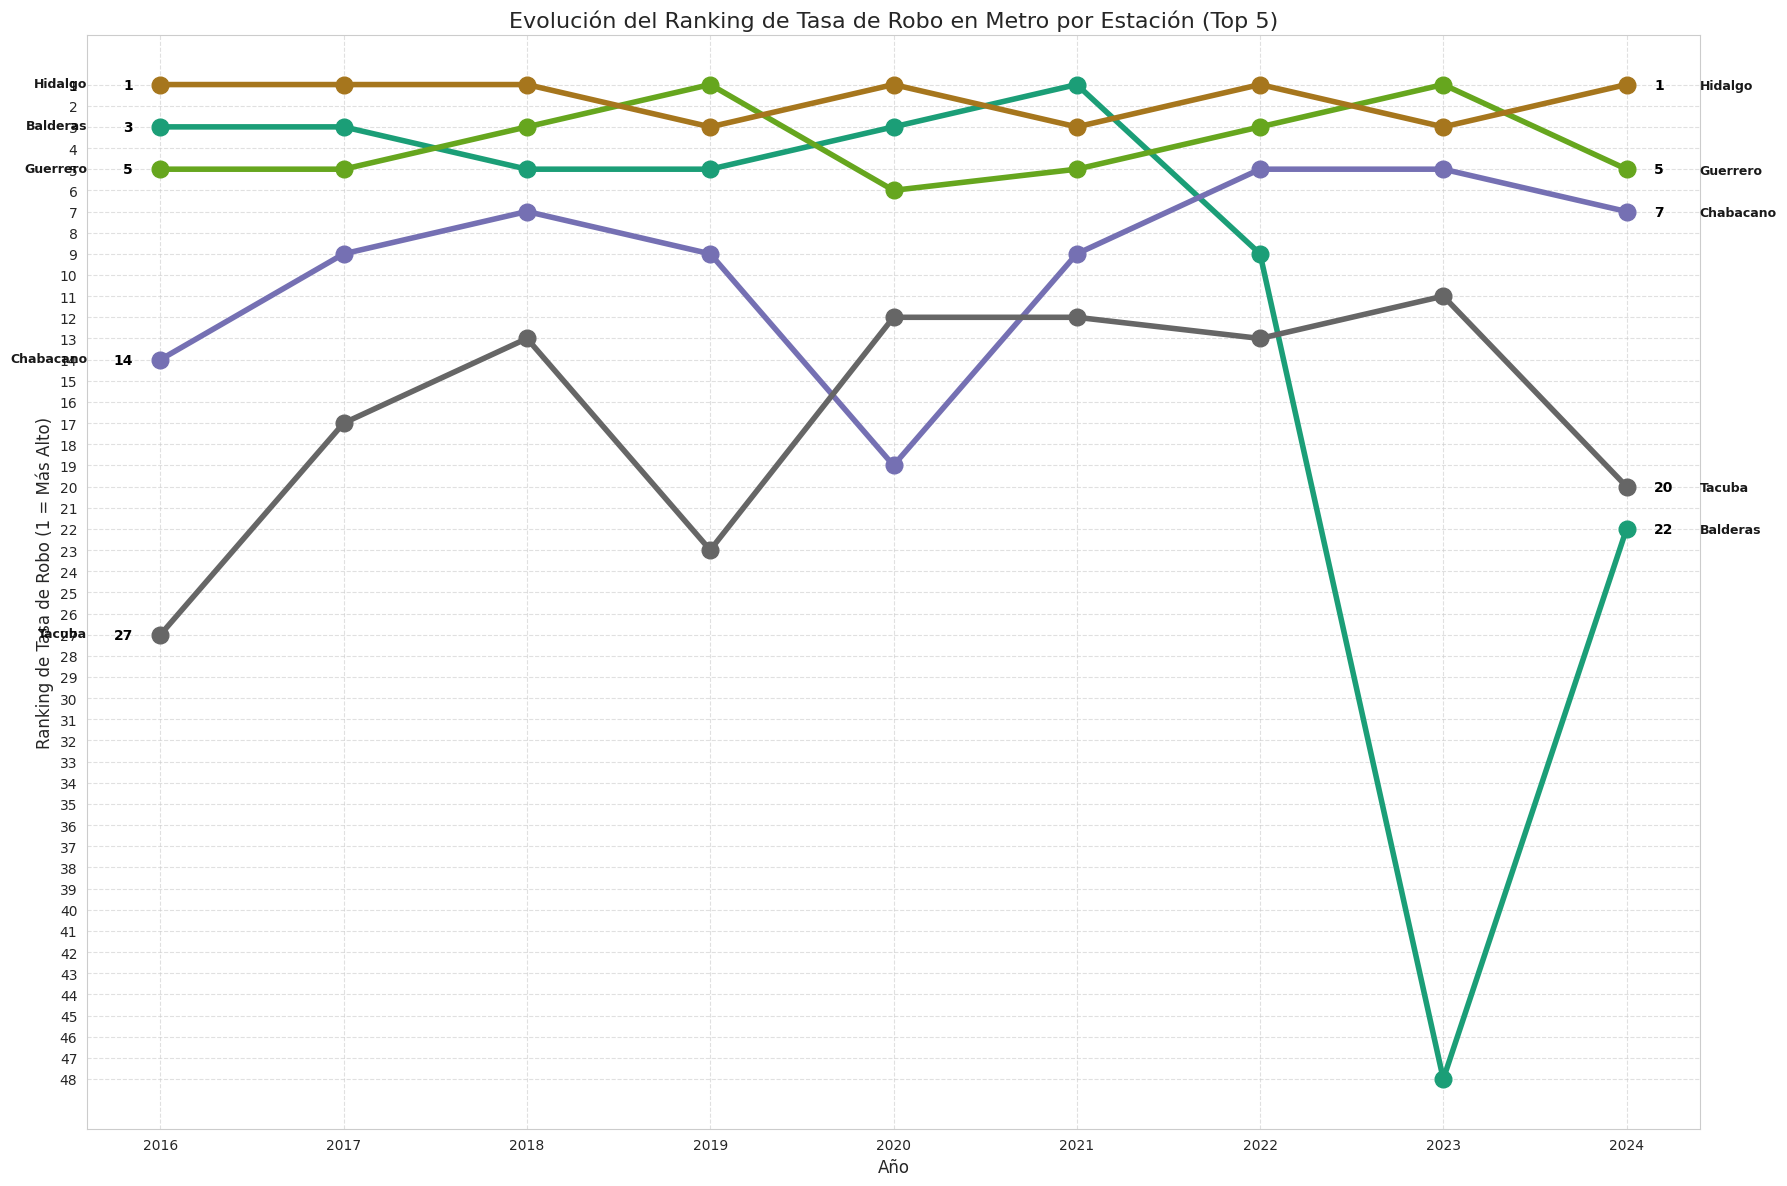

In [30]:
# CELDA: Generación de Bump Chart de Tasa de Robo por Estación (Versión LEGIBLE Y CONSISTENTE)

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np
import os
from IPython.display import display

print("\n--- 6.5.1. Generando Bump Chart de Tasa de Robo por Estación ---")

if 'gdf_tasas_estacion_anio' not in locals() or gdf_tasas_estacion_anio.empty:
    print("Error: gdf_tasas_estacion_anio no encontrado o vacío. No se puede generar el Bump Chart.")
else:
    # 1. Preparar los datos: Calcular ranking anual por estación
    print("\n1. Calculando rankings anuales por estación...")
    df_ranking_base = gdf_tasas_estacion_anio[gdf_tasas_estacion_anio['tasa_robo'] > 0].copy()
    df_ranking_base = df_ranking_base.sort_values(by=['anio', 'tasa_robo'], ascending=[True, False])
    df_ranking_base['ranking'] = df_ranking_base.groupby('anio')['tasa_robo'].rank(method='min', ascending=False)
    df_bump_chart_raw = df_ranking_base[['nombre_estacion_clean', 'anio', 'ranking', 'tasa_robo']].copy() # Renombrado para claridad

    print("\nPrimeras filas del DataFrame de ranking crudo:")
    display(df_bump_chart_raw.head())

    # 2. Identificar las Top N estaciones para el Bump Chart (AJUSTE CLAVE DE CONSISTENCIA)
    N_TOP_STATIONS_TO_PLOT = 5 # <<--- DEFINIMOS AQUÍ EL NÚMERO FINAL A PLOTEAR (ej. 7 o 10)

    # Obtener el conteo de cuántas veces cada estación aparece en el TOP (hasta un ranking X) en cualquier año
    # Podríamos usar N_TOP_STATIONS_TO_PLOT * 2 como un umbral más amplio para considerar si una estación es "relevante"
    # O, más simple, tomar las top N estaciones con el MENOR RANKING PROMEDIO a lo largo del tiempo

    # Estrategia: Tomar las N_TOP_STATIONS_TO_PLOT estaciones que tienen el mejor ranking promedio a lo largo de los años
    avg_rank_per_station = df_bump_chart_raw.groupby('nombre_estacion_clean')['ranking'].mean().sort_values()
    top_stations_by_avg_rank = avg_rank_per_station.head(N_TOP_STATIONS_TO_PLOT).index.tolist()

    if not top_stations_by_avg_rank:
        print(f"No se pudieron identificar {N_TOP_STATIONS_TO_PLOT} estaciones por ranking promedio. El Bump Chart estará vacío.")
        df_bump_chart_final_for_plot = pd.DataFrame()
    else:
        # Filtrar el DataFrame de ranking para incluir solo estas N_TOP_STATIONS_TO_PLOT estaciones
        df_bump_chart_filtered_for_plot = df_bump_chart_raw[df_bump_chart_raw['nombre_estacion_clean'].isin(top_stations_by_avg_rank)].copy()

        # --- CONSOLIDACIÓN DE DUPLICADOS (CÓDIGO QUE YA FUNCIONABA) ---
        duplicate_rows = df_bump_chart_filtered_for_plot[df_bump_chart_filtered_for_plot.duplicated(subset=['anio', 'nombre_estacion_clean'], keep=False)]
        if not duplicate_rows.empty:
            df_bump_chart_consolidated = df_bump_chart_filtered_for_plot.groupby(['anio', 'nombre_estacion_clean']).agg(
                ranking=('ranking', 'min'), tasa_robo=('tasa_robo', 'mean')
            ).reset_index()
        else:
            df_bump_chart_consolidated = df_bump_chart_filtered_for_plot.copy()

        # --- PREPARACIÓN FINAL PARA EL BUMP CHART (con Consolidación) ---
        df_bump_chart_pivot = df_bump_chart_consolidated.pivot(index='anio', columns='nombre_estacion_clean', values='ranking')
        df_bump_chart_final_for_plot = df_bump_chart_pivot.reset_index().melt(id_vars='anio', var_name='Estacion', value_name='Ranking')
        df_bump_chart_final_for_plot.dropna(subset=['Ranking'], inplace=True)

        print(f"\nDataFrame final para Bump Chart ({len(top_stations_by_avg_rank)} estaciones seleccionadas):")
        display(df_bump_chart_final_for_plot.head())


    # 3. Crear el Bump Chart
    if not df_bump_chart_final_for_plot.empty:
        fig_bump, ax_bump = plt.subplots(figsize=(18, 12)) # Tamaño de figura ya aumentado

        # Definir una paleta de colores para las líneas (mejor contraste)
        colors = plt.cm.get_cmap('Dark2', len(df_bump_chart_final_for_plot['Estacion'].unique())) # 'Dark2' o 'tab10' son buenas para legibilidad

        # Plotear cada estación
        for i, station_name in enumerate(df_bump_chart_final_for_plot['Estacion'].unique()):
            df_station = df_bump_chart_final_for_plot[df_bump_chart_final_for_plot['Estacion'] == station_name].sort_values('anio')

            ax_bump.plot(df_station['anio'], df_station['Ranking'], marker='o',
                         color=colors(i),
                         linewidth=4, markersize=12, alpha=1.0) # <<-- LÍNEAS MÁS GRUESAS Y MENOS TRANSPARENTES

            # Añadir etiqueta de ranking al inicio y al final de la línea
            first_point = df_station.iloc[0]
            ax_bump.text(first_point['anio'] - 0.15, first_point['Ranking'], # <<-- AJUSTE DE POSICIÓN X
                         f"{int(first_point['Ranking'])}",
                         fontsize=10, ha='right', va='center', color='black', fontweight='bold') # <<-- TEXTO NEGRO Y NEGRITA

            last_point = df_station.iloc[-1]
            ax_bump.text(last_point['anio'] + 0.15, last_point['Ranking'], # <<-- AJUSTE DE POSICIÓN X
                         f"{int(last_point['Ranking'])}",
                         fontsize=10, ha='left', va='center', color='black', fontweight='bold') # <<-- TEXTO NEGRO Y NEGRITA

            # Añadir el nombre de la estación al inicio y al final de la línea (AJUSTADO PARA VISIBILIDAD)
            ax_bump.text(first_point['anio'] - 0.4, first_point['Ranking'] - 0.05, # <<-- AJUSTE DE POSICIÓN X e Y
                         f"{station_name.replace('_', ' ').title()}",
                         fontsize=9, ha='right', va='center', color='black', alpha=0.9, fontweight='bold')

            ax_bump.text(last_point['anio'] + 0.4, last_point['Ranking'] + 0.05, # <<-- AJUSTE DE POSICIÓN X e Y
                         f"{station_name.replace('_', ' ').title()}",
                         fontsize=9, ha='left', va='center', color='black', alpha=0.9, fontweight='bold')


        ax_bump.set_title(f'Evolución del Ranking de Tasa de Robo en Metro por Estación (Top {N_TOP_STATIONS_TO_PLOT})', fontsize=16)
        ax_bump.set_xlabel('Año', fontsize=12)
        ax_bump.set_ylabel('Ranking de Tasa de Robo (1 = Más Alto)', fontsize=12)

        ax_bump.invert_yaxis()

        max_ranking = df_bump_chart_final_for_plot['Ranking'].max()
        ax_bump.set_yticks(range(1, int(max_ranking) + 1))
        ax_bump.tick_params(axis='x', labelsize=10)
        ax_bump.tick_params(axis='y', labelsize=10)

        ax_bump.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout(rect=[0, 0, 1, 1]) # Asegurar que el layout se ajuste bien

        # Guardar la gráfica
        try:
            bump_filename = os.path.join(SAVE_PATH_BASE, f'bump_chart_tasa_robo_estaciones_top{N_TOP_STATIONS_TO_PLOT}_legible.png')
            plt.savefig(bump_filename, transparent=True, dpi=300, bbox_inches='tight')
            print(f"  Bump Chart de tasa de robo guardado en: {bump_filename}")
        except Exception as e_save_bump: print(f"  Error al guardar Bump Chart: {e_save_bump}")
        plt.show()

    else:
        print(f"No se pudieron identificar suficientes estaciones para el Bump Chart (Top {N_TOP_STATIONS_TO_PLOT}).")

---
## 6.6. La Dimensión Socioeconómica del Robo: Preparación de Datos para el Análisis Espacial

Hemos explorado los robos desde una perspectiva temporal y espacial, identificando sus patrones y la evolución de su riesgo relativo. Sin embargo, para entender las **causas subyacentes** del delito, es fundamental conectar los fenómenos delictivos con el contexto socioeconómico.

En nuestras discusiones previas, surgió una hipótesis clave: **¿la desigualdad social tiene un vínculo más fuerte con el crimen que la pobreza o el rezago absoluto?** Esta idea, inspirada en la literatura y en visiones críticas sobre la delincuencia, sugiere que la brecha entre quienes tienen mucho y quienes tienen poco puede generar tensiones e incentivos para ciertos tipos de delitos, como el robo.

Habiendo asignado los robos en el Metro a sus estaciones más cercanas y, por extensión, a las alcaldías donde estas se ubican, el siguiente paso es integrar los indicadores socioeconómicos clave para explorar nuestra hipótesis sobre la relación entre desigualdad, rezago social y la incidencia delictiva.

En esta sección, utilizaremos el análisis de **LISA Bivariado (Local Indicators of Spatial Association)** para explorar si existe una correlación espacial entre:
1.  **La incidencia de robos en las estaciones del Metro.**
2.  **Indicadores de desigualdad social (Gini o un proxy) en las alcaldías de la CDMX.**
3.  **Indicadores de pobreza o rezago social (IRS) en las alcaldías de la CDMX.**


Nos enfocaremos en un **análisis transversal (cross-sectional) para el año 2020**. Para este año, hemos logrado obtener:
1.  El **Coeficiente de Gini** a nivel municipal (Alcaldía), un indicador clave de la desigualdad en la distribución del ingreso.
2.  El **Índice de Rezago Social (IRS)** a nivel municipal (Alcaldía) de CONEVAL, que mide carencias en educación, salud, vivienda y servicios básicos.
3.  El conteo de **robos en estaciones del Metro** por alcaldía para el año 2020.

**Metodología:**

1.  Consolidaremos los datos de robos en Metro por alcaldía para el año 2020.
2.  Obtendremos los indicadores de desigualdad (Gini o proxy) y de rezago social (IRS) para las alcaldías en 2020.
3.  Calcularemos coeficientes de correlación y generaremos mapas coropléticos para una primera inspección visual.
4.  Construiremos una matriz de pesos espaciales (`W`) para las alcaldías.
5.  Aplicaremos el análisis LISA Bivariado para identificar clústeres espaciales donde la alta incidencia de robos se co-localiza con alta desigualdad o rezago.


El objetivo de esta sección es crear un GeoDataFrame final a nivel de Alcaldía que contenga la geometría de cada alcaldía junto con estas tres variables. Este será el insumo principal para nuestros análisis de correlación y, más importante, para el análisis de LISA Bivariado, donde buscaremos patrones de co-localización espacial.

**Fuentes de Datos Clave para esta Sección:**
*   `GiniMunicipios2010_2015_2020.xlsx`: Coeficiente de Gini municipal.
*   `IRS_ent_mun_2000_2020.csv` (o similar de F1-67): Índice de Rezago Social municipal.
*   `df_robos_asignados_estaciones`: Nuestro DataFrame con robos asignados a estaciones y sus alcaldías.
*   `gdf_alcaldias_cdmx`: Nuestro GeoDataFrame con las geometrías de las alcaldías.

In [31]:
# CELDA: Preparación de Datos para LISA Bivariado (Alcaldías, Año 2020) - USANDO IRS DE LOCALIDADES (XLSX)

import pandas as pd
import geopandas as gpd
import os
import numpy as np
from IPython.display import display

print("\n--- 6.6.1. Preparación de Datos para LISA Bivariado (Alcaldías, Año 2020) ---")

ANIO_ANALISIS = 2020
df_gini_2020 = None
df_irs_2020_municipal_agg = None # Cambiado de df_irs_2020_municipal para claridad
gdf_analisis_lisa = None

# Función para limpiar nombres de alcaldía
REPLACEMENTS_ALCALDIAS = {'LA_MAGDALENA_CONTRERAS': 'MAGDALENA_CONTRERAS',
                          'GUSTAVO_A._MADERO': 'GUSTAVO_A_MADERO'}
def limpiar_nombre_alcaldia(series_alcaldia, replacements_dict):
    alcaldia_clean = series_alcaldia.astype(str).str.upper().str.strip() \
                        .str.replace('Á', 'A').str.replace('É', 'E') \
                        .str.replace('Í', 'I').str.replace('Ó', 'O') \
                        .str.replace('Ú', 'U')
    for old, new in replacements_dict.items():
        alcaldia_clean = alcaldia_clean.str.replace(old, new, regex=False)
    alcaldia_clean = alcaldia_clean.str.replace(' ', '_')
    return alcaldia_clean

# --- PASO 0: Verificar DataFrame de Robos Asignados ---
# ... (Este bloque se mantiene igual al anterior) ...
if 'df_robos_asignados_estaciones' not in locals() or df_robos_asignados_estaciones.empty:
    print("Error CRÍTICO: df_robos_asignados_estaciones no encontrado o vacío.")
    robos_por_alcaldia_2020 = pd.DataFrame(columns=['alcaldia', f'robos_metro_{ANIO_ANALISIS}'])
else:
    print(f"\n1. Consolidando robos en Metro por Alcaldía para el año {ANIO_ANALISIS}...")
    if not all(col in df_robos_asignados_estaciones.columns for col in ['alcaldia', 'fecha_hora_hecho', 'transport_mode']):
        print("  Error: 'df_robos_asignados_estaciones' no tiene columnas 'alcaldia', 'fecha_hora_hecho' o 'transport_mode'.")
        robos_por_alcaldia_2020 = pd.DataFrame(columns=['alcaldia', f'robos_metro_{ANIO_ANALISIS}'])
    else:
        df_metro_robos_anio_actual = df_robos_asignados_estaciones[(df_robos_asignados_estaciones['transport_mode'] == 'Metro') & (df_robos_asignados_estaciones['fecha_hora_hecho'].dt.year == ANIO_ANALISIS)].copy()
        if df_metro_robos_anio_actual.empty:
            print(f"  No se encontraron robos de Metro asignados para el año {ANIO_ANALISIS}.")
            rob_por_alc_data = {'alcaldia': [], f'robos_metro_{ANIO_ANALISIS}': []}
            if 'gdf_alcaldias_cdmx' in locals() and gdf_alcaldias_cdmx is not None:
                 alcaldias_unicas_shp = limpiar_nombre_alcaldia(gdf_alcaldias_cdmx.get('NOMGEO', pd.Series(dtype=str)), REPLACEMENTS_ALCALDIAS).unique() # Asume NOMGEO, ajusta si es necesario
                 for alc_name in alcaldias_unicas_shp:
                     rob_por_alc_data['alcaldia'].append(alc_name)
                     rob_por_alc_data[f'robos_metro_{ANIO_ANALISIS}'].append(0)
            robos_por_alcaldia_2020 = pd.DataFrame(rob_por_alc_data)
        else:
            robos_por_alcaldia_2020 = df_metro_robos_anio_actual.groupby('alcaldia').size().reset_index(name=f'robos_metro_{ANIO_ANALISIS}')

        if not robos_por_alcaldia_2020.empty:
             print(f"  Robos de Metro en {ANIO_ANALISIS} por Alcaldía procesados.")
             display(robos_por_alcaldia_2020.head())
        else:
             print(f"  DataFrame robos_por_alcaldia_2020 está vacío después de intentar poblarlo.")


# --- PASO 2: Cargar y Procesar Coeficiente de Gini Municipal 2020 ---
print(f"\n2. Cargando Coeficiente de Gini Municipal para {ANIO_ANALISIS} desde Excel...")
GINI_EXCEL_PATH = '/content/drive/MyDrive/PP_Robo_Metro_CDMX/Nootebooks/datos_brutos/GiniMunicipios2010_2015_2020.xlsx'
SHEET_NAME_GINI = str(ANIO_ANALISIS)
df_gini_2020 = None # Reinicializar para este bloque

try:
    df_gini_raw = pd.read_excel(GINI_EXCEL_PATH, sheet_name=SHEET_NAME_GINI, skiprows=7) # Omitir 7 filas de encabezado
    print(f"  Archivo Excel de Gini (hoja {SHEET_NAME_GINI}) cargado. Columnas: {df_gini_raw.columns.tolist()}")

    COL_CVE_ENT_GINI = 'Clave de entidad'; COL_NOM_MUN_GINI = 'Municipio'; COL_VALOR_GINI = 'Coeficiente de Gini'
    CDMX_CVE_ENT_GINI_STR = '09'

    required_gini_cols = [COL_CVE_ENT_GINI, COL_NOM_MUN_GINI, COL_VALOR_GINI]
    if not all(col in df_gini_raw.columns for col in required_gini_cols):
        raise ValueError(f"Columnas Gini faltantes: {[col for col in required_gini_cols if col not in df_gini_raw.columns]}")

    df_gini_raw[COL_CVE_ENT_GINI] = df_gini_raw[COL_CVE_ENT_GINI].astype(str).str.zfill(2)
    df_gini_2020_cdmx = df_gini_raw[df_gini_raw[COL_CVE_ENT_GINI] == CDMX_CVE_ENT_GINI_STR].copy()

    if df_gini_2020_cdmx.empty:
        print(f"  No se encontraron datos de Gini para CDMX (Clave {CDMX_CVE_ENT_GINI_STR}).")
    else:
        df_gini_2020 = df_gini_2020_cdmx[[COL_NOM_MUN_GINI, COL_VALOR_GINI]].rename(columns={
            COL_NOM_MUN_GINI: 'alcaldia', COL_VALOR_GINI: f'gini_{ANIO_ANALISIS}'
        })
        df_gini_2020['alcaldia'] = limpiar_nombre_alcaldia(df_gini_2020['alcaldia'], REPLACEMENTS_ALCALDIAS)

        # --- ¡¡¡CORRECCIÓN CLAVE: CONVERTIR COLUMNA GINI A NUMÉRICA (Indentación Corregida)!!! ---
        # Asegurarse de que la columna Gini sea numérica, forzando errores a NaN
        df_gini_2020[f'gini_{ANIO_ANALISIS}'] = pd.to_numeric(df_gini_2020[f'gini_{ANIO_ANALISIS}'], errors='coerce')
        # Después de la conversión, rellenar NaNs si los hubiera (ej. con la media o 0)
        if df_gini_2020[f'gini_{ANIO_ANALISIS}'].isnull().any():
            print(f"  Advertencia: Columna 'gini_{ANIO_ANALISIS}' tenía NaNs después de la conversión. Rellenando con la media.")
            mean_gini = df_gini_2020[f'gini_{ANIO_ANALISIS}'].mean()
            df_gini_2020[f'gini_{ANIO_ANALISIS}'].fillna(mean_gini if pd.notna(mean_gini) else 0, inplace=True)

        print(f"  Coeficiente de Gini {ANIO_ANALISIS} por Alcaldía procesado.")
        display(df_gini_2020.sort_values('alcaldia').head())

except FileNotFoundError:
    print(f"  Error: Archivo Gini no encontrado en '{GINI_EXCEL_PATH}'.")
    df_gini_2020 = None
except Exception as e: # Este except ahora corresponde al try que inicia el bloque
    print(f"  Error cargando o procesando Gini Municipal: {e}. Gini no estará disponible.")
    df_gini_2020 = None


# --- PASO 3: Cargar y Procesar Índice de Rezago Social (IRS) 2020 desde LOCALIDADES ---
print(f"\n3. Cargando y Agregando IRS desde Localidades para {ANIO_ANALISIS}...")
IRS_LOCALIDADES_PATH = '/content/drive/MyDrive/PP_Robo_Metro_CDMX/Nootebooks/datos_brutos/IRS_localidades_2020.xlsx'
try:
    # Basado en tu imagen, los encabezados parecen estar en la fila 7 (índice 6).
    # Así que omitimos las primeras 6 filas.
    df_irs_localidades_raw = pd.read_excel(IRS_LOCALIDADES_PATH, skiprows=5, header=0)
    print(f"  Archivo Excel de IRS por Localidad cargado (skiprows=5). Columnas: {df_irs_localidades_raw.columns.tolist()}")
    display(df_irs_localidades_raw.head(2))

    # Nombres de columna EXACTOS de tu imagen del Excel de IRS Localidades (los que están en la fila 7 del Excel)
    COL_ENT_IRS_LOC = 'Entidad federativa'
    COL_MUN_IRS_LOC = 'Municipio'
    COL_POB_IRS_LOC = 'Población total' # Para ponderar
    COL_INDICE_IRS_LOC = 'Índice de rezago social'
    COL_GRADO_IRS_LOC = 'Grado de rezago social' # Categórico

    required_irs_loc_cols = [COL_ENT_IRS_LOC, COL_MUN_IRS_LOC, COL_POB_IRS_LOC, COL_INDICE_IRS_LOC] # Grado es opcional para el índice numérico
    if not all(col in df_irs_localidades_raw.columns for col in required_irs_loc_cols):
        missing_cols = [col for col in required_irs_loc_cols if col not in df_irs_localidades_raw.columns]
        raise ValueError(f"Columnas esperadas {missing_cols} no se encontraron en el archivo IRS Localidades. Columnas leídas: {df_irs_localidades_raw.columns.tolist()}")

    # Filtrar para CDMX
    df_irs_loc_cdmx = df_irs_localidades_raw[df_irs_localidades_raw[COL_ENT_IRS_LOC] == 'Ciudad de México'].copy()

    if df_irs_loc_cdmx.empty:
        print(f"  No se encontraron datos de IRS por localidad para 'Ciudad de México'.")
    else:
        # Convertir índice y población a numérico
        df_irs_loc_cdmx[COL_INDICE_IRS_LOC] = pd.to_numeric(df_irs_loc_cdmx[COL_INDICE_IRS_LOC], errors='coerce')
        # La población puede tener comas si es string
        df_irs_loc_cdmx[COL_POB_IRS_LOC] = df_irs_loc_cdmx[COL_POB_IRS_LOC].replace({',': ''}, regex=True)
        df_irs_loc_cdmx[COL_POB_IRS_LOC] = pd.to_numeric(df_irs_loc_cdmx[COL_POB_IRS_LOC], errors='coerce')
        df_irs_loc_cdmx.dropna(subset=[COL_INDICE_IRS_LOC, COL_POB_IRS_LOC], inplace=True) # Quitar filas donde no se pudo convertir

        if df_irs_loc_cdmx.empty:
             print("  No hay datos válidos de IRS/Población en localidades de CDMX después de la limpieza.")
        else:
            # Calcular IRS municipal como promedio ponderado
            df_irs_loc_cdmx['irs_x_poblacion'] = df_irs_loc_cdmx[COL_INDICE_IRS_LOC] * df_irs_loc_cdmx[COL_POB_IRS_LOC]

            df_irs_agregado = df_irs_loc_cdmx.groupby(COL_MUN_IRS_LOC).agg(
                total_poblacion_alcaldia=(COL_POB_IRS_LOC, 'sum'),
                total_irs_x_poblacion_alcaldia=('irs_x_poblacion', 'sum')
                # Si quieres el grado, necesitas una agregación diferente (ej. moda)
                # IRS_grado_modal=(COL_GRADO_IRS_LOC, lambda x: x.mode()[0] if not x.mode().empty else 'DESCONOCIDO')
            ).reset_index()

            # Calcular el IRS promedio ponderado para la alcaldía
            df_irs_agregado[f'IRS_indice_{ANIO_ANALISIS}'] = np.where(
                df_irs_agregado['total_poblacion_alcaldia'] > 0,
                df_irs_agregado['total_irs_x_poblacion_alcaldia'] / df_irs_agregado['total_poblacion_alcaldia'],
                np.nan # O 0, si prefieres, para alcaldías sin población en las localidades (raro)
            )

            df_irs_2020_municipal = df_irs_agregado[[COL_MUN_IRS_LOC, f'IRS_indice_{ANIO_ANALISIS}']].rename(columns={
                COL_MUN_IRS_LOC: 'alcaldia'
            })
            df_irs_2020_municipal['alcaldia'] = limpiar_nombre_alcaldia(df_irs_2020_municipal['alcaldia'], REPLACEMENTS_ALCALDIAS)

            print(f"  IRS {ANIO_ANALISIS} por Alcaldía (agregado desde localidades) procesado.")
            display(df_irs_2020_municipal.sort_values('alcaldia').head())
except FileNotFoundError:
    print(f"  Error: Archivo IRS por Localidades no encontrado en '{IRS_LOCALIDADES_PATH}'.")
    df_irs_2020_municipal = None
except Exception as e:
    print(f"  Error cargando o procesando IRS desde Localidades: {e}.")
    df_irs_2020_municipal = None


# --- PASO 4: Unir Robos e Indicadores Socioeconómicos con Geometría de Alcaldías ---
# ... (Este bloque se mantiene igual, pero ahora usará df_irs_2020_municipal para el IRS) ...
# Asegúrate de que en el merge para IRS, uses df_irs_2020_municipal
# Ejemplo:
# if df_irs_2020_municipal is not None and not df_irs_2020_municipal.empty:
#     gdf_analisis_lisa = pd.merge(gdf_analisis_lisa, df_irs_2020_municipal, on='alcaldia', how='left')
# else:
#     gdf_analisis_lisa[f'IRS_indice_{ANIO_ANALISIS}'] = np.nan
#     # gdf_analisis_lisa[f'IRS_grado_{ANIO_ANALISIS}'] = "DESCONOCIDO" # Si no agregaste el grado
# ... (el resto del código de unión y finalización) ...

# --- (Re-incluyo el PASO 4 completo para claridad, asumiendo que df_irs_2020_municipal se creó) ---
print("\n4. Uniendo datos con Geometría de Alcaldías...")
if 'gdf_alcaldias_cdmx' not in locals() or gdf_alcaldias_cdmx is None or gdf_alcaldias_cdmx.empty:
    print("Error CRÍTICO: gdf_alcaldias_cdmx no encontrado o vacío. No se puede unir con geometría.")
else:
    COL_NOM_ALCALDIA_SHP = 'NOMGEO' # Nombre de columna de alcaldía en tu SHP
    if COL_NOM_ALCALDIA_SHP not in gdf_alcaldias_cdmx.columns:
        print(f"Error CRÍTICO: Columna '{COL_NOM_ALCALDIA_SHP}' no existe en gdf_alcaldias_cdmx.")
    else:
        gdf_alcaldias_cdmx['alcaldia_merge_key'] = limpiar_nombre_alcaldia(gdf_alcaldias_cdmx[COL_NOM_ALCALDIA_SHP], REPLACEMENTS_ALCALDIAS)

        gdf_analisis_lisa = gdf_alcaldias_cdmx[['alcaldia_merge_key', 'geometry']].copy()
        gdf_analisis_lisa.rename(columns={'alcaldia_merge_key': 'alcaldia'}, inplace=True)

        if not robos_por_alcaldia_2020.empty:
            gdf_analisis_lisa = pd.merge(gdf_analisis_lisa, robos_por_alcaldia_2020, on='alcaldia', how='left')
            gdf_analisis_lisa[f'robos_metro_{ANIO_ANALISIS}'].fillna(0, inplace=True)
        else: gdf_analisis_lisa[f'robos_metro_{ANIO_ANALISIS}'] = 0

        if df_gini_2020 is not None and not df_gini_2020.empty:
            gdf_analisis_lisa = pd.merge(gdf_analisis_lisa, df_gini_2020, on='alcaldia', how='left')
        else: gdf_analisis_lisa[f'gini_{ANIO_ANALISIS}'] = np.nan

        # Unir con el IRS municipal agregado
        if df_irs_2020_municipal is not None and not df_irs_2020_municipal.empty:
            gdf_analisis_lisa = pd.merge(gdf_analisis_lisa, df_irs_2020_municipal, on='alcaldia', how='left')
            print(f"  Datos de IRS {ANIO_ANALISIS} (agregado de localidades) unidos.")
        else:
            print(f"  Advertencia: No se unieron datos de IRS {ANIO_ANALISIS} (no disponibles o error en carga).")
            gdf_analisis_lisa[f'IRS_indice_{ANIO_ANALISIS}'] = np.nan
            # gdf_analisis_lisa[f'IRS_grado_{ANIO_ANALISIS}'] = "DESCONOCIDO" # Si no agregaste el grado

        gdf_analisis_lisa = gpd.GeoDataFrame(gdf_analisis_lisa, geometry='geometry', crs=gdf_alcaldias_cdmx.crs)

        print("\nGeoDataFrame final para análisis LISA (primeras filas):")
        cols_display_lisa = ['alcaldia', f'robos_metro_{ANIO_ANALISIS}', f'gini_{ANIO_ANALISIS}', f'IRS_indice_{ANIO_ANALISIS}']
        # if f'IRS_grado_{ANIO_ANALISIS}' in gdf_analisis_lisa.columns: cols_display_lisa.append(f'IRS_grado_{ANIO_ANALISIS}')
        existing_cols_lisa = [col for col in cols_display_lisa if col in gdf_analisis_lisa.columns]
        if existing_cols_lisa: display(gdf_analisis_lisa[existing_cols_lisa].head())
        else: display(gdf_analisis_lisa.head())

        print(f"Dimensiones finales: {gdf_analisis_lisa.shape}")
        print("\nConteo de NaNs en columnas clave para LISA:")
        cols_check_nan = [f'robos_metro_{ANIO_ANALISIS}']
        if f'gini_{ANIO_ANALISIS}' in gdf_analisis_lisa.columns: cols_check_nan.append(f'gini_{ANIO_ANALISIS}')
        if f'IRS_indice_{ANIO_ANALISIS}' in gdf_analisis_lisa.columns: cols_check_nan.append(f'IRS_indice_{ANIO_ANALISIS}')
        if cols_check_nan: print(gdf_analisis_lisa[cols_check_nan].isnull().sum())


--- 6.6.1. Preparación de Datos para LISA Bivariado (Alcaldías, Año 2020) ---

1. Consolidando robos en Metro por Alcaldía para el año 2020...
  Robos de Metro en 2020 por Alcaldía procesados.


alcaldia  robos_metro_2020
0  ALVARO OBREGON                 8
1    AZCAPOTZALCO                18
2   BENITO JUAREZ                86
3        COYOACAN                17
4      CUAUHTEMOC               239


2. Cargando Coeficiente de Gini Municipal para 2020 desde Excel...
  Archivo Excel de Gini (hoja 2020) cargado. Columnas: ['Unnamed: 0', 'Clave de entidad', 'Entidad  federativa', 'Clave de municipio', 'Municipio', 'Coeficiente de Gini', 'Razón de ingreso 1,2']
  Coeficiente de Gini 2020 por Alcaldía procesado.


alcaldia  gini_2020
283         ALVARO_OBREGON   0.415173
275           AZCAPOTZALCO   0.368472
287          BENITO_JUAREZ   0.369283
276               COYOACAN   0.399160
277  CUAJIMALPA_DE_MORELOS   0.404452


3. Cargando y Agregando IRS desde Localidades para 2020...
  Archivo Excel de IRS por Localidad cargado (skiprows=5). Columnas: ['Unnamed: 0', 'Clave localidad', 'Entidad federativa', 'Municipio', 'Localidad', 'Población total', 'Unnamed: 6', 'Indicadores de rezago social (porcentaje)', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Índice de rezago social', 'Grado de rezago social', 'Lugar que ocupa en el contexto nacional']


Unnamed: 0  Clave localidad Entidad federativa Municipio Localidad  \
0        NaN              NaN                NaN       NaN       NaN   
1        NaN              NaN                NaN       NaN       NaN   

   Población total  Unnamed: 6 Indicadores de rezago social (porcentaje)  \
0              NaN         NaN     Población de 15 años o más analfabeta   
1              NaN         NaN                                       NaN   

                                          Unnamed: 8  \
0  Población de 6 a 14 años que no asiste a la es...   
1                                                NaN   

                                          Unnamed: 9  ...  \
0  Población de 15 años y más con educación básic...  ...   
1                                                NaN  ...   

                                         Unnamed: 12  \
0  Viviendas que no disponen de excusado o sanitario   
1                                                NaN   

                                         Unnamed: 13  \
0  Viviendas que no disponen de agua entubada de ...   
1                                                NaN   

                            Unnamed: 14  \
0  Viviendas que no disponen de drenaje   
1                                   NaN   

                                      Unnamed: 15  \
0  Viviendas que no disponen de energía eléctrica   
1                                             NaN   

                             Unnamed: 16  \
0  Viviendas que no disponen de lavadora   
1                                    NaN   

                                 Unnamed: 17 Unnamed: 18  \
0  Viviendas que no disponen de refrigerador         NaN   
1                                        NaN         NaN   

  Índice de rezago social  Grado de rezago social  \
0                     NaN                     NaN   
1                     NaN                     NaN   

   Lugar que ocupa en el contexto nacional  
0                                      NaN  
1                                      NaN  

[2 rows x 22 columns]

  IRS 2020 por Alcaldía (agregado desde localidades) procesado.


alcaldia  IRS_indice_2020
15         ALVARO_OBREGON        -1.197462
0            AZCAPOTZALCO        -1.248576
1           BENITO_JUAREZ        -1.354912
2                COYOACAN        -1.271506
3   CUAJIMALPA_DE_MORELOS        -1.173479


4. Uniendo datos con Geometría de Alcaldías...
  Datos de IRS 2020 (agregado de localidades) unidos.

GeoDataFrame final para análisis LISA (primeras filas):


<ipython-input-31-ac5426dd383b>:205: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf_analisis_lisa[f'robos_metro_{ANIO_ANALISIS}'].fillna(0, inplace=True)


alcaldia  robos_metro_2020  gini_2020  IRS_indice_2020
0           AZCAPOTZALCO              18.0   0.368472        -1.248576
1               COYOACAN              17.0   0.399160        -1.271506
2  CUAJIMALPA_DE_MORELOS               0.0   0.404452        -1.173479
3      GUSTAVO_A._MADERO               0.0   0.377599        -1.175673
4              IZTACALCO              45.0   0.380116        -1.220403

Dimensiones finales: (16, 5)

Conteo de NaNs en columnas clave para LISA:
robos_metro_2020    0
gini_2020           0
IRS_indice_2020     0
dtype: int64


---
### 6.6.2. Explorando Relaciones: Robos vs. Gini vs. IRS (Análisis de Correlación)

Antes de sumergirnos en el análisis espacial más complejo, es útil realizar una exploración visual y cuantitativa simple de las relaciones entre nuestras variables clave a nivel de alcaldía para el año 2020. Utilizaremos diagramas de dispersión (scatter plots) para visualizar estas relaciones y calcularemos el coeficiente de correlación de Pearson para medir la fuerza y dirección de la asociación lineal.

Nos preguntamos:
*   ¿Existe una correlación entre el número de robos en estaciones del Metro de una alcaldía y su nivel de desigualdad de ingresos (medido por el Coeficiente de Gini)?
*   ¿Existe una correlación entre el número de robos en estaciones del Metro de una alcaldía y su Índice de Rezago Social (IRS)?
*   ¿Cuál de estos factores (desigualdad o rezago) parece tener una asociación más fuerte con los robos en el Metro a este nivel de agregación?

Recordemos que la correlación no implica causalidad, pero nos puede dar pistas importantes para nuestra hipótesis de que la desigualdad podría ser un factor más relevante que la pobreza/rezago general.


--- 6.6.2. Generando Scatter Plots y Correlaciones Simples ---
  Scatter plot Robos vs Gini guardado.


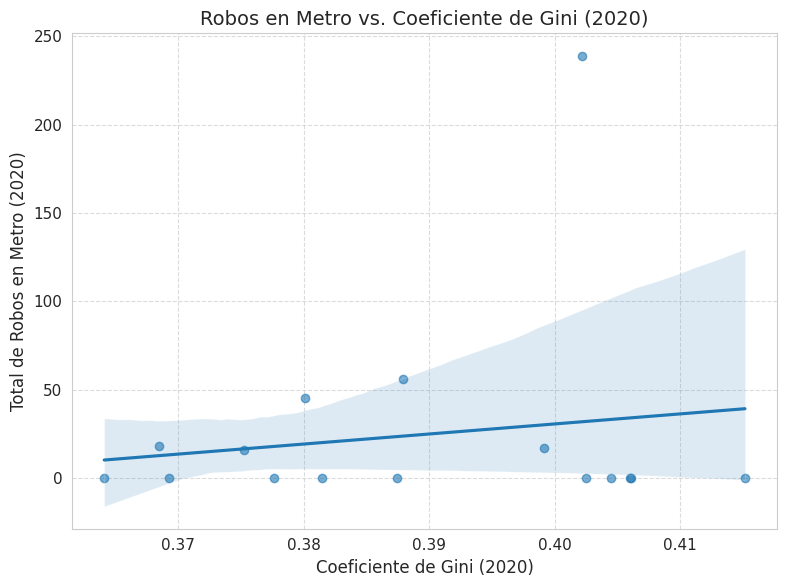


Correlación de Pearson entre Robos en Metro y Gini (2020):
  Coeficiente (r): 0.153
  P-value: 0.573
  La correlación NO es estadísticamente significativa (p >= 0.05).
  Scatter plot Robos vs IRS guardado.


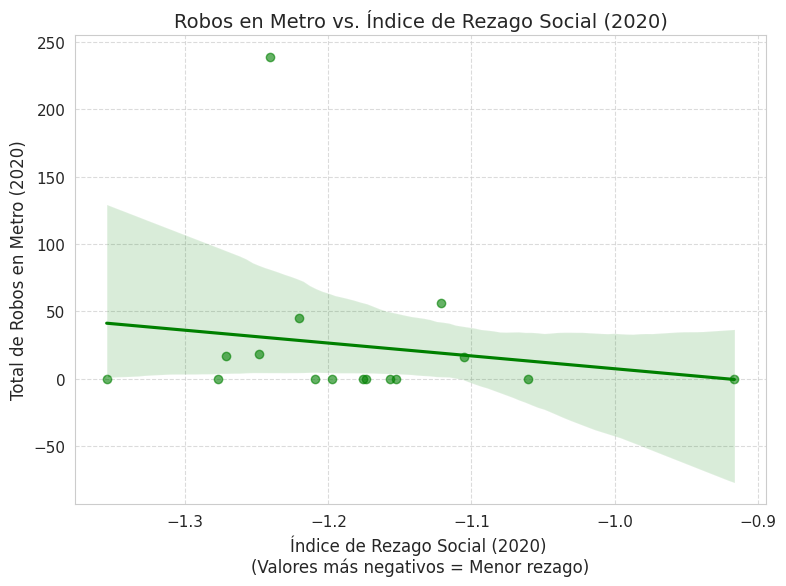


Correlación de Pearson entre Robos en Metro y IRS (2020):
  Coeficiente (r): -0.161
  P-value: 0.550
  La correlación NO es estadísticamente significativa (p >= 0.05).

Correlación de Pearson entre Gini e IRS (2020):
  Coeficiente (r): -0.072
  P-value: 0.792


In [32]:
# CELDA: Scatter Plots y Correlaciones Simples (Robos vs. Gini vs. IRS) - CON GUARDADO

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import os # Para os.path.join

print("\n--- 6.6.2. Generando Scatter Plots y Correlaciones Simples ---")

# Asegurarse de que SAVE_PATH_BASE está definido (debería estarlo de celdas anteriores)
if 'SAVE_PATH_BASE' not in locals():
    SAVE_PATH_BASE = '/content/drive/MyDrive/PP_Robo_Metro_CDMX/visualizaciones/analisis_espacial/' # O tu ruta
    os.makedirs(SAVE_PATH_BASE, exist_ok=True)
    print(f"SAVE_PATH_BASE definida como: {SAVE_PATH_BASE}")


# Asegurarse de que gdf_analisis_lisa existe y tiene las columnas necesarias
if 'gdf_analisis_lisa' not in locals() or gdf_analisis_lisa.empty:
    print("Error: gdf_analisis_lisa no encontrado o vacío. No se pueden generar los plots.")
else:
    # ANIO_ANALISIS debe estar definido de la celda anterior (donde se creó gdf_analisis_lisa)
    if 'ANIO_ANALISIS' not in locals(): ANIO_ANALISIS = 2020 # Fallback por si acaso

    robos_col = f'robos_metro_{ANIO_ANALISIS}'
    gini_col = f'gini_{ANIO_ANALISIS}'
    irs_col = f'IRS_indice_{ANIO_ANALISIS}'

    cols_necesarias_scatter = [robos_col, 'alcaldia'] # 'alcaldia' para evitar error si solo hay una col en df_plot_corr
    if gini_col in gdf_analisis_lisa.columns: cols_necesarias_scatter.append(gini_col)
    if irs_col in gdf_analisis_lisa.columns: cols_necesarias_scatter.append(irs_col)

    # Crear una copia para los plots y asegurar que las columnas son numéricas y sin NaNs
    # Seleccionar solo las columnas existentes para evitar KeyErrors
    existing_cols_for_plot = [col for col in cols_necesarias_scatter if col in gdf_analisis_lisa.columns]
    df_plot_corr = gdf_analisis_lisa[existing_cols_for_plot].copy()

    # Convertir a numérico y eliminar NaNs para las variables de interés
    for col_to_convert in [robos_col, gini_col, irs_col]:
        if col_to_convert in df_plot_corr.columns:
            df_plot_corr[col_to_convert] = pd.to_numeric(df_plot_corr[col_to_convert], errors='coerce')

    # --- 1. Scatter Plot y Correlación: Robos vs. Gini ---
    if gini_col in df_plot_corr.columns:
        df_plot_corr_gini_valid = df_plot_corr.dropna(subset=[robos_col, gini_col])

        if len(df_plot_corr_gini_valid) > 1:
            fig_gini, ax_gini = plt.subplots(figsize=(8, 6)) # Capturar figura y ejes
            sns.regplot(x=gini_col, y=robos_col, data=df_plot_corr_gini_valid, ax=ax_gini, scatter_kws={'alpha':0.6})
            ax_gini.set_title(f'Robos en Metro vs. Coeficiente de Gini ({ANIO_ANALISIS})', fontsize=14)
            ax_gini.set_xlabel(f'Coeficiente de Gini ({ANIO_ANALISIS})', fontsize=12)
            ax_gini.set_ylabel(f'Total de Robos en Metro ({ANIO_ANALISIS})', fontsize=12)
            ax_gini.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            try:
                fig_gini.savefig(os.path.join(SAVE_PATH_BASE, f'scatter_robos_vs_gini_{ANIO_ANALISIS}.png'), transparent=True, dpi=300, bbox_inches='tight')
                print(f"  Scatter plot Robos vs Gini guardado.")
            except Exception as e_save: print(f"  Error guardando scatter Gini: {e_save}")
            plt.show()

            correlation_gini, p_value_gini = pearsonr(df_plot_corr_gini_valid[gini_col], df_plot_corr_gini_valid[robos_col])
            print(f"\nCorrelación de Pearson entre Robos en Metro y Gini ({ANIO_ANALISIS}):")
            print(f"  Coeficiente (r): {correlation_gini:.3f}"); print(f"  P-value: {p_value_gini:.3f}")
            if p_value_gini < 0.05: print("  La correlación es estadísticamente significativa (p < 0.05).")
            else: print("  La correlación NO es estadísticamente significativa (p >= 0.05).")
        else: print(f"  No hay suficientes datos válidos para Robos vs Gini.")
    else: print(f"  La columna Gini ('{gini_col}') no está disponible. No se puede generar plot/correlación.")


    # --- 2. Scatter Plot y Correlación: Robos vs. IRS ---
    if irs_col in df_plot_corr.columns:
        df_plot_corr_irs_valid = df_plot_corr.dropna(subset=[robos_col, irs_col])

        if len(df_plot_corr_irs_valid) > 1:
            fig_irs, ax_irs = plt.subplots(figsize=(8, 6)) # Capturar figura y ejes
            sns.regplot(x=irs_col, y=robos_col, data=df_plot_corr_irs_valid, ax=ax_irs, scatter_kws={'alpha':0.6}, color='green')
            ax_irs.set_title(f'Robos en Metro vs. Índice de Rezago Social ({ANIO_ANALISIS})', fontsize=14)
            ax_irs.set_xlabel(f'Índice de Rezago Social ({ANIO_ANALISIS}) \n(Valores más negativos = Menor rezago)', fontsize=12)
            ax_irs.set_ylabel(f'Total de Robos en Metro ({ANIO_ANALISIS})', fontsize=12)
            ax_irs.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            try:
                fig_irs.savefig(os.path.join(SAVE_PATH_BASE, f'scatter_robos_vs_irs_{ANIO_ANALISIS}.png'), transparent=True, dpi=300, bbox_inches='tight')
                print(f"  Scatter plot Robos vs IRS guardado.")
            except Exception as e_save: print(f"  Error guardando scatter IRS: {e_save}")
            plt.show()

            correlation_irs, p_value_irs = pearsonr(df_plot_corr_irs_valid[irs_col], df_plot_corr_irs_valid[robos_col])
            print(f"\nCorrelación de Pearson entre Robos en Metro y IRS ({ANIO_ANALISIS}):")
            print(f"  Coeficiente (r): {correlation_irs:.3f}"); print(f"  P-value: {p_value_irs:.3f}")
            if p_value_irs < 0.05: print("  La correlación es estadísticamente significativa (p < 0.05).")
            else: print("  La correlación NO es estadísticamente significativa (p >= 0.05).")
        else: print(f"  No hay suficientes datos válidos para Robos vs IRS.")
    else: print(f"  La columna IRS ('{irs_col}') no está disponible. No se puede generar plot/correlación.")

    # --- 3. Correlación: Gini vs. IRS ---
    if gini_col in df_plot_corr.columns and irs_col in df_plot_corr.columns:
        df_plot_corr_gini_irs_valid = df_plot_corr.dropna(subset=[gini_col, irs_col])
        if len(df_plot_corr_gini_irs_valid) > 1:
            correlation_gini_irs, p_value_gini_irs = pearsonr(df_plot_corr_gini_irs_valid[gini_col], df_plot_corr_gini_irs_valid[irs_col])
            print(f"\nCorrelación de Pearson entre Gini e IRS ({ANIO_ANALISIS}):")
            print(f"  Coeficiente (r): {correlation_gini_irs:.3f}"); print(f"  P-value: {p_value_gini_irs:.3f}")
        else: print("  No hay suficientes datos para correlación Gini vs IRS.")
    else: print("  No se puede calcular correlación Gini vs IRS, columnas faltantes.")

---
## 6.7. Análisis de Autocorrelación Espacial: ¿Se Agrupan los Robos en el Metro? (LISA Univariado)

Tras explorar las correlaciones simples, que no revelaron asociaciones lineales fuertes a nivel global entre los robos en el Metro por alcaldía y los indicadores socioeconómicos, es momento de aplicar herramientas de análisis espacial más sofisticadas. Queremos investigar si existe **autocorrelación espacial** en la distribución de los robos. Es decir, ¿las alcaldías con muchos (o pocos) robos tienden a estar cerca de otras alcaldías con características similares, formando clústeres geográficos?

Para esto, utilizaremos el **Índice de Moran Local de Anselin (LISA)**. Este análisis nos permitirá:
1.  Identificar si el patrón espacial de los robos en el Metro por alcaldía es aleatorio, agrupado o disperso.
2.  Localizar **clústeres espaciales específicos** (hotspots, coldspots) y outliers espaciales.

### 6.7.1. Preparación para el Análisis Espacial: Matriz de Pesos

El primer paso para cualquier análisis de autocorrelación espacial es definir las **relaciones de vecindad** entre nuestras unidades de análisis (las alcaldías). Esto se hace mediante una **matriz de pesos espaciales (W)**, que cuantifica qué tan "cerca" o "conectada" está cada alcaldía con las demás.

Usaremos el criterio de **contigüidad tipo Queen**, donde dos alcaldías se consideran vecinas si comparten al menos un punto en sus fronteras (como las reinas en el ajedrez, que se mueven también en diagonal).

# Instalamos una libreria para el análisis espacial Python Spatial Analysis Library (PySAL):

In [33]:
!pip install esda splot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.7/322.7 kB 23.0 MB/s eta 0:00:00



--- 6.7.1. Preparación para Análisis Espacial y LISA Univariado para Robos ---
DataFrame gdf_analisis_lisa encontrado y con columna de robos.

1. Creando Matriz de Pesos Espaciales (Contigüidad Queen)...
  Matriz de Pesos Espaciales (Wq) creada y estandarizada.

2. Calculando Índice de Moran Global para Robos en Metro...
  Índice de Moran Global (I): -0.0807
  P-value (simulación): 0.4730
  El Moran Global NO es estadísticamente significativo.

3. Calculando LISA para Robos en Metro...


<ipython-input-34-df932ab37540>:55: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.
  wq = libpysal.weights.Queen.from_dataframe(gdf_analisis_lisa_clean, idVariable="alcaldia")


  LISA calculado. Distribución de clusters para Robos:
lisa_cluster_robos
No Significativo    14
LH (Bajo-Alto)       2
Name: count, dtype: int64

4. Visualizando Mapa de Clusters LISA para Robos...
  Mapa LISA univariado de robos (estilizado) guardado.


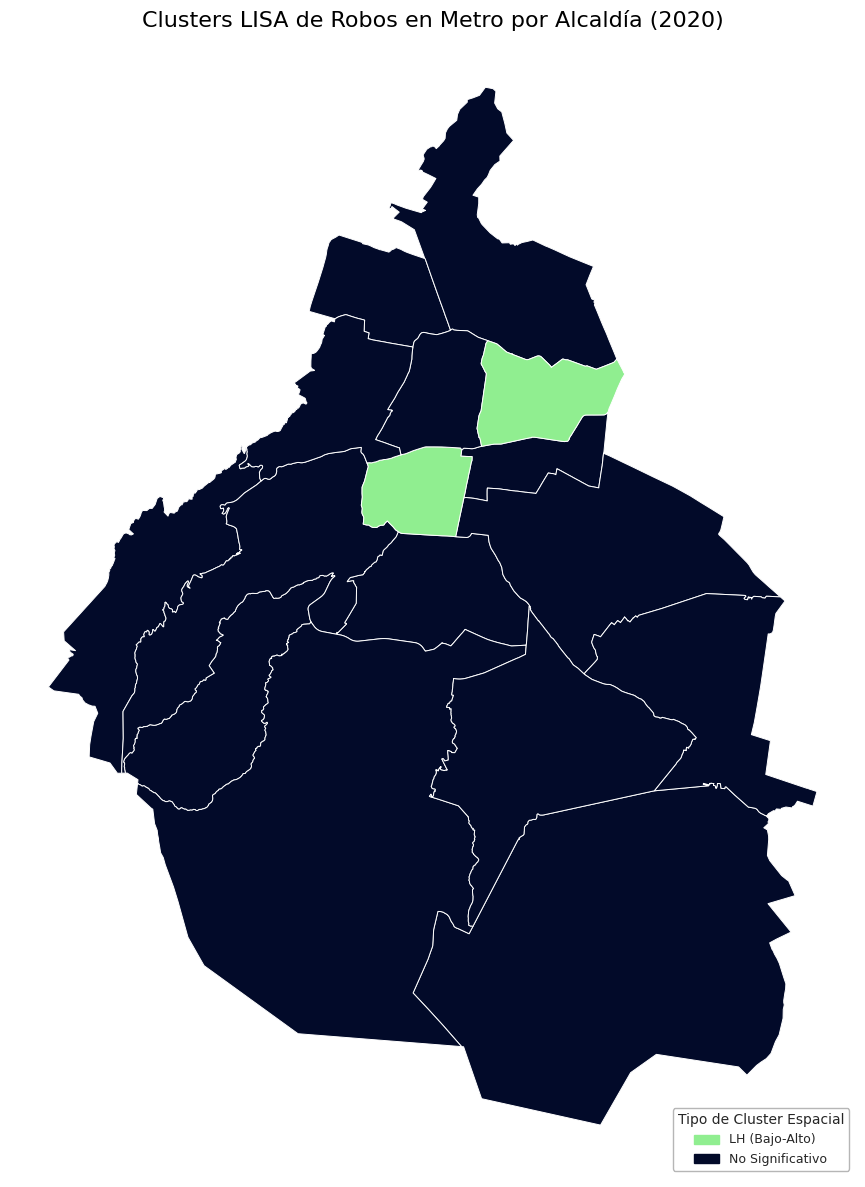

In [34]:
# CELDA: Preparación de Matriz de Pesos y LISA Univariado para Robos (Versión Completa con Estilo)

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import numpy as np
import os
from IPython.display import display
import matplotlib.patches as mpatches # Para la leyenda manual

# Librerías para análisis espacial de PySAL
import libpysal.weights
from esda.moran import Moran, Moran_Local

print("\n--- 6.7.1. Preparación para Análisis Espacial y LISA Univariado para Robos ---")

# Definir ANIO_ANALISIS si no viene de una celda anterior (debería estar definido)
if 'ANIO_ANALISIS' not in locals():
    ANIO_ANALISIS = 2020 # Año focal para el análisis
    print(f"ADVERTENCIA: ANIO_ANALISIS no estaba definido. Usando {ANIO_ANALISIS} por defecto.")

# Asegurarse de que SAVE_PATH_BASE está definido
if 'SAVE_PATH_BASE' not in locals():
    SAVE_PATH_BASE = '/content/drive/MyDrive/PP_Robo_Metro_CDMX/visualizaciones/analisis_espacial_LISA/'
    os.makedirs(SAVE_PATH_BASE, exist_ok=True)
    print(f"SAVE_PATH_BASE definida como: {SAVE_PATH_BASE}")

# Asegurarse de que gdf_analisis_lisa existe y tiene las columnas necesarias
robos_col_name = f'robos_metro_{ANIO_ANALISIS}'
if 'gdf_analisis_lisa' not in locals() or gdf_analisis_lisa.empty:
    print("Error CRÍTICO: gdf_analisis_lisa no encontrado o vacío. No se puede realizar el análisis LISA.")
    # raise ValueError("gdf_analisis_lisa no disponible") # Podrías querer detener la ejecución aquí
    wq = None # Para evitar errores si no existe
elif robos_col_name not in gdf_analisis_lisa.columns:
    print(f"Error CRÍTICO: La columna de robos '{robos_col_name}' no existe en gdf_analisis_lisa.")
    # raise ValueError(f"Columna '{robos_col_name}' faltante.")
    wq = None
else:
    print("DataFrame gdf_analisis_lisa encontrado y con columna de robos.")

    # --- 1. Crear la Matriz de Pesos Espaciales (W) ---
    print("\n1. Creando Matriz de Pesos Espaciales (Contigüidad Queen)...")
    try:
        # Asegurarse de que no haya geometrías inválidas o vacías y que tenga índice único
        gdf_analisis_lisa_clean = gdf_analisis_lisa[gdf_analisis_lisa.geometry.is_valid & ~gdf_analisis_lisa.geometry.is_empty].copy()
        # Es crucial que el idVariable sea único para cada polígono
        if gdf_analisis_lisa_clean['alcaldia'].duplicated().any():
            print("Advertencia: Nombres de alcaldía duplicados en gdf_analisis_lisa. Esto puede causar problemas con la matriz de pesos.")
            # Considerar resetear índice si 'alcaldia' no es buen ID único, o crear uno.
            # gdf_analisis_lisa_clean = gdf_analisis_lisa_clean.reset_index().rename(columns={'index':'unique_id_lisa'})
            # wq = libpysal.weights.Queen.from_dataframe(gdf_analisis_lisa_clean, idVariable="unique_id_lisa")
            wq = libpysal.weights.Queen.from_dataframe(gdf_analisis_lisa_clean, idVariable="alcaldia")
        else:
            wq = libpysal.weights.Queen.from_dataframe(gdf_analisis_lisa_clean, idVariable="alcaldia")

        wq.transform = 'R' # Estandarización por filas
        print("  Matriz de Pesos Espaciales (Wq) creada y estandarizada.")
    except Exception as e_w:
        print(f"  Error al crear la matriz de pesos espaciales: {e_w}")
        wq = None

    if wq is not None:
        # --- 2. Calcular el Índice de Moran Global para Robos ---
        print("\n2. Calculando Índice de Moran Global para Robos en Metro...")
        y_robos = gdf_analisis_lisa_clean[robos_col_name].values

        if np.isnan(y_robos).any():
             print("Advertencia: Hay NaNs en la variable de robos. El Moran Global podría ser impreciso si W no se ajusta.")
             # Podríamos necesitar filtrar gdf_analisis_lisa_clean y wq para los no-NaNs aquí, pero es complejo.
             # Por ahora, Moran() debería manejar NaNs si se pasan los datos correctos.

        try:
            moran_global_robos = Moran(y_robos, wq, permutations=999) # Añadir permutaciones para p-value más robusto
            print(f"  Índice de Moran Global (I): {moran_global_robos.I:.4f}")
            print(f"  P-value (simulación): {moran_global_robos.p_sim:.4f}")
            if moran_global_robos.p_sim < 0.05:
                print("  El Moran Global es estadísticamente significativo: hay evidencia de autocorrelación espacial.")
            else:
                print("  El Moran Global NO es estadísticamente significativo.")
        except Exception as e_moran_g:
            print(f"  Error al calcular Moran Global: {e_moran_g}")

        # --- 3. Calcular LISA (Índice de Moran Local) para Robos ---
        print("\n3. Calculando LISA para Robos en Metro...")
        try:
            lisa_robos = Moran_Local(y_robos, wq, permutations=999)

            significativos_lisa = lisa_robos.p_sim < 0.05
            gdf_analisis_lisa_clean['lisa_q_robos'] = lisa_robos.q * significativos_lisa
            gdf_analisis_lisa_clean['lisa_p_robos'] = lisa_robos.p_sim

            quadrant_labels_robos = {1: 'HH (Alto-Alto)', 2: 'LH (Bajo-Alto)', 3: 'LL (Bajo-Bajo)', 4: 'HL (Alto-Bajo)', 0: 'No Significativo'}
            gdf_analisis_lisa_clean['lisa_cluster_robos'] = gdf_analisis_lisa_clean['lisa_q_robos'].map(quadrant_labels_robos)

            print("  LISA calculado. Distribución de clusters para Robos:")
            print(gdf_analisis_lisa_clean['lisa_cluster_robos'].value_counts())

            # --- 4. Visualizar el Mapa de Clusters LISA para Robos (Estilizado) ---
            print("\n4. Visualizando Mapa de Clusters LISA para Robos...")
            fig_lisa_robos, ax_lisa_robos = plt.subplots(1, 1, figsize=(10, 12))

            cluster_colors_map = {
                'No Significativo': '#020A29',  # Azul marino oscuro para el fondo/no significativos
                'HH (Alto-Alto)': 'red',
                'LL (Bajo-Bajo)': 'deepskyblue', # Un azul más claro para coldspots
                'LH (Bajo-Alto)': 'lightgreen', # Verde claro para Bajo-Alto
                'HL (Alto-Bajo)': 'pink'
            }

            # Crear lista de colores en el orden correcto para el plot
            plot_colors_lisa = [cluster_colors_map.get(cluster, '#CCCCCC') for cluster in gdf_analisis_lisa_clean['lisa_cluster_robos']]

            gdf_analisis_lisa_clean.plot(
                color=plot_colors_lisa, # Usar la lista de colores generada
                ax=ax_lisa_robos,
                edgecolor='white',
                linewidth=0.7
            )

            # Crear Leyenda Manualmente
            legend_patches_lisa = []
            ordered_labels_for_lisa_legend = ['HH (Alto-Alto)', 'LL (Bajo-Bajo)', 'LH (Bajo-Alto)', 'HL (Alto-Bajo)', 'No Significativo']

            for label_lisa in ordered_labels_for_lisa_legend:
                if label_lisa in gdf_analisis_lisa_clean['lisa_cluster_robos'].unique() and label_lisa in cluster_colors_map:
                    legend_patches_lisa.append(mpatches.Patch(color=cluster_colors_map[label_lisa], label=label_lisa))

            if legend_patches_lisa:
                ax_lisa_robos.legend(handles=legend_patches_lisa, title="Tipo de Cluster Espacial",
                                     loc='lower right', fontsize=9, title_fontsize=10,
                                     facecolor='white', framealpha=0.85, edgecolor='darkgrey')

            ax_lisa_robos.set_title(f'Clusters LISA de Robos en Metro por Alcaldía ({ANIO_ANALISIS})', fontsize=16, color='black')
            ax_lisa_robos.set_axis_off()
            plt.tight_layout()
            try:
                map_filename_lisa = f'mapa_lisa_univariado_robos_{ANIO_ANALISIS}_final.png'
                plt.savefig(os.path.join(SAVE_PATH_BASE, map_filename_lisa),
                            transparent=True, dpi=300, bbox_inches='tight',
                            facecolor=fig_lisa_robos.get_facecolor()) # Captura el color de fondo si no es transparente
                print(f"  Mapa LISA univariado de robos (estilizado) guardado.")
            except Exception as e_save_lisa: print(f"  Error guardando mapa LISA robos: {e_save_lisa}")
            plt.show()

        except Exception as e_lisa:
            print(f"  Error al calcular o plotear LISA para robos: {e_lisa}")
    else: # Del if wq is not None:
        print("Matriz de Pesos Espaciales (Wq) no se pudo crear. No se puede continuar con el análisis espacial.")

# Este else corresponde al if principal de la celda
# if 'gdf_analisis_lisa' in locals() and not gdf_analisis_lisa.empty: ...
# else:
# print("gdf_analisis_lisa no está disponible o no tiene las columnas necesarias para LISA.")

### 6.7.2. Correlación Espacial entre Robos y Factores Socioeconómicos (LISA Bivariado)

El análisis LISA univariado nos confirmó que la distribución de robos en el Metro por alcaldía no es completamente aleatoria, revelando la existencia de "puntos calientes" y "outliers" espaciales. Sin embargo, nuestro objetivo principal es ir más allá y explorar si estos patrones de robo se co-localizan espacialmente con los indicadores socioeconómicos clave que hemos identificado.

Retomando la hipótesis de que la **desigualdad social** (medida por el Coeficiente de Gini) podría estar más ligada al crimen que el **rezago social** (medido por el IRS), el **LISA Bivariado** nos permitirá investigar la correlación espacial entre dos variables diferentes. Queremos saber si las alcaldías con alta incidencia de robos en el Metro tienden a estar rodeadas de alcaldías con alta desigualdad de ingresos, y si esta relación es diferente (o más fuerte) para el rezago social.

Para esto, examinaremos dos relaciones clave para el año {ANIO_ANALISIS} (o el año de tu análisis):
1.  **Robos en Metro vs. Coeficiente de Gini:** ¿Las alcaldías con muchos robos están cerca de alcaldías con alta desigualdad?
2.  **Robos en Metro vs. Índice de Rezago Social (IRS):** ¿Las alcaldías con muchos robos están cerca de alcaldías con alto rezago?

**Tipos de Clusters LISA Bivariado:**

Al igual que en el caso univariado, LISA Bivariado identifica cuatro tipos principales de clústeres donde ambas variables (\(X\) y \(Y\)) exhiben una asociación espacial significativa:

*   **Alto-Alto (HH):** Un valor alto en la alcaldía focal (\(X\)) y un valor alto en las alcaldías vecinas (\(Y\)). Por ejemplo: Alcaldía con muchos robos (\(X\)) rodeada de alcaldías con alto Gini (\(Y\)).
*   **Bajo-Bajo (LL):** Un valor bajo en la alcaldía focal (\(X\)) y un valor bajo en las alcaldías vecinas (\(Y\)).
*   **Alto-Bajo (HL):** Un valor alto en la alcaldía focal (\(X\)) y un valor bajo en las alcaldías vecinas (\(Y\)). Un "outlier" espacial.
*   **Bajo-Alto (LH):** Un valor bajo en la alcaldía focal (\(X\)) y un valor alto en las alcaldías vecinas (\(Y\)). Otro "outlier" espacial.

Compararemos los patrones de co-localización para Gini y IRS para ver cuál de ellos parece tener una huella espacial más marcada junto con los robos en el Metro.

In [35]:
!pip install esda


--- 6.7.2. Calculando LISA Bivariado (Robos vs. Gini y Robos vs. IRS) ---

1. Calculando LISA Bivariado: Robos (robos_metro_2020) vs. Gini (gini_2020)...
  LISA Bivariado Robos vs. Gini calculado. Distribución de clusters:
lisa_cluster_robos_gini
No Significativo               13
LH (Robos Bajo - Gini Alto)     2
HL (Robos Alto - Gini Bajo)     1
Name: count, dtype: int64


<ipython-input-36-aee845013036>:68: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf_analisis_lisa_clean_bv.plot(column='lisa_cluster_robos_gini', color=plot_colors_lisa_gini,


  Mapa LISA bivariado Robos vs Gini guardado.


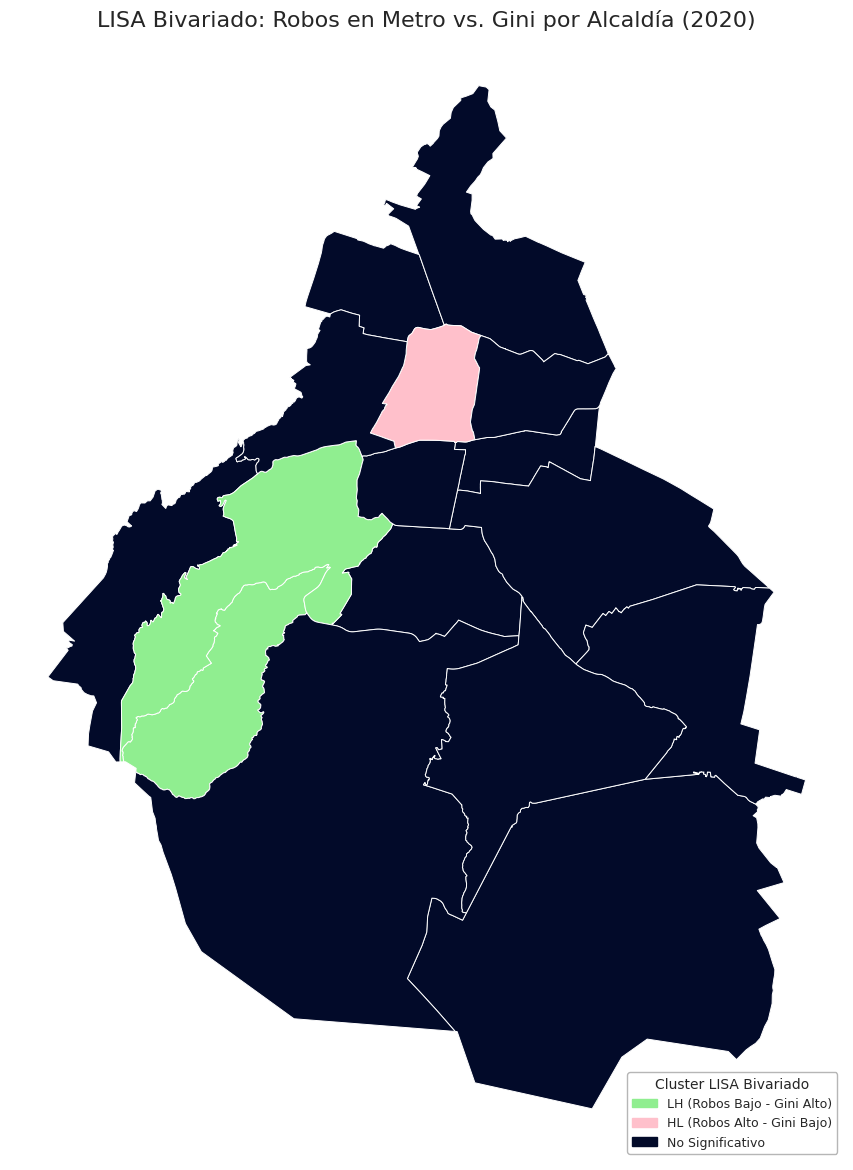


2. Calculando LISA Bivariado: Robos (robos_metro_2020) vs. IRS (IRS_indice_2020)...
  LISA Bivariado Robos vs. IRS calculado. Distribución de clusters:
lisa_cluster_robos_irs
No Significativo              10
LH (Robos Bajo - IRS Alto)     3
LL (Robos Bajo - IRS Bajo)     2
HL (Robos Alto - IRS Bajo)     1
Name: count, dtype: int64


<ipython-input-36-aee845013036>:118: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf_analisis_lisa_clean_bv.plot(column='lisa_cluster_robos_irs', color=plot_colors_lisa_irs,


  Mapa LISA bivariado Robos vs IRS guardado.


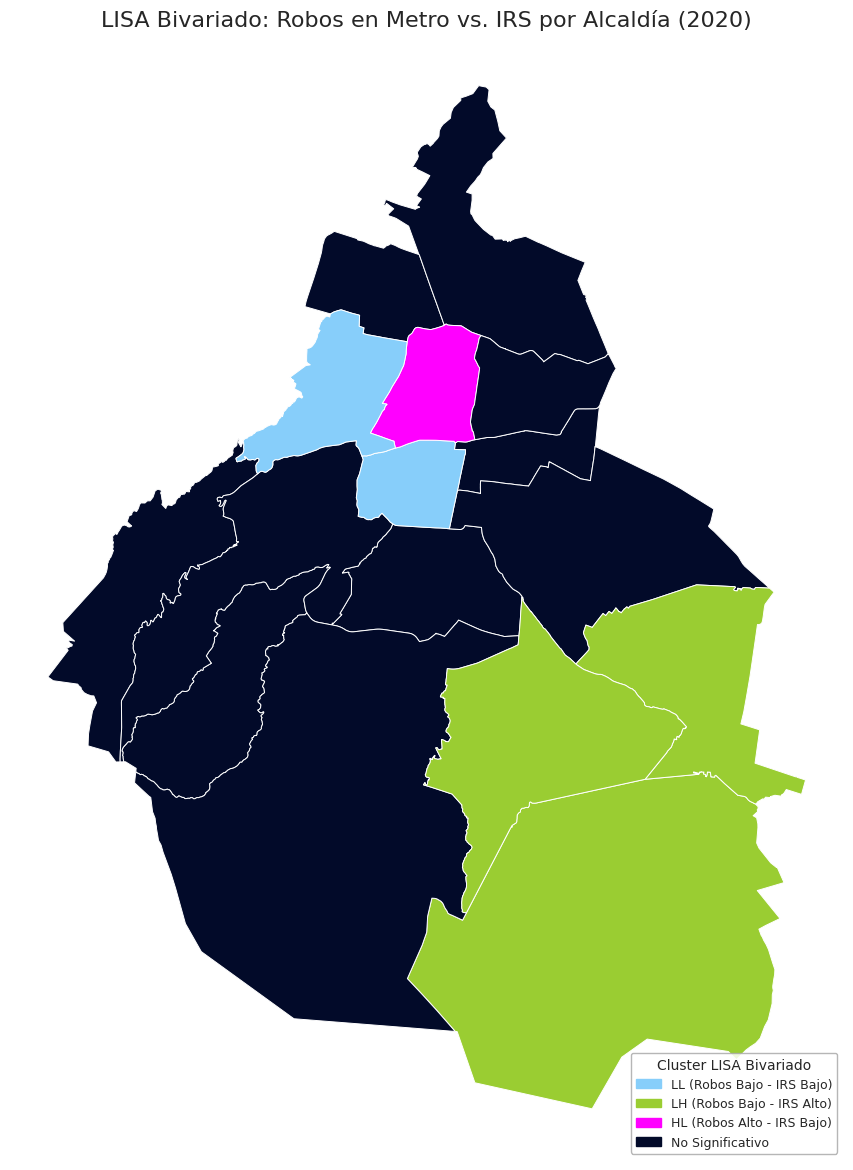

In [36]:
# CELDA: Análisis de Correlación Espacial (LISA Bivariado) - VERSIÓN FINAL Y CORREGIDA

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import numpy as np
import os
from IPython.display import display

# Librerías PySAL (ya importadas en la celda anterior)
from esda.moran import Moran_Local_BV # <<--- ¡CORRECCIÓN EN LA IMPORTACIÓN A BV!

print("\n--- 6.7.2. Calculando LISA Bivariado (Robos vs. Gini y Robos vs. IRS) ---")

# Verificar que los DataFrames y la matriz de pesos existen
if 'gdf_analisis_lisa' not in locals() or gdf_analisis_lisa.empty:
    print("Error CRÍTICO: gdf_analisis_lisa no encontrado o vacío. No se puede continuar con LISA bivariado.")
elif 'wq' not in locals() or wq is None:
    print("Error CRÍTICO: Matriz de pesos espaciales (wq) no creada. No se puede continuar con LISA bivariado.")
else:
    # Variables a analizar (nombres de columna)
    robos_col = f'robos_metro_{ANIO_ANALISIS}'
    gini_col = f'gini_{ANIO_ANALISIS}'
    irs_col = f'IRS_indice_{ANIO_ANALISIS}'

    # Asegurarse de que las variables existan y sean numéricas (sin NaNs)
    gdf_analisis_lisa_clean_bv = gdf_analisis_lisa.copy()

    required_bv_cols = [robos_col, gini_col, irs_col]
    if not all(col in gdf_analisis_lisa_clean_bv.columns for col in required_bv_cols):
        print(f"Error CRÍTICO: Faltan una o más columnas necesarias para LISA bivariado: {[col for col in required_bv_cols if col not in gdf_analisis_lisa_clean_bv.columns]}.")
    else:
        # Rellenar NaNs con la media (o 0) para no perder observaciones en LISA
        for col in required_bv_cols:
            if gdf_analisis_lisa_clean_bv[col].isnull().any():
                mean_val = gdf_analisis_lisa_clean_bv[col].mean()
                gdf_analisis_lisa_clean_bv[col].fillna(mean_val if pd.notna(mean_val) else 0, inplace=True)
                print(f"  Advertencia: Columna '{col}' tenía NaNs, rellenados con la media ({mean_val:.2f}).")

        # --- PASO 1: LISA Bivariado - Robos vs. Gini ---
        if gini_col in gdf_analisis_lisa_clean_bv.columns:
            print(f"\n1. Calculando LISA Bivariado: Robos ({robos_col}) vs. Gini ({gini_col})...")
            try:
                # LLAMADA A LA FUNCIÓN CORREGIDA A Moran_Local_BV
                lisa_bv_robos_gini = Moran_Local_BV(gdf_analisis_lisa_clean_bv[robos_col], gdf_analisis_lisa_clean_bv[gini_col], wq, permutations=999)

                gdf_analisis_lisa_clean_bv['lisa_q_robos_gini'] = lisa_bv_robos_gini.q * (lisa_bv_robos_gini.p_sim < 0.05)
                gdf_analisis_lisa_clean_bv['lisa_cluster_robos_gini'] = gdf_analisis_lisa_clean_bv['lisa_q_robos_gini'].map({
                    1: 'HH (Robos Alto - Gini Alto)', 2: 'LH (Robos Bajo - Gini Alto)',
                    3: 'LL (Robos Bajo - Gini Bajo)', 4: 'HL (Robos Alto - Gini Bajo)',
                    0: 'No Significativo'
                })
                print("  LISA Bivariado Robos vs. Gini calculado. Distribución de clusters:")
                print(gdf_analisis_lisa_clean_bv['lisa_cluster_robos_gini'].value_counts())

                # Visualizar Mapa LISA Bivariado - Robos vs. Gini
                fig_lisa_gini, ax_lisa_gini = plt.subplots(1, 1, figsize=(10, 12))
                lisa_bv_colors_gini = {
                    'No Significativo': '#020A29',
                    'HH (Robos Alto - Gini Alto)': 'red',
                    'LL (Robos Bajo - Gini Bajo)': 'deepskyblue',
                    'LH (Robos Bajo - Gini Alto)': 'lightgreen',
                    'HL (Robos Alto - Gini Bajo)': 'pink'
                }
                plot_colors_lisa_gini = [lisa_bv_colors_gini.get(c, '#CCCCCC') for c in gdf_analisis_lisa_clean_bv['lisa_cluster_robos_gini']]

                gdf_analisis_lisa_clean_bv.plot(column='lisa_cluster_robos_gini', color=plot_colors_lisa_gini,
                                       ax=ax_lisa_gini, edgecolor='white', linewidth=0.7, legend=False)

                legend_patches_lisa_gini = []
                ordered_labels_gini = ['HH (Robos Alto - Gini Alto)', 'LL (Robos Bajo - Gini Bajo)',
                                       'LH (Robos Bajo - Gini Alto)', 'HL (Robos Alto - Gini Bajo)', 'No Significativo']
                for lbl in ordered_labels_gini:
                    if lbl in gdf_analisis_lisa_clean_bv['lisa_cluster_robos_gini'].unique() and lbl in lisa_bv_colors_gini:
                        legend_patches_lisa_gini.append(mpatches.Patch(color=lisa_bv_colors_gini[lbl], label=lbl))
                if legend_patches_lisa_gini:
                    ax_lisa_gini.legend(handles=legend_patches_lisa_gini, title="Cluster LISA Bivariado", loc='lower right',
                                        fontsize=9, title_fontsize=10, facecolor='white', framealpha=0.85, edgecolor='darkgrey')

                ax_lisa_gini.set_title(f'LISA Bivariado: Robos en Metro vs. Gini por Alcaldía ({ANIO_ANALISIS})', fontsize=16)
                ax_lisa_gini.set_axis_off(); plt.tight_layout()
                try: plt.savefig(os.path.join(SAVE_PATH_BASE, f'mapa_lisa_bv_robos_gini_{ANIO_ANALISIS}.png'), transparent=True, dpi=300, bbox_inches='tight'); print(f"  Mapa LISA bivariado Robos vs Gini guardado.")
                except Exception as e_save: print(f"  Error guardando mapa LISA bivariado Gini: {e_save}")
                plt.show()

            except Exception as e_lisa_gini: print(f"  Error al calcular o plotear LISA Bivariado Robos vs. Gini: {e_lisa_gini}")
        else: print(f"  Columna Gini ('{gini_col}') no disponible. Saltando LISA Bivariado Robos vs. Gini.")


        # --- PASO 2: LISA Bivariado - Robos vs. IRS ---
        if irs_col in gdf_analisis_lisa_clean_bv.columns:
            print(f"\n2. Calculando LISA Bivariado: Robos ({robos_col}) vs. IRS ({irs_col})...")
            try:
                # LLAMADA A LA FUNCIÓN CORREGIDA A Moran_Local_BV
                lisa_bv_robos_irs = Moran_Local_BV(gdf_analisis_lisa_clean_bv[robos_col], gdf_analisis_lisa_clean_bv[irs_col], wq, permutations=999)

                gdf_analisis_lisa_clean_bv['lisa_q_robos_irs'] = lisa_bv_robos_irs.q * (lisa_bv_robos_irs.p_sim < 0.05)
                gdf_analisis_lisa_clean_bv['lisa_cluster_robos_irs'] = gdf_analisis_lisa_clean_bv['lisa_q_robos_irs'].map({
                    1: 'HH (Robos Alto - IRS Alto)', 2: 'LH (Robos Bajo - IRS Alto)',
                    3: 'LL (Robos Bajo - IRS Bajo)', 4: 'HL (Robos Alto - IRS Bajo)',
                    0: 'No Significativo'
                })
                print("  LISA Bivariado Robos vs. IRS calculado. Distribución de clusters:")
                print(gdf_analisis_lisa_clean_bv['lisa_cluster_robos_irs'].value_counts())

                # Visualizar Mapa LISA Bivariado - Robos vs. IRS
                fig_lisa_irs, ax_lisa_irs = plt.subplots(1, 1, figsize=(10, 12))
                lisa_bv_colors_irs = {
                    'No Significativo': '#020A29',
                    'HH (Robos Alto - IRS Alto)': 'crimson',
                    'LL (Robos Bajo - IRS Bajo)': 'lightskyblue',
                    'LH (Robos Bajo - IRS Alto)': 'yellowgreen',
                    'HL (Robos Alto - IRS Bajo)': 'magenta'
                }
                plot_colors_lisa_irs = [lisa_bv_colors_irs.get(c, '#CCCCCC') for c in gdf_analisis_lisa_clean_bv['lisa_cluster_robos_irs']]

                gdf_analisis_lisa_clean_bv.plot(column='lisa_cluster_robos_irs', color=plot_colors_lisa_irs,
                                       ax=ax_lisa_irs, edgecolor='white', linewidth=0.7, legend=False)

                legend_patches_lisa_irs = []
                ordered_labels_irs = ['HH (Robos Alto - IRS Alto)', 'LL (Robos Bajo - IRS Bajo)',
                                       'LH (Robos Bajo - IRS Alto)', 'HL (Robos Alto - IRS Bajo)', 'No Significativo']
                for lbl in ordered_labels_irs:
                    if lbl in gdf_analisis_lisa_clean_bv['lisa_cluster_robos_irs'].unique() and lbl in lisa_bv_colors_irs:
                        legend_patches_lisa_irs.append(mpatches.Patch(color=lisa_bv_colors_irs[lbl], label=lbl))
                if legend_patches_lisa_irs:
                    ax_lisa_irs.legend(handles=legend_patches_lisa_irs, title="Cluster LISA Bivariado", loc='lower right',
                                        fontsize=9, title_fontsize=10, facecolor='white', framealpha=0.85, edgecolor='darkgrey')

                ax_lisa_irs.set_title(f'LISA Bivariado: Robos en Metro vs. IRS por Alcaldía ({ANIO_ANALISIS})', fontsize=16)
                ax_lisa_irs.set_axis_off(); plt.tight_layout()
                try: plt.savefig(os.path.join(SAVE_PATH_BASE, f'mapa_lisa_bv_robos_irs_{ANIO_ANALISIS}.png'), transparent=True, dpi=300, bbox_inches='tight'); print(f"  Mapa LISA bivariado Robos vs IRS guardado.")
                except Exception as e_save: print(f"  Error guardando mapa LISA bivariado IRS: {e_save}")
                plt.show()

            except Exception as e_lisa_irs: print(f"  Error al calcular o plotear LISA Bivariado Robos vs. IRS: {e_lisa_irs}")
        else: print(f"  Columna '{irs_col}' no disponible. Saltando LISA Bivariado Robos vs. IRS.")

In [37]:
import esda.moran
print(dir(esda.moran))

['Moran', 'Moran_BV', 'Moran_BV_matrix', 'Moran_Local', 'Moran_Local_BV', 'Moran_Local_Rate', 'Moran_Rate', 'PERMUTATIONS', 'W', '_Moran_BV_Matrix_array', '__all__', '__author__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_bivariate_handler', '_crand_plus', '_get_cluster_labels', '_moran_local_bv_crand', '_moran_local_crand', '_njit', '_plot_combination', '_prepare_univariate', '_scatterplot', '_simulation_plot', '_slag', '_transform', '_univariate_handler', '_viz_local_moran', '_wikh_fast', '_wikh_numba', '_wikh_slow', 'assuncao_rate', 'lag_spatial', 'np', 'pd', 'plot_moran_facet', 'simplefilter', 'sparse', 'stats']


---
### X.X. La Marea Humana y el Riesgo: ¿Más Pasajeros Implican Más Robos?

Hemos visto cómo la afluencia total del Metro fluctúa enormemente. Intuitivamente, uno esperaría que a mayor número de pasajeros, mayores fueran las oportunidades para los 'amigos de lo ajeno'. Para explorar esta relación de forma más directa, realizaremos un análisis de correlación y una regresión lineal simple entre el número total de robos diarios reportados en el Metro y la afluencia total diaria del sistema.

Esto nos dará una medida cuantitativa de la fuerza y dirección de esta asociación.


--- Correlación y Regresión: Robos Totales del Metro vs. Afluencia Total Diaria ---
  Gráfica de correlación Robos vs Afluencia guardada.


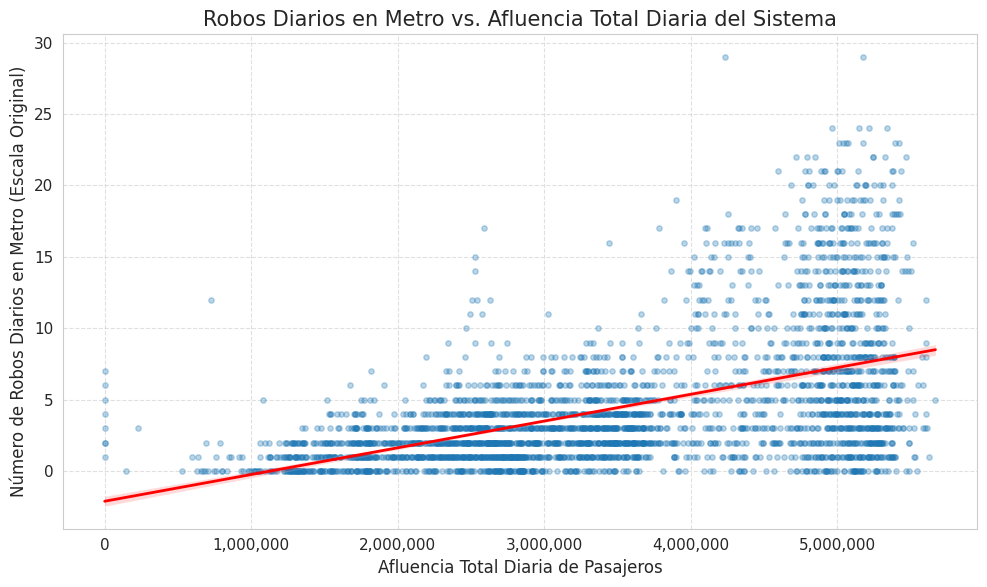


Correlación de Pearson entre Robos Diarios en Metro y Afluencia Total Diaria:
  Coeficiente (r): 0.513
  P-value: 0.0000
  La correlación es estadísticamente significativa (p < 0.05).

Regresión Lineal Simple (Robos ~ Afluencia):
  Coeficiente (pendiente, β1 - robos por pasajero adicional): 0.000002
  Intercepto (β0): -2.11
  R-cuadrado (R²): 0.263
  Interpretación R²: Aproximadamente el 26.3% de la variación en los robos diarios puede ser explicada por la afluencia.


In [38]:
# CELDA: Correlación y Regresión Lineal - Robos Totales del Metro vs. Afluencia Total Diaria

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np
import os

print("\n--- Correlación y Regresión: Robos Totales del Metro vs. Afluencia Total Diaria ---")

# Requisitos:
# - df_prophet_input: Debe existir de la celda de preparación para Prophet.
#   Debe tener 'ds', 'y_orig' (robos en escala original), y 'afluencia' (afluencia total diaria).
# - SAVE_PATH_BASE: Definido para guardar la gráfica.

if 'df_prophet_input' not in locals() or df_prophet_input.empty:
    print("Error: df_prophet_input no encontrado o vacío.")
elif not all(col in df_prophet_input.columns for col in ['y_orig', 'afluencia', 'ds']):
    print("Error: df_prophet_input no tiene las columnas 'y_orig', 'afluencia' o 'ds'.")
else:
    # Usar una copia para el análisis y eliminar NaNs si los hubiera en las columnas de interés
    df_corr_reg = df_prophet_input[['ds', 'y_orig', 'afluencia']].copy()
    df_corr_reg.dropna(subset=['y_orig', 'afluencia'], inplace=True)

    if len(df_corr_reg) < 2:
        print("No hay suficientes datos después de eliminar NaNs para el análisis de correlación/regresión.")
    else:
        # 1. Scatter Plot con Línea de Regresión
        plt.figure(figsize=(10, 6))
        sns.regplot(x='afluencia', y='y_orig', data=df_corr_reg,
                    scatter_kws={'alpha': 0.3, 's': 15}, # Puntos más pequeños y transparentes
                    line_kws={'color': 'red', 'linewidth': 2})

        plt.title('Robos Diarios en Metro vs. Afluencia Total Diaria del Sistema', fontsize=15)
        plt.xlabel('Afluencia Total Diaria de Pasajeros', fontsize=12)
        plt.ylabel('Número de Robos Diarios en Metro (Escala Original)', fontsize=12)
        ax = plt.gca()
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(int(x)))) # Formato con comas
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()

        try:
            if 'SAVE_PATH_BASE' in locals() and os.path.exists(SAVE_PATH_BASE):
                corr_filename = os.path.join(SAVE_PATH_BASE, 'scatter_robos_vs_afluencia_total.png')
                plt.savefig(corr_filename, transparent=True, dpi=300, bbox_inches='tight')
                print(f"  Gráfica de correlación Robos vs Afluencia guardada.")
            else: print("  Advertencia: SAVE_PATH_BASE no definida, no se pudo guardar gráfica.")
        except Exception as e_save: print(f"  Error guardando gráfica de correlación: {e_save}")
        plt.show()

        # 2. Coeficiente de Correlación de Pearson
        correlation_afluencia, p_value_afluencia = pearsonr(df_corr_reg['afluencia'], df_corr_reg['y_orig'])
        print(f"\nCorrelación de Pearson entre Robos Diarios en Metro y Afluencia Total Diaria:")
        print(f"  Coeficiente (r): {correlation_afluencia:.3f}")
        print(f"  P-value: {p_value_afluencia:.4f}") # Más decimales para p-value
        if p_value_afluencia < 0.05:
            print("  La correlación es estadísticamente significativa (p < 0.05).")
        else:
            print("  La correlación NO es estadísticamente significativa (p >= 0.05).")

        # 3. Regresión Lineal Simple (para obtener R-cuadrado)
        X_afluencia = df_corr_reg[['afluencia']] # Debe ser 2D para scikit-learn
        y_robos_reg = df_corr_reg['y_orig']

        model_lr = LinearRegression()
        model_lr.fit(X_afluencia, y_robos_reg)

        r_squared = model_lr.score(X_afluencia, y_robos_reg)
        coef_beta1 = model_lr.coef_[0]
        intercept_beta0 = model_lr.intercept_

        print(f"\nRegresión Lineal Simple (Robos ~ Afluencia):")
        print(f"  Coeficiente (pendiente, β1 - robos por pasajero adicional): {coef_beta1:.6f}")
        print(f"  Intercepto (β0): {intercept_beta0:.2f}")
        print(f"  R-cuadrado (R²): {r_squared:.3f}")
        print(f"  Interpretación R²: Aproximadamente el {r_squared*100:.1f}% de la variación en los robos diarios puede ser explicada por la afluencia.")